In [81]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [82]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
dens = os.listdir('../../data/txt/Align_press_CoM')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../data/txt/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../data/txt/BubComp')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [83]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [84]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../data/txt/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       36746  6207.701026   1010.589803   5197.111223
1     0.1  5.016308       36315  5409.157318    826.619753   4582.537566
2     0.2  5.016308       37016  4376.186231    610.696721   3765.489509
3     0.3  5.016308       37506  3417.721917    464.568570   2953.153348
4     0.4  5.016308       37964  2664.702255    329.930039   2334.772216
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23019  1046.856162     79.296310    967.559852
995  99.5  5.016308       22006  1194.038490     89.310957   1104.727533
996  99.6  5.016308       23314  1181.725123     82.000246   1099.724877
997  99.7  5.016308       22746  1251.065049     77.487087   1173.577962
998  99.8  5.016308       21583  1254.704922    109.108891   1145.596031

[999 rows x 6 columns]

In [85]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  250  50.0  1.0  60.0   0.000001
1   0   50   50  50.0  1.0  60.0   0.000001
2   0   50  200  50.0  1.0  60.0   0.000001
3   0   50  350  50.0  1.0  60.0   0.000001
4   0   50  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  250  250  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  350  350  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [86]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.016308       36746  6207.701026   1010.589803   5197.111223
1     0.1  5.016308       36315  5409.157318    826.619753   4582.537566
2     0.2  5.016308       37016  4376.186231    610.696721   3765.489509
3     0.3  5.016308       37506  3417.721917    464.568570   2953.153348
4     0.4  5.016308       37964  2664.702255    329.930039   2334.772216
..    ...       ...         ...          ...           ...           ...
994  99.4  5.016308       23019  1046.856162     79.296310    967.559852
995  99.5  5.016308       22006  1194.038490     89.310957   1104.727533
996  99.6  5.016308       23314  1181.725123     82.000246   1099.724877
997  99.7  5.016308       22746  1251.065049     77.487087   1173.577962
998  99.8  5.016308       21583  1254.704922    109.108891   1145.596031

[999 rows x 6 columns]

5.016308
36746


In [87]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../data/txt/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea    gasSigXX   gasSigXY   gasSigYX    gasSigYY  \
0         0.0  38018.311    2375.154    -28.372    -28.372    2414.880   
1         0.1  44513.889   77255.194   3252.828   3252.828   78421.514   
2         0.2  43622.239   59034.237  -1976.006  -1976.006   50884.923   
3         0.3  42930.004   56950.722   -906.442   -906.442   50310.785   
4         0.4  42383.837   73100.650   1045.576   1045.576   66369.749   
..        ...        ...         ...        ...        ...         ...   
147      14.7  41671.280  223892.982   8582.117   8582.117  220370.547   
148      14.8  41509.970  229336.955  -1904.808  -1904.808  231464.430   
149      14.9  41582.369  224959.601   7593.650   7593.650  226025.404   
150      15.0  41628.094  213214.636 -10970.056 -10970.056  212120.252   
151      15.1  41603.961  223321.607   4550.597   4550.597  217253.890   

       gasTrace   bulkArea     bulkSigXX    bulkSigXY    bulkSigYX  \
0      2366.645  25095.743  7.128161e+07    14131.687    14131.687   
1     81091.182  18831.334  4.968946e+08  2209483.077  2209483.077   
2     52983.574  19571.835  4.190462e+08  1208557.691  1208557.691   
3     52724.311  20237.396  3.434012e+08   716554.830   716554.830   
4     70780.776  20688.302  2.843977e+08  1262609.309  1262609.309   
..          ...        ...           ...          ...          ...   
147  230713.881  21017.272  1.409051e+08  -632749.822  -632749.822   
148  228495.885  21109.994  1.417845e+08   100699.696   100699.696   
149  233086.152  21136.667  1.441829e+08  -916399.267  -916399.267   
150  201697.388  21068.078  1.432806e+08  -112728.591  -112728.591   
151  224838.346  21126.506  1.415366e+08 -1067644.996 -1067644.996   

        bulkSigYY     bulkTrace  Length  NDense  
0    7.124745e+07  7.127866e+07   521.8   45750  
1    4.910797e+08  4.961966e+08   459.8   46021  
2    4.118017e+08  4.166325e+08   509.4   46458  
3    3.383948e+08  3.416146e+08   522.9   46576  
4    2.775112e+08  2.822171e+08   535.3   46367  
..            ...           ...     ...     ...  
147  1.386405e+08  1.391401e+08   630.0   43241  
148  1.382369e+08  1.401114e+08   666.1   43475  
149  1.408811e+08  1.416156e+08   626.6   43517  
150  1.414562e+08  1.422557e+08   633.4   43452  
151  1.398602e+08  1.396308e+08   617.6   43380  

[152 rows x 15 columns]

In [88]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  200  50.0  1.0  60.0   0.000001
1   0   50   50  50.0  1.0  60.0   0.000001
2   0   50  450  50.0  1.0  60.0   0.000001
3   0   50  100  50.0  1.0  60.0   0.000001
4   0   50  250  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  450  50.0  1.0  60.0   0.000001
24  0  250  250  50.0  1.0  60.0   0.000001
25  0  350  350  50.0  1.0  60.0   0.000001
26  0  350  450  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [89]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0         0.0  41578.558    46387.834    -80.322    -80.322    45632.886   
1         0.1  44786.972   627678.357   4629.446   4629.446   643038.799   
2         0.2  45314.087   591800.106  -1547.336  -1547.336   578693.233   
3         0.3  44940.661   566853.805   -830.419   -830.419   559308.539   
4         0.4  44463.083   536384.546  -8537.203  -8537.203   538323.757   
..        ...        ...          ...        ...        ...          ...   
995      99.5  49872.677  1981433.405  -5708.625  -5708.625  2000753.458   
996      99.6  49431.933  1941806.012  -4792.838  -4792.838  1957711.959   
997      99.7  49435.744  1895456.284  -9544.669  -9544.669  1936777.942   
998      99.8  49273.164  1858386.825  -6704.221  -6704.221  1854565.021   
999      99.9  50221.970  1914073.086  10278.964  10278.964  1922230.318   

        gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0      45930.038  21610.435  1.710410e+07     980.538     980.538   
1     639988.024  18066.700  5.585550e+07 -393400.790 -393400.790   
2     583699.333  17600.552  7.428493e+07  -52874.149  -52874.149   
3     562250.753  17938.414  7.366519e+07    1843.776    1843.776   
4     528816.948  18451.557  6.633622e+07 -118781.542 -118781.542   
..           ...        ...           ...         ...         ...   
995  1985384.806  11390.759  1.663338e+07  158646.441  158646.441   
996  1944966.147  11430.134  1.751383e+07   54775.411   54775.411   
997  1906572.445  11578.743  1.767704e+07   41691.559   41691.559   
998  1849771.702  11681.625  1.737415e+07  -68325.701  -68325.701   
999  1928430.666  11738.782  1.749154e+07  -74723.576  -74723.576   

        bulkSigYY     bulkTrace  Length  NDense  
0    1.710044e+07  1.710325e+07   511.7   33691  
1    5.556288e+07  5.531579e+07   641.3   33341  
2    7.423178e+07  7.420548e+07   627.7   33810  
3    7.365925e+07  7.366406e+07   617.6   34312  
4    6.736780e+07  6.673323e+07   614.2   34682  
..            ...           ...     ...     ...  
995  1.652005e+07  1.673536e+07  1109.0   20480  
996  1.708461e+07  1.735399e+07  1199.1   20911  
997  1.733678e+07  1.754860e+07  1163.1   21034  
998  1.743055e+07  1.733403e+07  1218.3   21227  
999  1.737000e+07  1.735604e+07   921.9   20735  

[1000 rows x 15 columns]

41578.558
46387.834


In [90]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../data/txt/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb     radius  \
0      0.0  5.016308       45750       1       1  15705  15515  93.914608   
1      0.1  5.016308       46021       1       1  14850  14697  82.884619   
2      0.2  5.016308       46458       1       1  14856  14663  84.236476   
3      0.3  5.016308       46576       1       1  14595  14554  84.676592   
4      0.4  5.016308       46367       1       1  14517  14504  85.866414   
...    ...       ...         ...     ...     ...    ...    ...        ...   
1004  99.4  5.016308       43296       1       1   9543   9403  88.673112   
1005  99.5  5.016308       43282       1       1   9584   9420  87.187941   
1006  99.6  5.016308       43256       1       1   9776   9651  87.878271   
1007  99.7  5.016308       43140       1       1   9168   9109  86.990295   
1008  99.8  5.016308       43189       1       1   8918   8841  87.530781   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  NBin  
0       1.861855  611.364629  404.927523   39.430506        4.316719   853  
1       1.377431  541.019989  320.401332   33.372678        1.535488   660  
2       1.188504  547.059434  326.715860   33.437139        1.629779   673  
3       1.529403  551.143905  338.060060   32.391782        1.639879   663  
4       1.841334  562.662630  348.089928   32.670564        2.541268   682  
...          ...         ...         ...         ...             ...   ...  
1004    6.679194  600.382238  481.471927   21.521177        4.849941   555  
1005    6.807261  595.448710  474.988403   20.566850        5.468027   528  
1006    7.350654  612.547137  475.782221   21.736063        3.754774   555  
1007    6.840993  596.203878  476.399941   19.835932        8.229860   513  
1008    6.072326  589.215461  487.201010   19.192999        6.316964   510  

[1009 rows x 14 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [450.0, 100.0, 150.0, 350.0, 50.0, 200.0, 250.0, 450.0, 250.0, 150.0, 100.0, 200.0, 350.0, 350.0, 150.0, 450.0, 250.0, 200.0, 250.0, 350.0, 450.0, 200.0, 350.0, 250.0, 450.0, 450.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 

In [91]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0   50  450  50.0  1.0  60.0   0.000001
1   0   50  100  50.0  1.0  60.0   0.000001
2   0   50  150  50.0  1.0  60.0   0.000001
3   0   50  350  50.0  1.0  60.0   0.000001
4   0   50   50  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
23  0  250  250  50.0  1.0  60.0   0.000001
24  0  250  450  50.0  1.0  60.0   0.000001
25  0  350  450  50.0  1.0  60.0   0.000001
26  0  350  350  50.0  1.0  60.0   0.000001
27  0  450  450  50.0  1.0  60.0   0.000001

[28 rows x 7 columns]

In [92]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb     radius  \
0      0.0  5.016308       42305       1       1  14398  14403  94.096459   
1      0.1  5.016308       41426       1       1  13680  14349  88.090612   
2      0.2  5.016308       42723       1       1  13541  14708  86.293635   
3      0.3  5.016308       43090       1       1  13678  15038  87.133110   
4      0.4  5.016308       42988       1       1  13289  14661  87.362341   
...    ...       ...         ...     ...     ...    ...    ...        ...   
1150  99.5  5.016308       24133       1       1   5587  11217  70.262869   
1151  99.6  5.016308       24428       1       1   5617  10989  71.230488   
1152  99.7  5.016308       24576       1       1   5889  11115  72.409231   
1153  99.7  5.016308       24576       1       2     88     47   4.627052   
1154  99.8  5.016308       24404       2       2   5854  11029  71.967023   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  NBin  
0       2.253489  611.227251  368.337244   39.064364        4.297651   846  
1       1.701876  578.903081  324.220929   37.693016        2.057776   764  
2       1.507974  564.469445  322.960799   36.215023        1.743248   729  
3       1.613976  572.718421  325.536065   36.645882        2.168376   742  
4       2.026882  578.765754  340.724773   35.042395        3.128758   727  
...          ...         ...         ...         ...             ...   ...  
1150    6.021239  499.757677  275.696572   29.555560        4.799975   506  
1151    6.806903  487.654010  280.674627   30.011576        4.657974   513  
1152    7.291411  536.601452  292.063166   30.384356        5.572837   530  
1153    1.091096   33.241856    0.000000    0.000000        0.000000    10  
1154    7.986039  517.564117  292.279509   29.908788       10.871893   516  

[1155 rows x 14 columns]

5.016308
42305


In [93]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [94]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

<ipython-input-93-5f46f5e34eab>:86: RuntimeWarning: divide by zero encountered in double_scalars
  return num / den


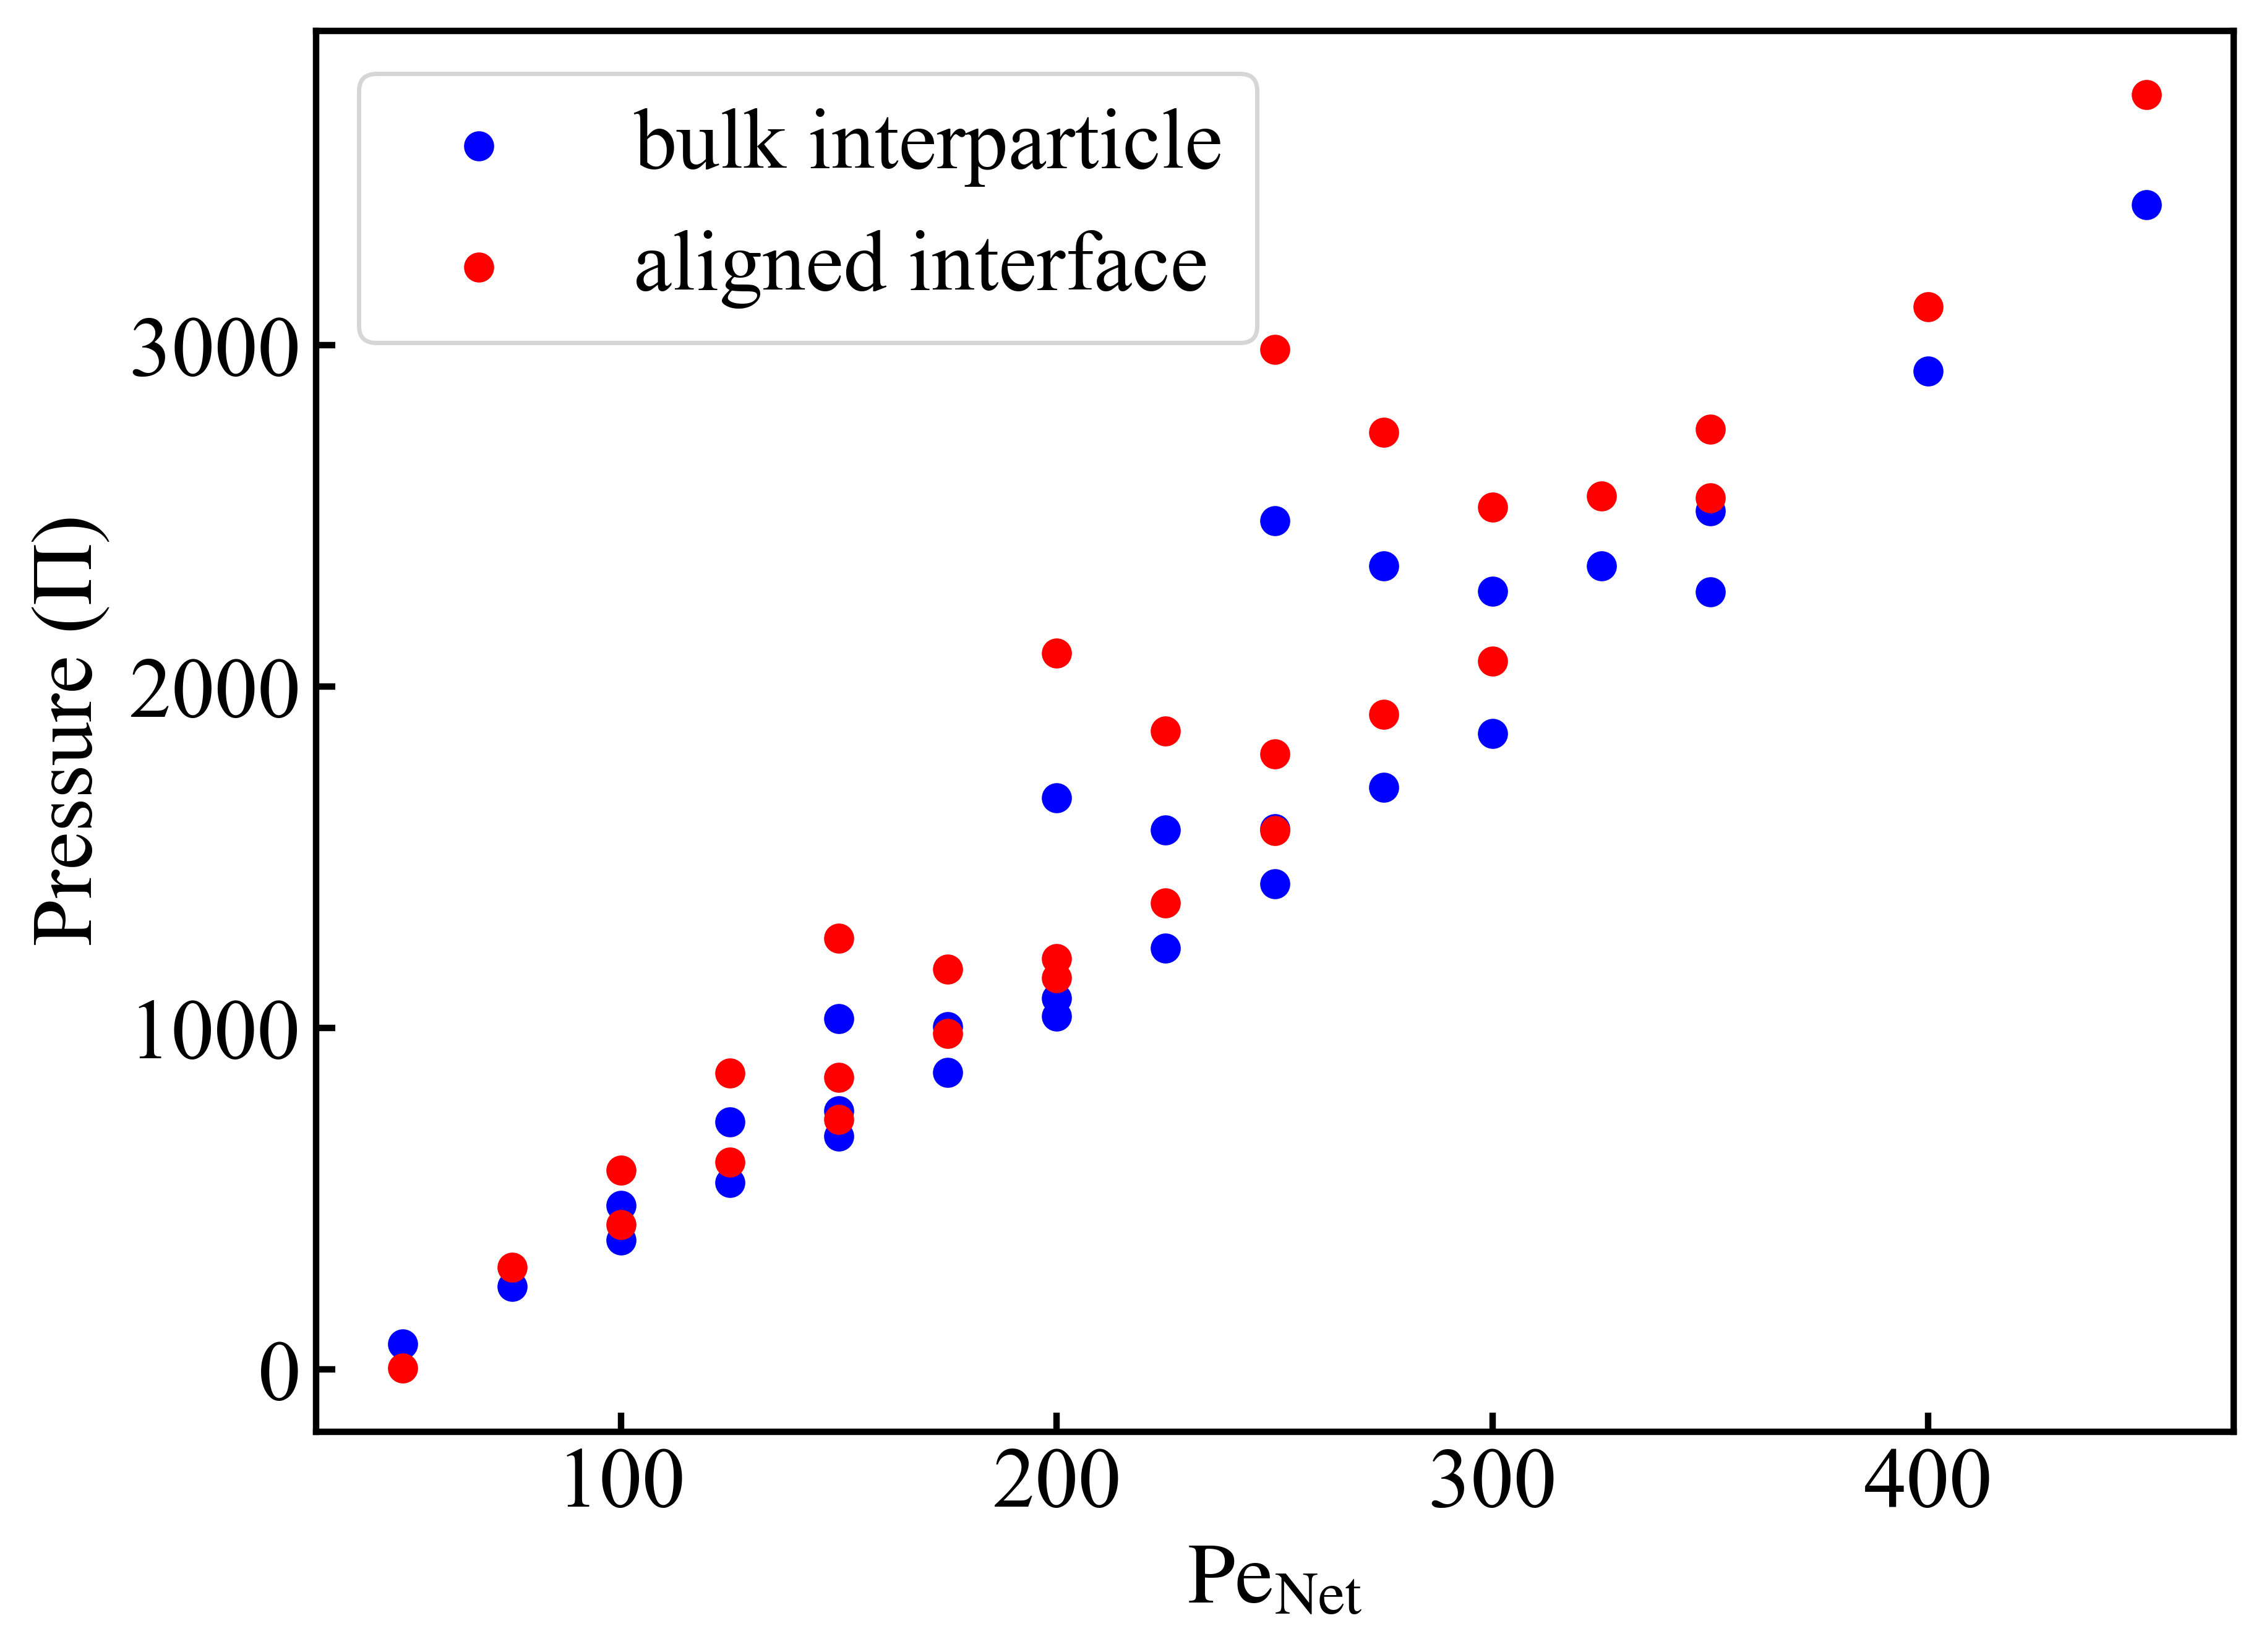

'\nfor i in range(0, len(align_peA)):  \n    for j in range(0, len(align_peB)):  \n        for k in range(0, len(interpart_peA)):  \n            for l in range(0, len(interpart_peB)):  \n                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):\n                    \n'

In [95]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])

for i in range(0, len(all_dens)):
    align_press_total = 0
    align_press_vals=0
    
    # Don't plot non-phase-separated data
    if all_dens[i].empty:
            continue
    
    
    max_size = np.amax(all_dens[i]['clust_size'])
    for j in range(0, len(all_dens[i]['clust_size'])):
        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
            align_press = all_dens[i]['press_align'][j]

            align_press_total += align_press
            align_press_vals += 1
    if align_press_vals > 0:        
        avg_press = (align_press_total/align_press_vals)
        align_press_arr = np.append(align_press_arr, avg_press)
        align_peA=np.append(align_peA, params['peA'][i])
        align_peB=np.append(align_peB, params['peB'][i])
        align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
        align_xA=np.append(align_xA, params['xA'][i])
        align_phi=np.append(align_phi, params['phi'][i])
        align_eps=np.append(align_eps, params['eps'][i])

    
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
for i in range(0, len(all_pres)):
    bulk_press_total = 0
    bulk_press_total_expand = 0
    bulk_press_vals=0
    shear_press_expand=0
    # Don't plot non-phase-separated data
    if all_pres[i].empty:
            continue
    
    
    max_size = np.amax(all_pres[i]['NDense'])
    for j in range(0, len(all_pres[i]['NDense'])):
        #if all_pres[i]['NDense'][j]>=0.95*max_size:
        
            bulk_trace = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
            bulk_press = bulk_trace / (all_pres[i]['bulkArea'].iloc[j])
            
            bulk_trace_expand = (all_pres[i]['bulkSigXX'].iloc[j]+all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j]+all_pres[i]['bulkSigYY'].iloc[j])/2
            bulk_press_expand = bulk_trace_expand / (all_pres[i]['bulkArea'].iloc[j])
            
            shear_stress = (all_pres[i]['bulkSigXY'].iloc[j]+all_pres[i]['bulkSigYX'].iloc[j])/2
            shear_press = shear_stress / (all_pres[i]['bulkArea'].iloc[j])
            if bulk_press > 0:
                shear_press_expand +=shear_press
                bulk_press_total += bulk_press
                bulk_press_total_expand += bulk_press_expand
                bulk_press_vals += 1
    if bulk_press_vals > 0:        
        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
        avg_press = (bulk_press_total/(2*bulk_press_vals))
        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
        interpart_press=np.append(interpart_press, avg_press)
        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
        interpart_peA=np.append(interpart_peA, params2['peA'][i])
        interpart_peB=np.append(interpart_peB, params2['peB'][i])
        interpart_peNet=np.append(interpart_peNet, params2['peB'][i] * (1-params2['xA'][i]/100) + params2['peA'][i] * (params2['xA'][i]/100))
        interpart_xA=np.append(interpart_xA, params2['xA'][i])
        interpart_phi=np.append(interpart_phi, params2['phi'][i])
        interpart_eps=np.append(interpart_eps, params2['eps'][i])

plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

    
'''
for i in range(0, len(align_peA)):  
    for j in range(0, len(align_peB)):  
        for k in range(0, len(interpart_peA)):  
            for l in range(0, len(interpart_peB)):  
                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):
                    
'''

In [96]:
def computeVel(activity):
    "Given particle activity, output intrinsic swim speed"
    # This gives:
    # v_0 = Pe * sigma / tau_B = Pe * sigma / 3 * tau_R
    velocity = (activity * sigma) / (3 * (1/D_r))
    return velocity

def computeActiveForce(velocity):
    "Given particle activity, output repulsion well depth"
    # This is multiplied by Brownian time and gives:
    #          Pe = 3 * v_0 * tau_R / sigma
    # the conventional description of the Peclet number
    activeForce = velocity * threeEtaPiSigma
    return activeForce

def computeEps(alpha, activeForce):
    "Given particle activity, output repulsion well depth"
    # Here is where we will be testing the ratio we use (via alpha)
    epsilon = (alpha * activeForce * sigma / 24.0) + 1.0
    # Add 1 because of integer rounding
    epsilon = int(epsilon) + 1
    return epsilon

def computeTauLJ(epsilon):
    "Given epsilon, compute lennard-jones time unit"
    tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
    return tauLJ


def compPeNet(xf, pes, pef):
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def clustFrac(phi, phiG, aF, aS, xF, sig=1.):
    '''Compute the fraction of particles in the cluster'''
    if xF == 0.:
        phiLS = latToPhi(aS)
        phiLF = 1.
    elif xF == 1.:
        phiLS = 1.
        phiLF = latToPhi(aF)
    else:
        phiLS = latToPhi(aS)
        phiLF = latToPhi(aF)
    coeff = (phiG - phi) / phi
    num = phiLF * phiLS
    den = ( phiG * ((phiLS*xF) + (phiLF*(1.-xF))) ) - (phiLF * phiLS)
    ans = coeff * num / den
    return ans
#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# Use latNet to space your particles
def computeDistance(x, y):
    return np.sqrt((x**2) + (y**2))
 
def interDist(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  
def orientToOrigin(x, y, act):
    "Using similar triangles to find sides"
    x *= -1.
    y *= -1.
    hypRatio = act / np.sqrt(x**2 + y**2)
    xAct = hypRatio * x
    yAct = hypRatio * y
    return xAct, yAct

def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

def activityProbability(r, r_swap = [], probA = []):
    "Using similar triangles to find sides"
    if len(r_swap)>0:
        prob_rA = np.zeros(len(r))
        prob_rB = np.zeros(len(r))
        for i in range(1, len(r_swap)):
            r_min = find_nearest(r, r_swap[i-1])
            r_max = find_nearest(r, r_swap[i])
            
            prob_rA[r_min:r_max+1]=probA[i]
            prob_rB[r_min:r_max+1]=1.0-probA[i]
    
    return prob_rA, prob_rB

xF = 0.5
xS = 0.5
eps=1.0
partNum=50000
peS_arr = np.linspace(50, 500, num=200)
peF_arr = np.linspace(50, 500, num=200)

peNet_int_arr = np.array([])
peS_int_arr = np.array([])
peF_int_arr = np.array([])
bulk_theory_arr = np.array([])
press_int_arr = np.array([])
for i in range(0, len(peS_arr)):
    for j in range(0, len(peF_arr)):
        print(i)
        peS = peS_arr[i]
        peF = peF_arr[j]
        pa = peS_arr[i]
        pb = peF_arr[j]
        peNet = compPeNet(xF, peS, peF)
    
        # Compute lattice spacing based on each activity
        latS = getLat(peS, eps)
        latF = getLat(peF, eps)
        latNet = getLat(peNet, eps)
        latF=latNet
        latS=latNet
        
        # Compute gas phase density, phiG
        phiG = compPhiG(peNet, latNet)
        phi_theory = latToPhi(latNet)

        Nl = int(round(partNum * ((phi_theory * (phiG - phi)) / (phi * (phiG - phi_theory)))))

        # Now you need to convert this to a cluster radius
        phiCP = np.pi / (2. * np.sqrt(3))
        
        # The area is the sum of the particle areas (normalized by close packing density of spheres)
        Al = (Nl * np.pi * (latNet)**2) / (4*phiCP)
        
        # The cluster radius is the square root of liquid area divided by pi
        Rl = np.sqrt(Al / np.pi)

        r_arr = np.linspace(0, 2, num=400)
        probA_fast_out = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
        probA_random =   [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
        prob_arr_A, prob_arr_B = activityProbability(r_arr, r_swap = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0], probA=probA_random)

        dens = densProbability(r_arr, peNet, peS)
        align = alignProbability(r_arr, peNet, peS)
        press = dens * align * (prob_arr_A * pa + prob_arr_B * pb)

        press_int = 0
        for k in range(1, len(press)):
            press_int += ((press[k-1]+press[k])/2)*(r_arr[k]-r_arr[k-1]) * Rl
        bulk_theory_arr = np.append(bulk_theory_arr, 4*np.sqrt(3)*peNet / latNet)
        press_int_arr = np.append(press_int_arr, press_int)
        peS_int_arr = np.append(peS_int_arr, peS)
        peF_int_arr = np.append(peF_int_arr, peF)
        peNet_int_arr = np.append(peNet_int_arr, peNet)
        #print(press_int)
        #press_interpart = 4 * np.sqrt(3) * (peNet-50) / latNet
        #print(press_interpart)
        


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
1

31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
3

45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
4

59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
6

73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
7

87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
8

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101


111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112


121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122


131
131
131
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133


142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
142
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143


153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154


163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164
164


174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
174
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175
175


184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
184
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185
185


194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
195
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196
196


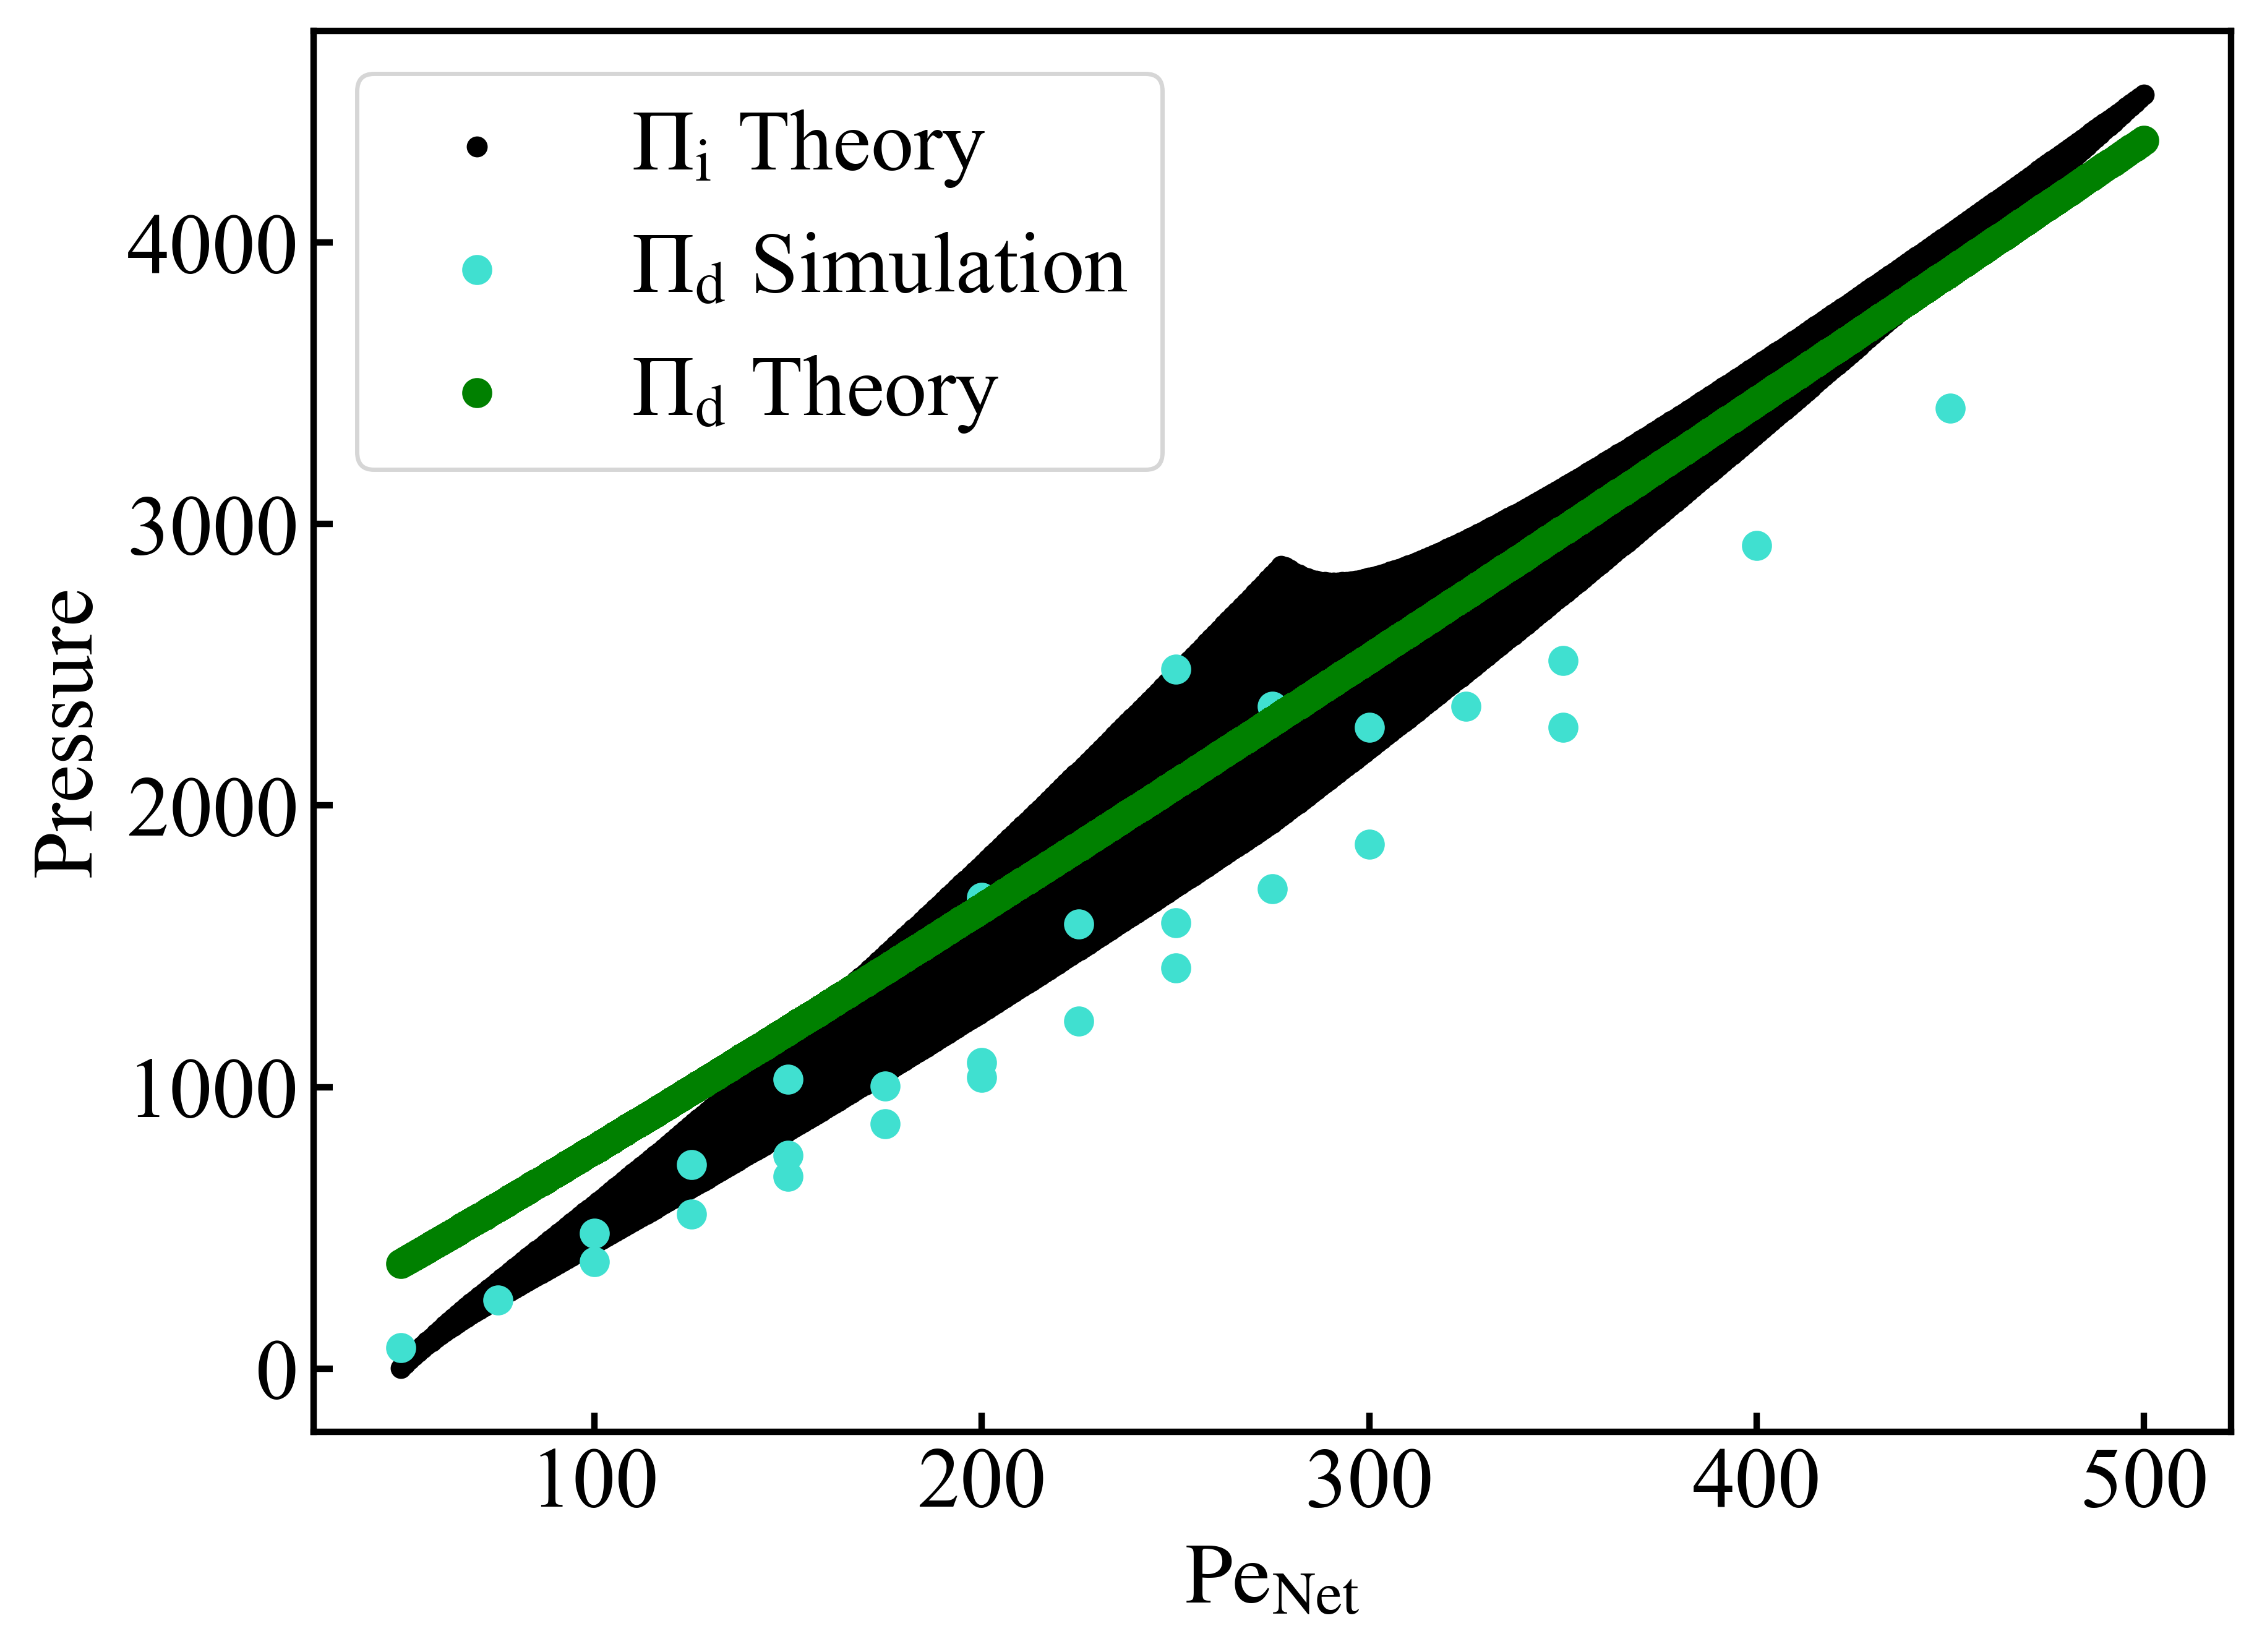

In [99]:
plt.figure(figsize=(8,6))
#plt.scatter(interpart_peNet, interpart_press, s=10.0, color='blue', label='bulk interparticle')
plt.scatter(peNet_int_arr, press_int_arr, s=15.0, color='black', label=r'$\Pi_\mathrm{i}$ Theory')
plt.scatter(interpart_peNet, interpart_press, c='turquoise', label='$\Pi_\mathrm{d}$ Simulation')
plt.scatter(peNet_int_arr, bulk_theory_arr, c='green', label=r'$\Pi_\mathrm{d}$ Theory')

#plt.scatter(align_peNet, align_press_arr, s=15.0, color='red', label='Simulation')


plt.ylabel(r'Pressure')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend(loc='upper left')
#plt.ylim([-2500, 25000])
plt.show() 

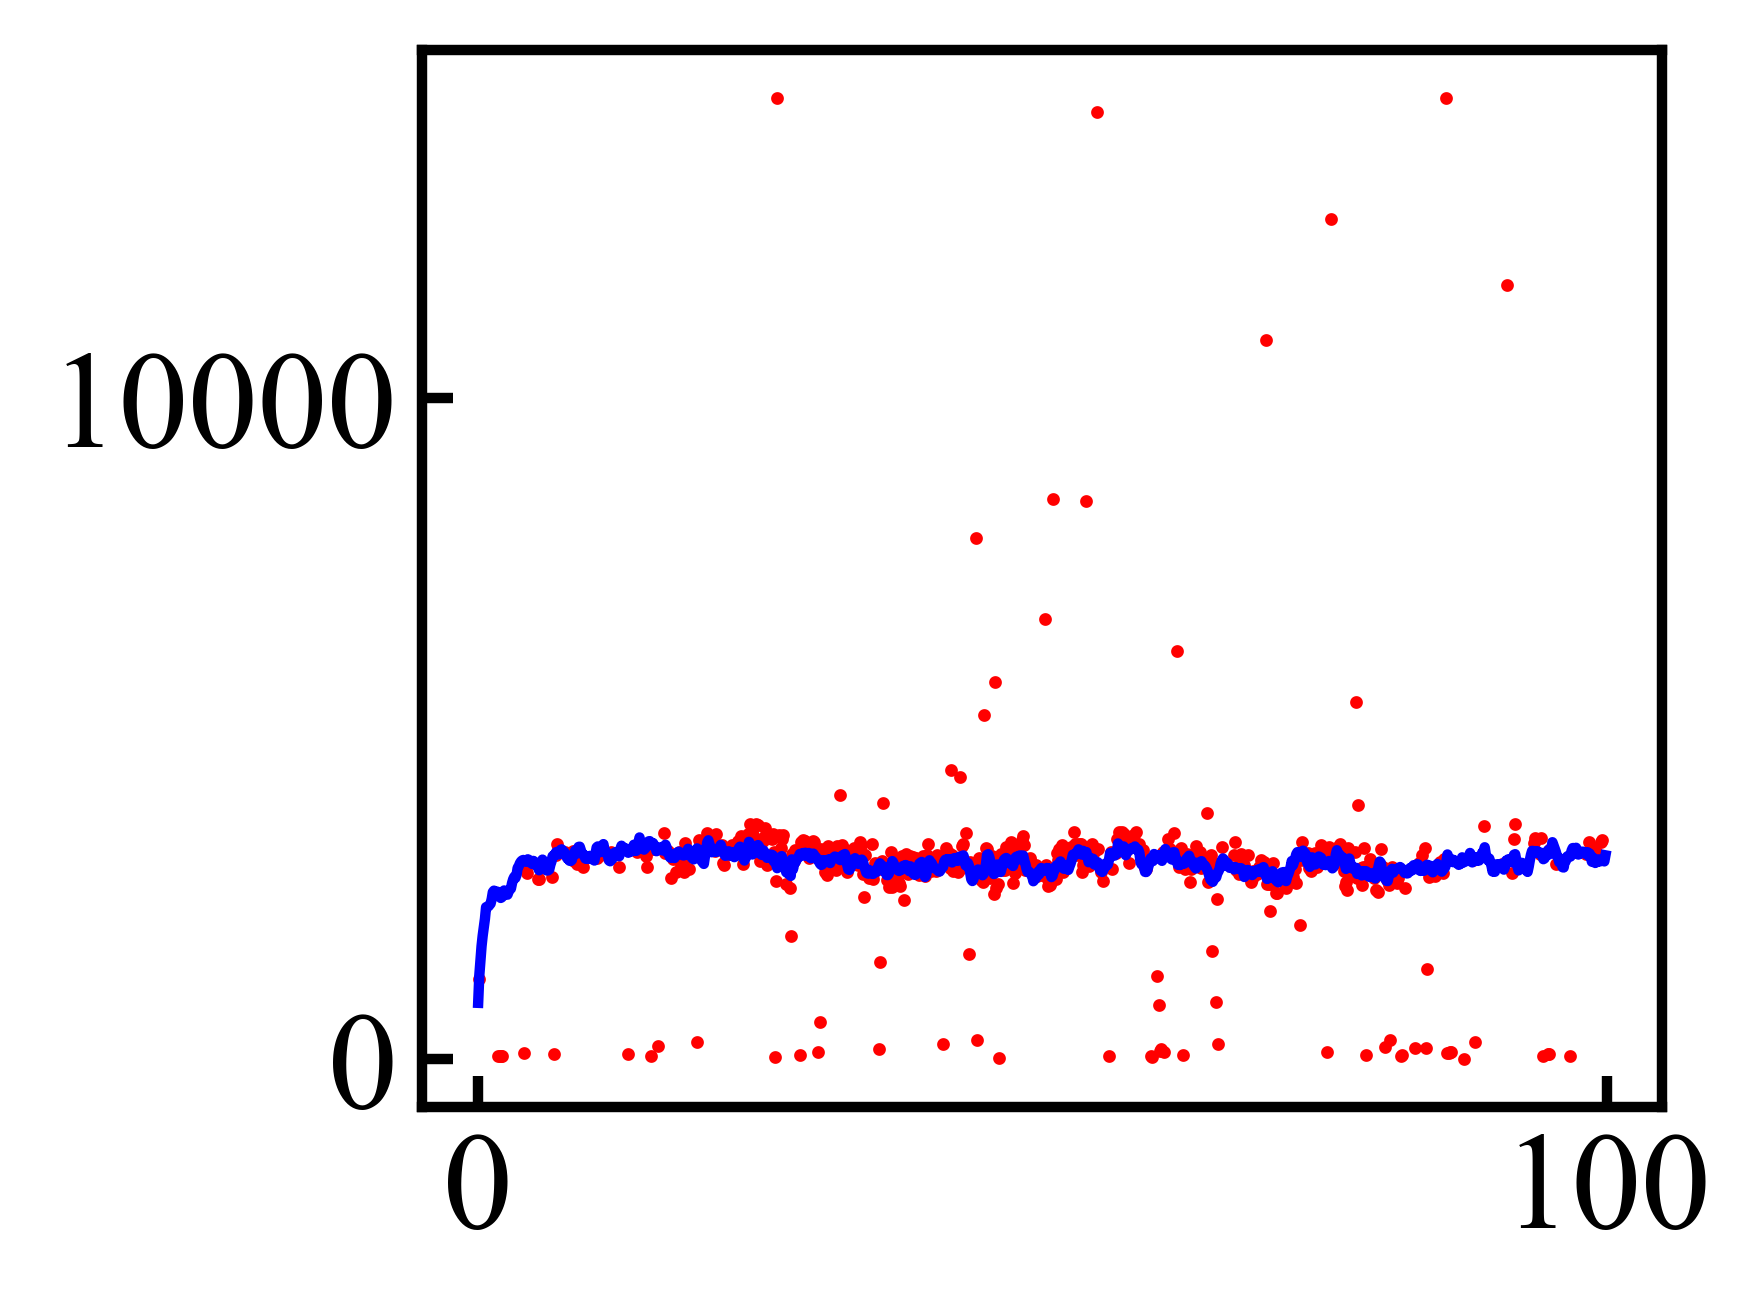

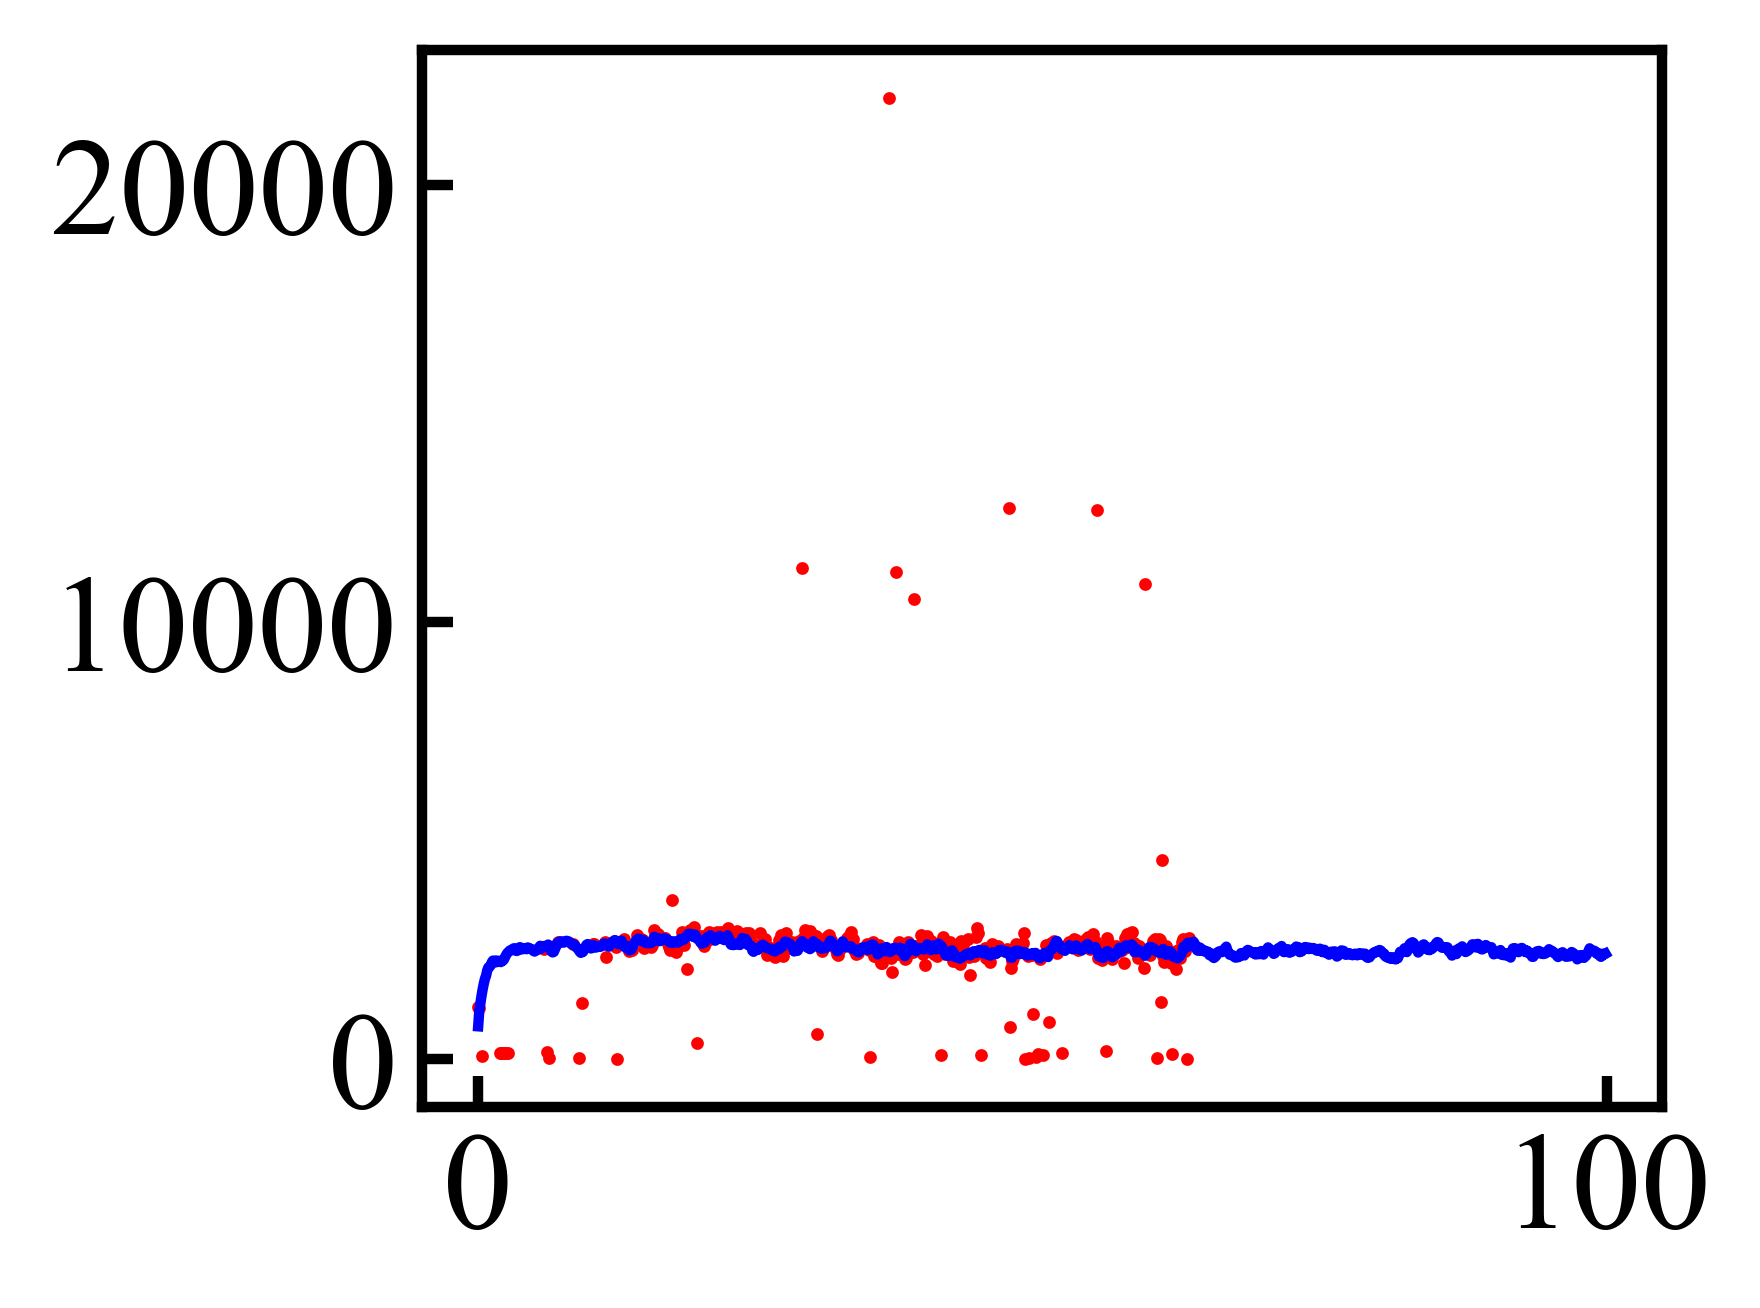

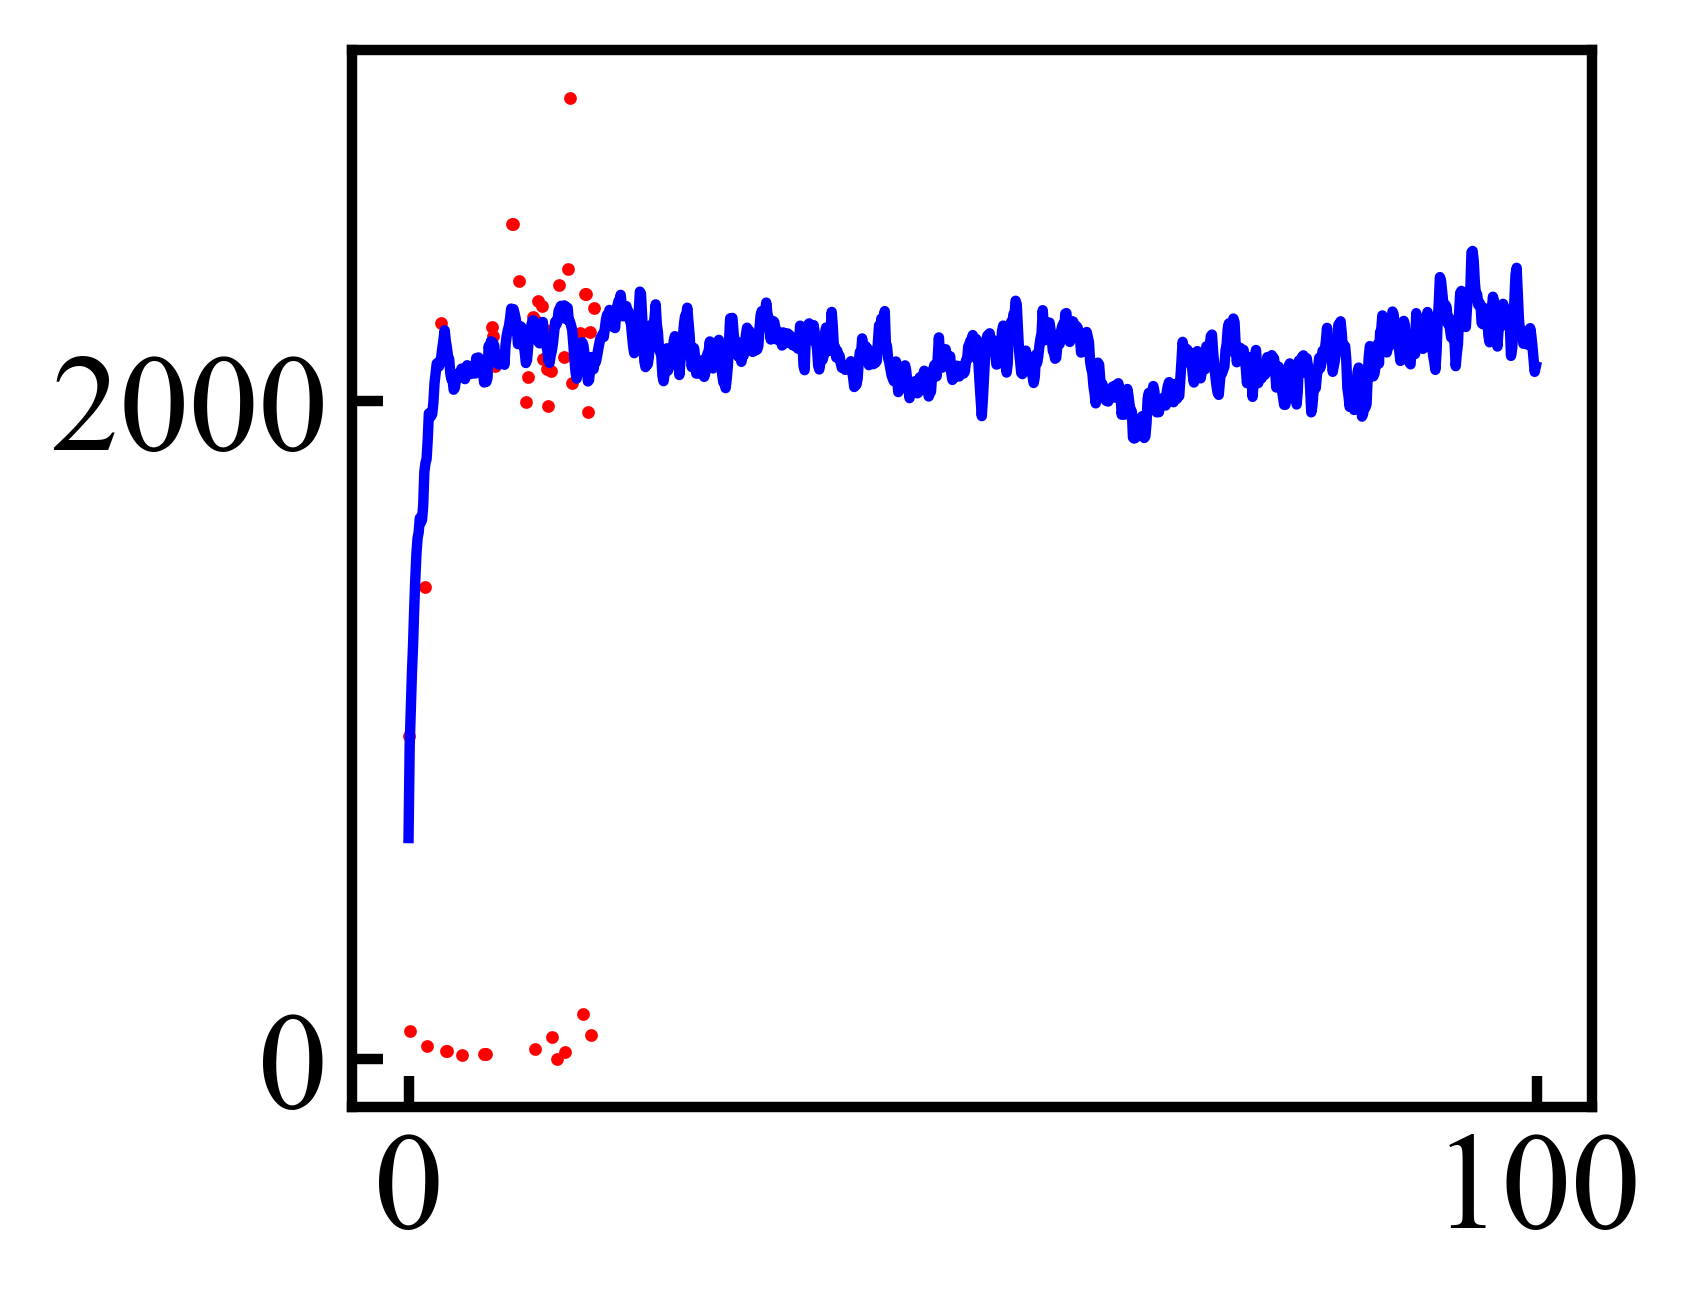

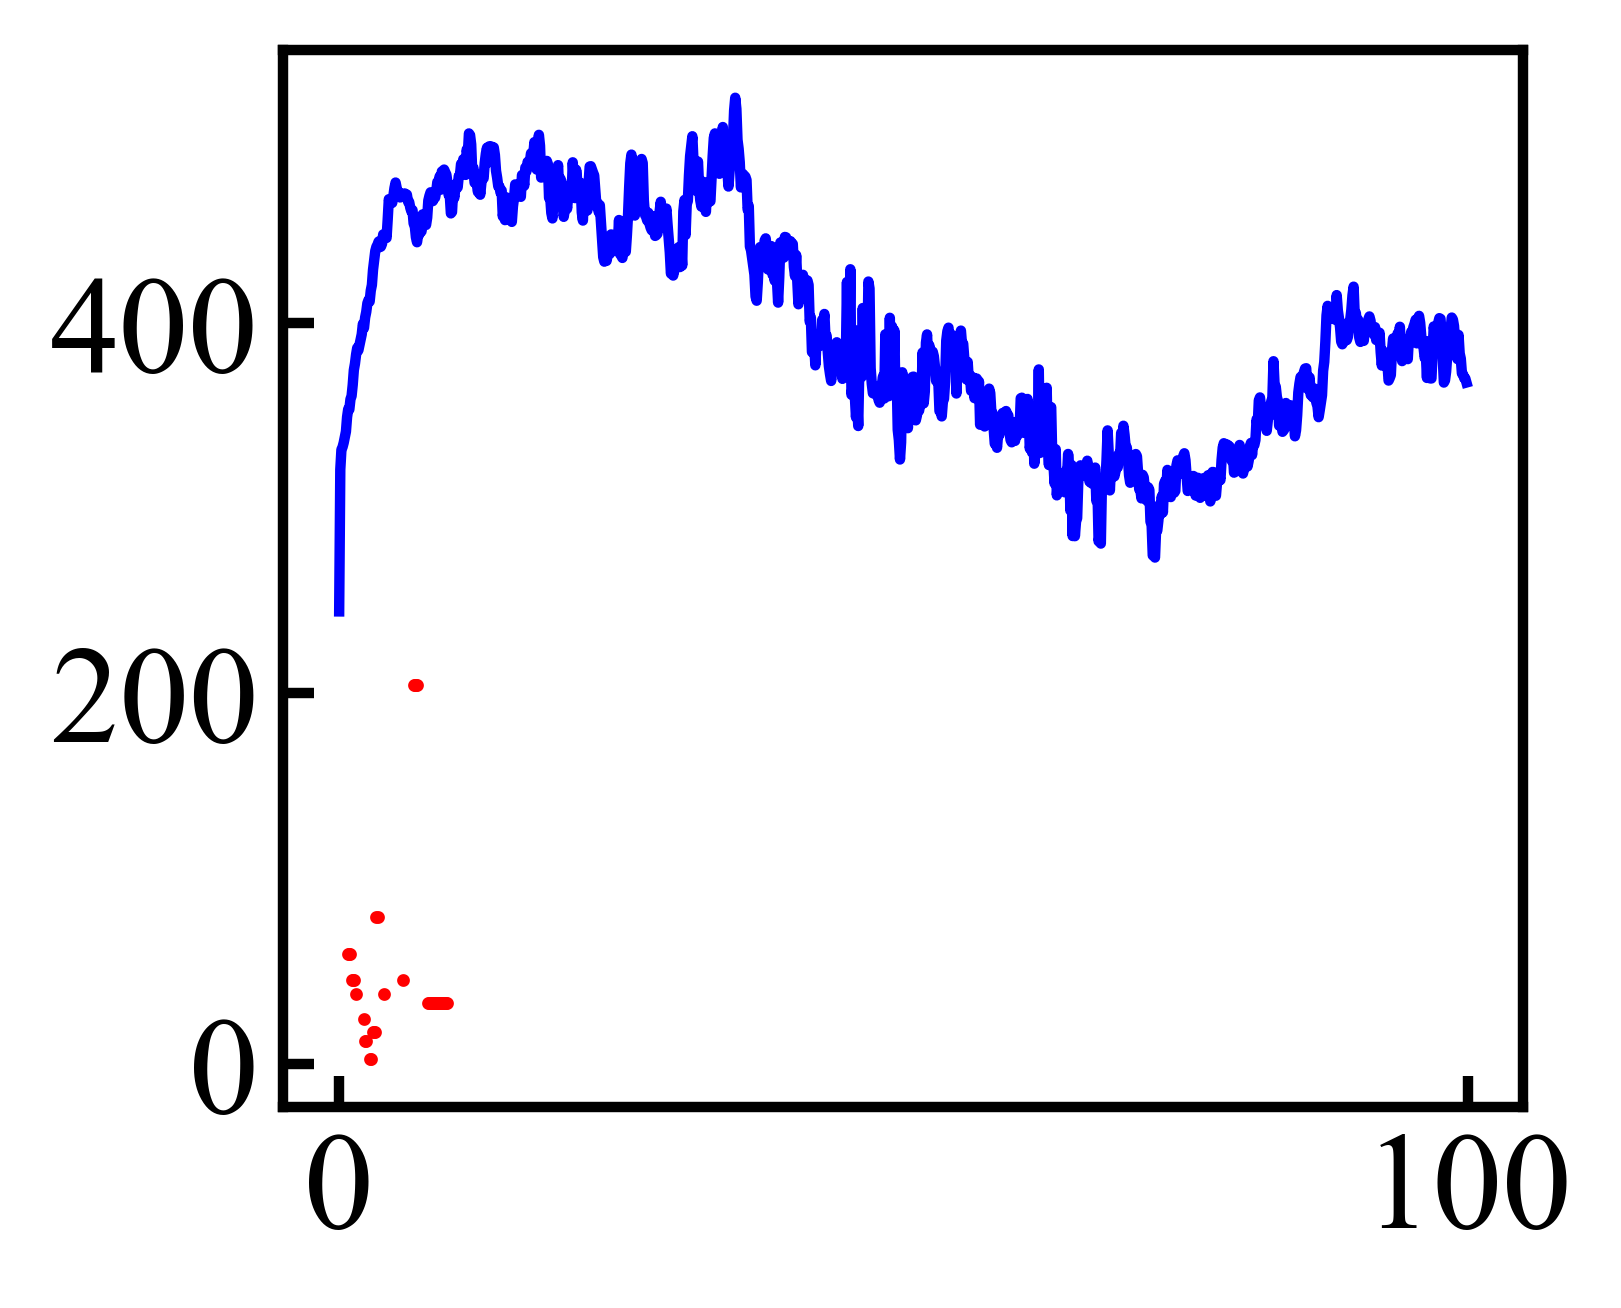

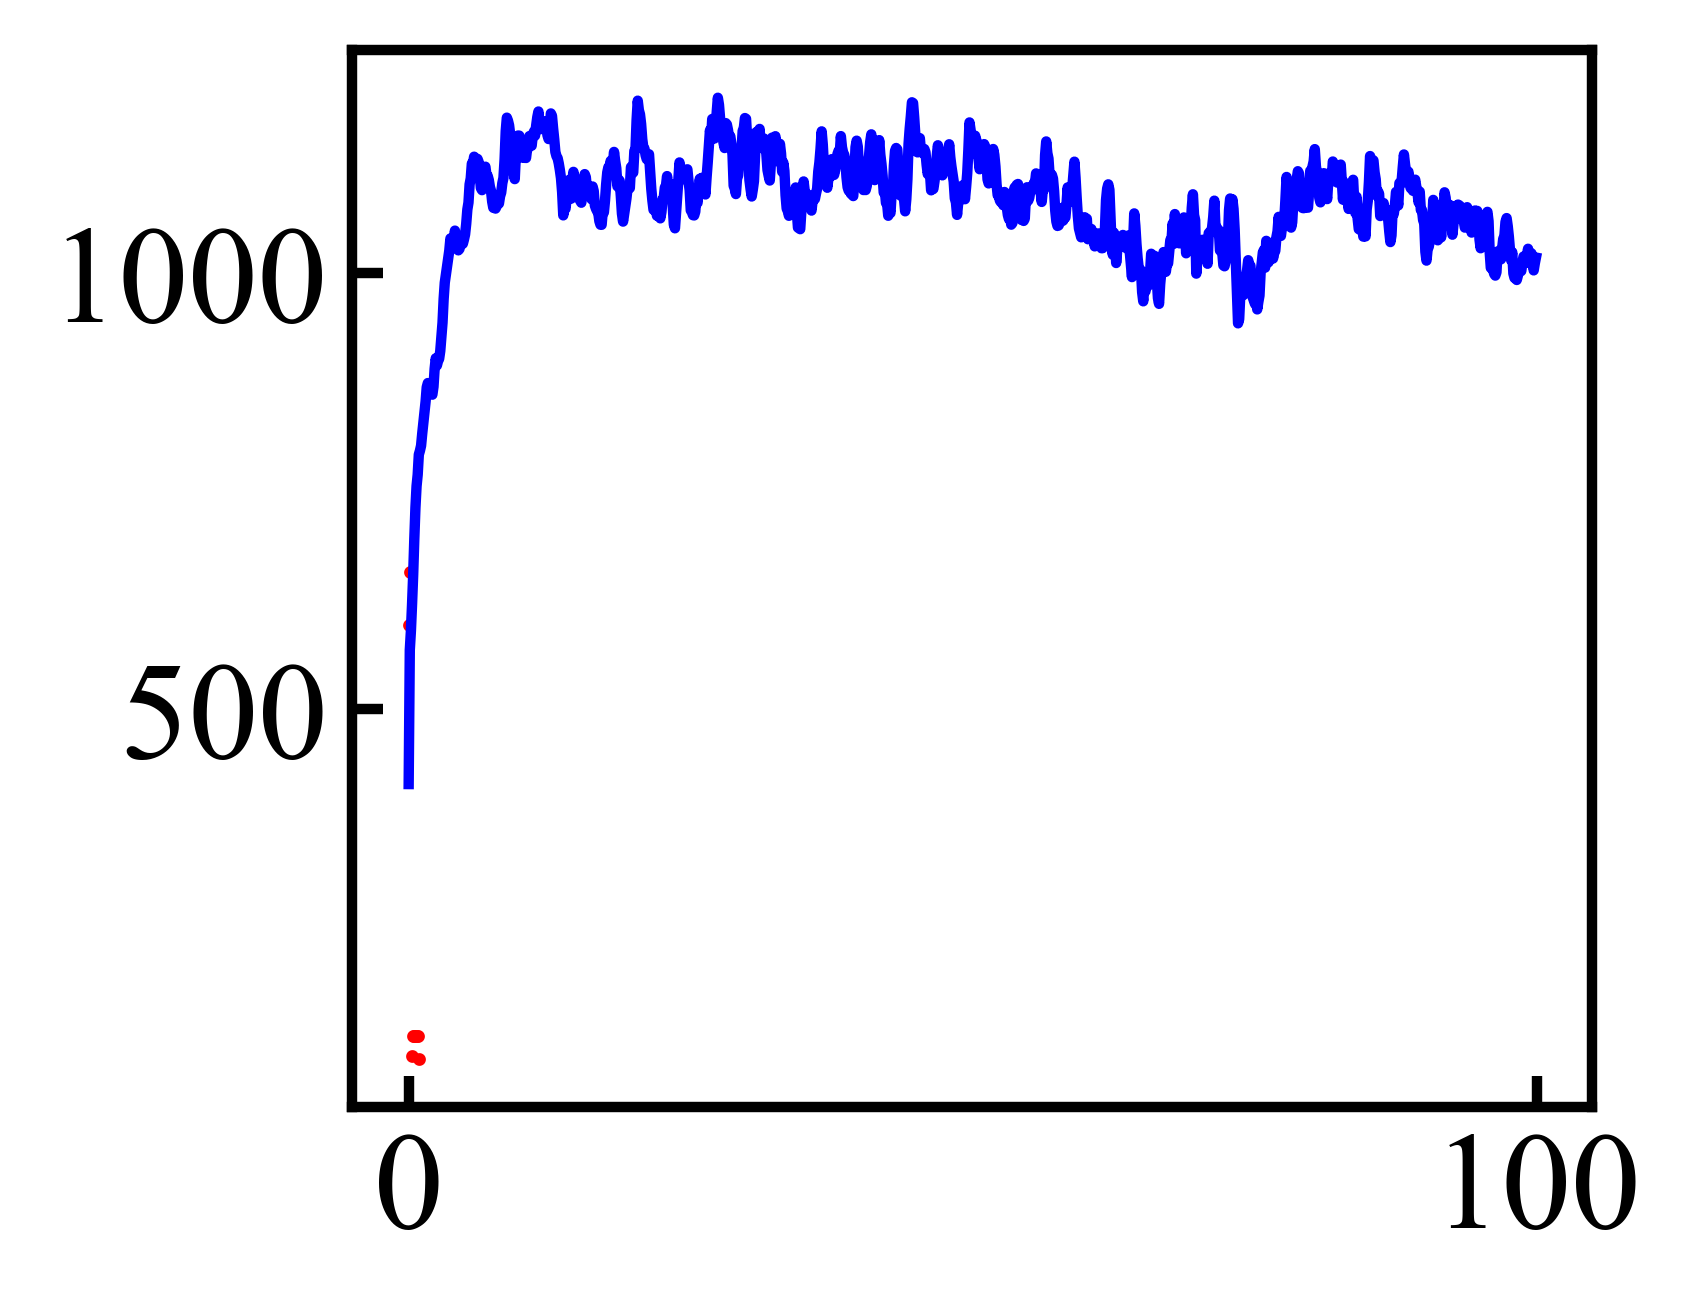

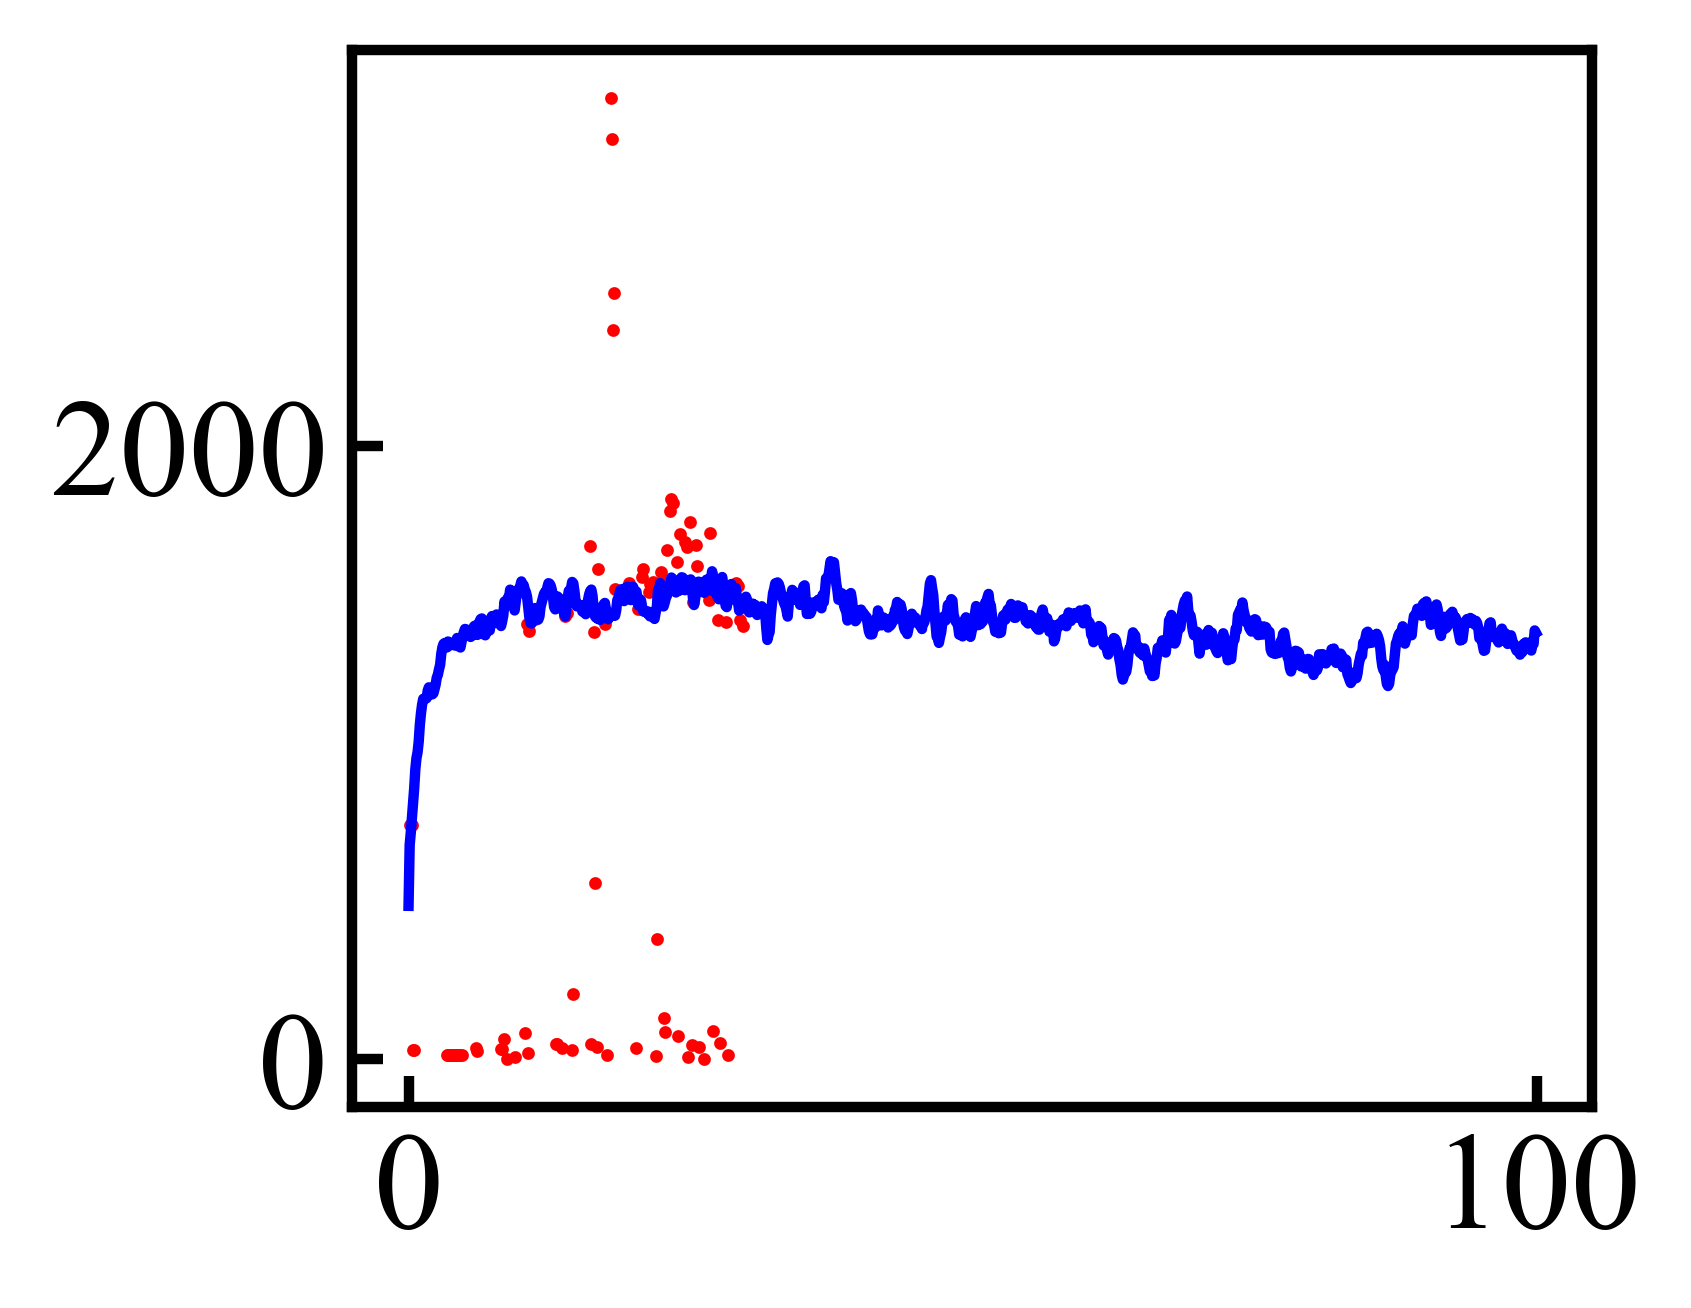

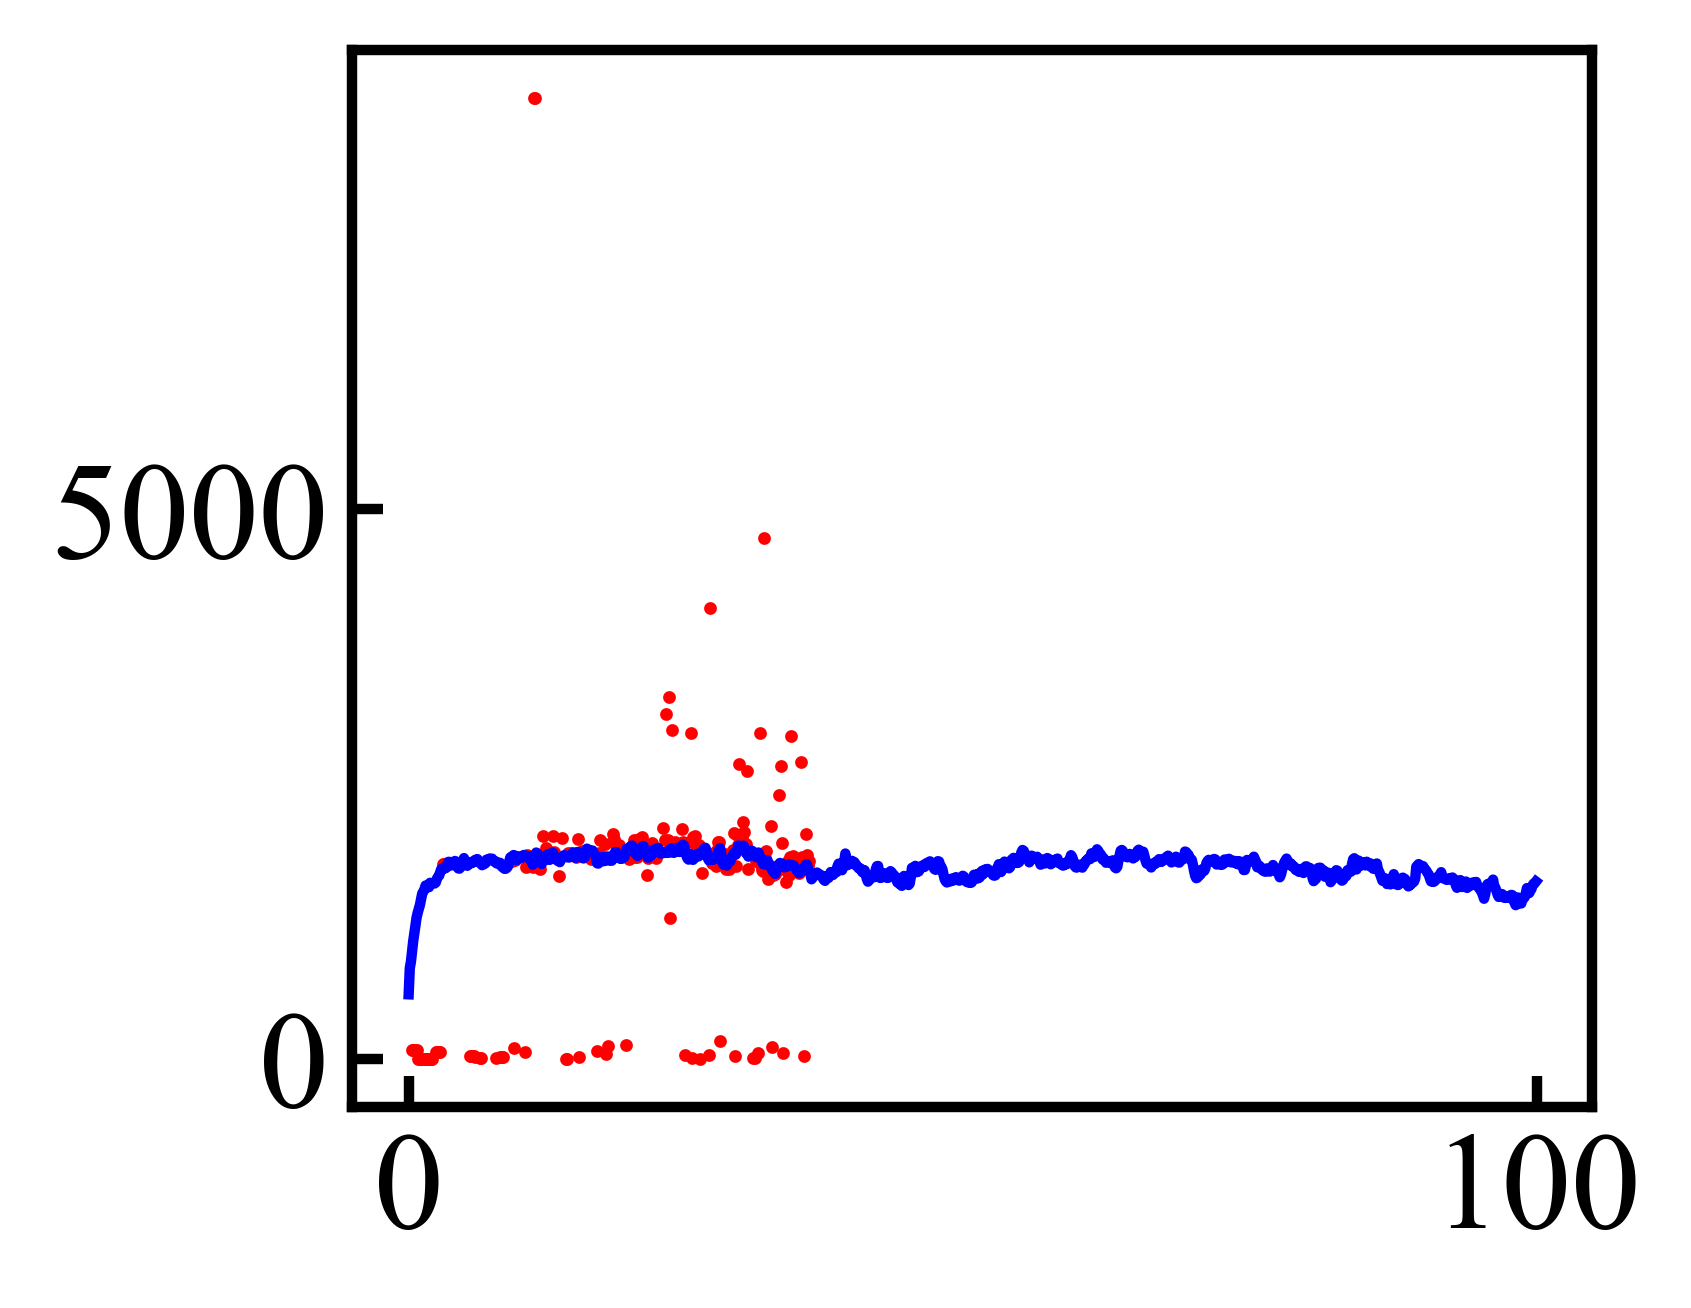

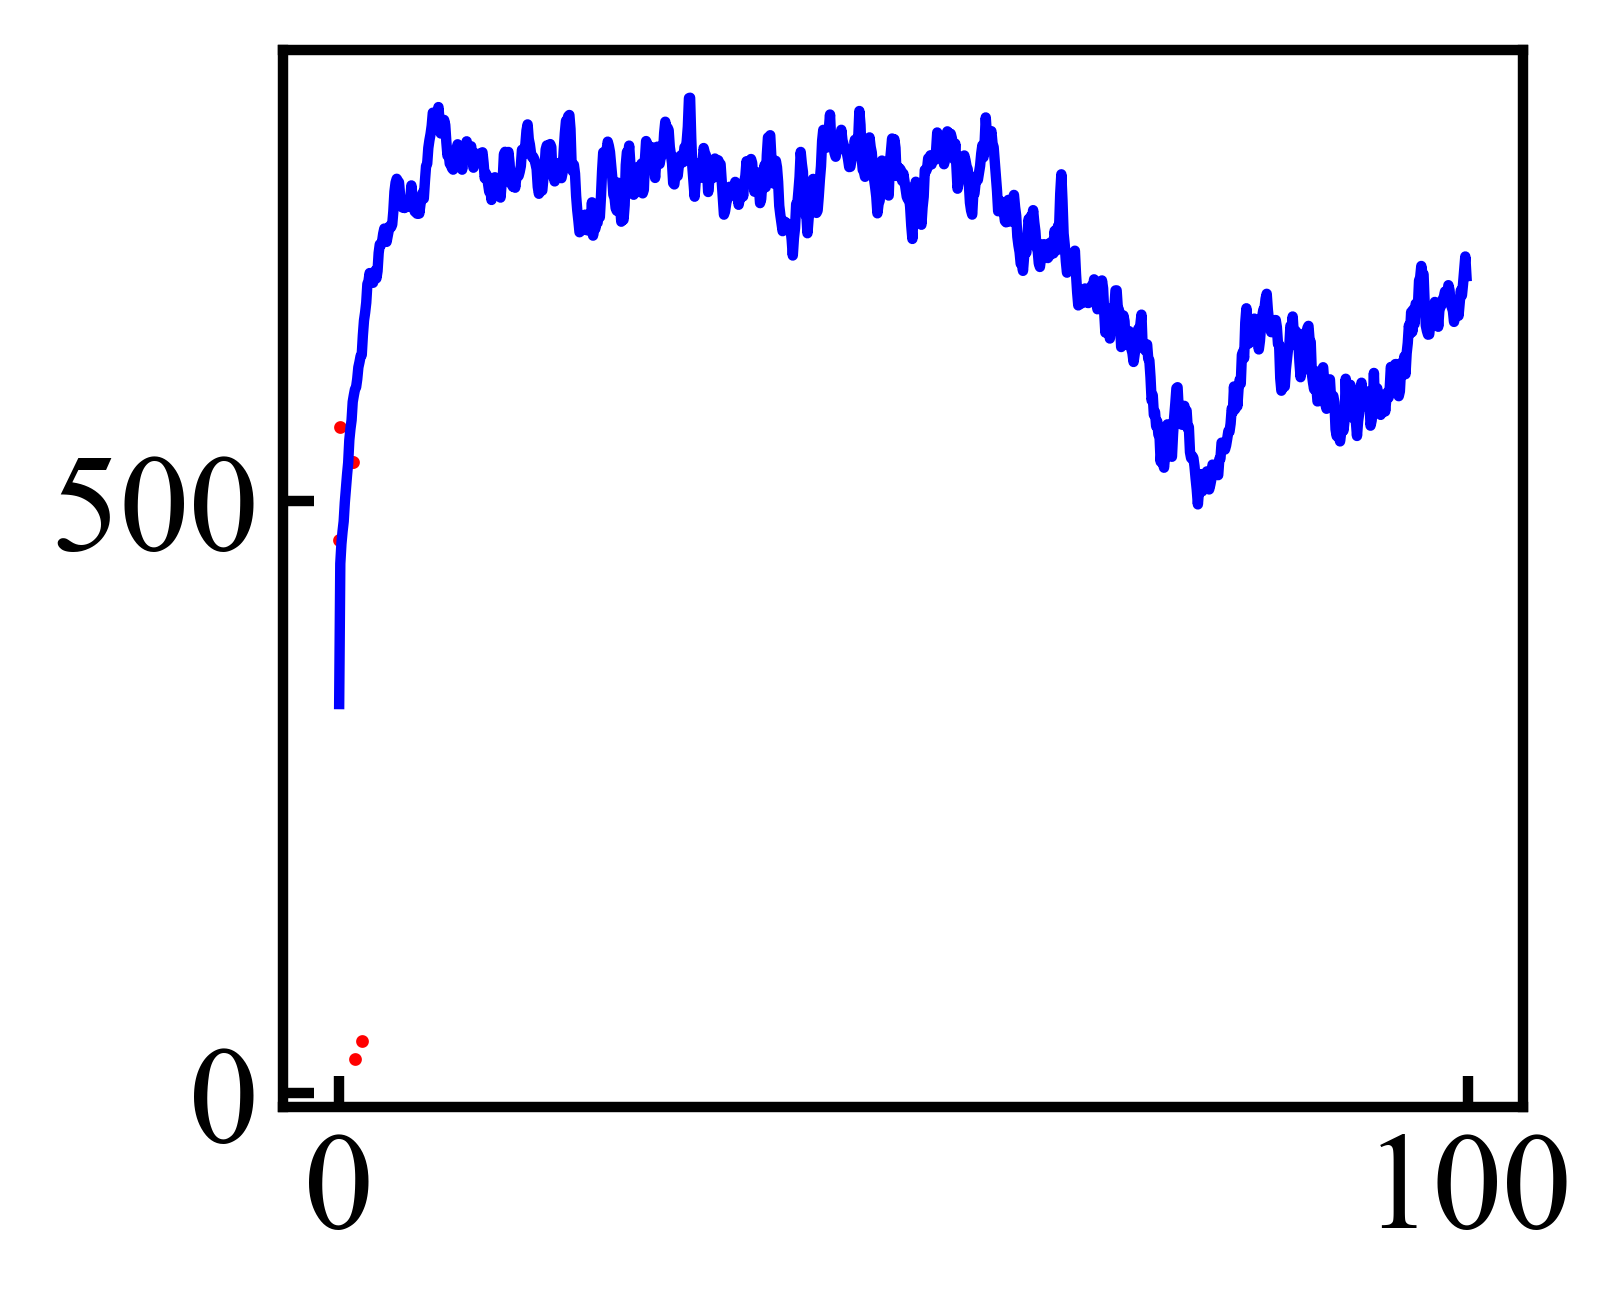

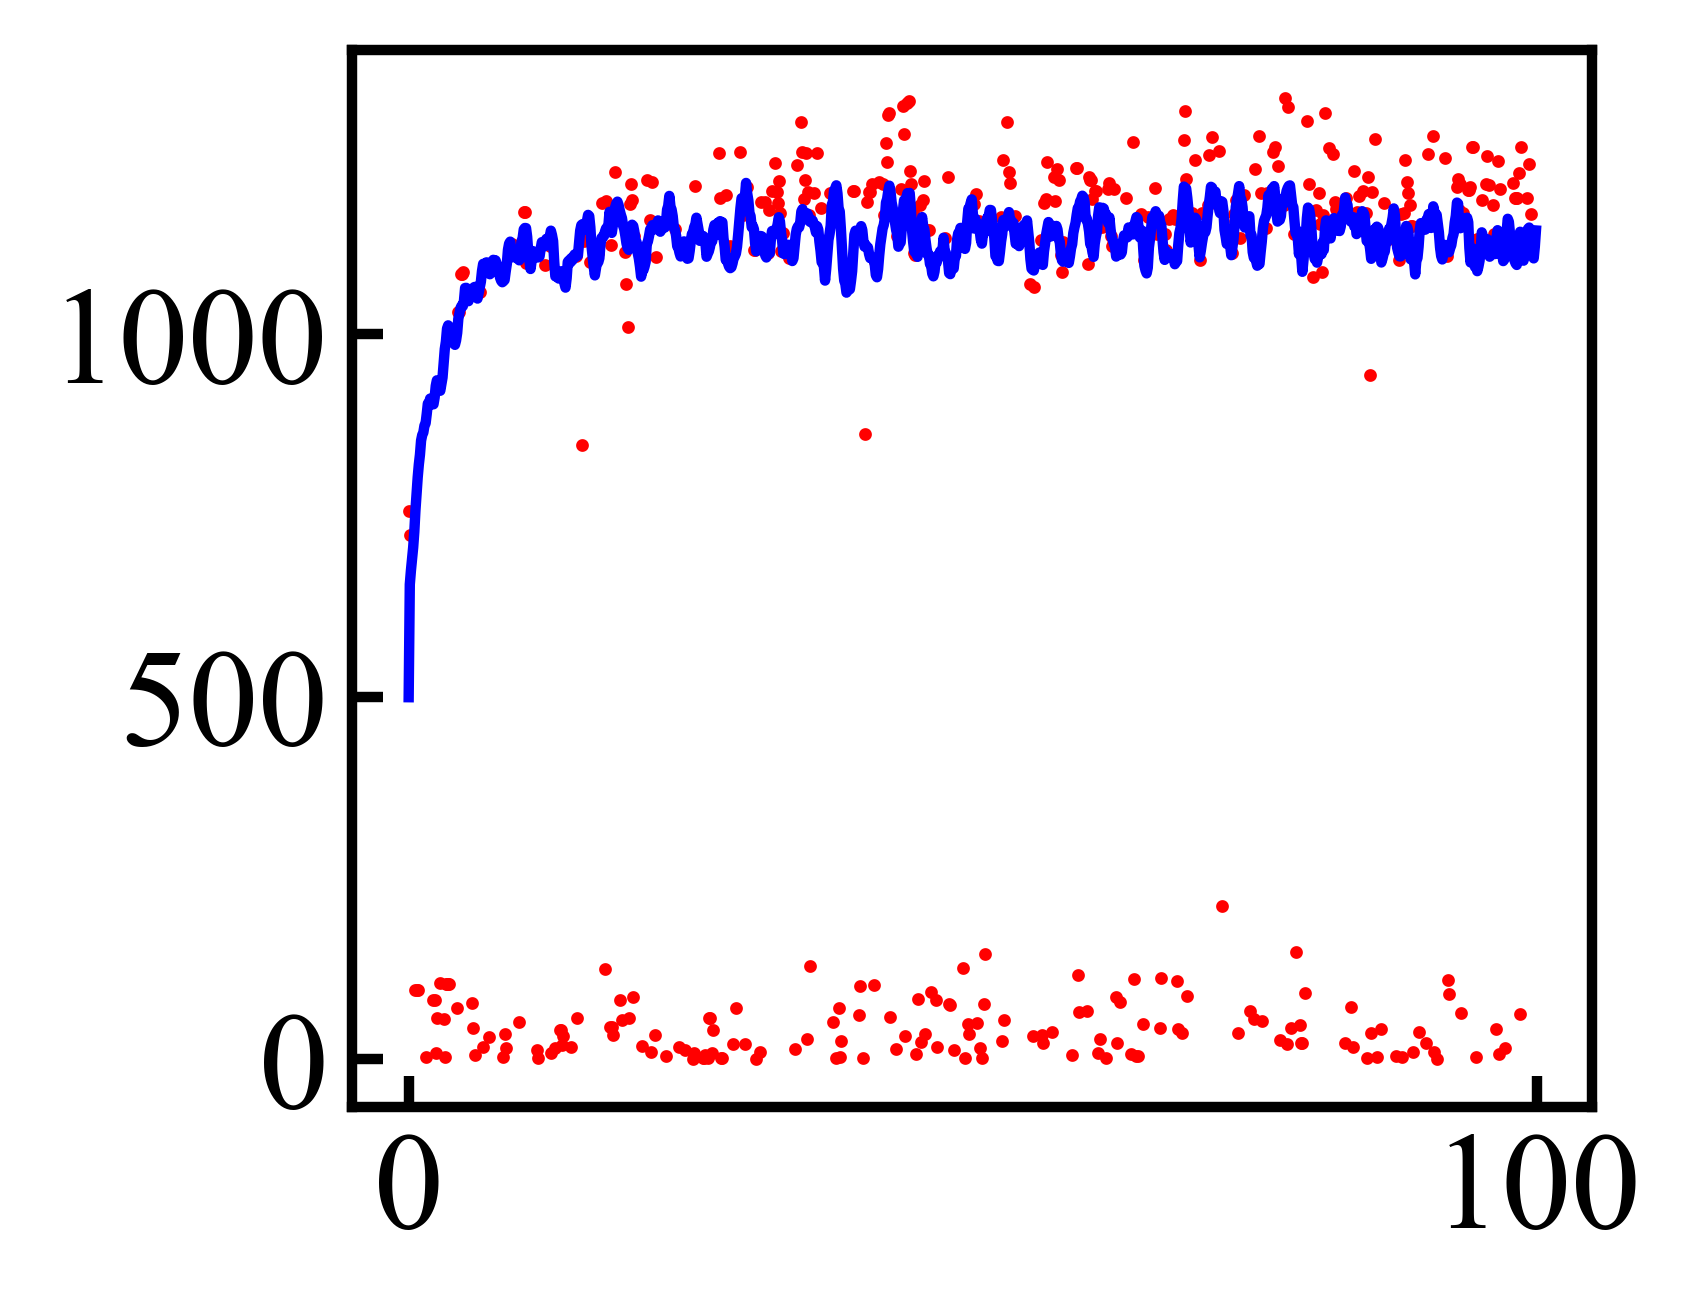

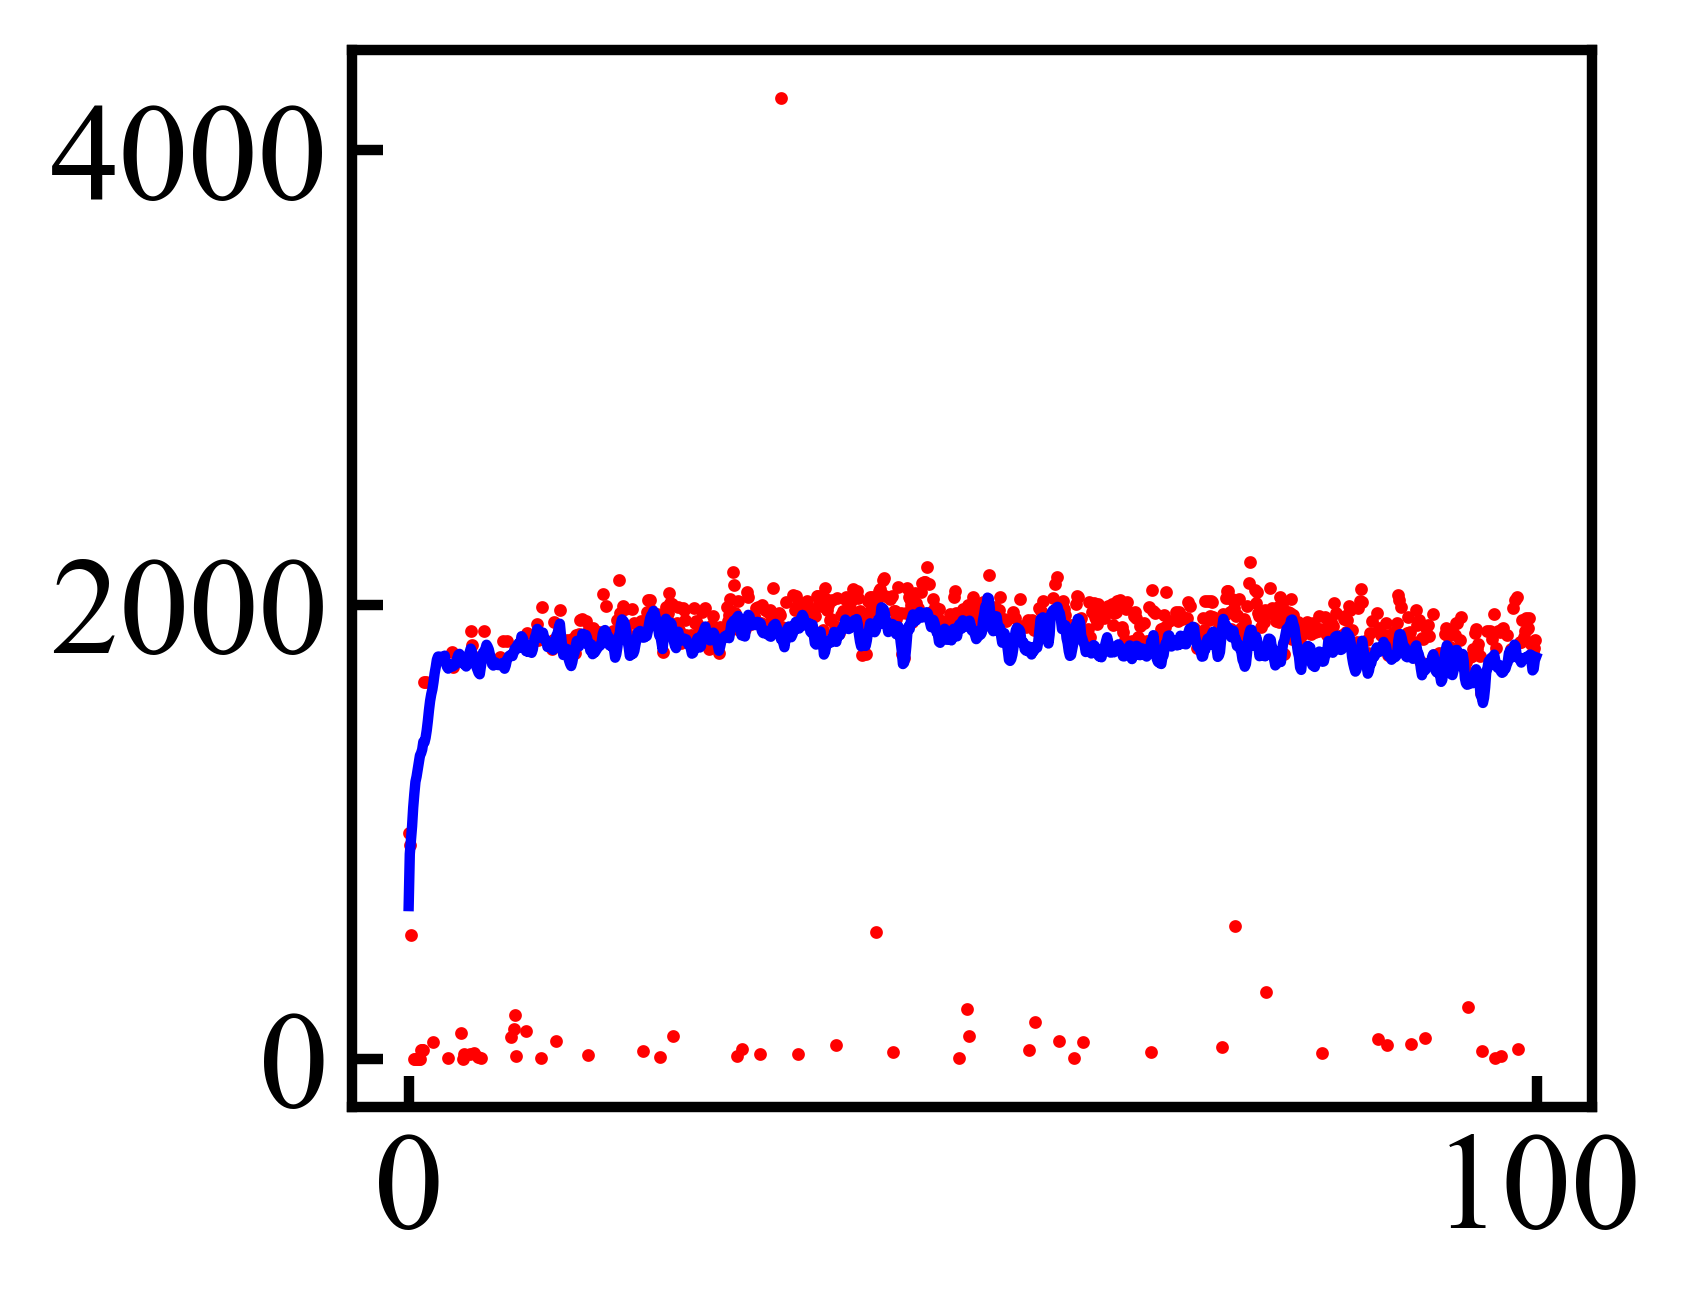

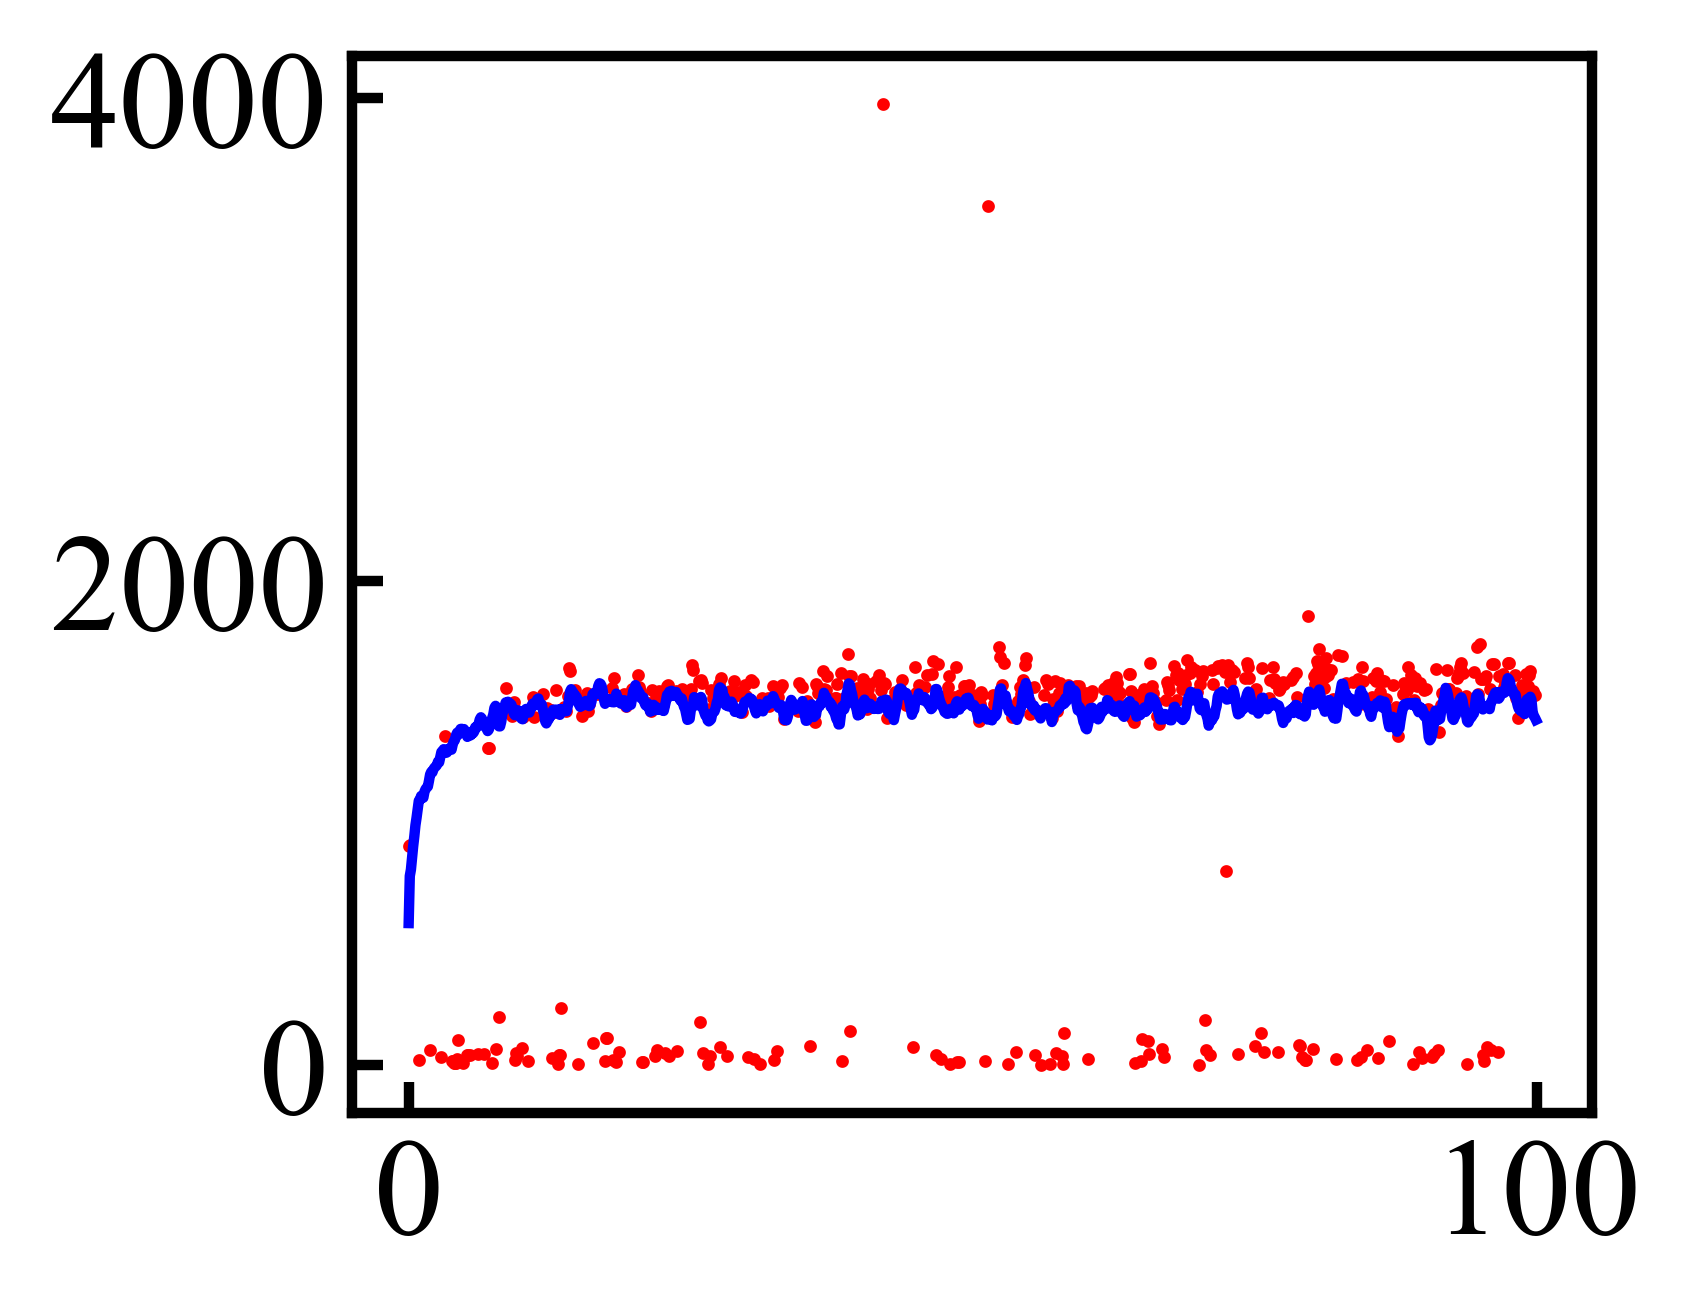

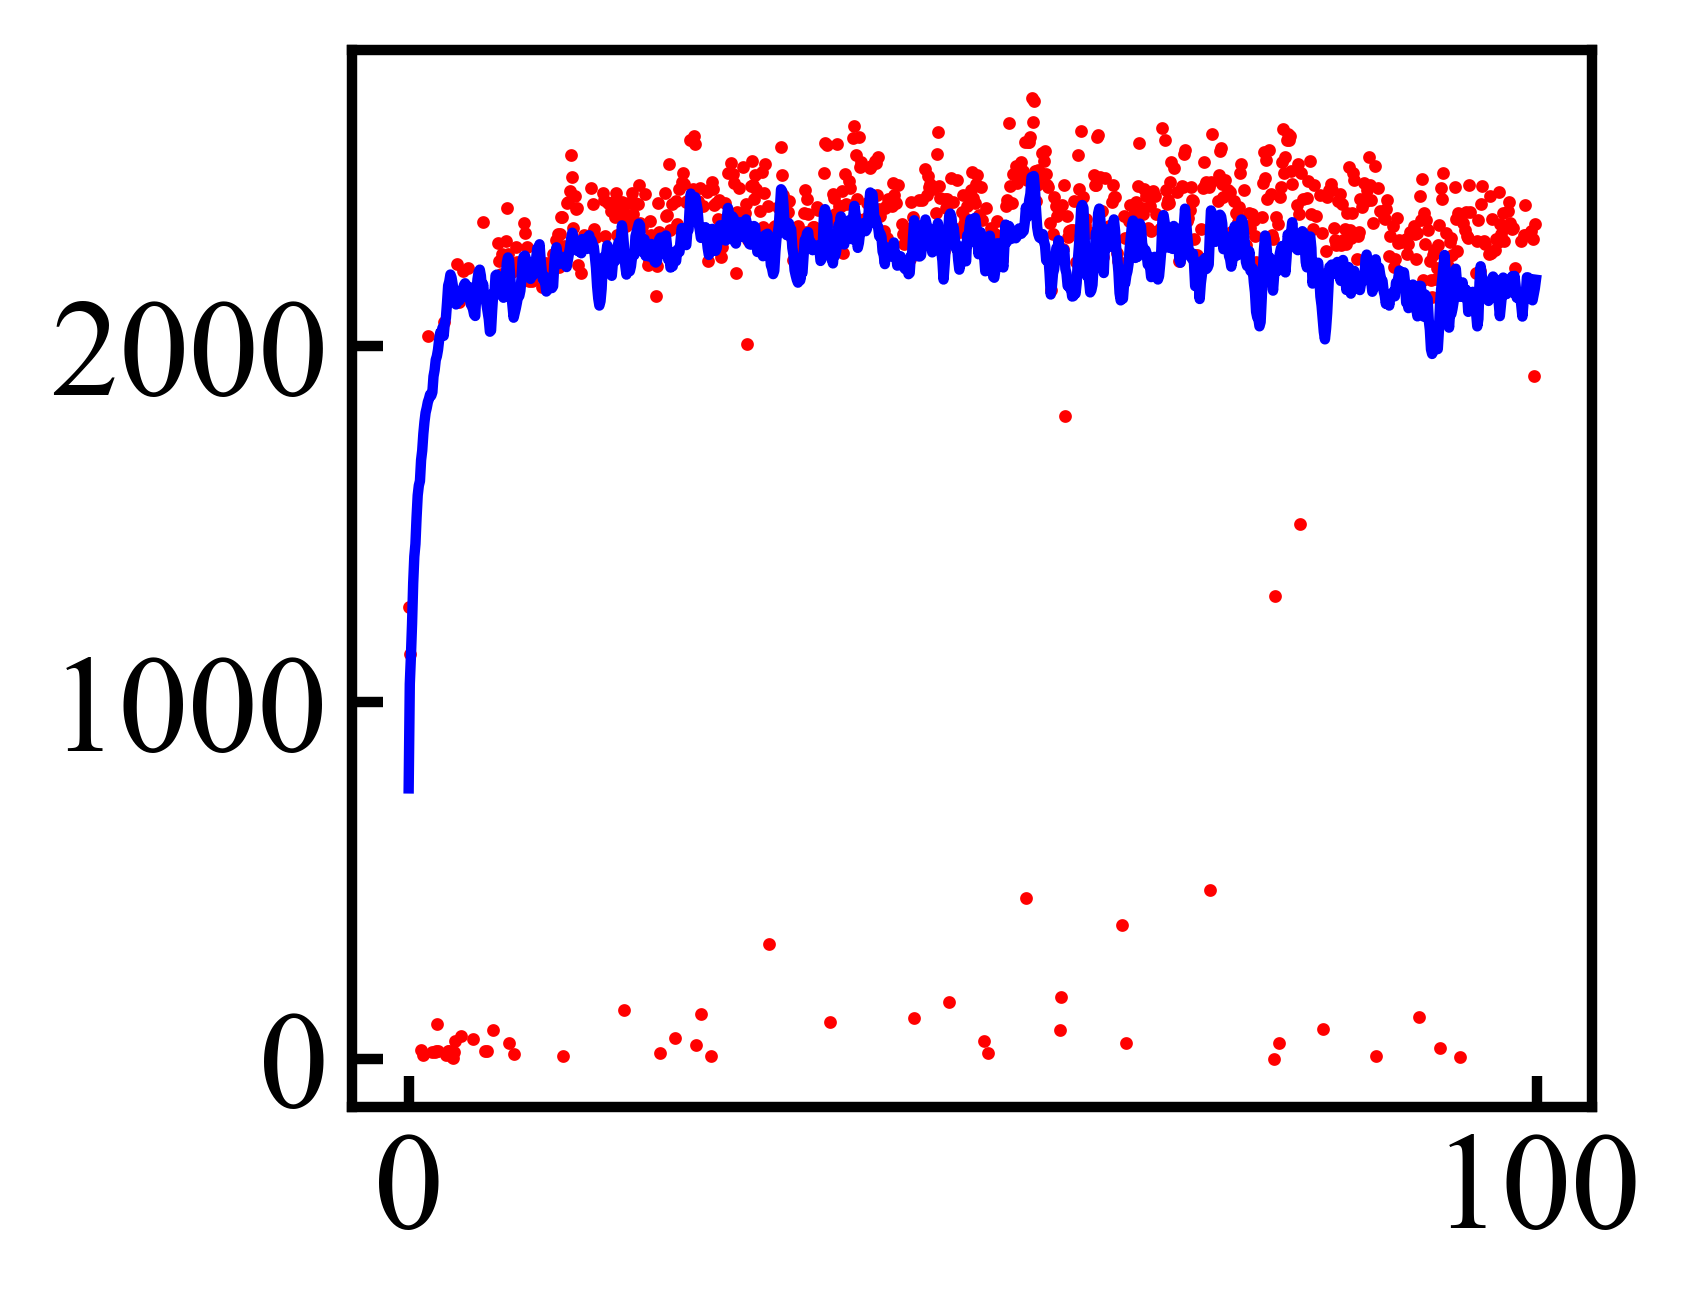

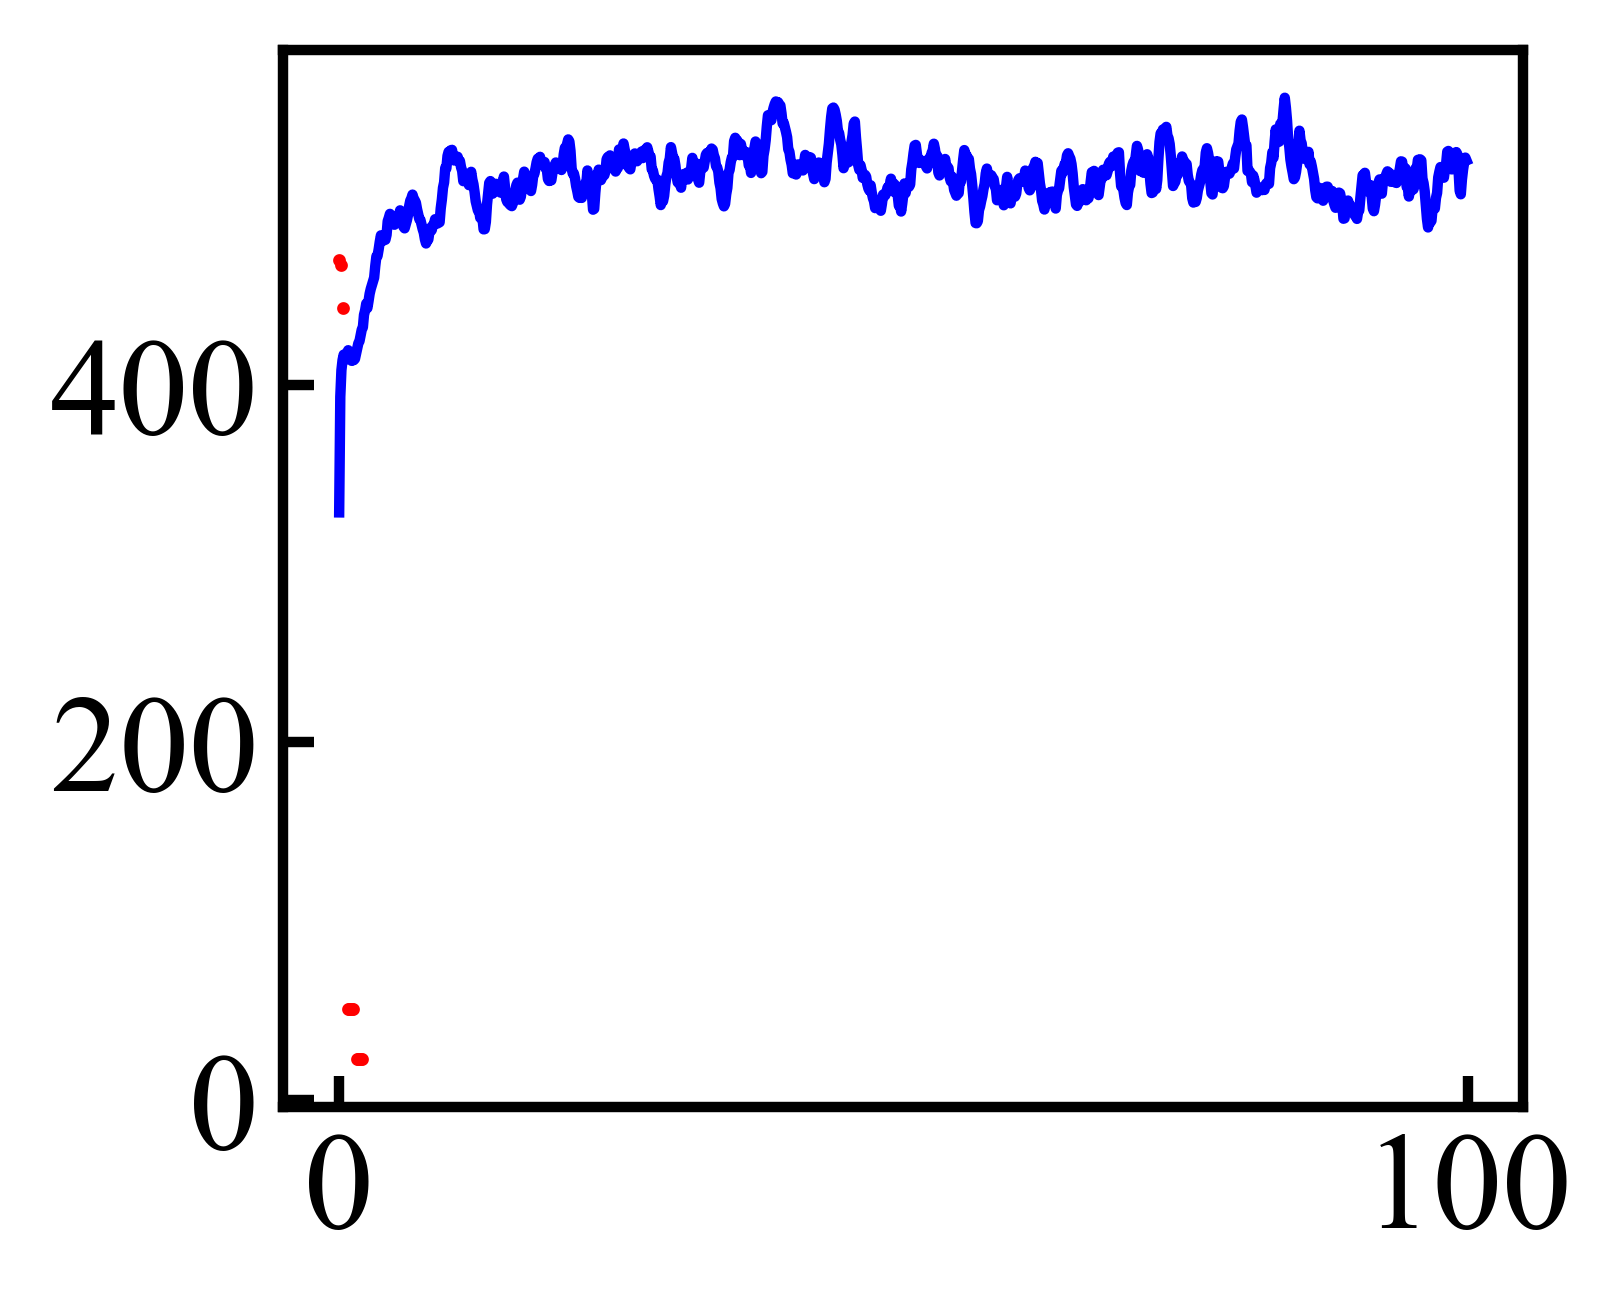

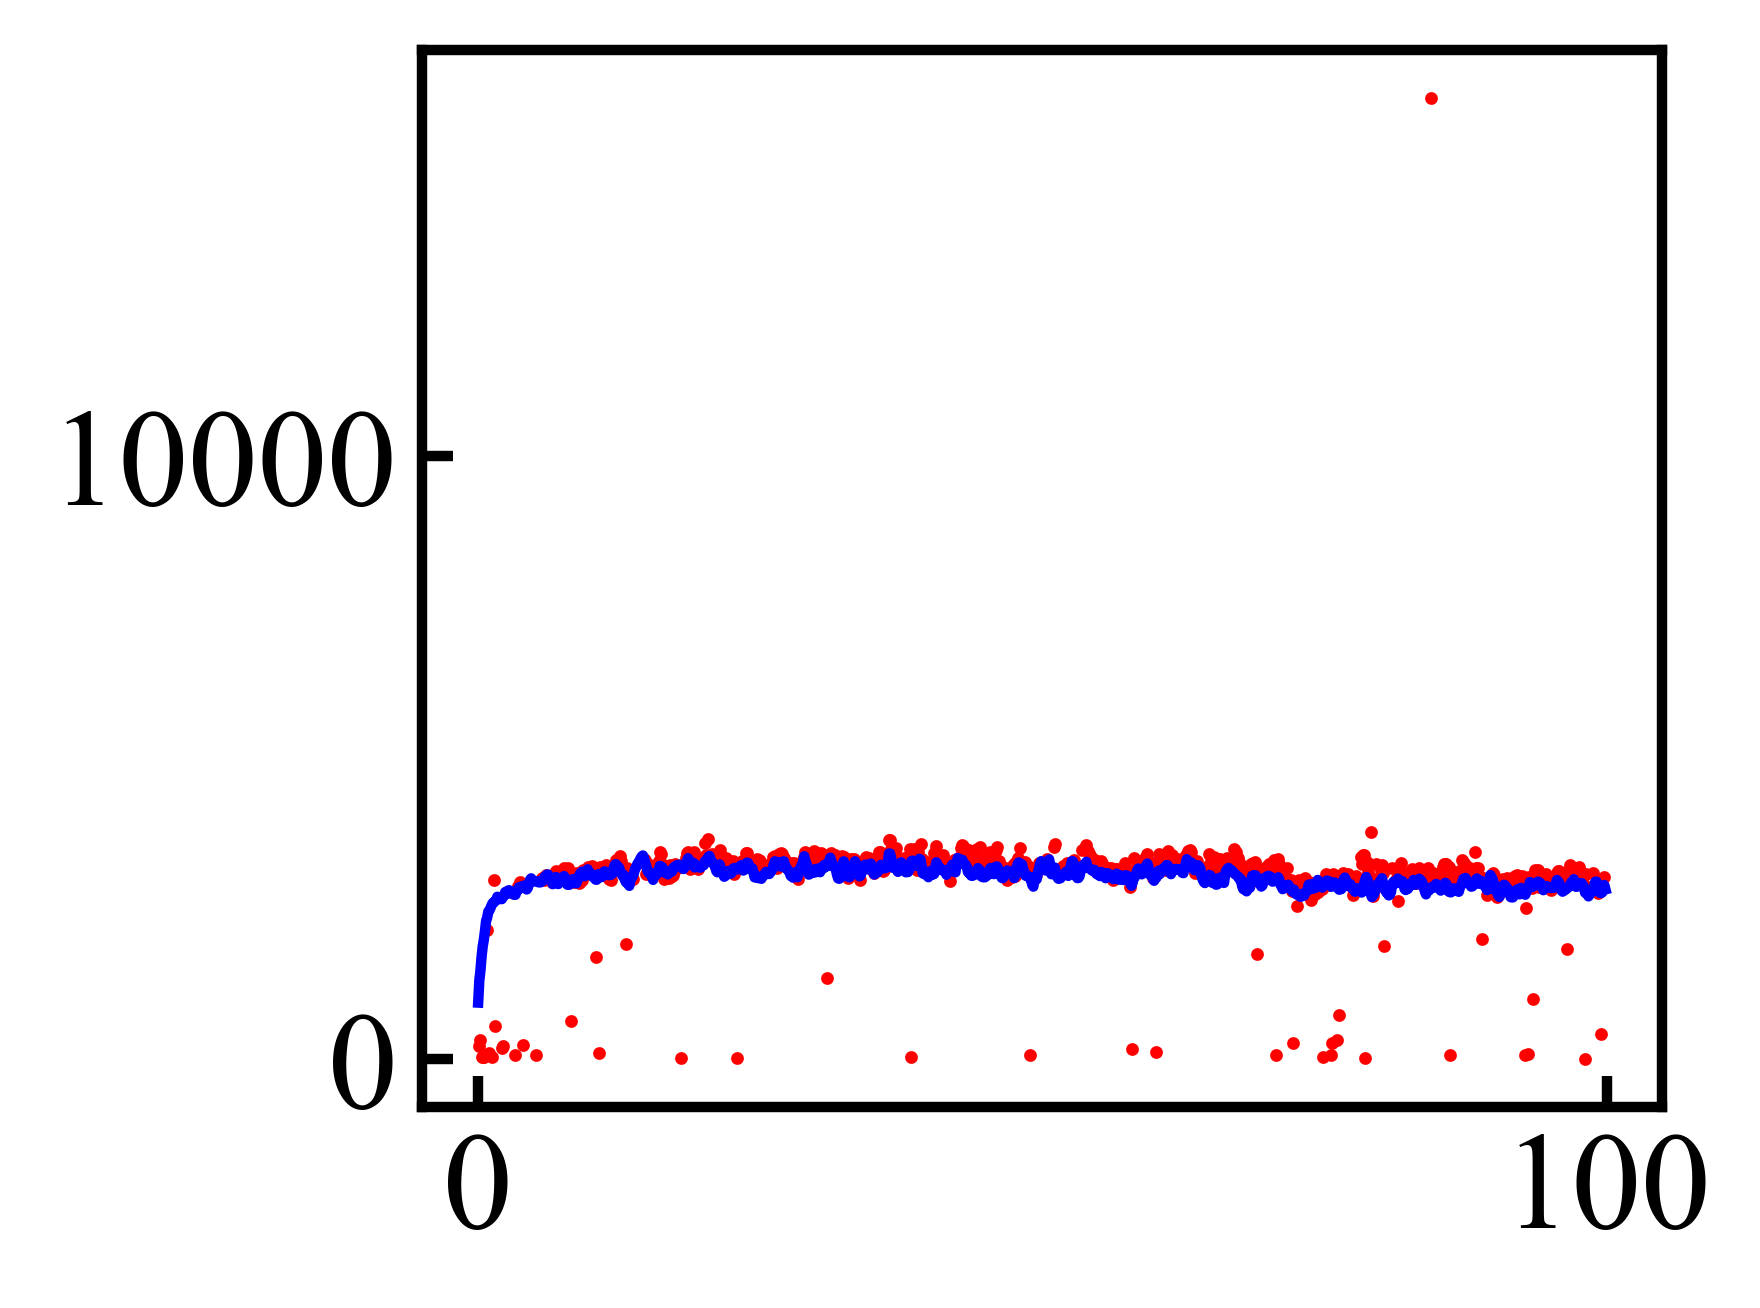

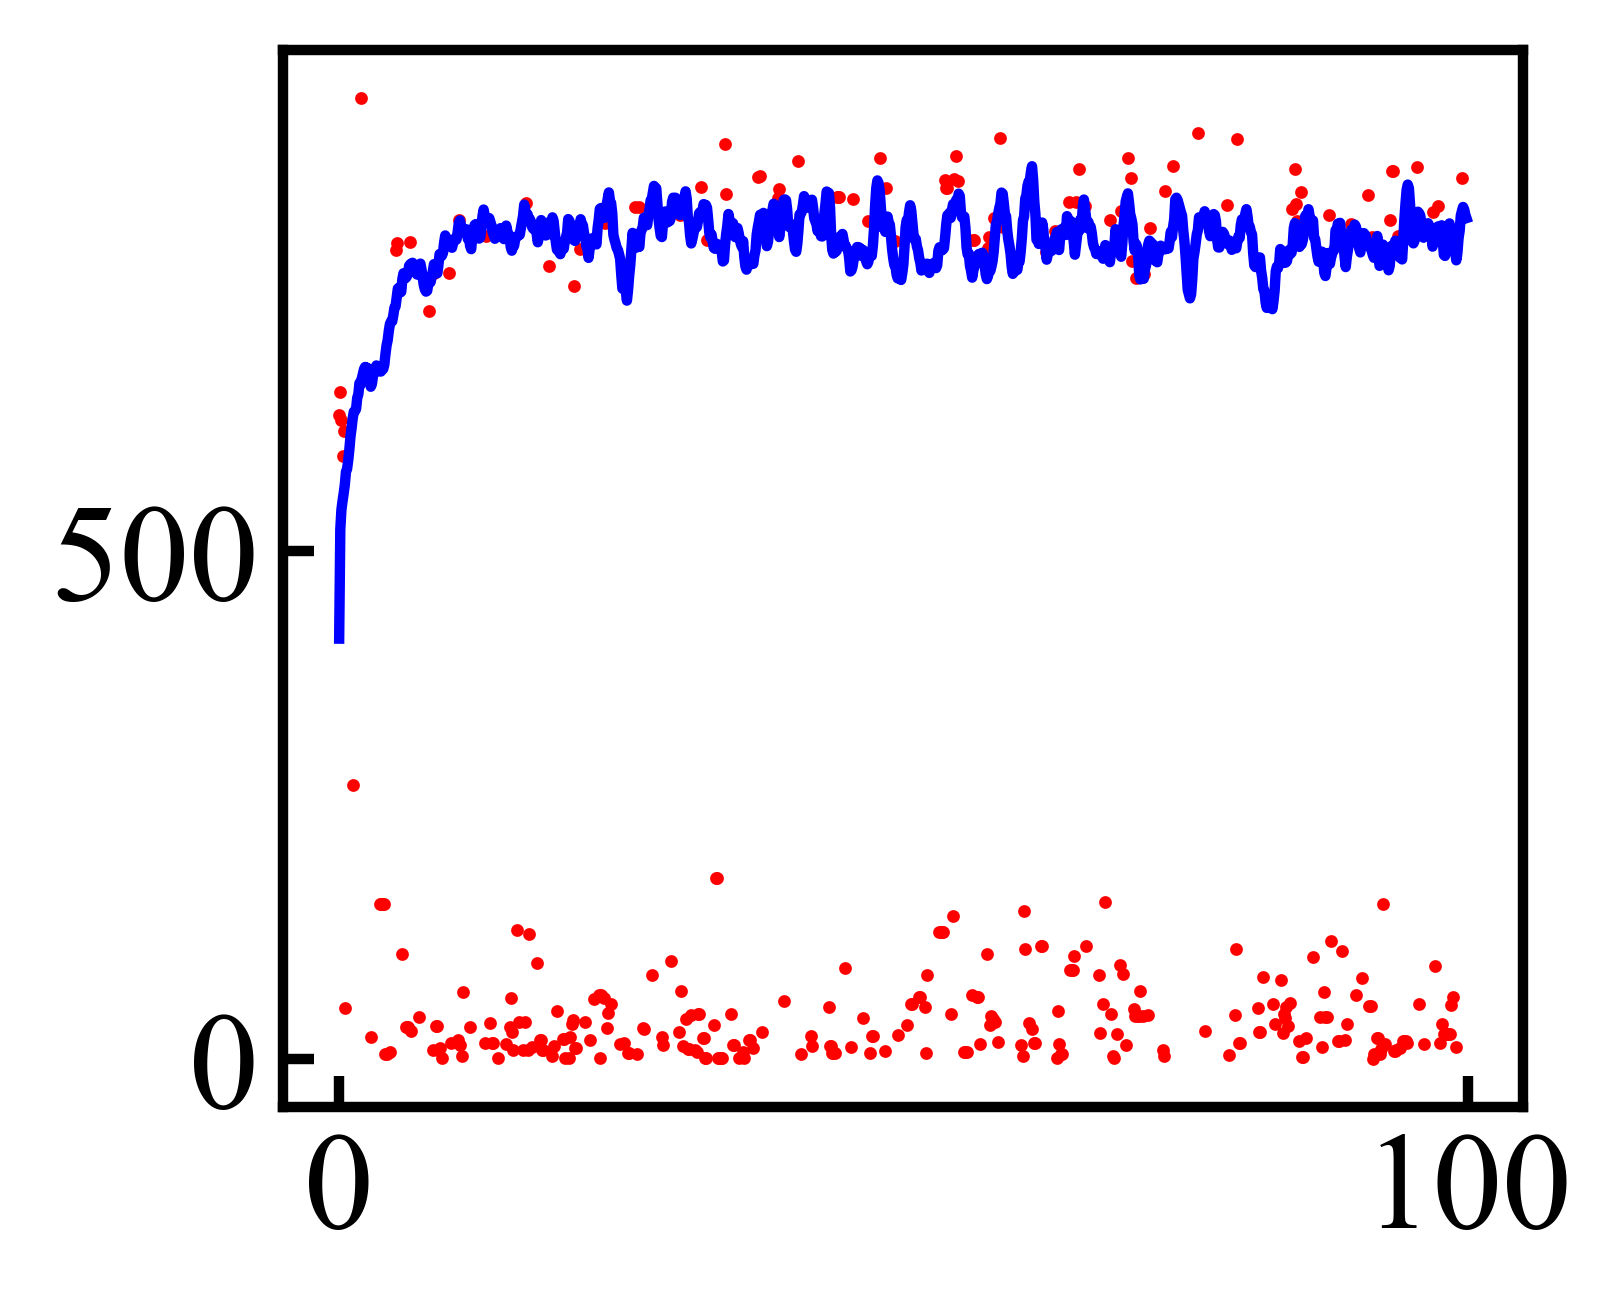

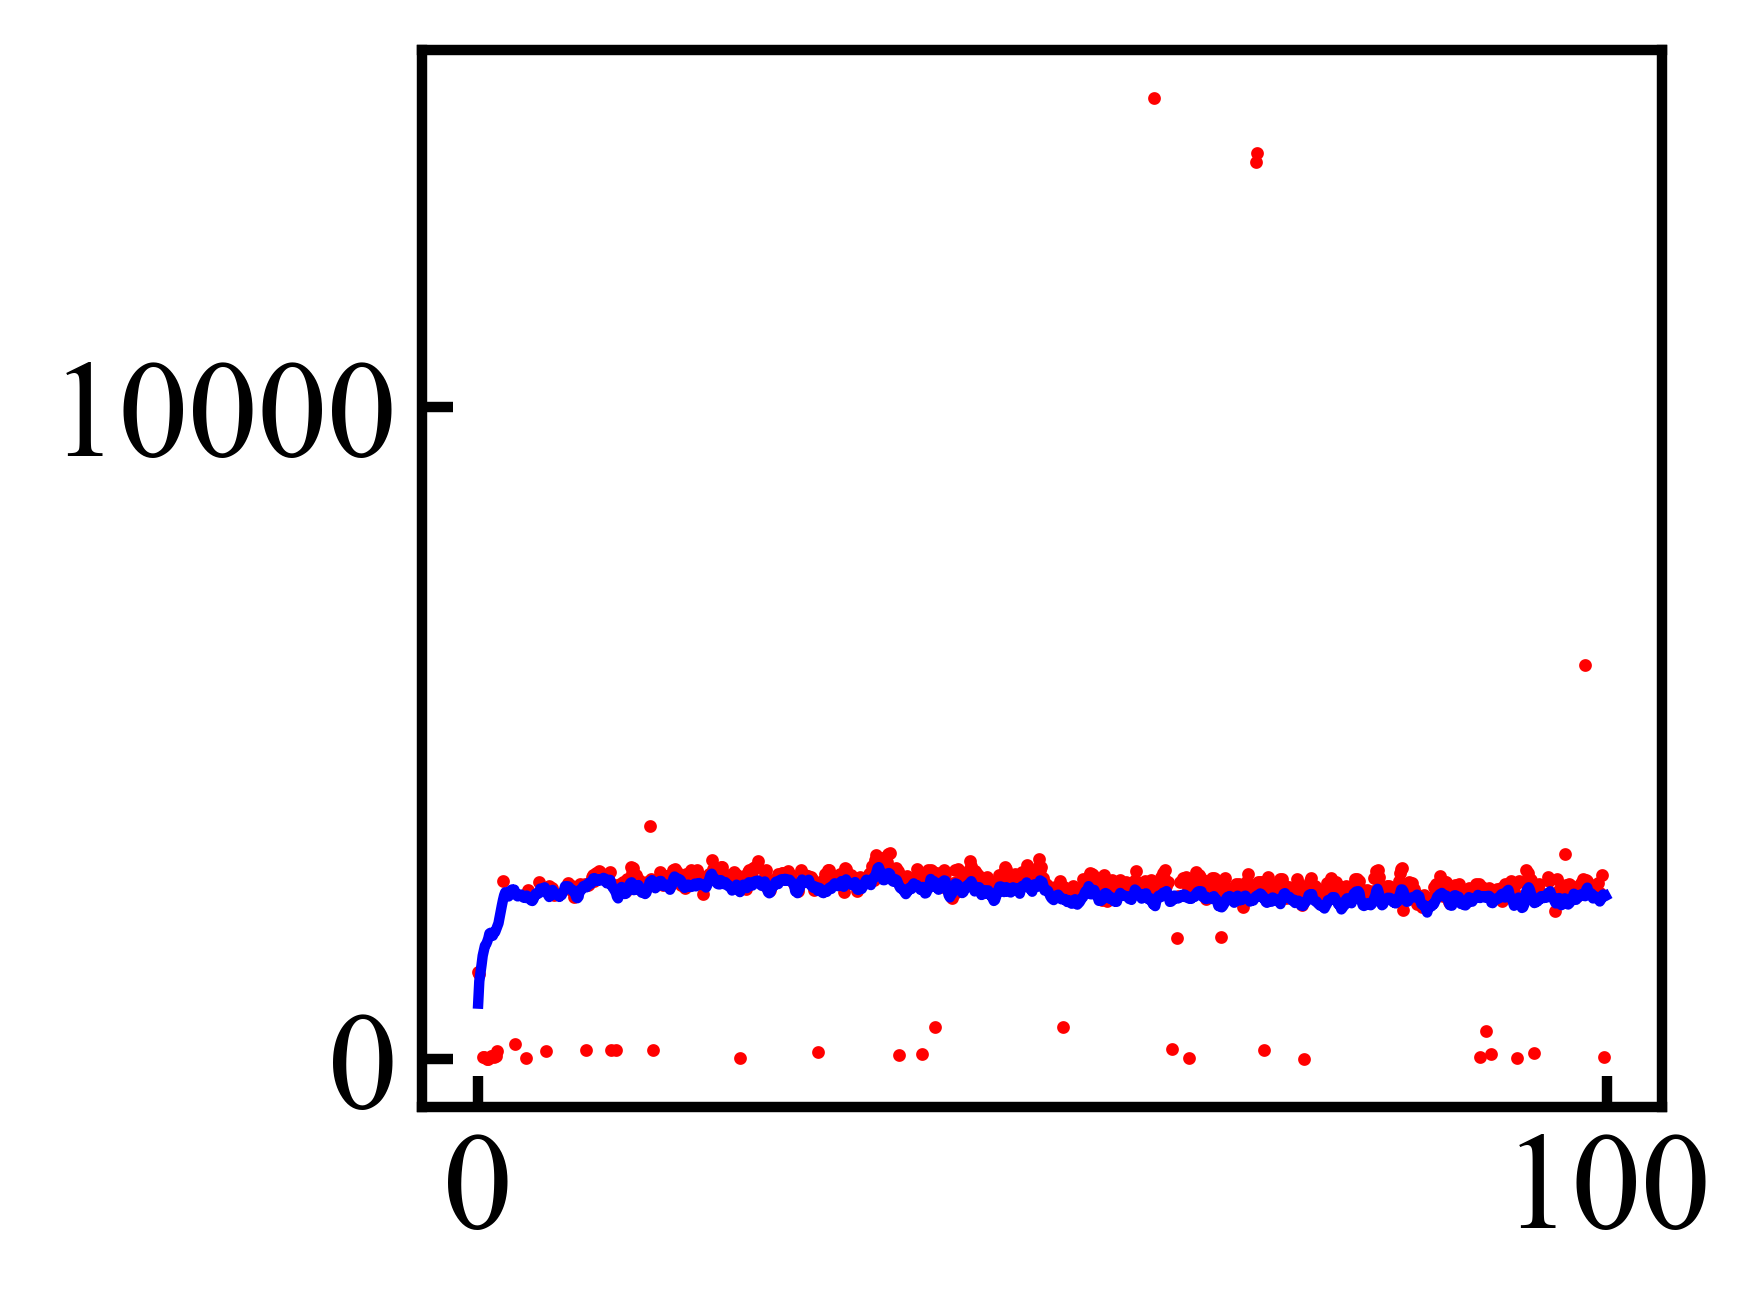

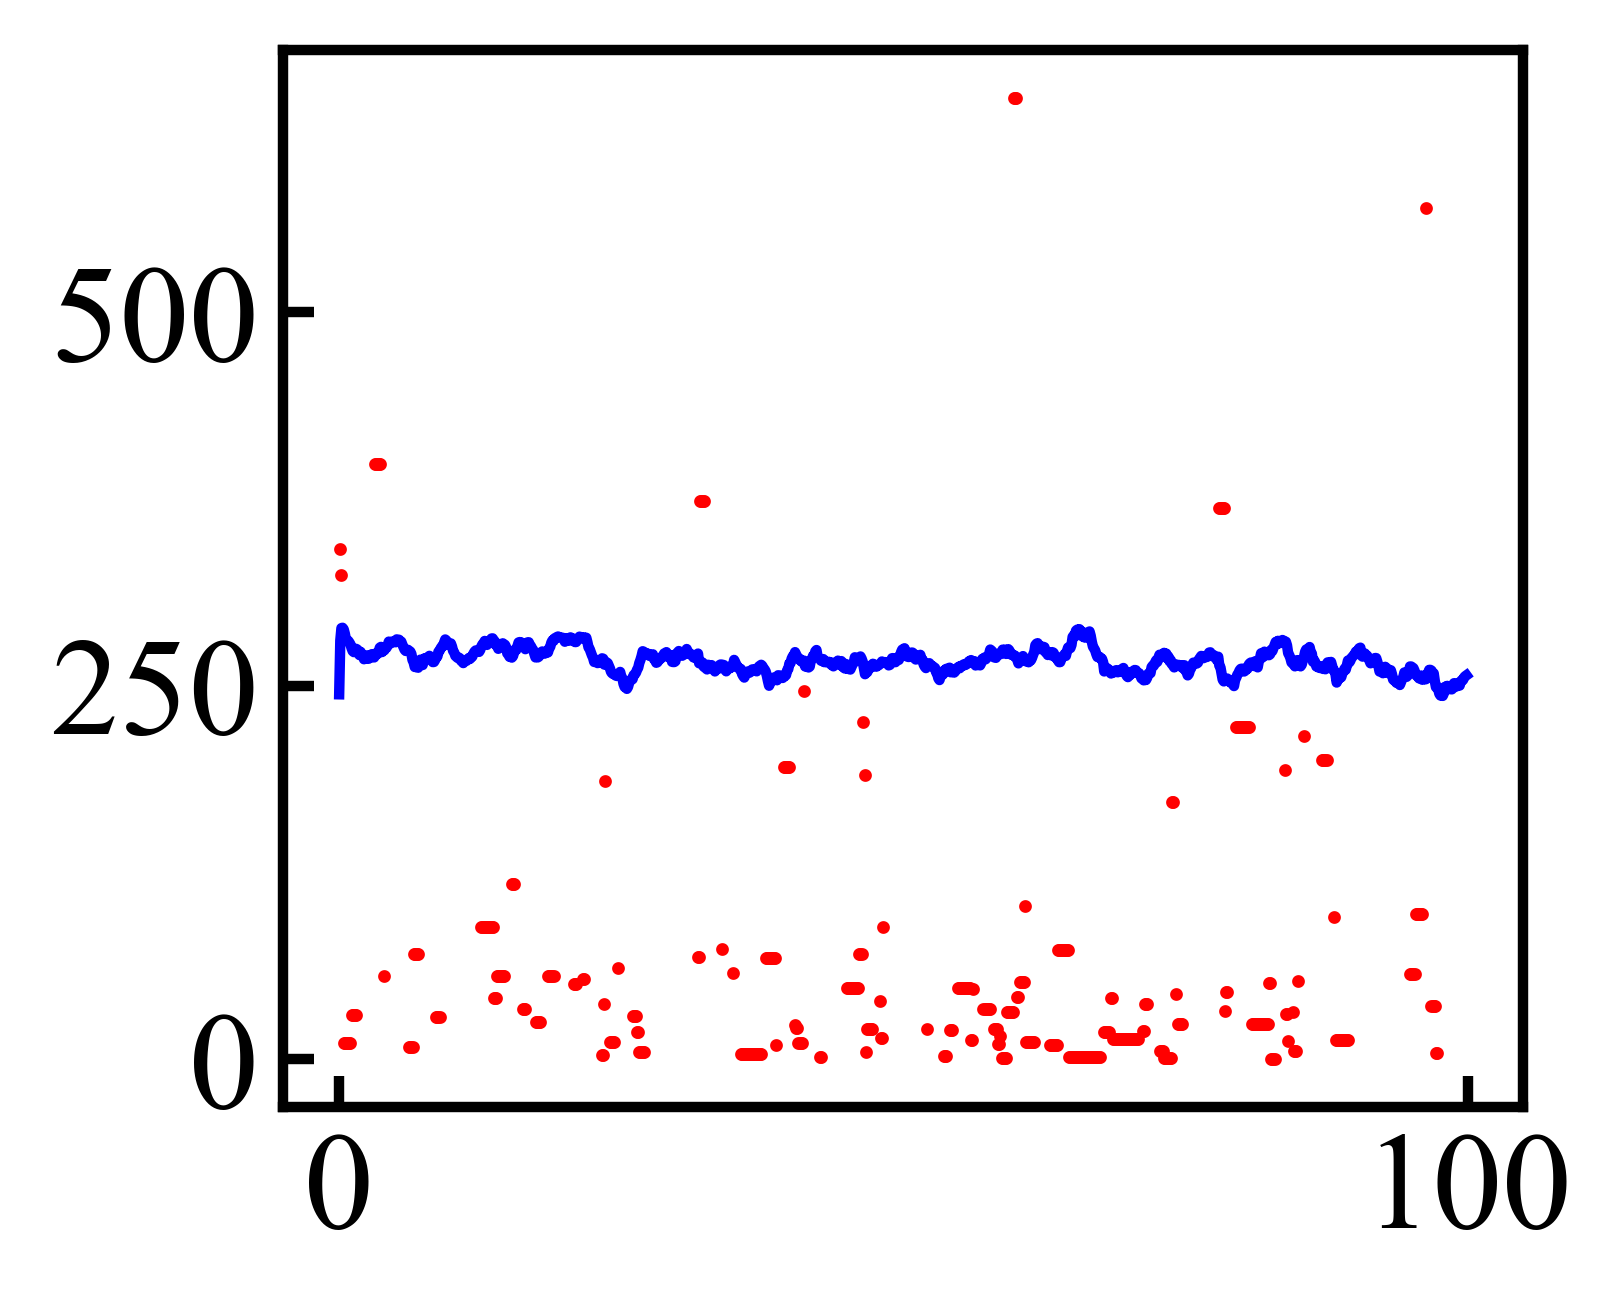

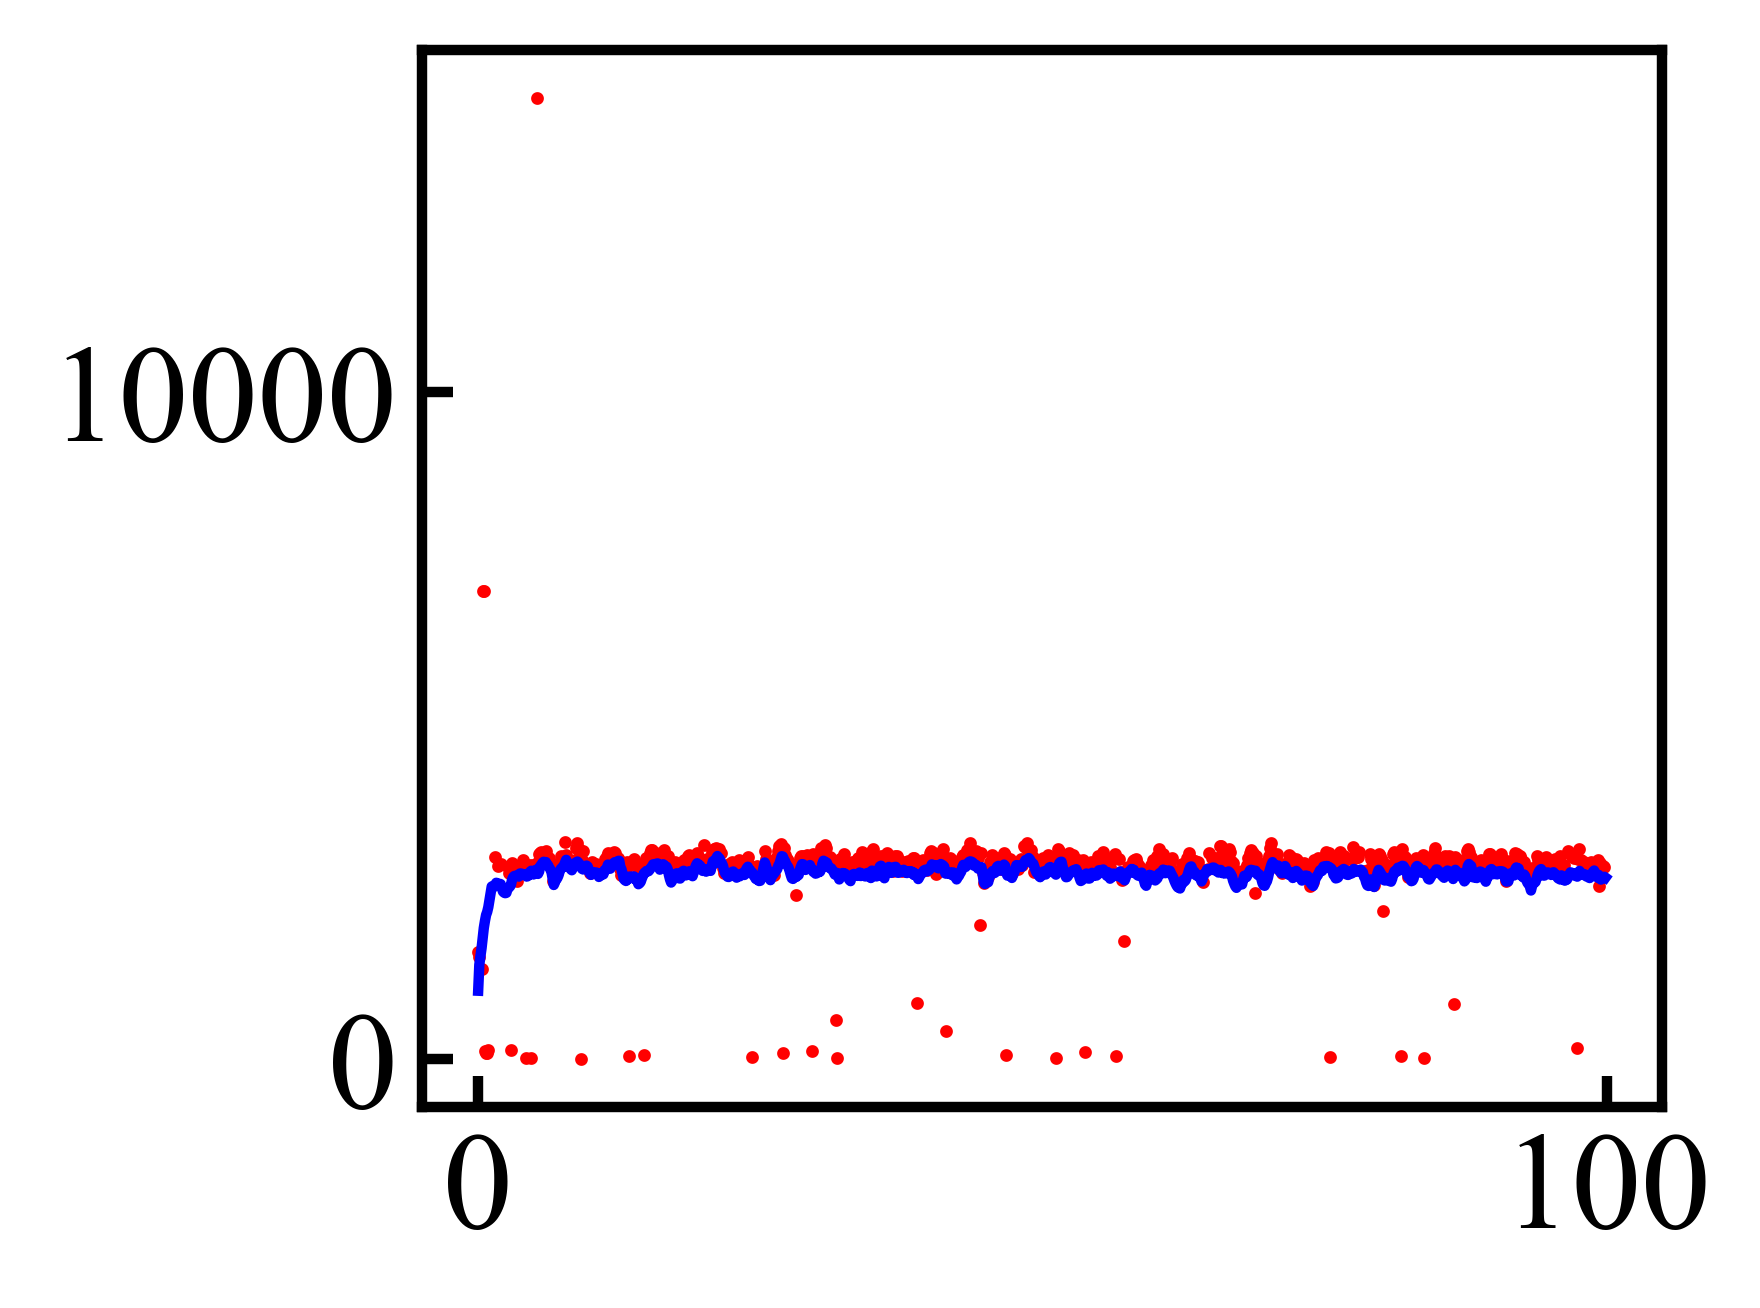

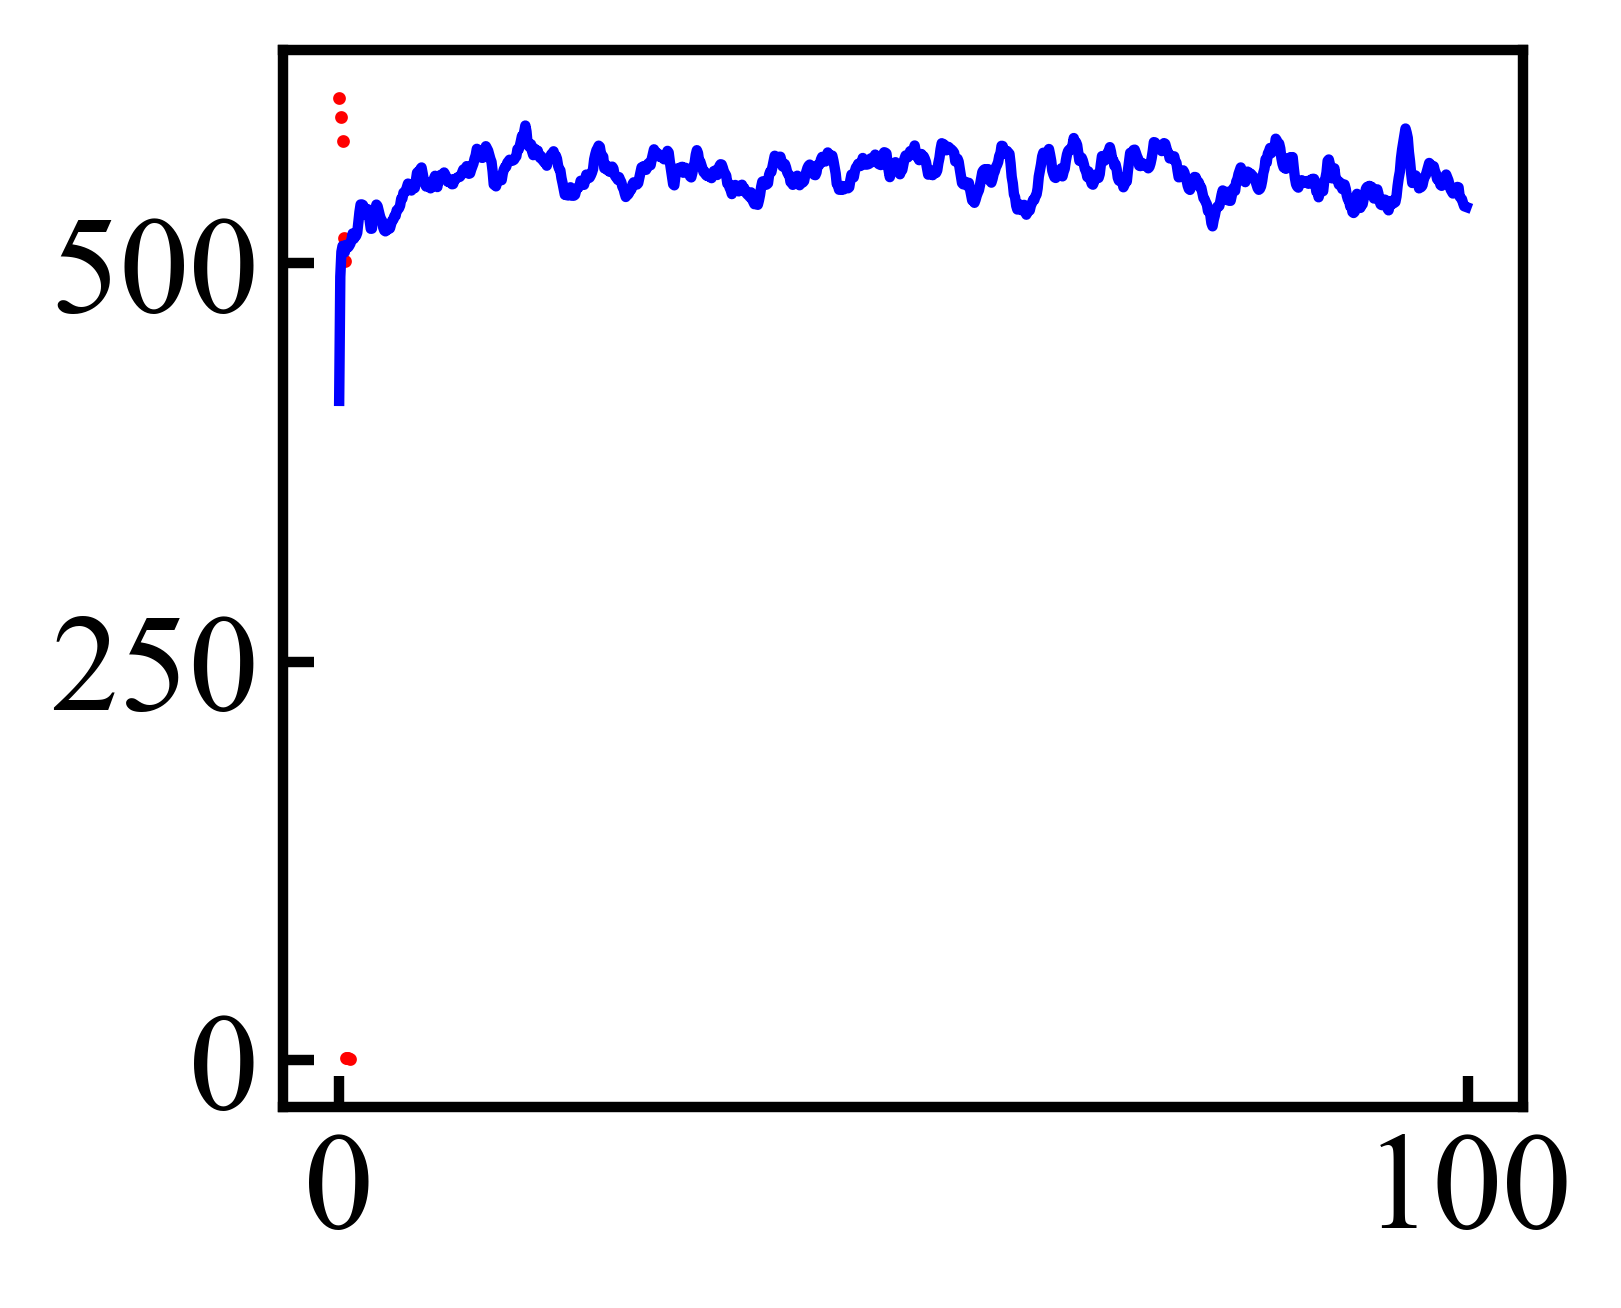

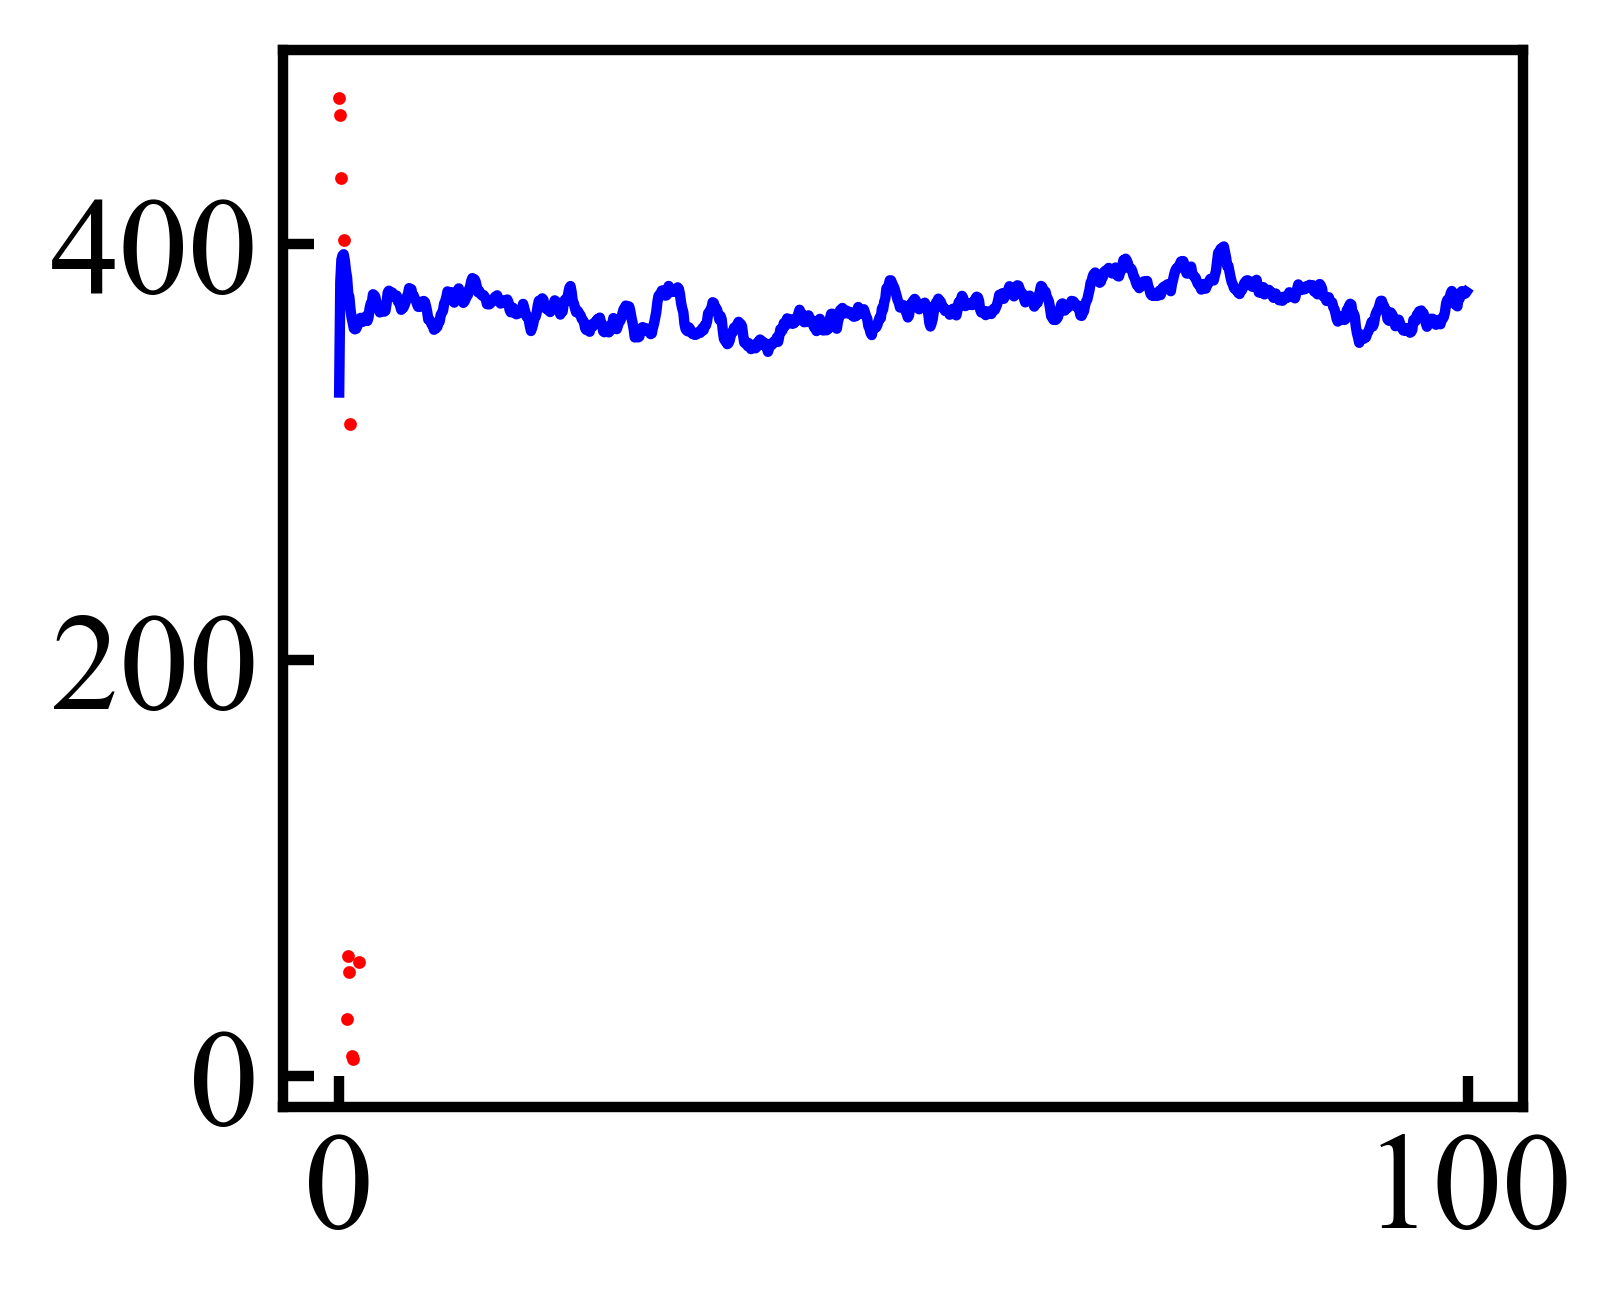

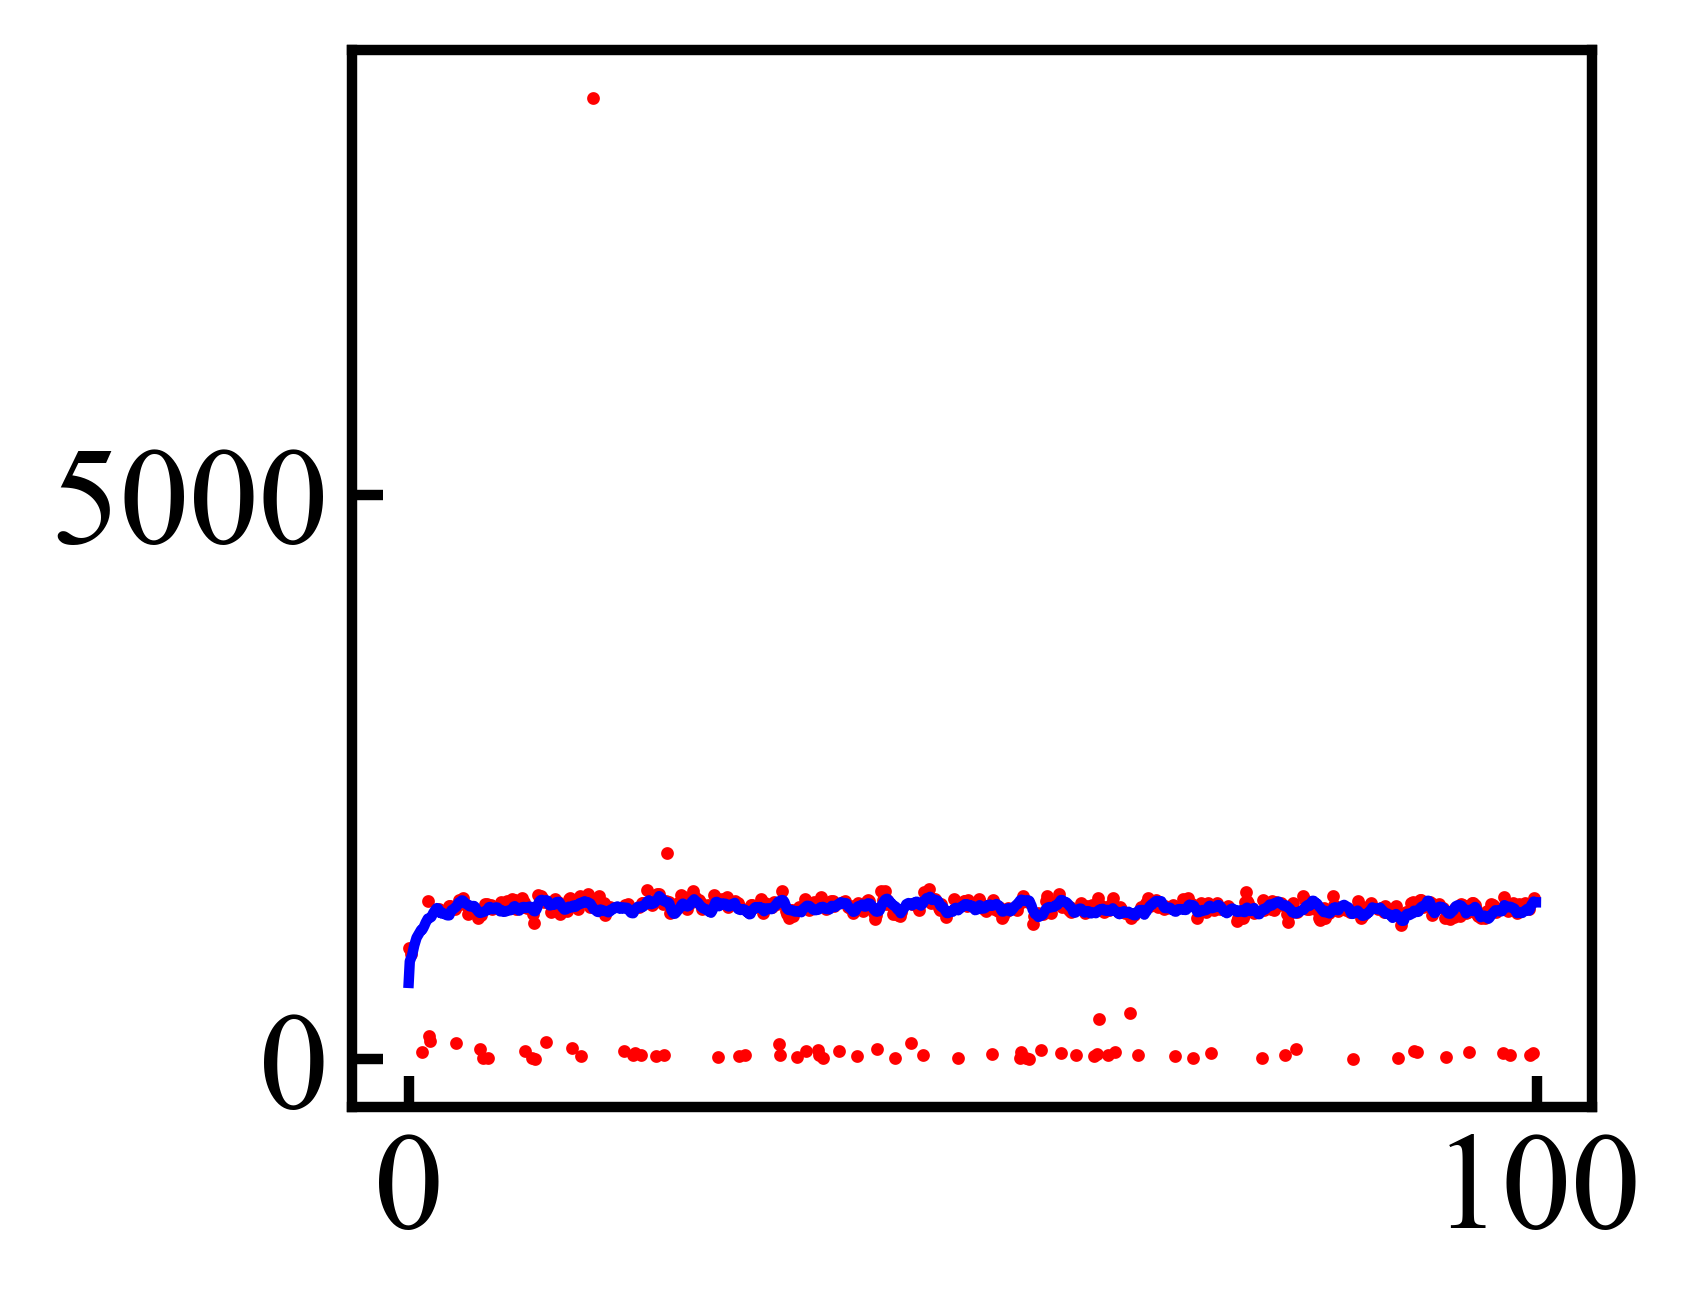

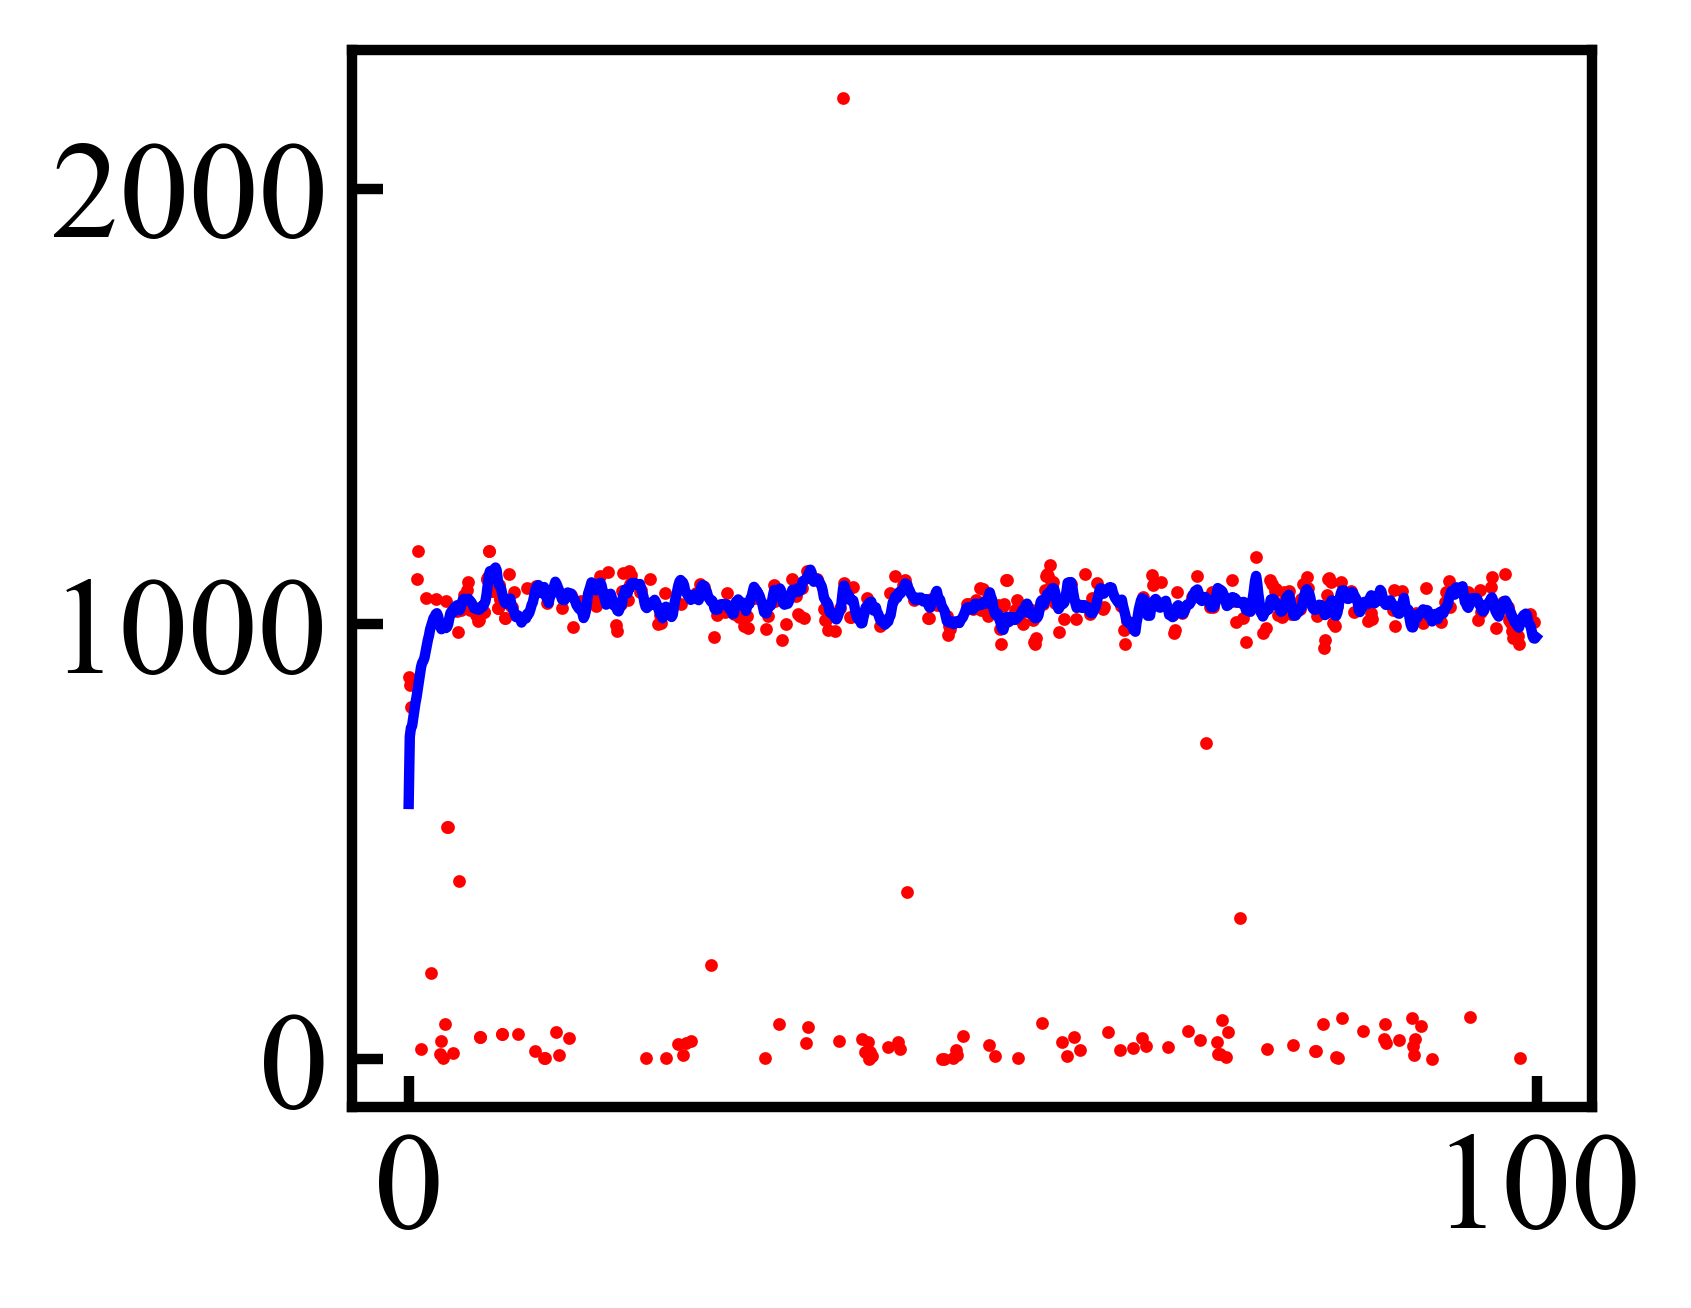

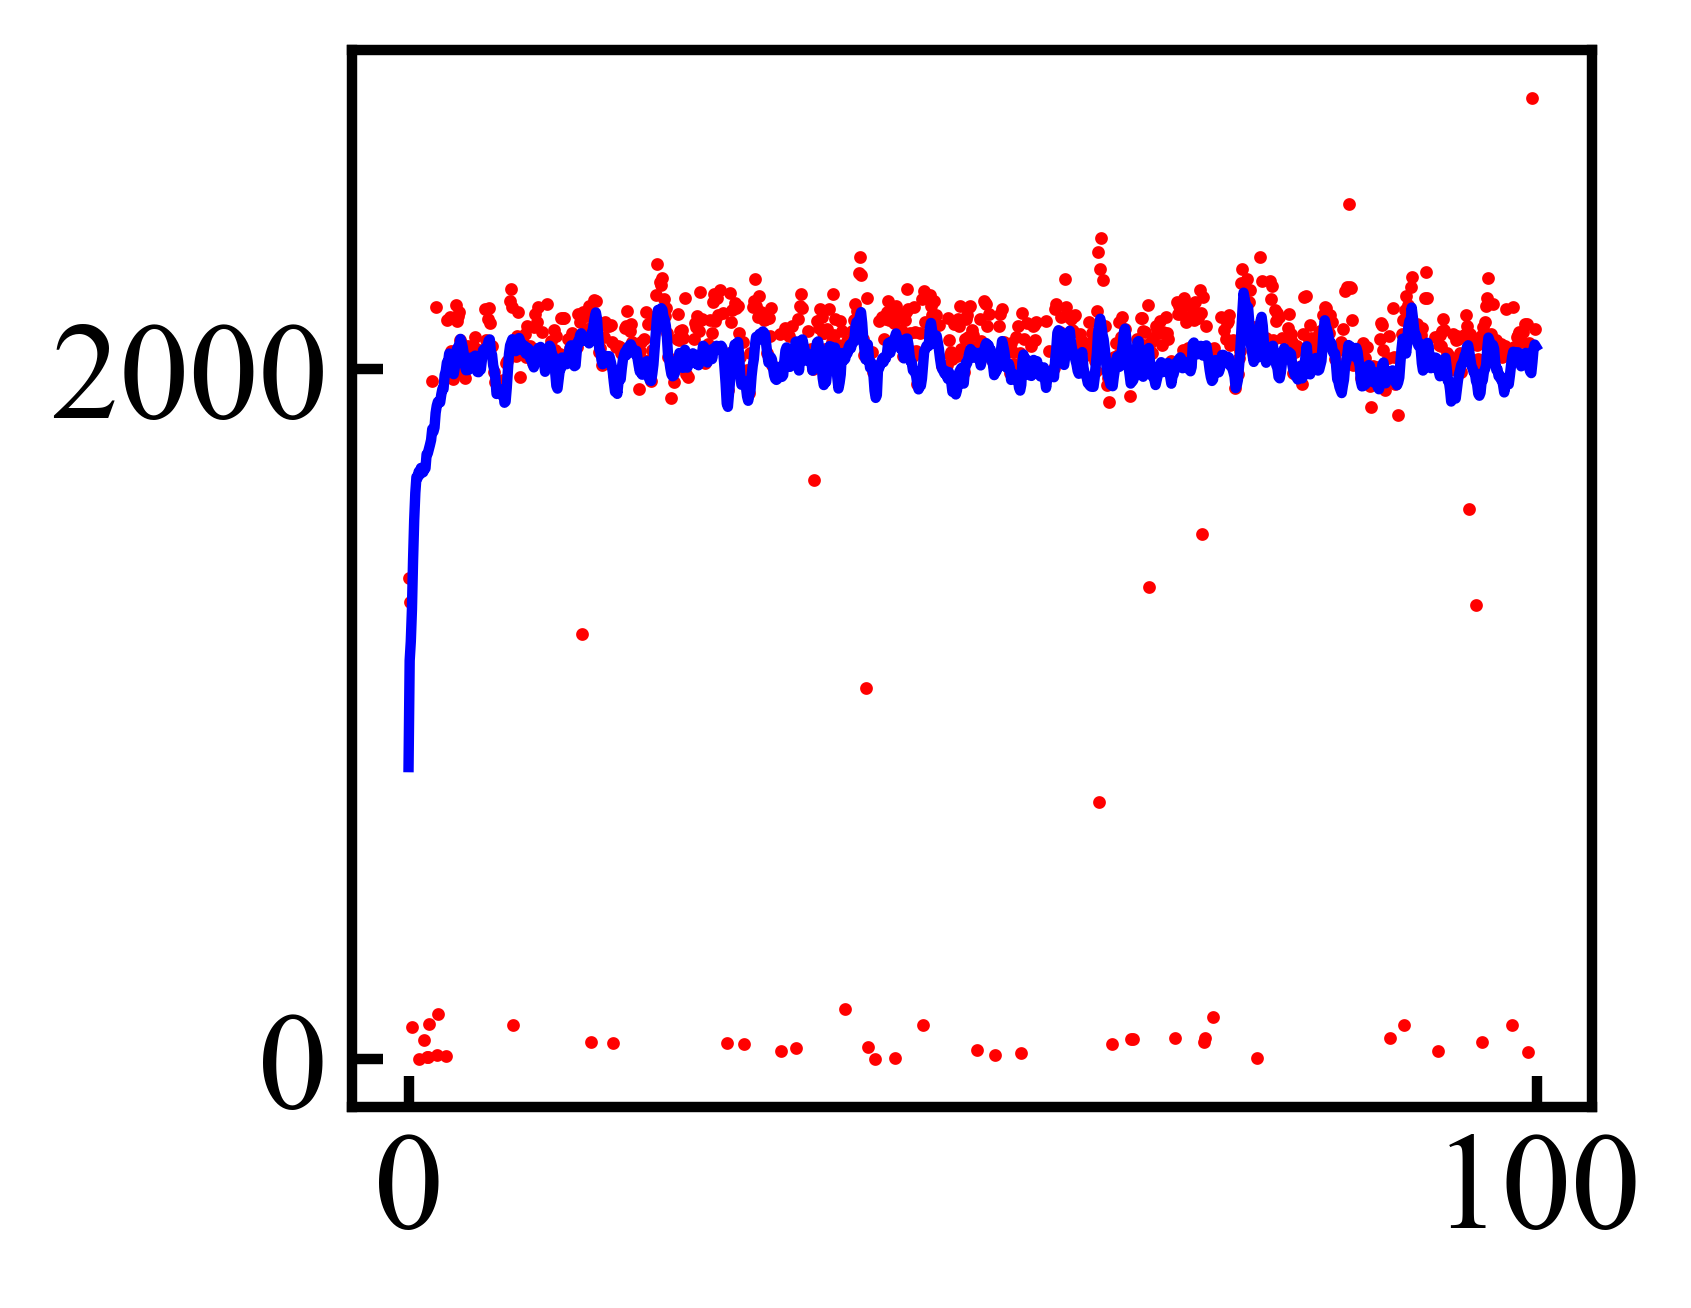

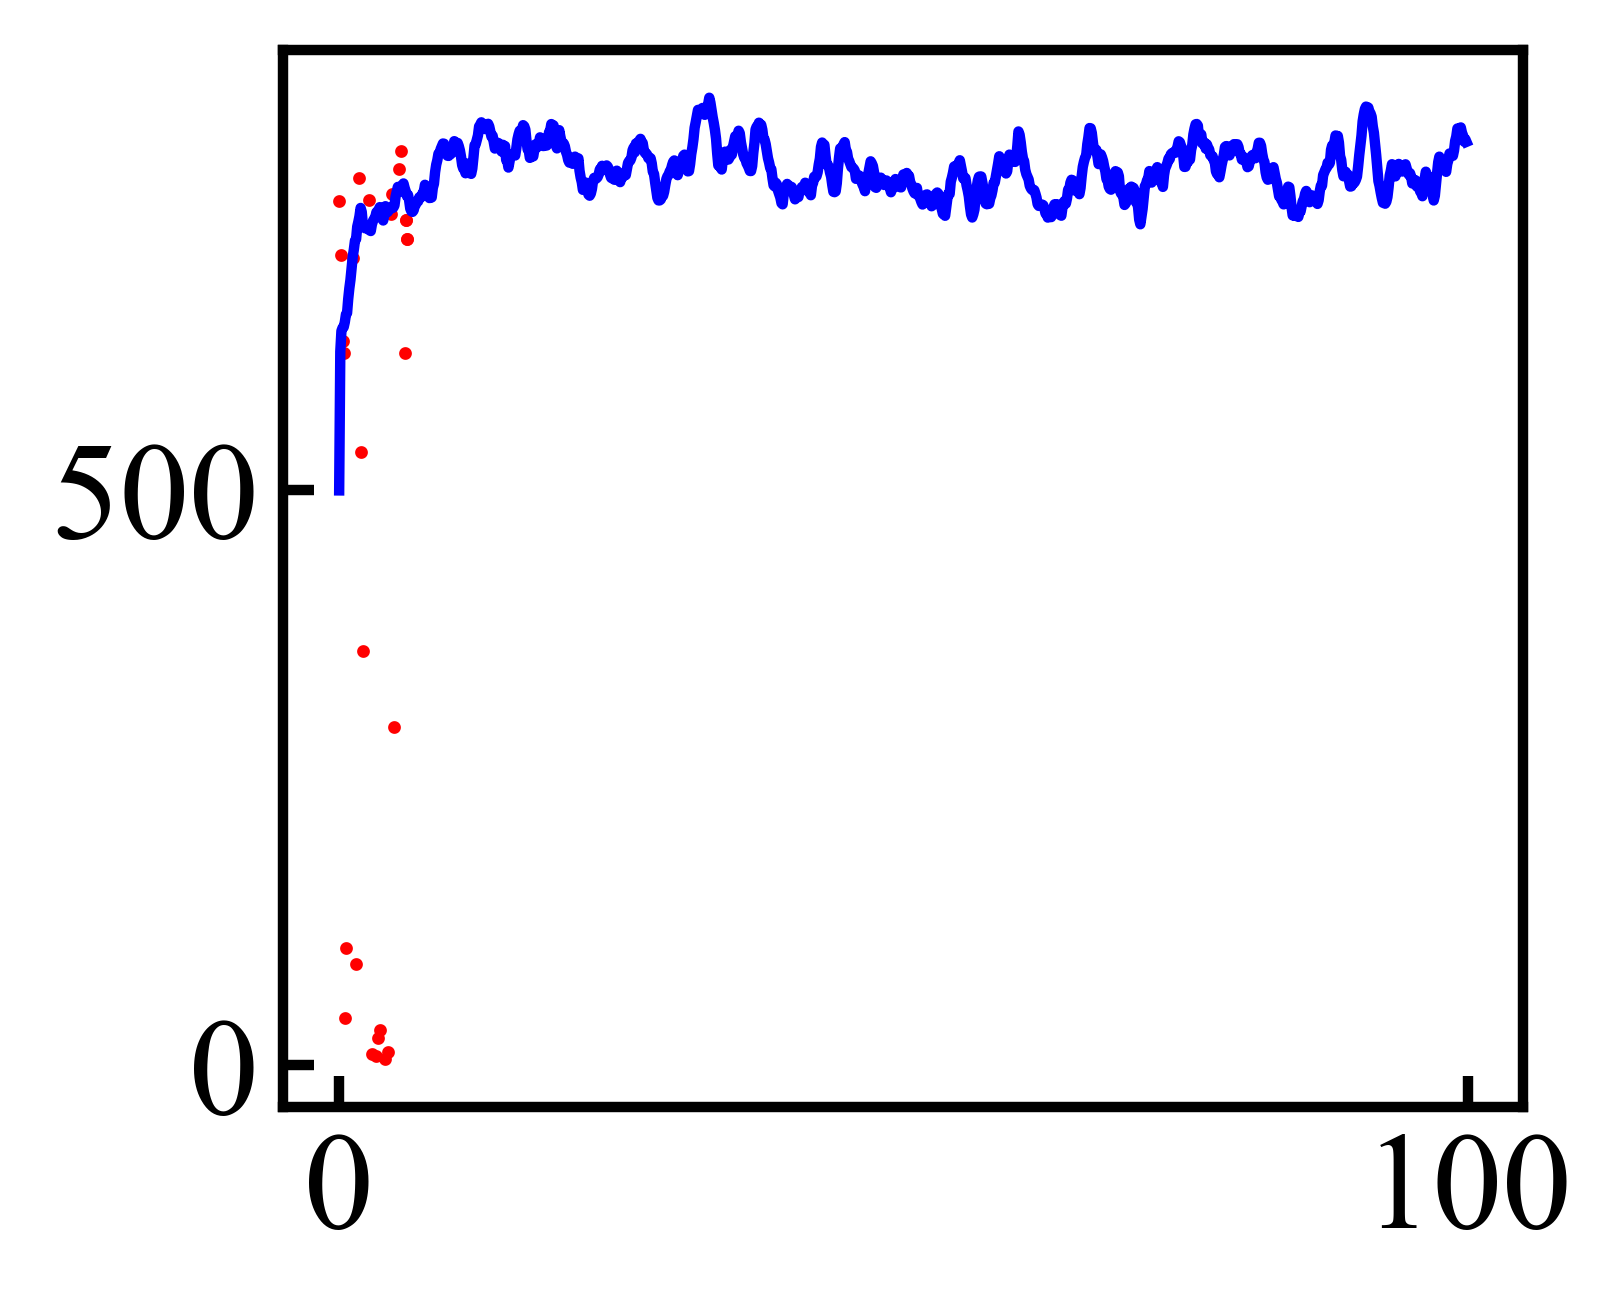

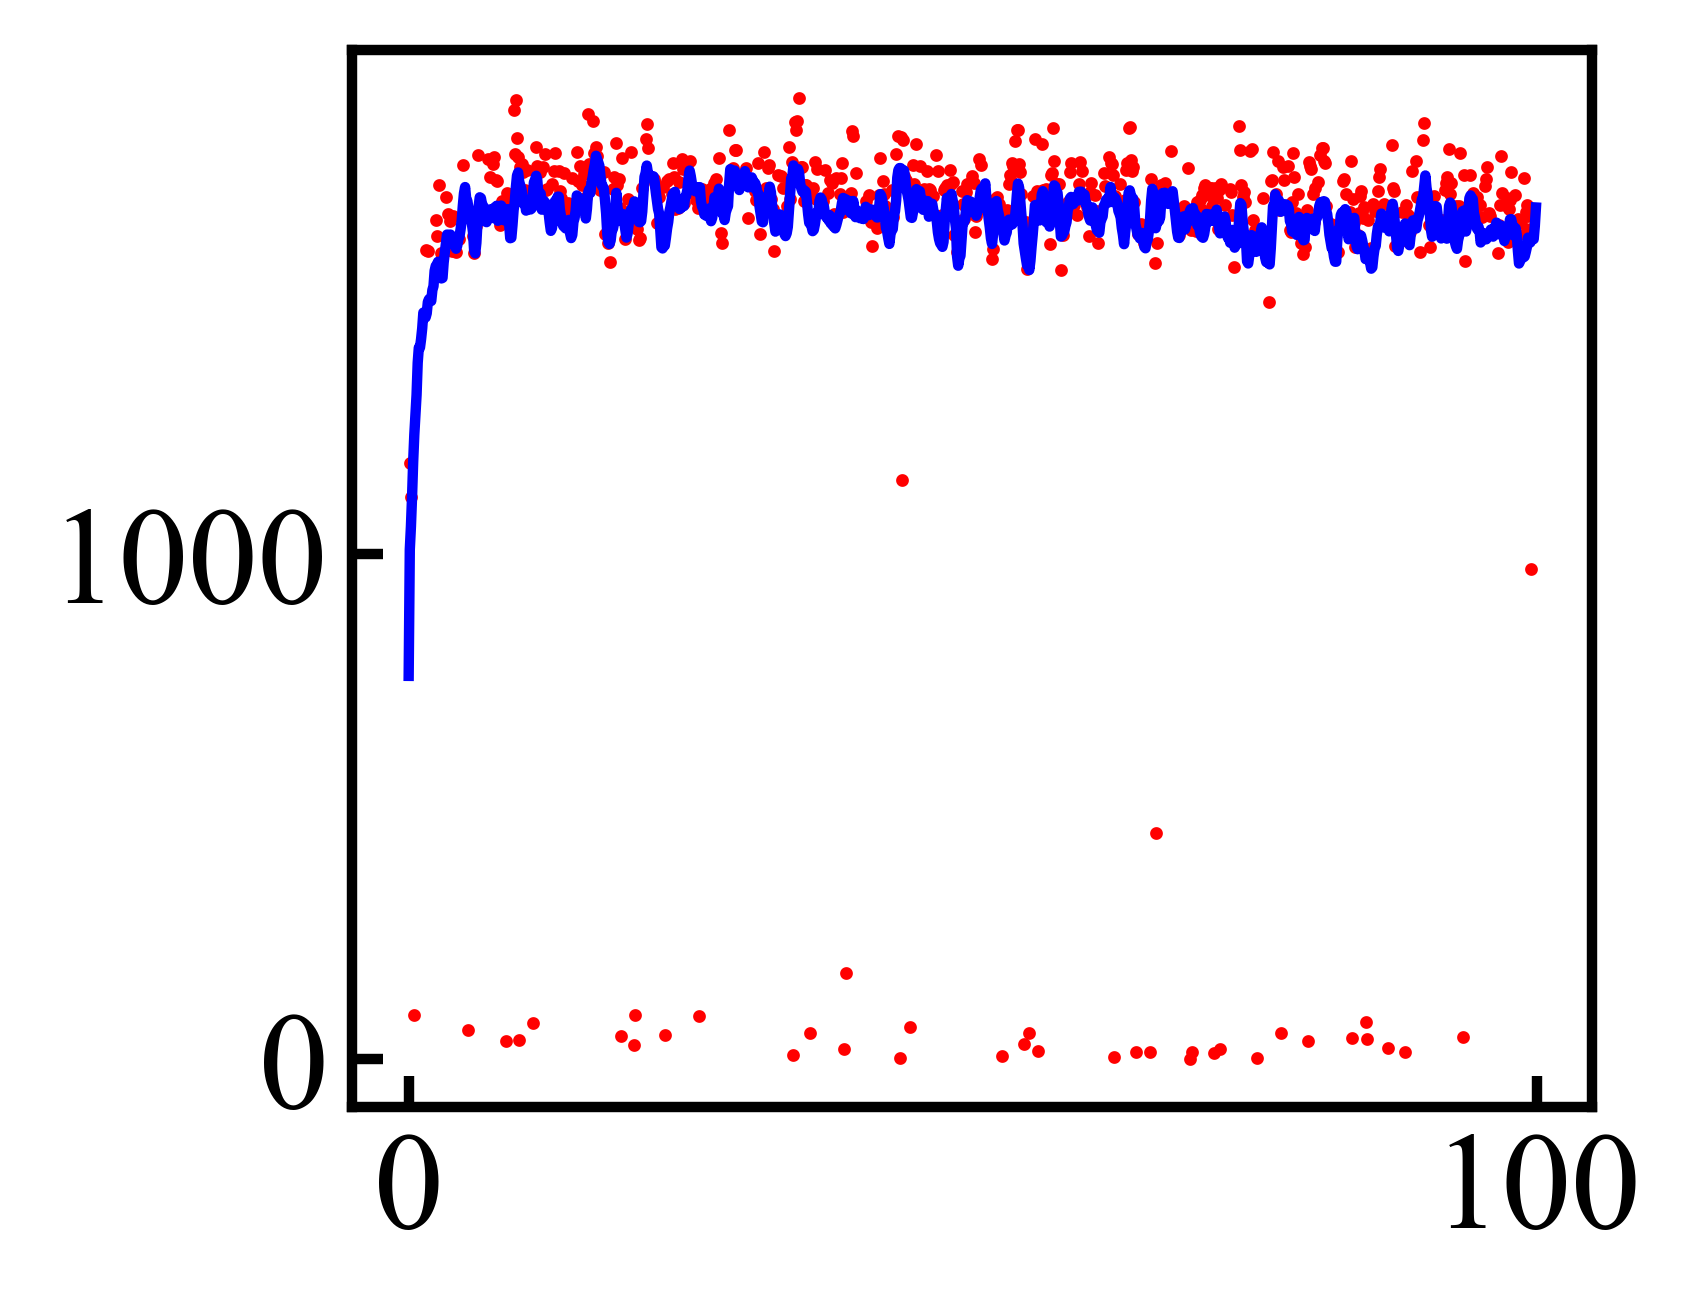

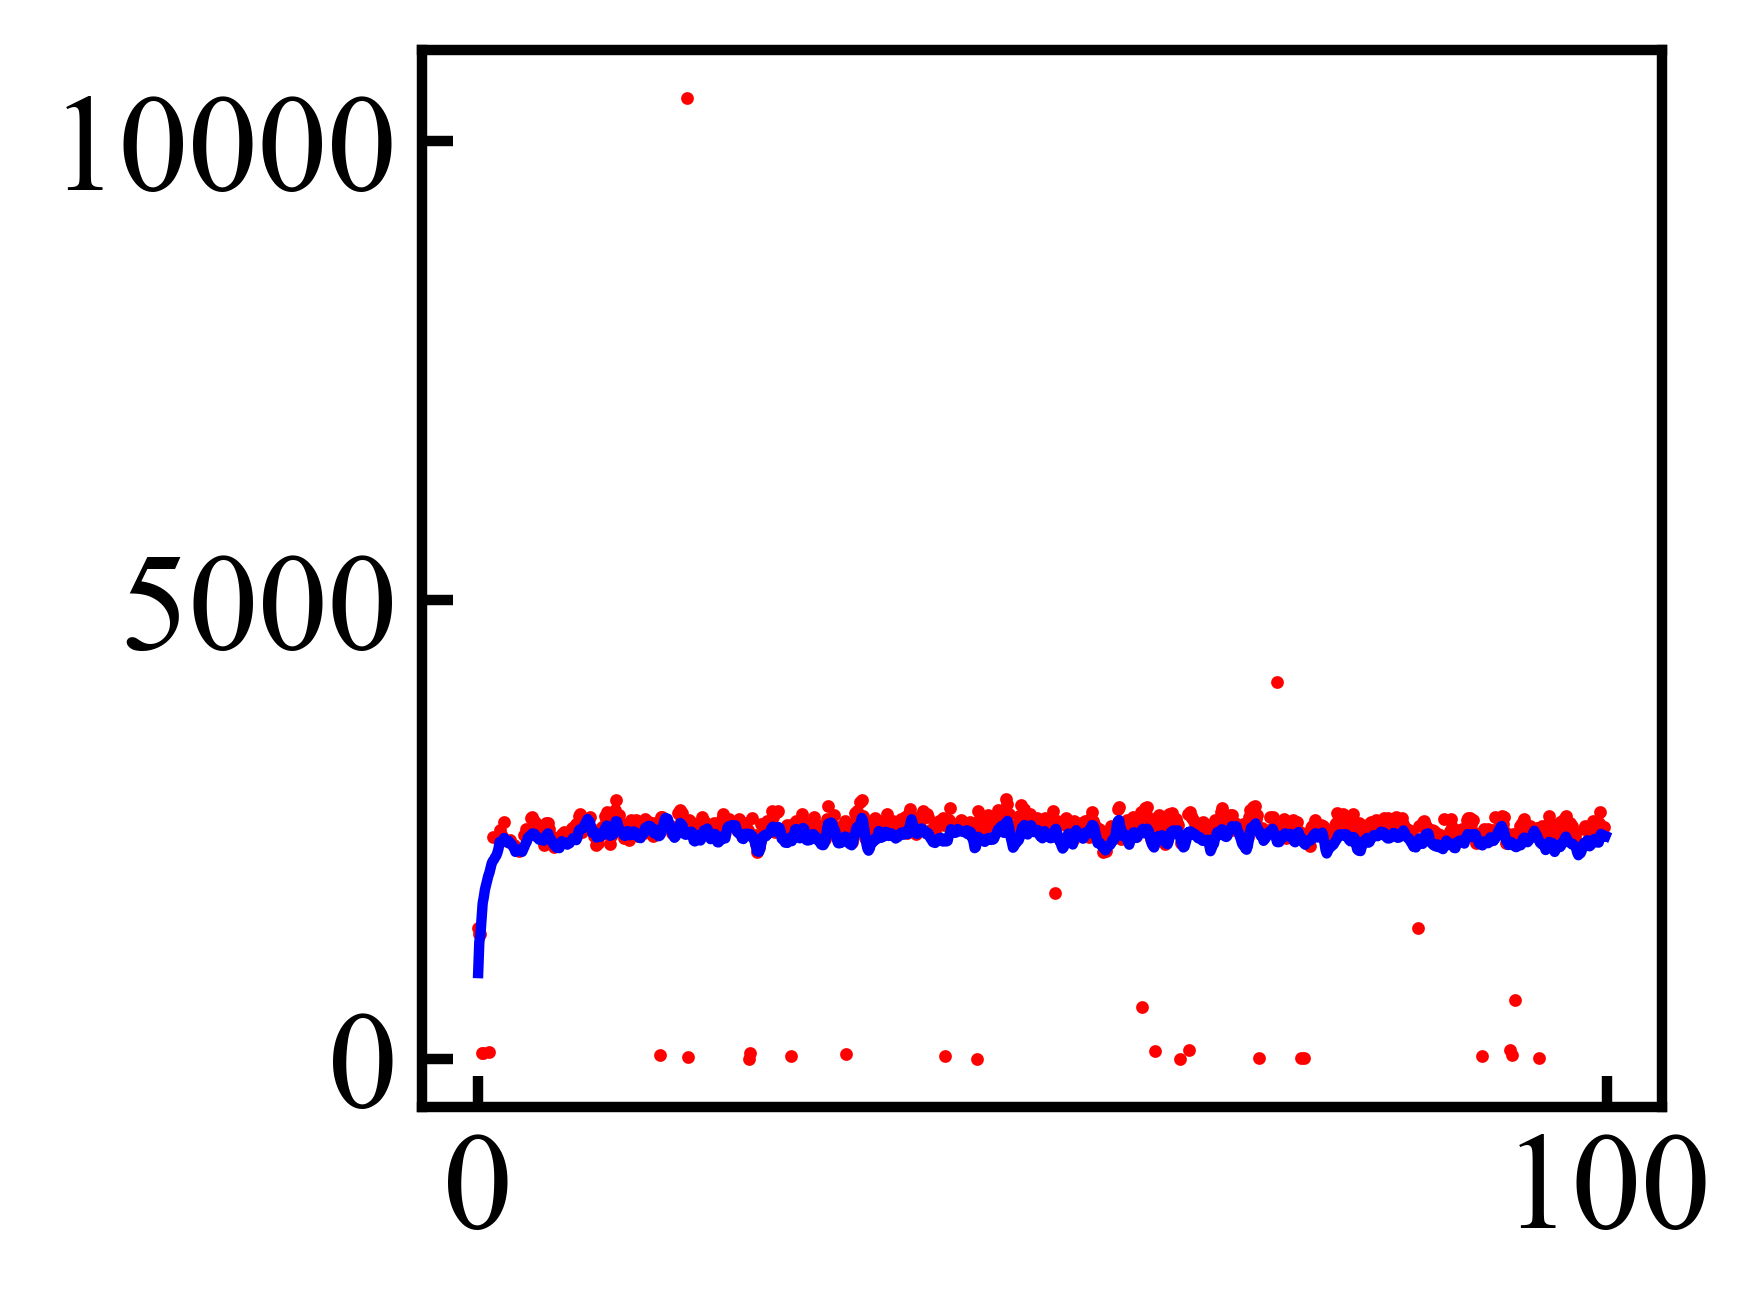

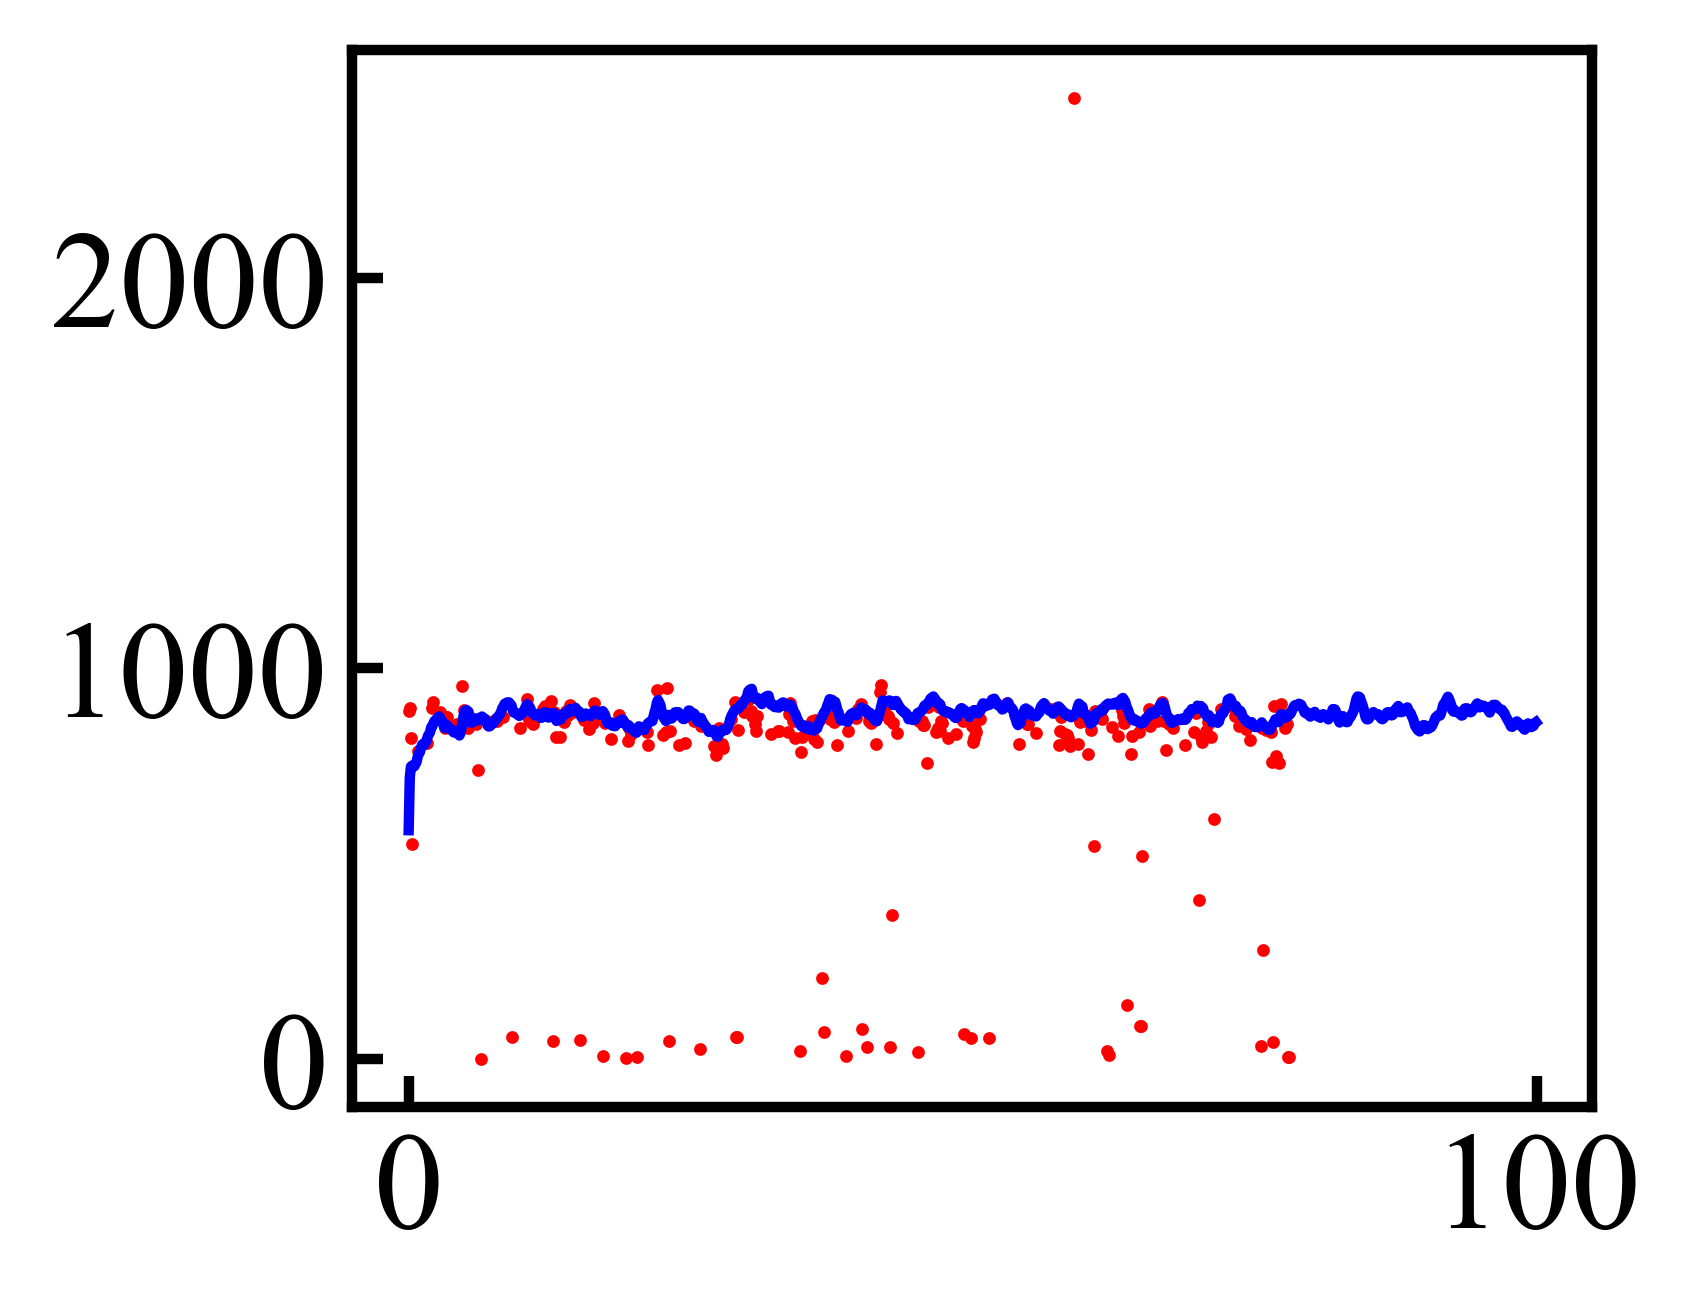

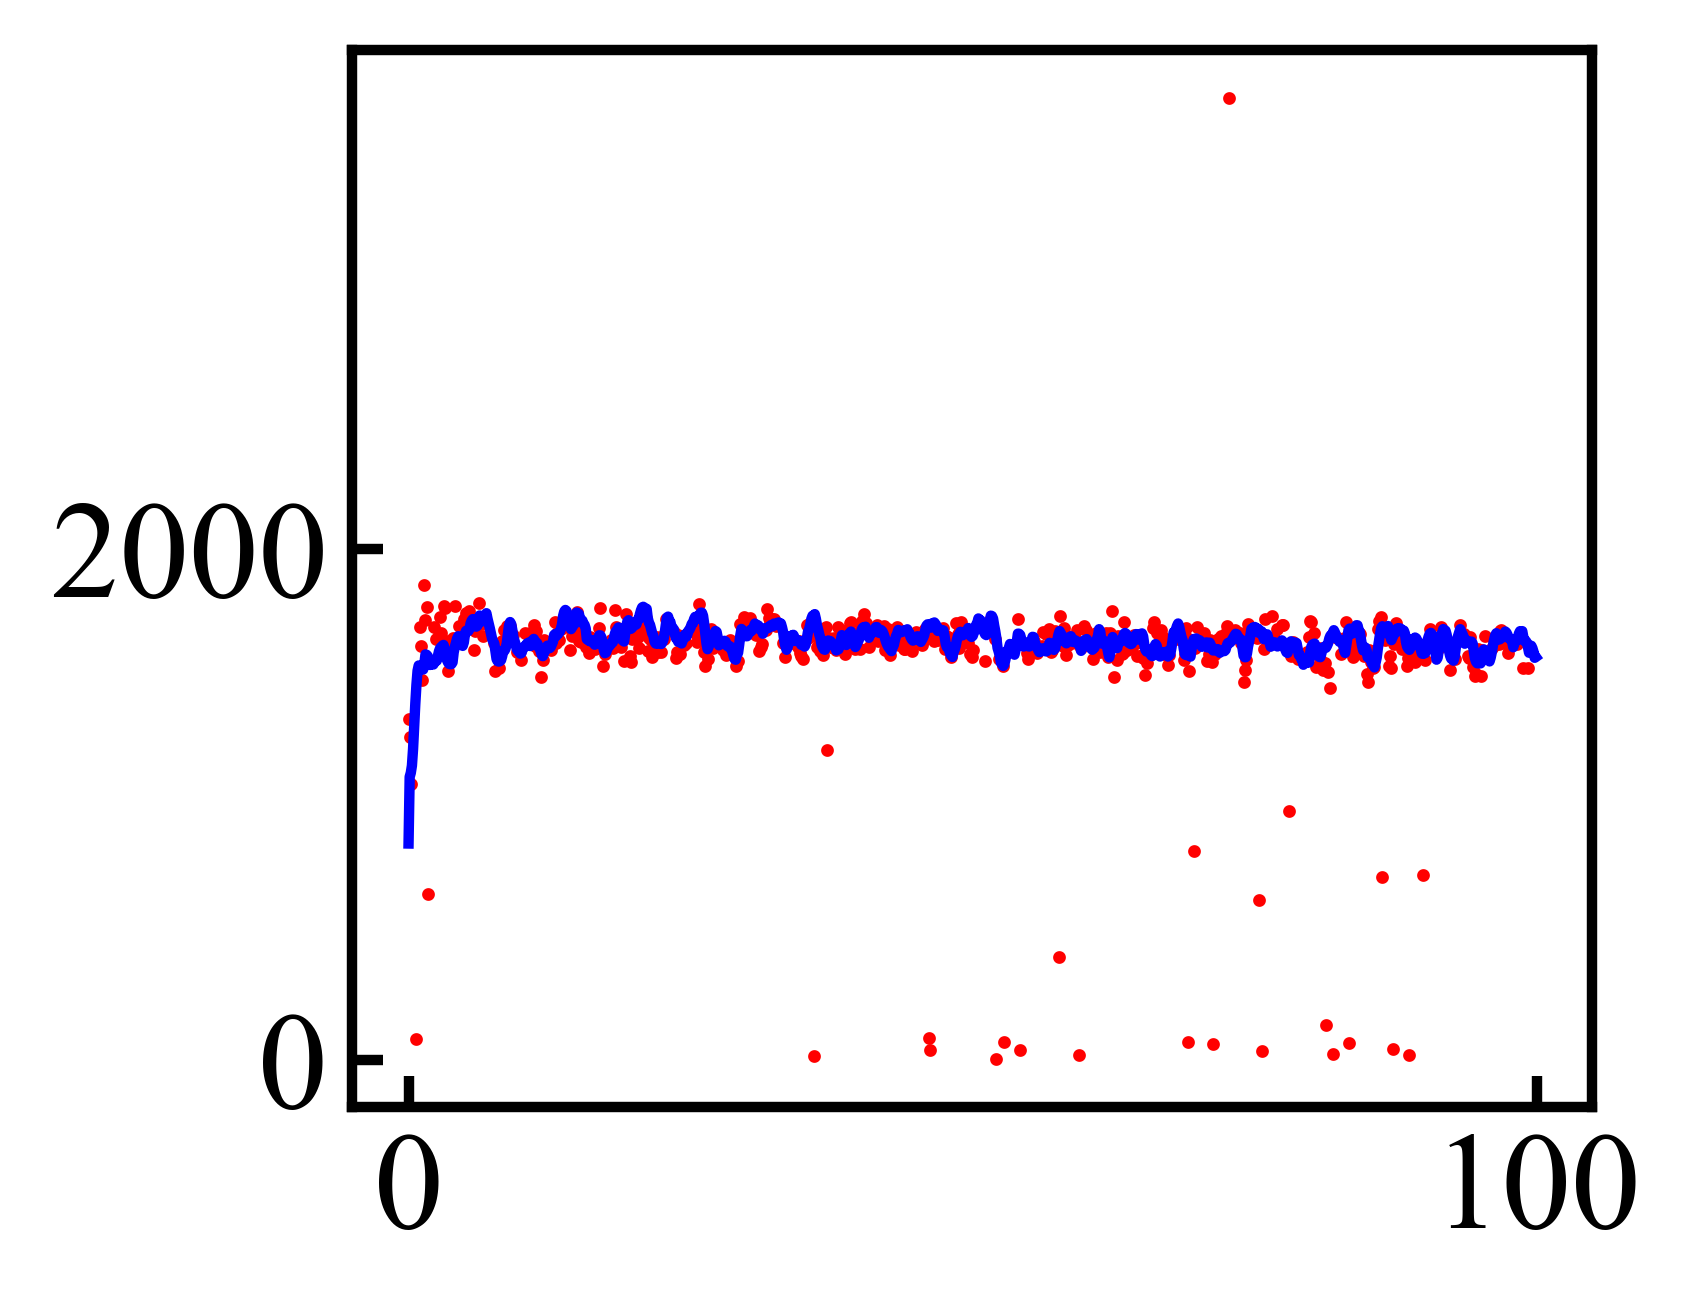

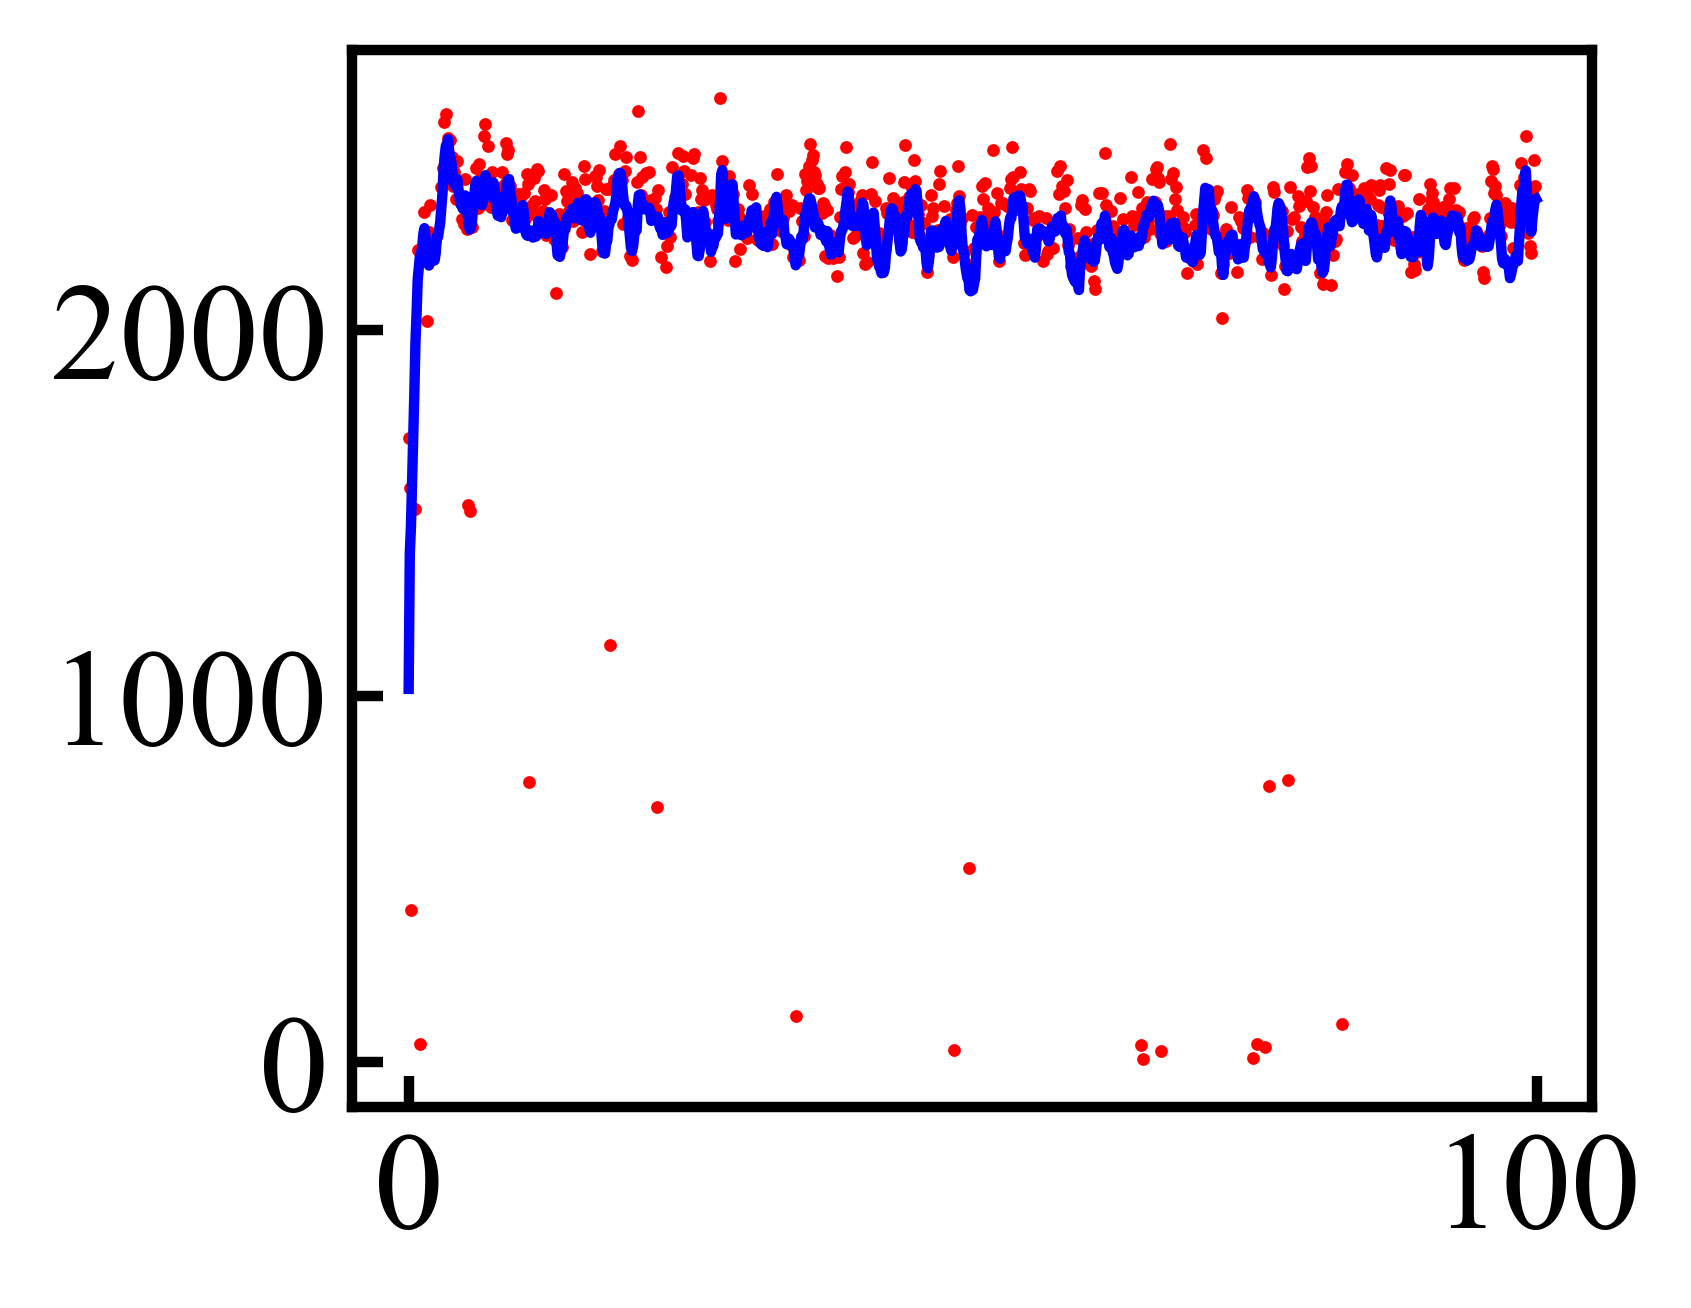

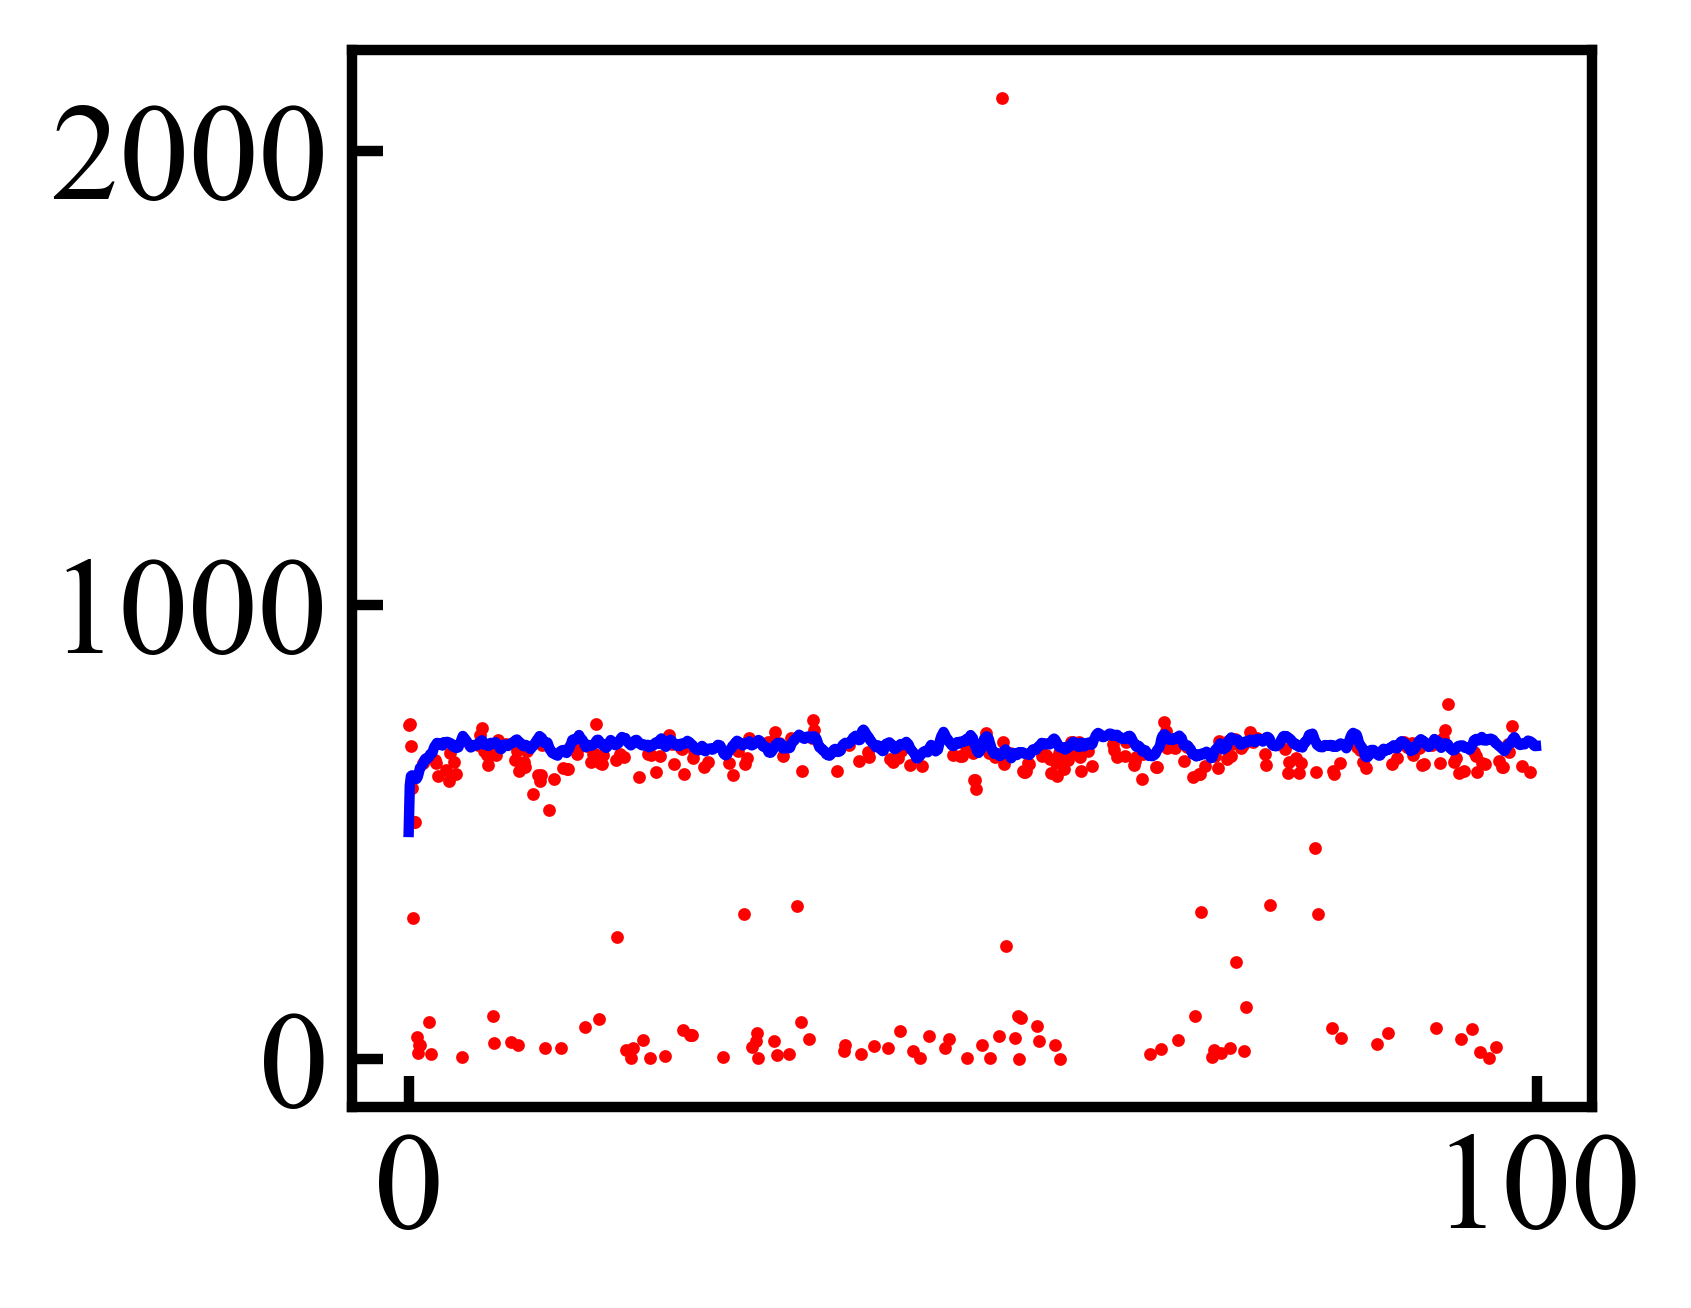

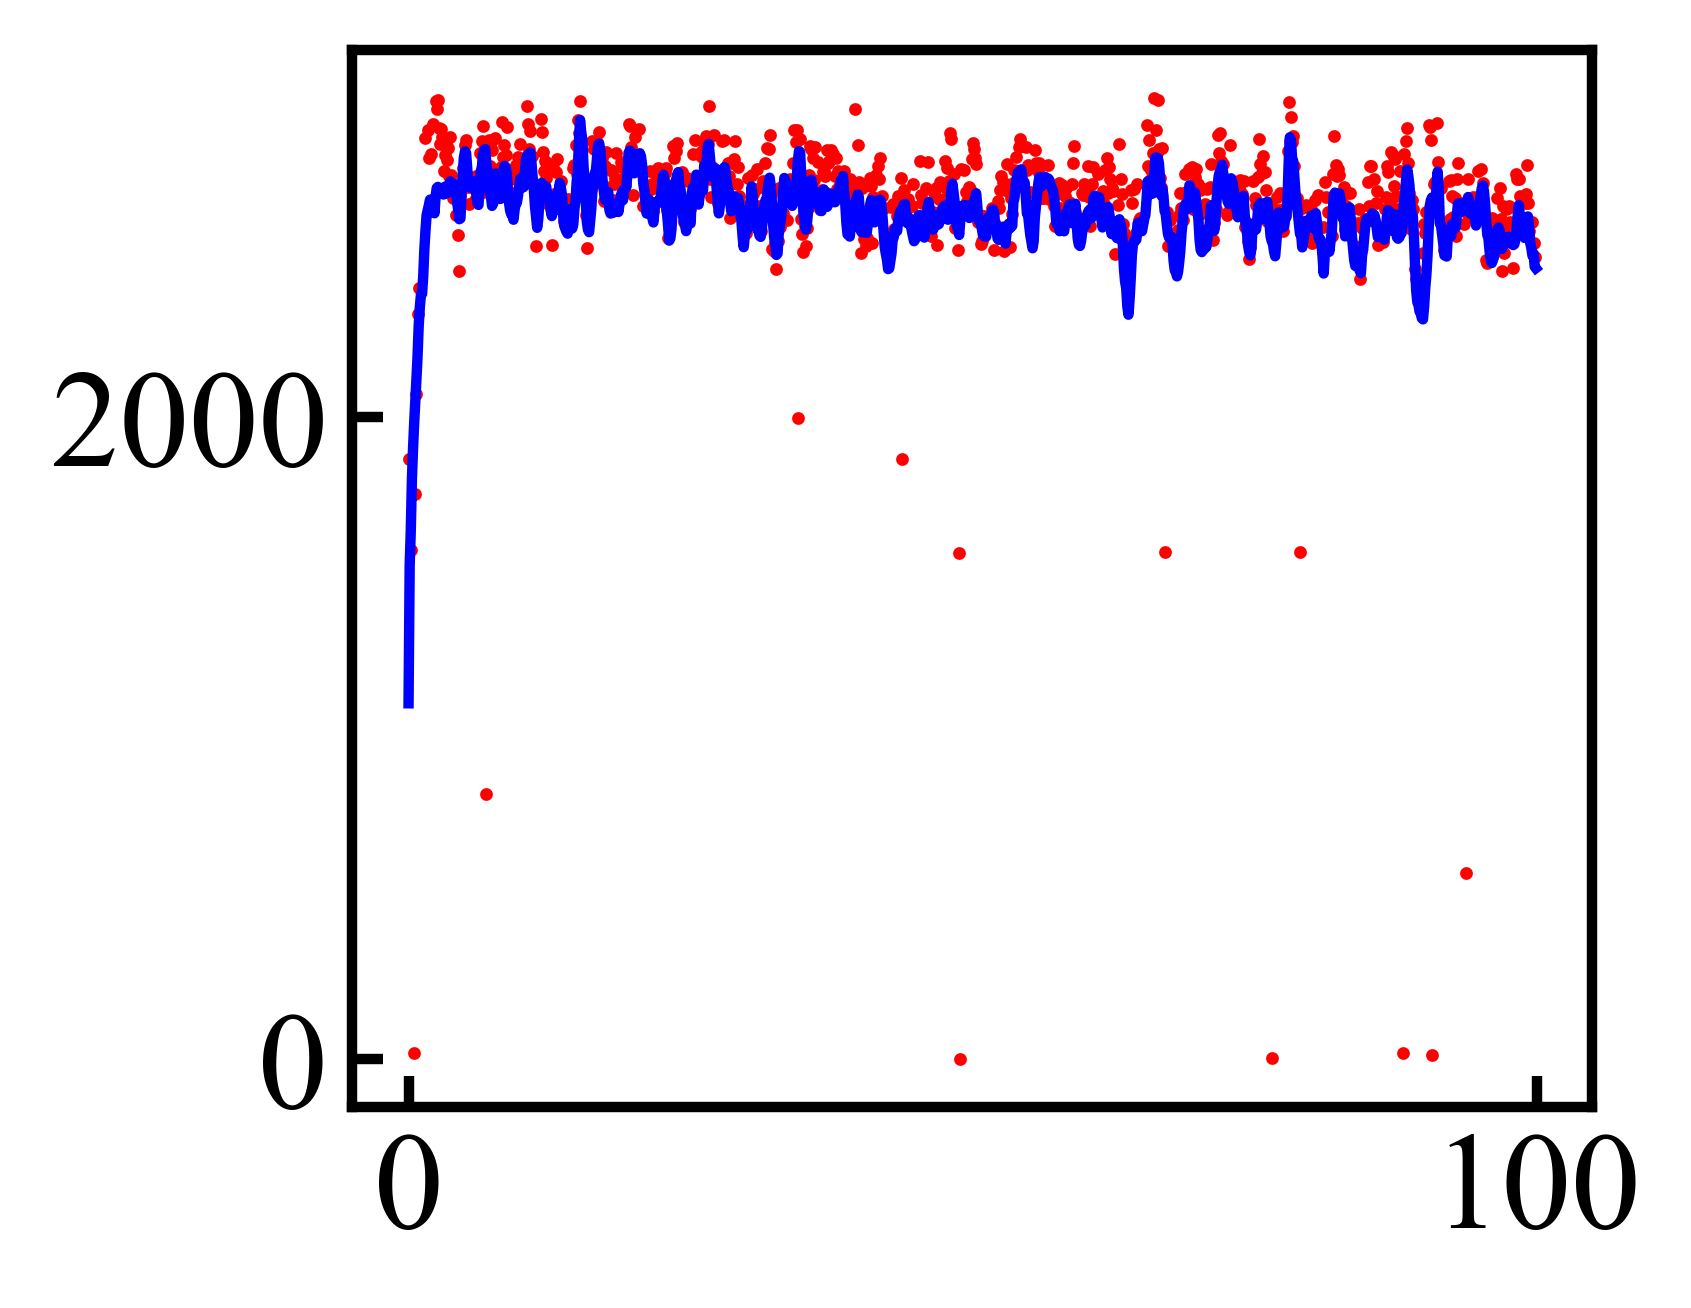

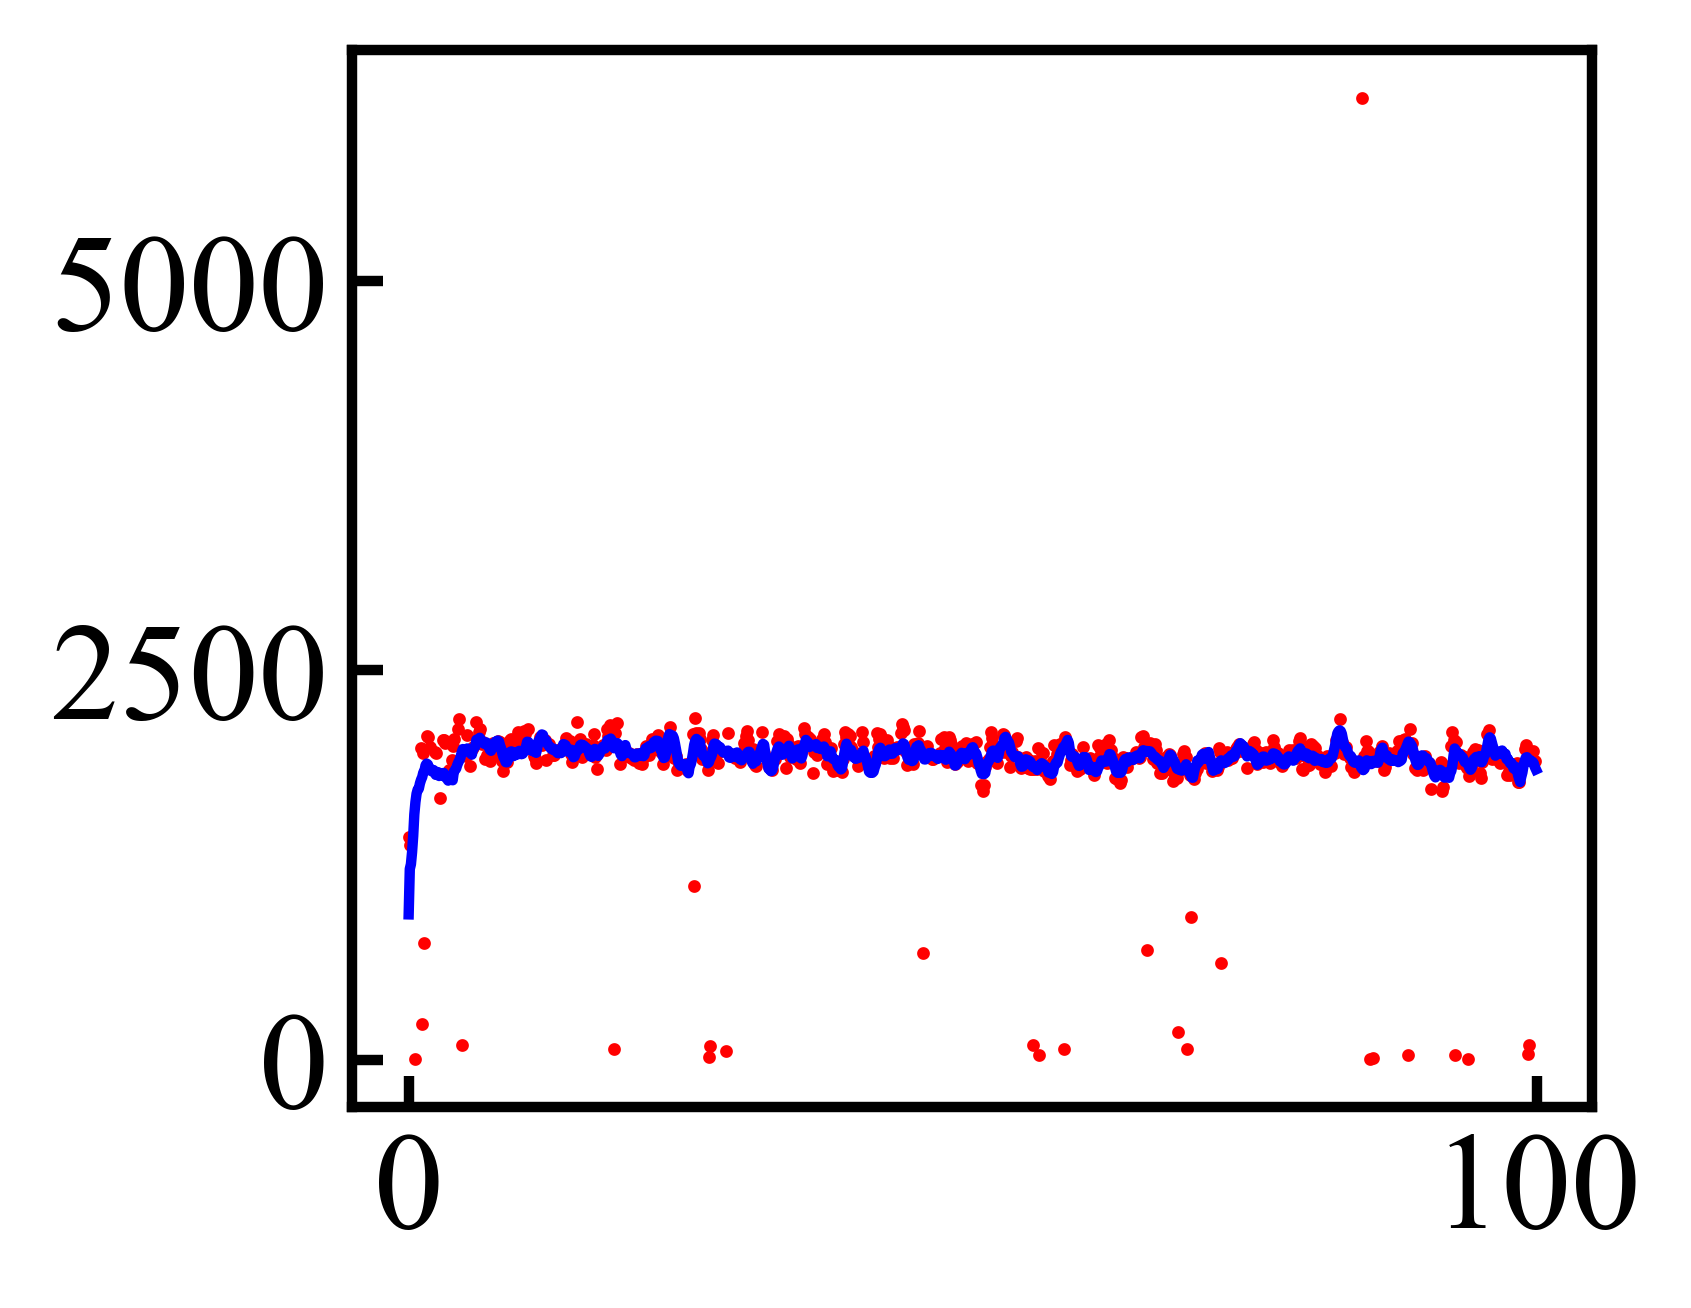

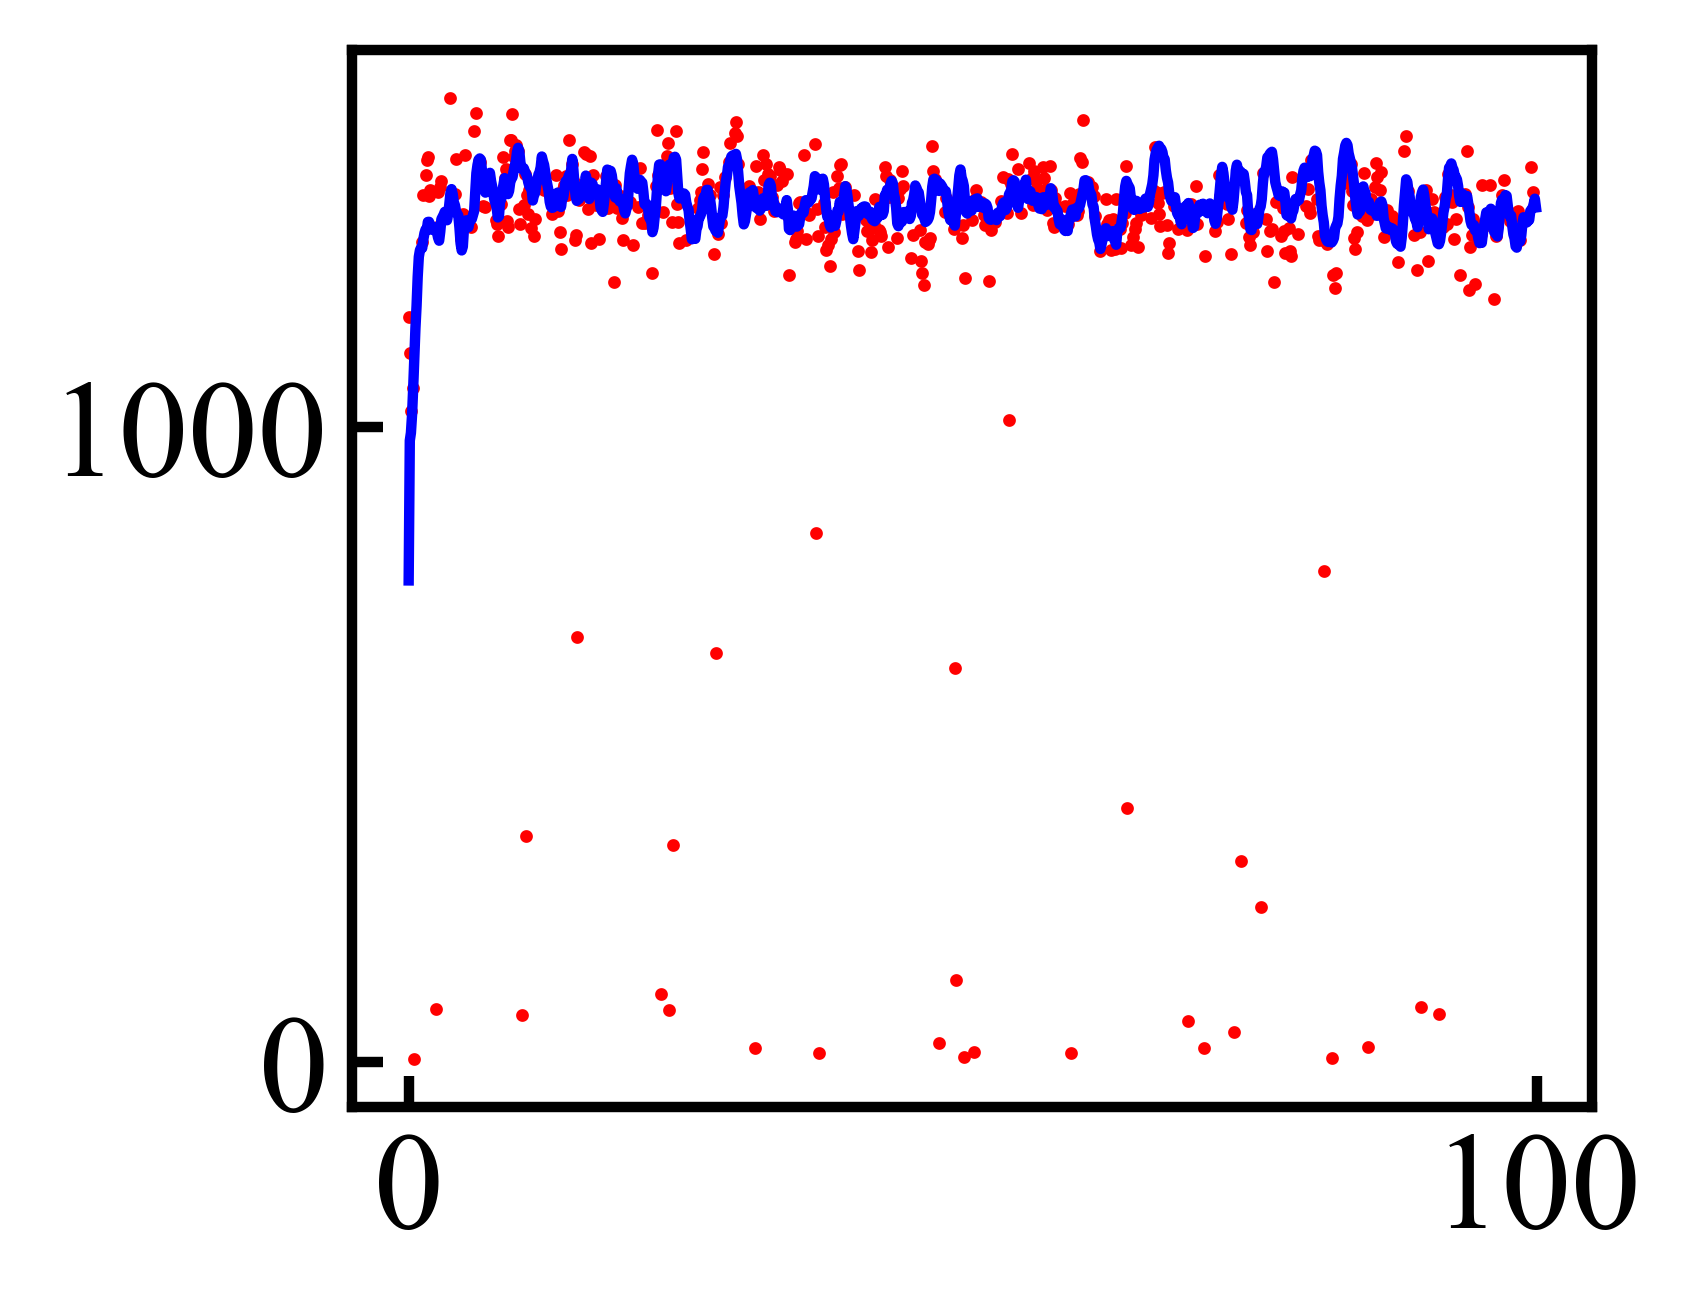

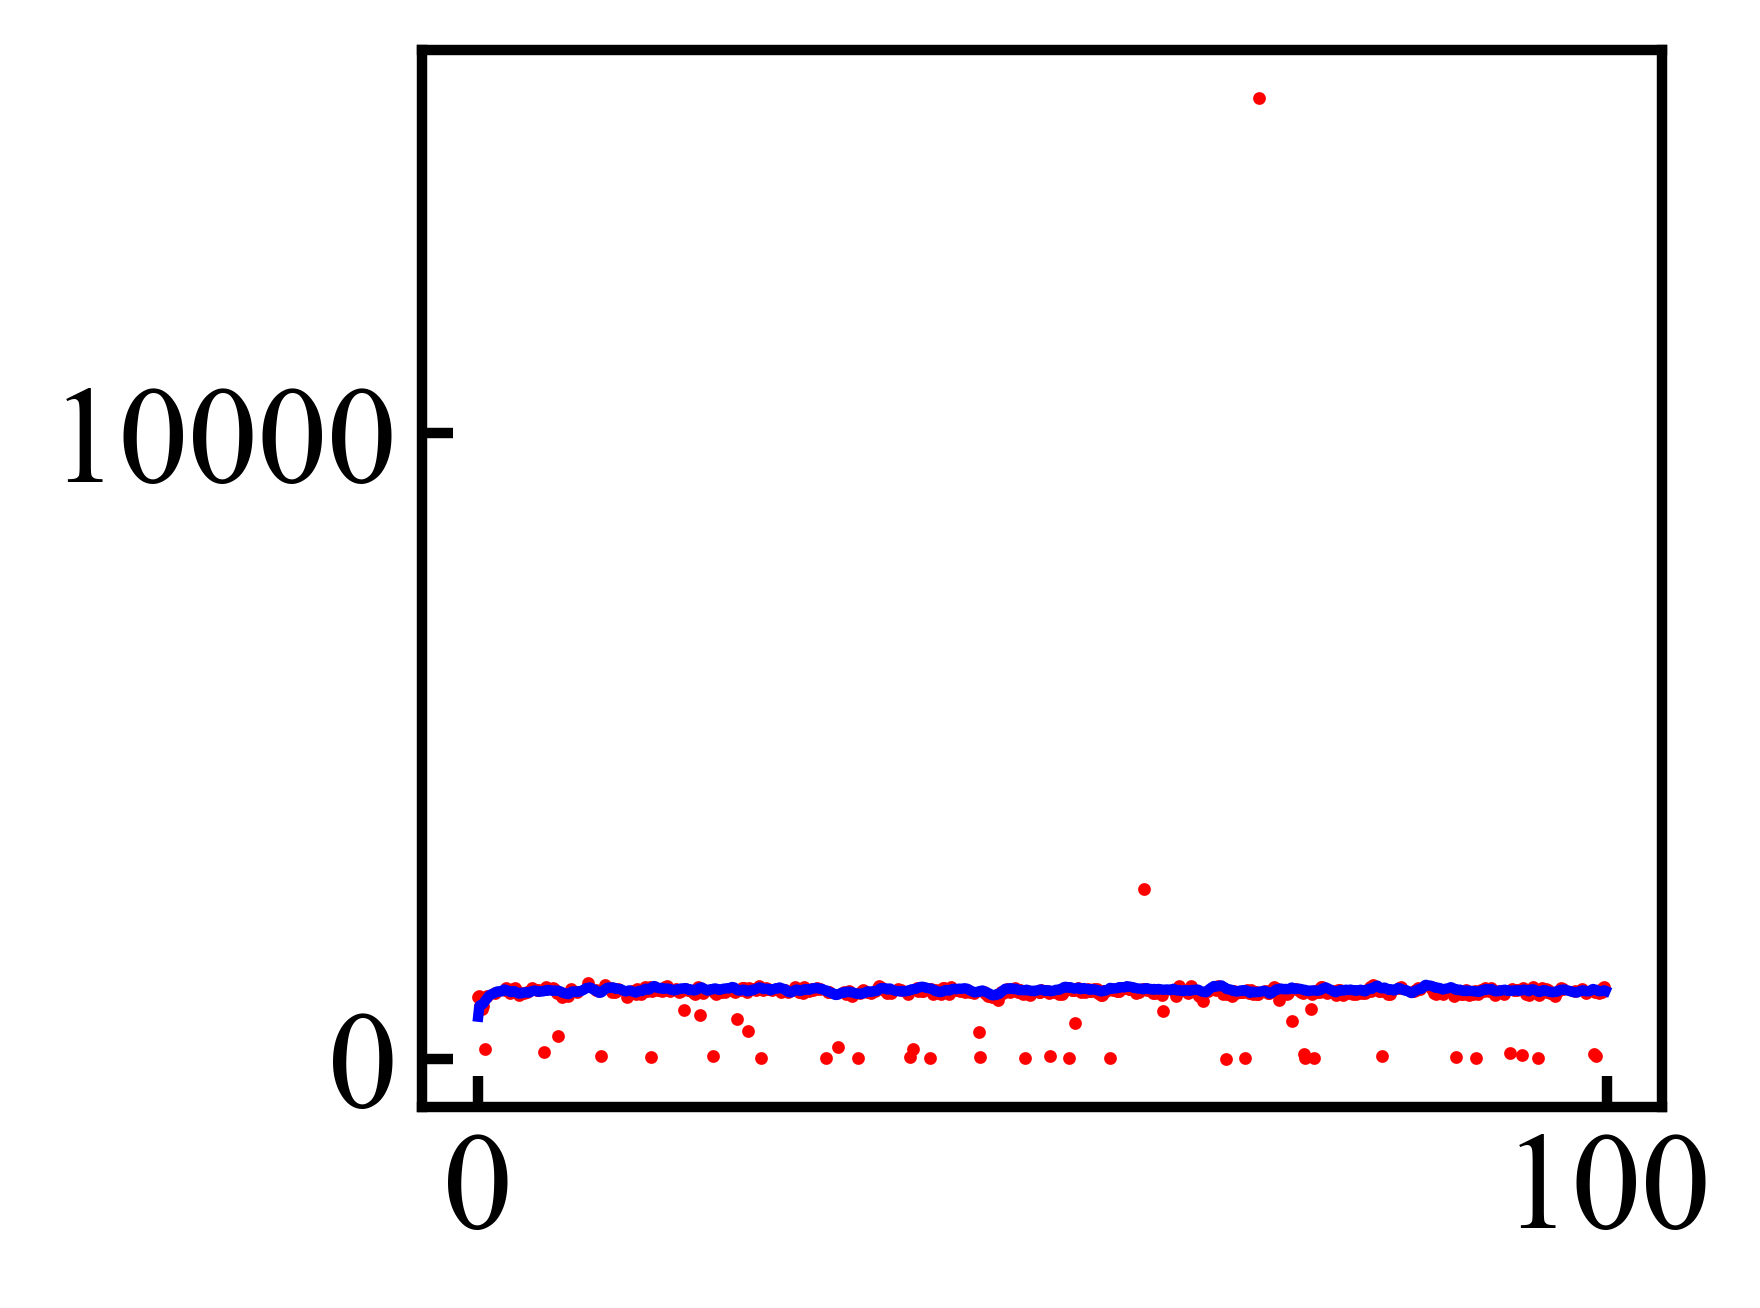

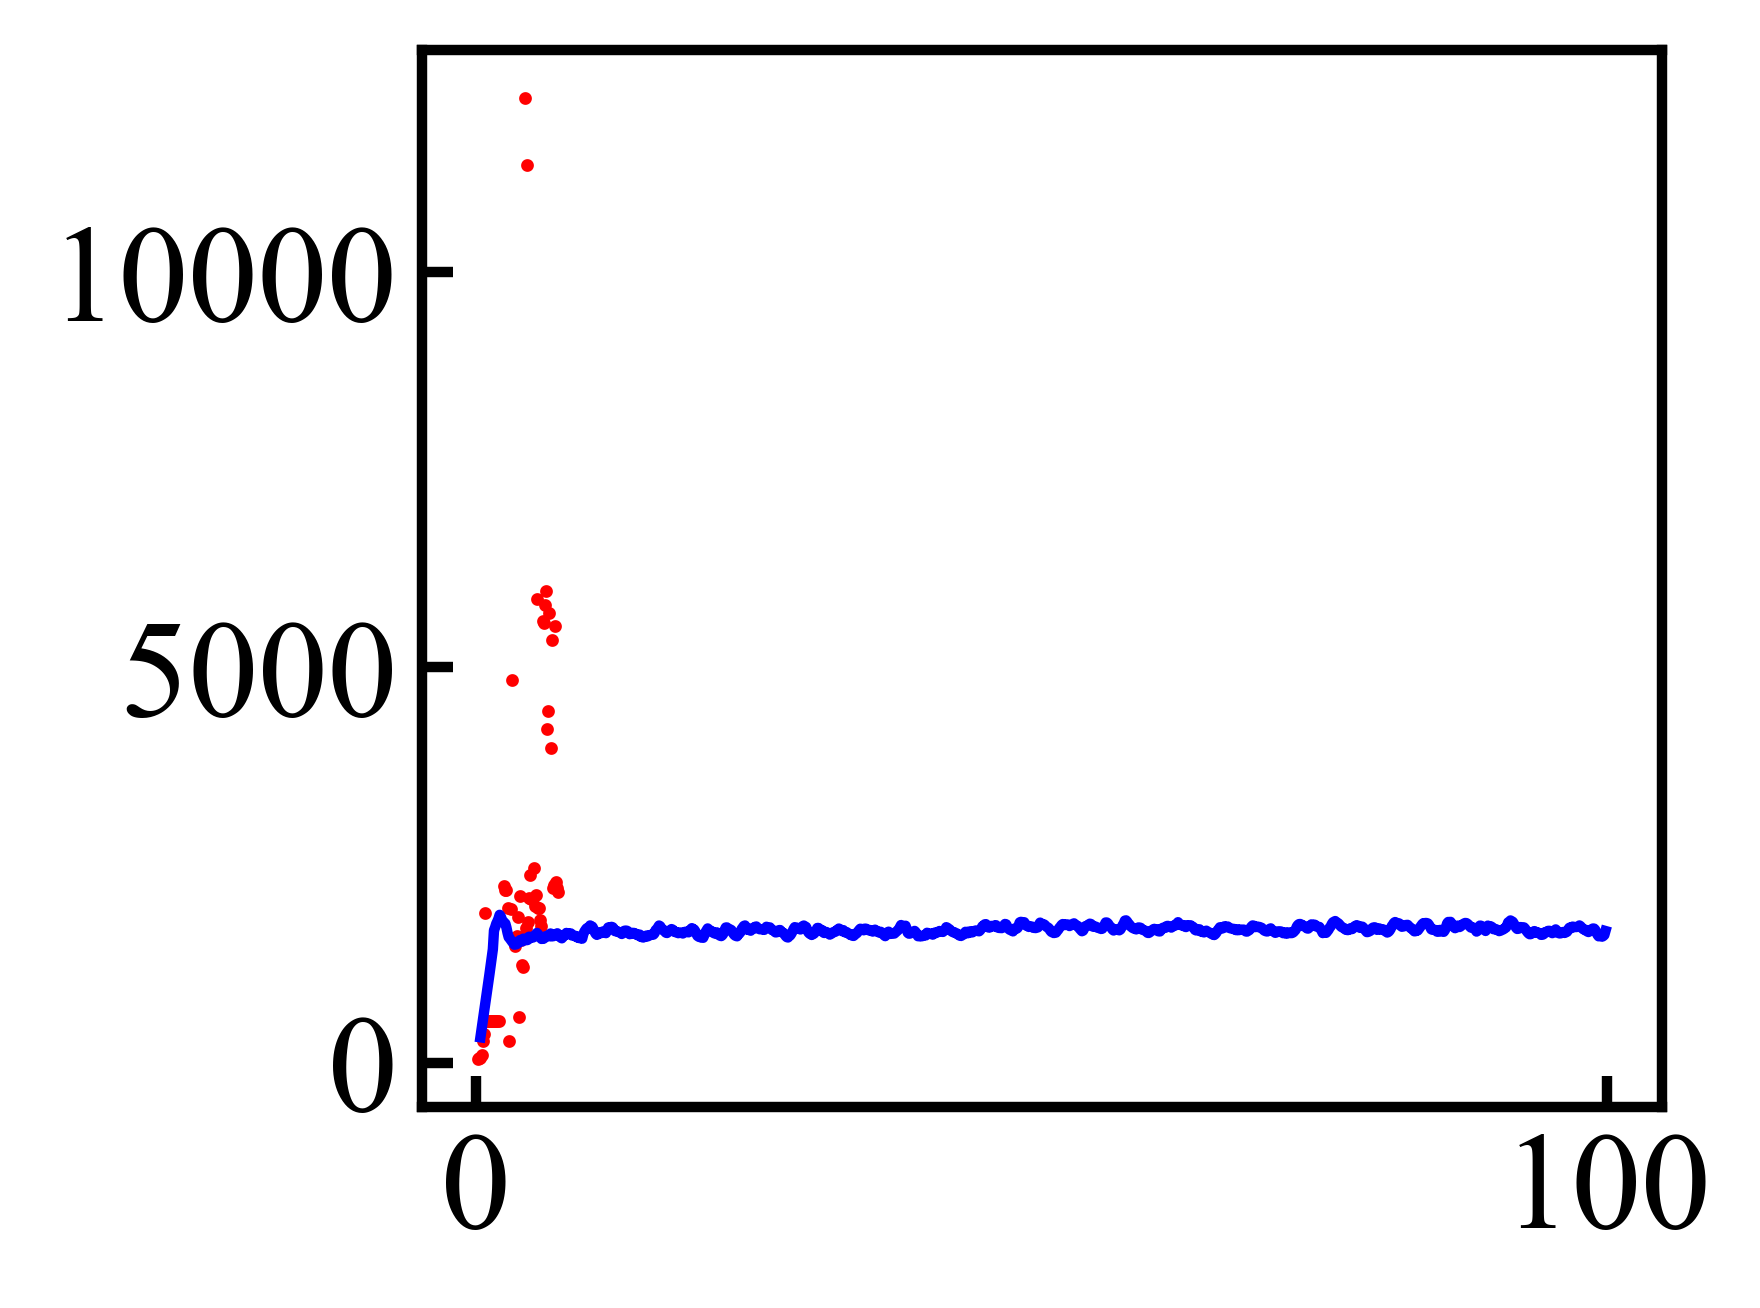

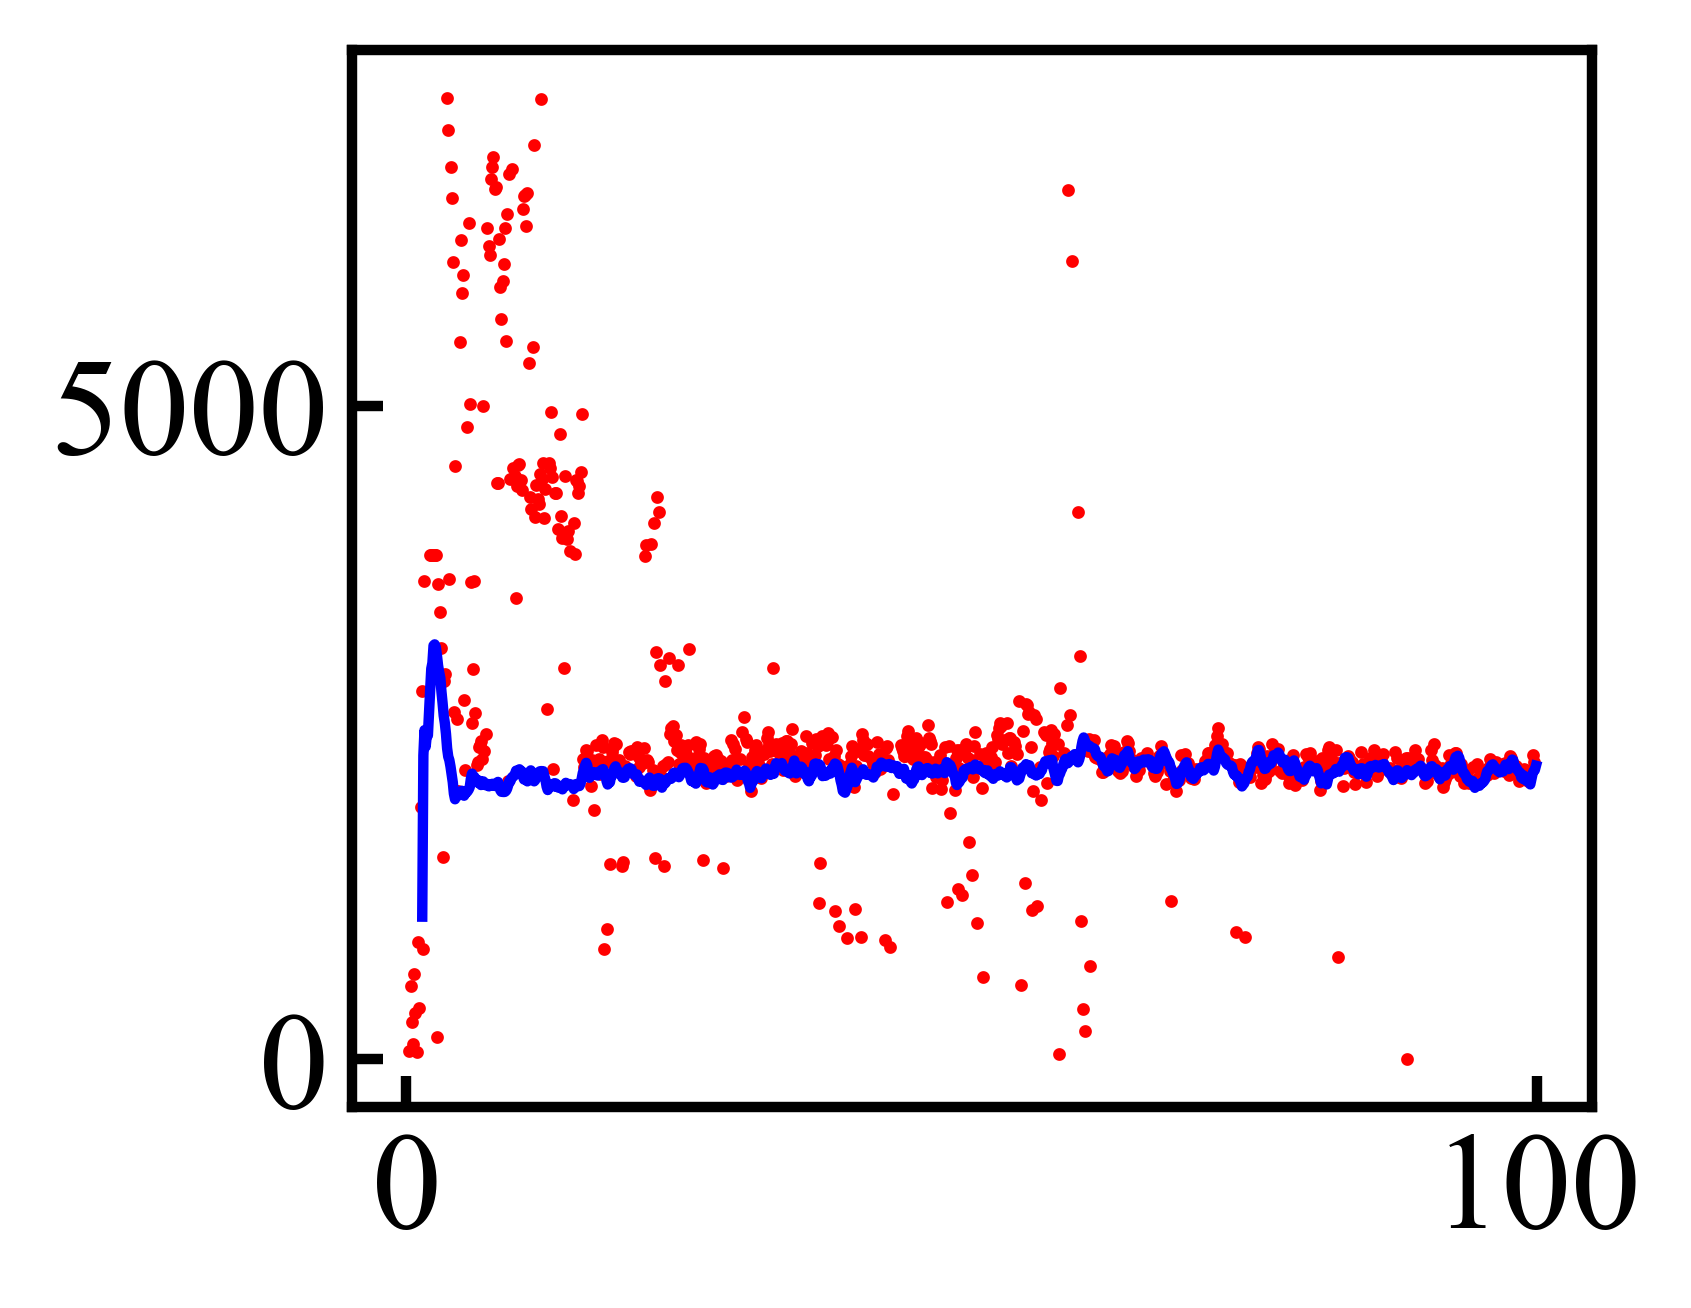

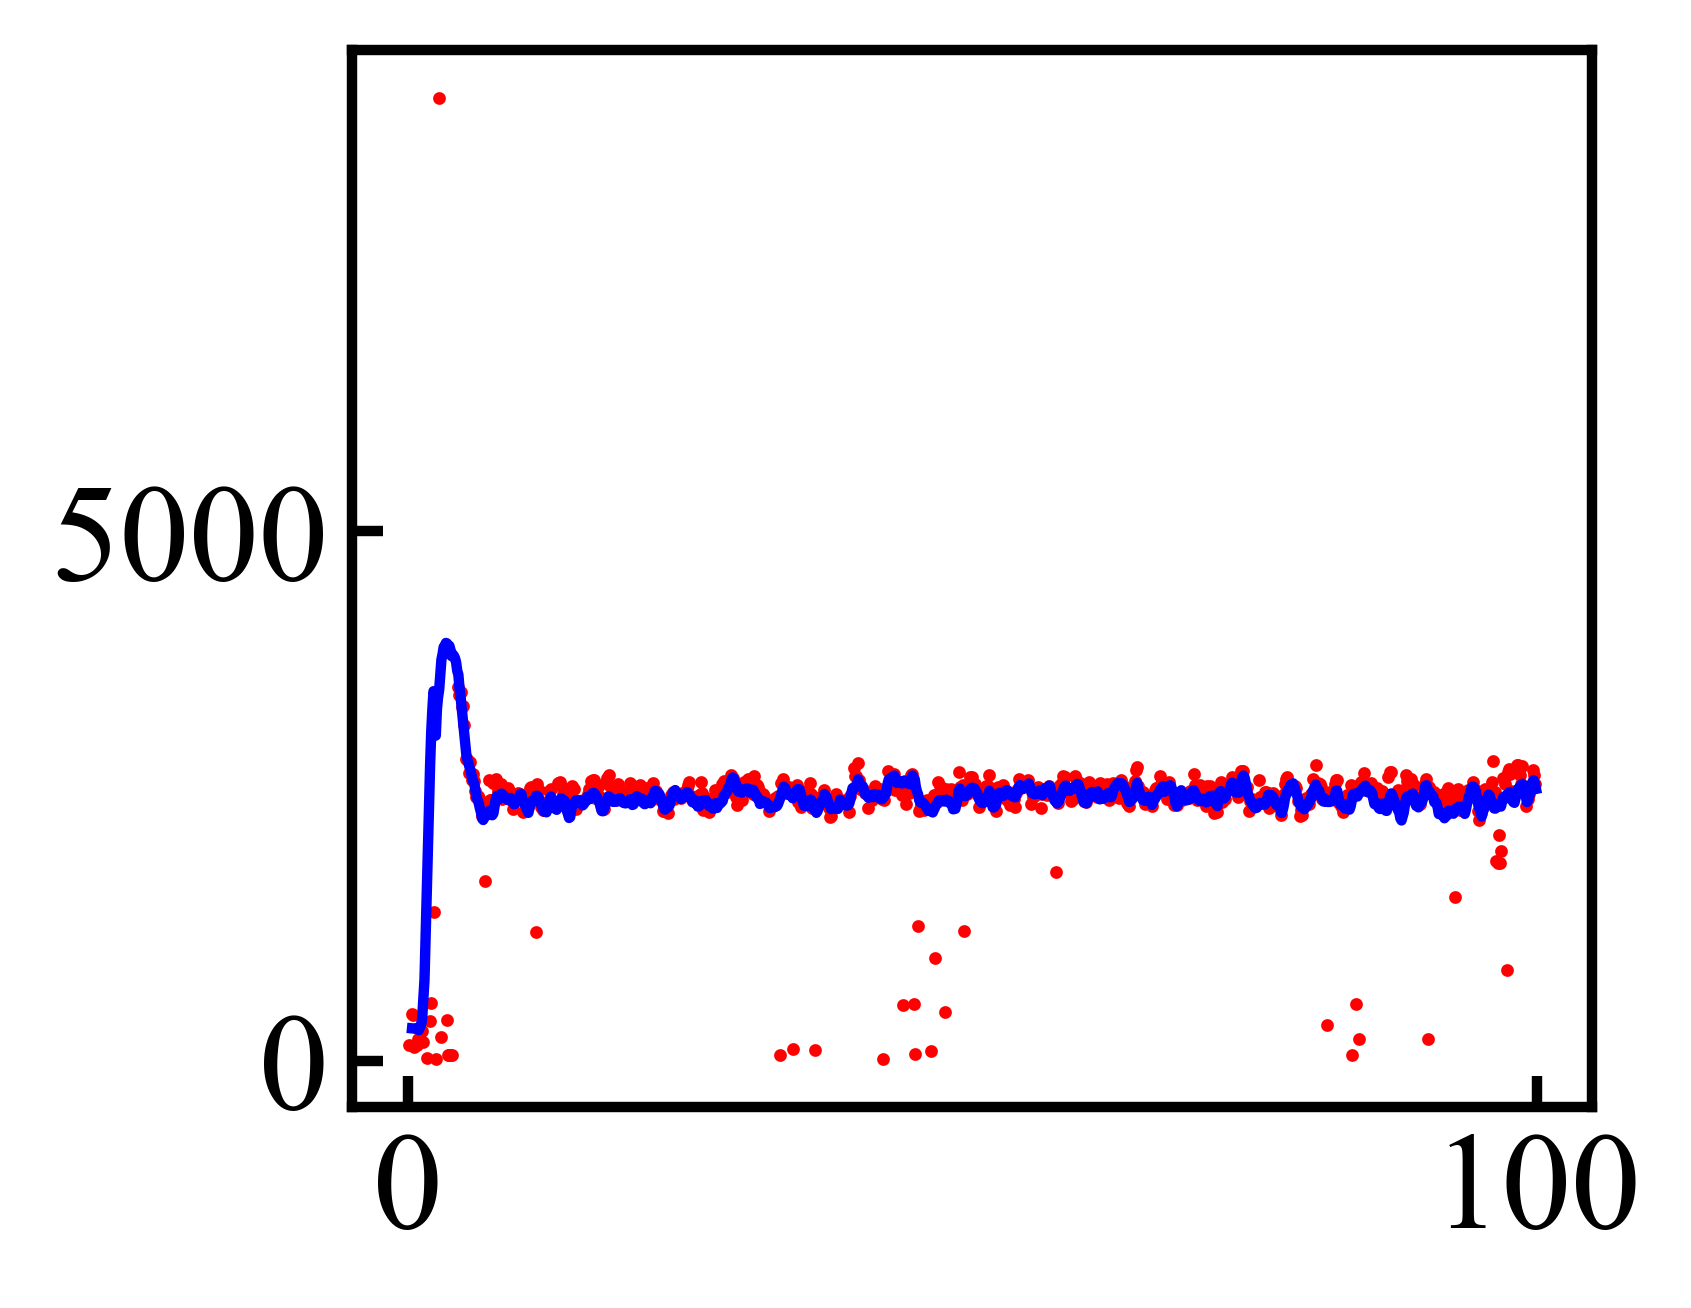

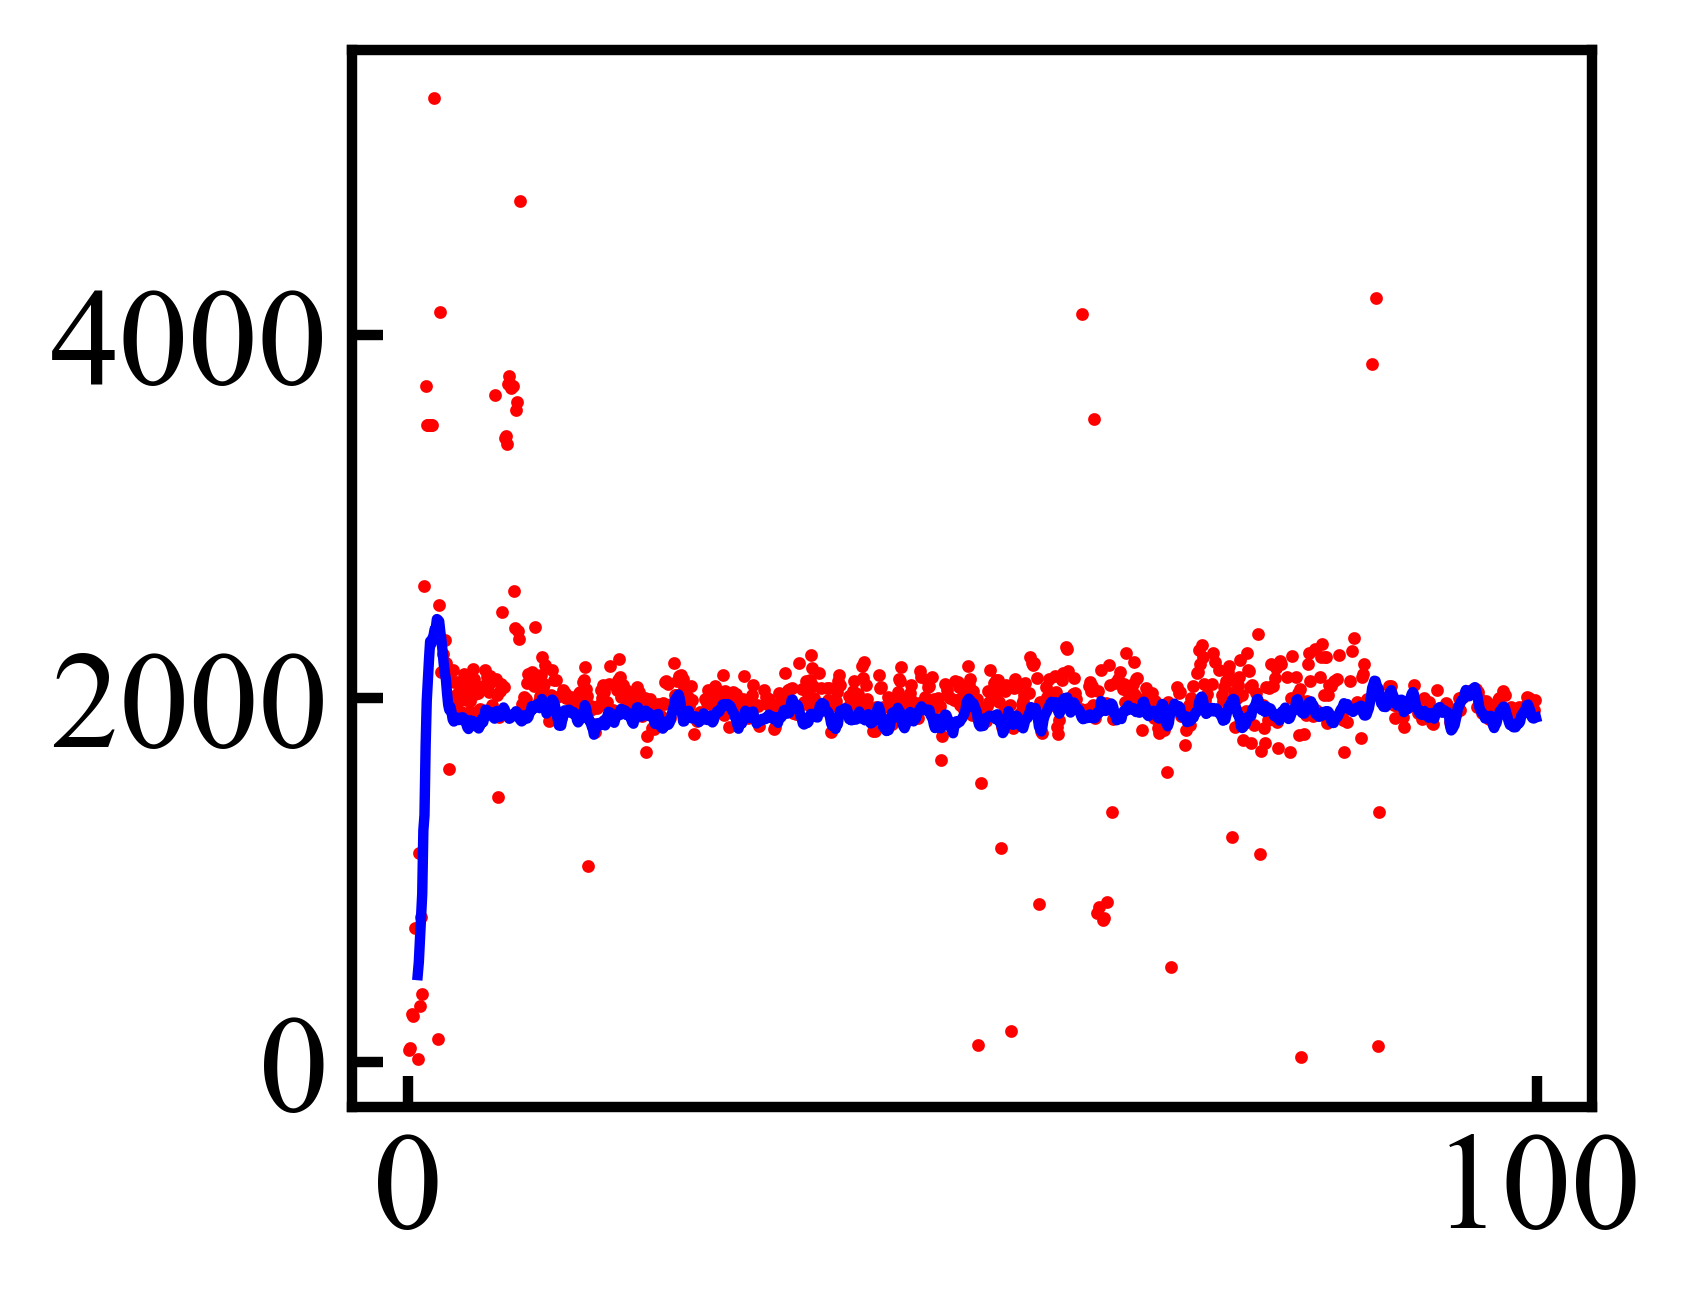

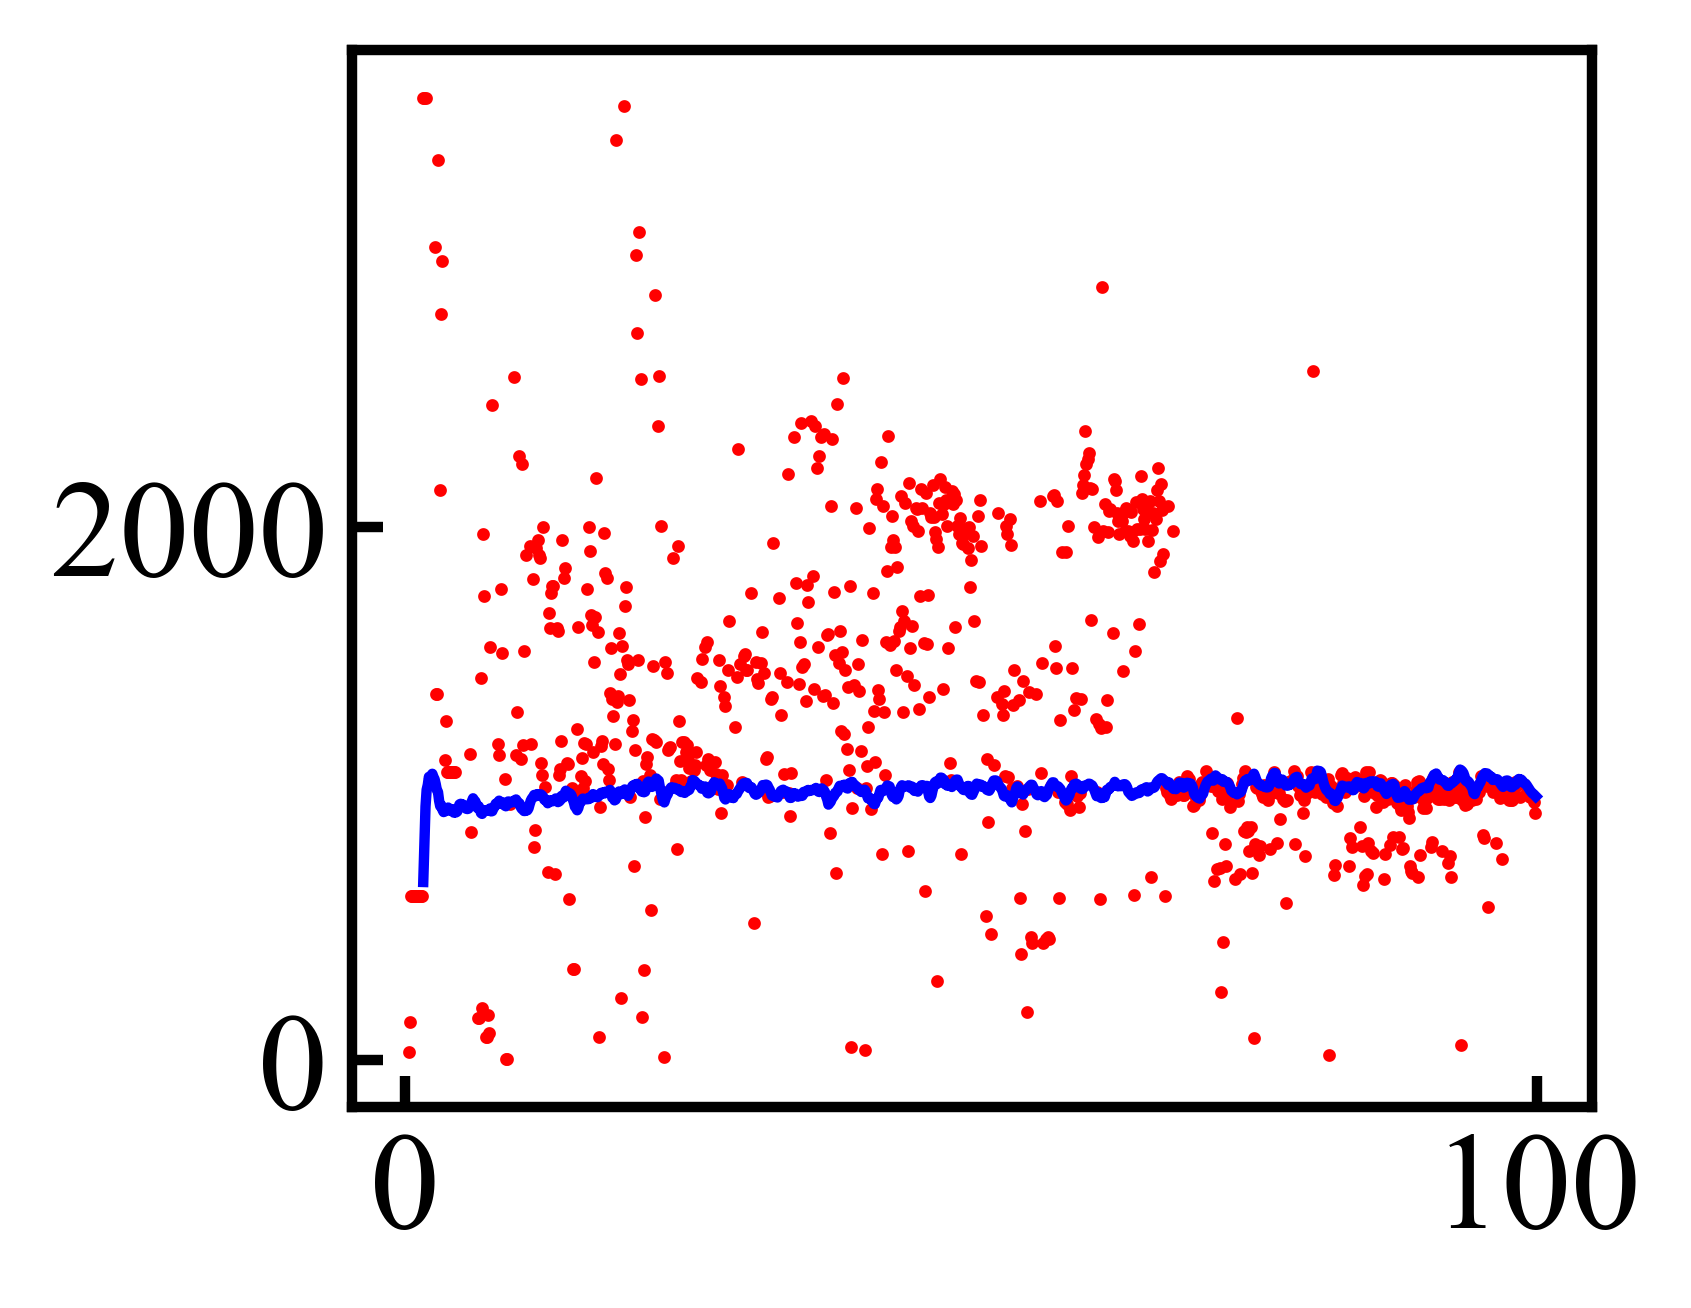

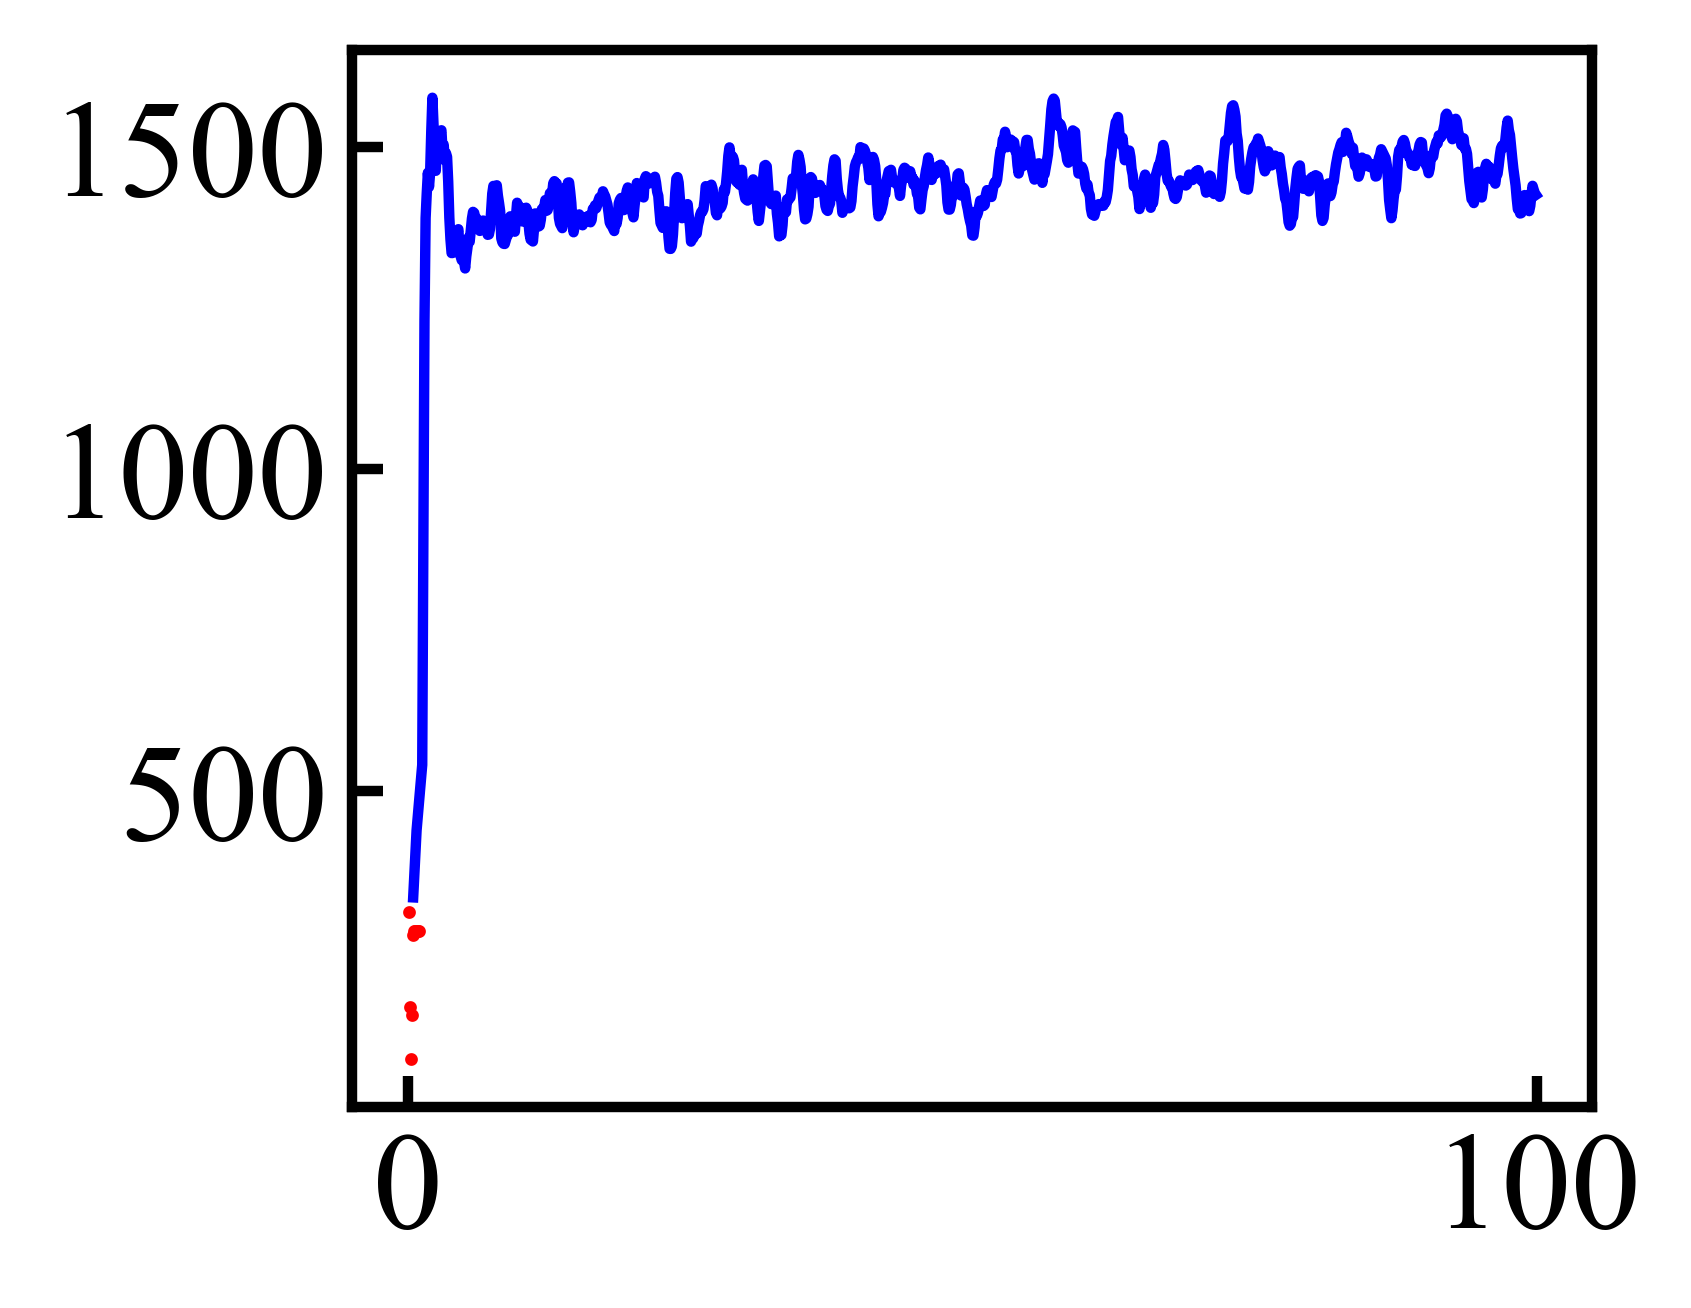

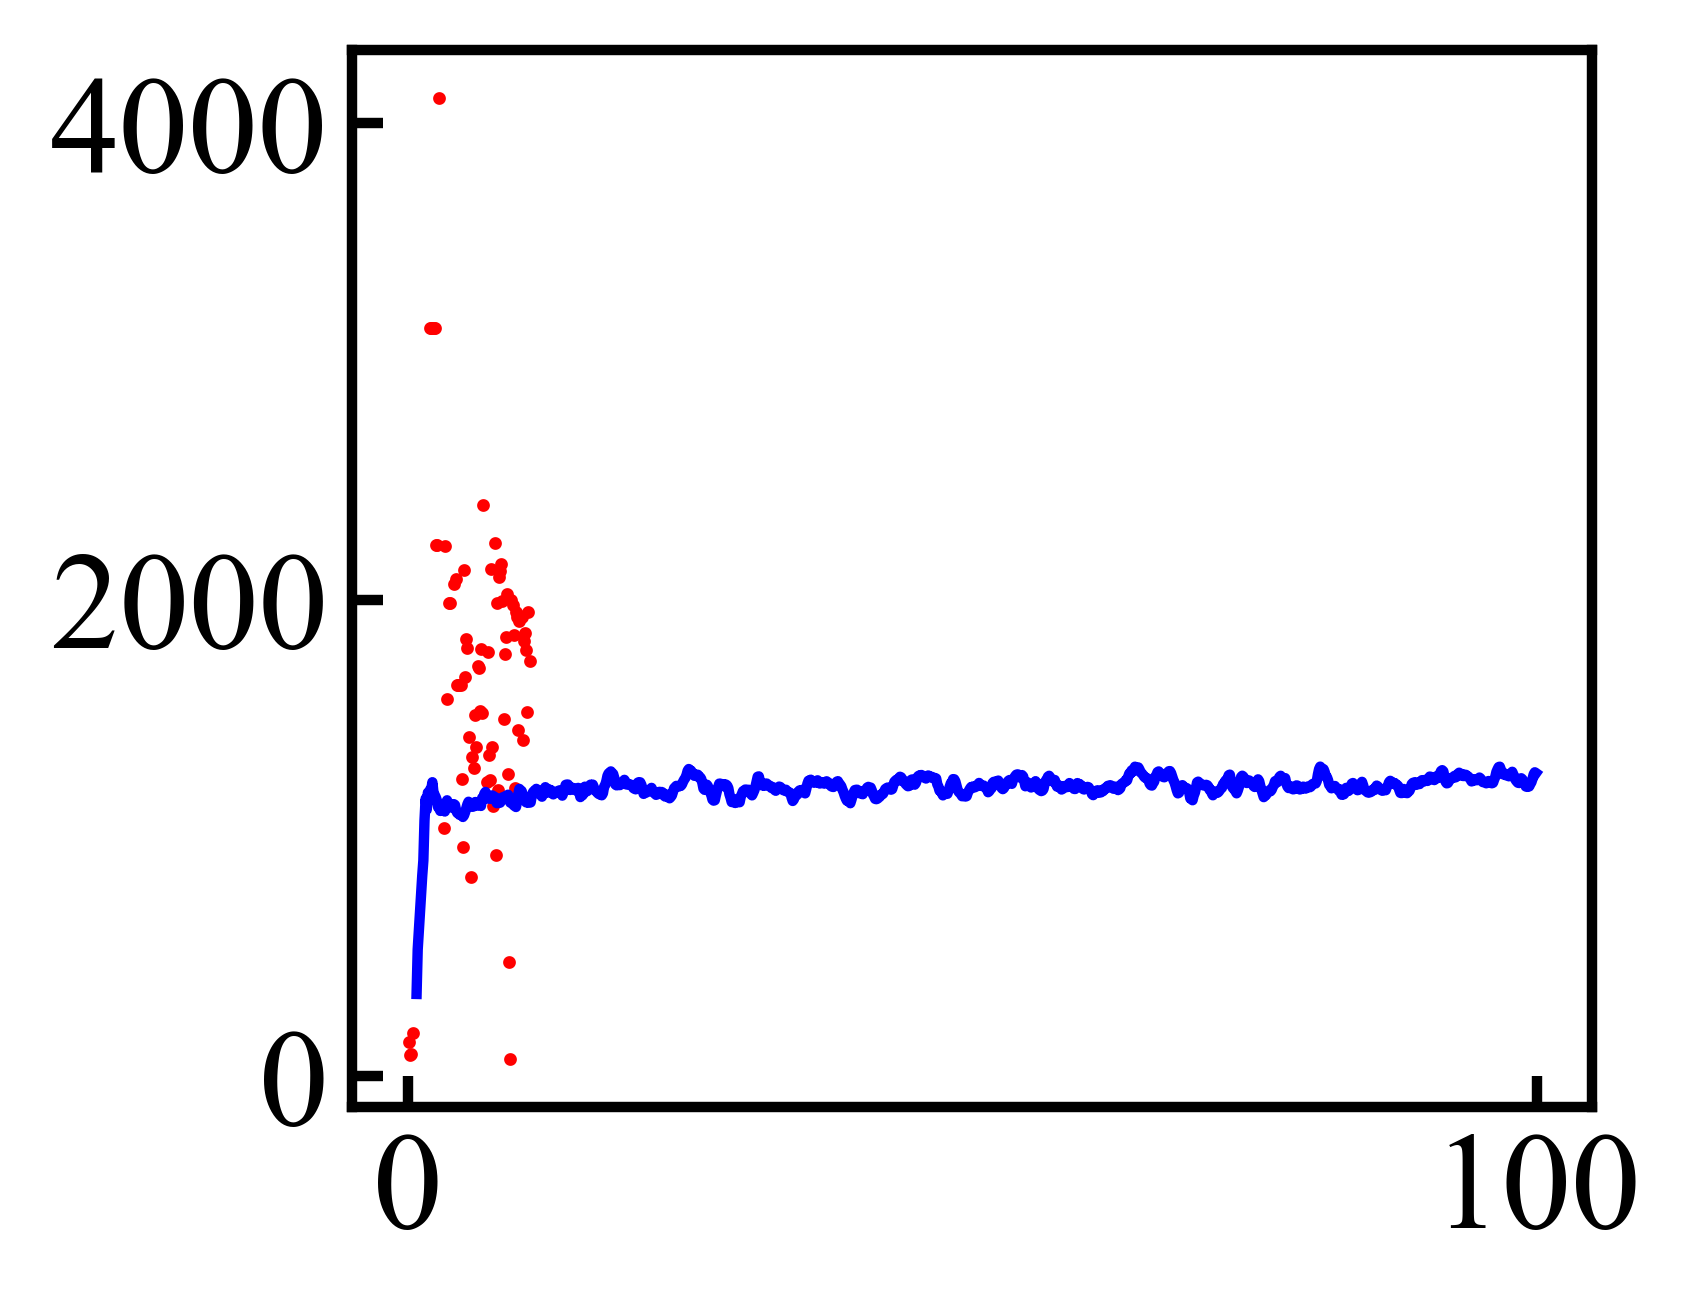

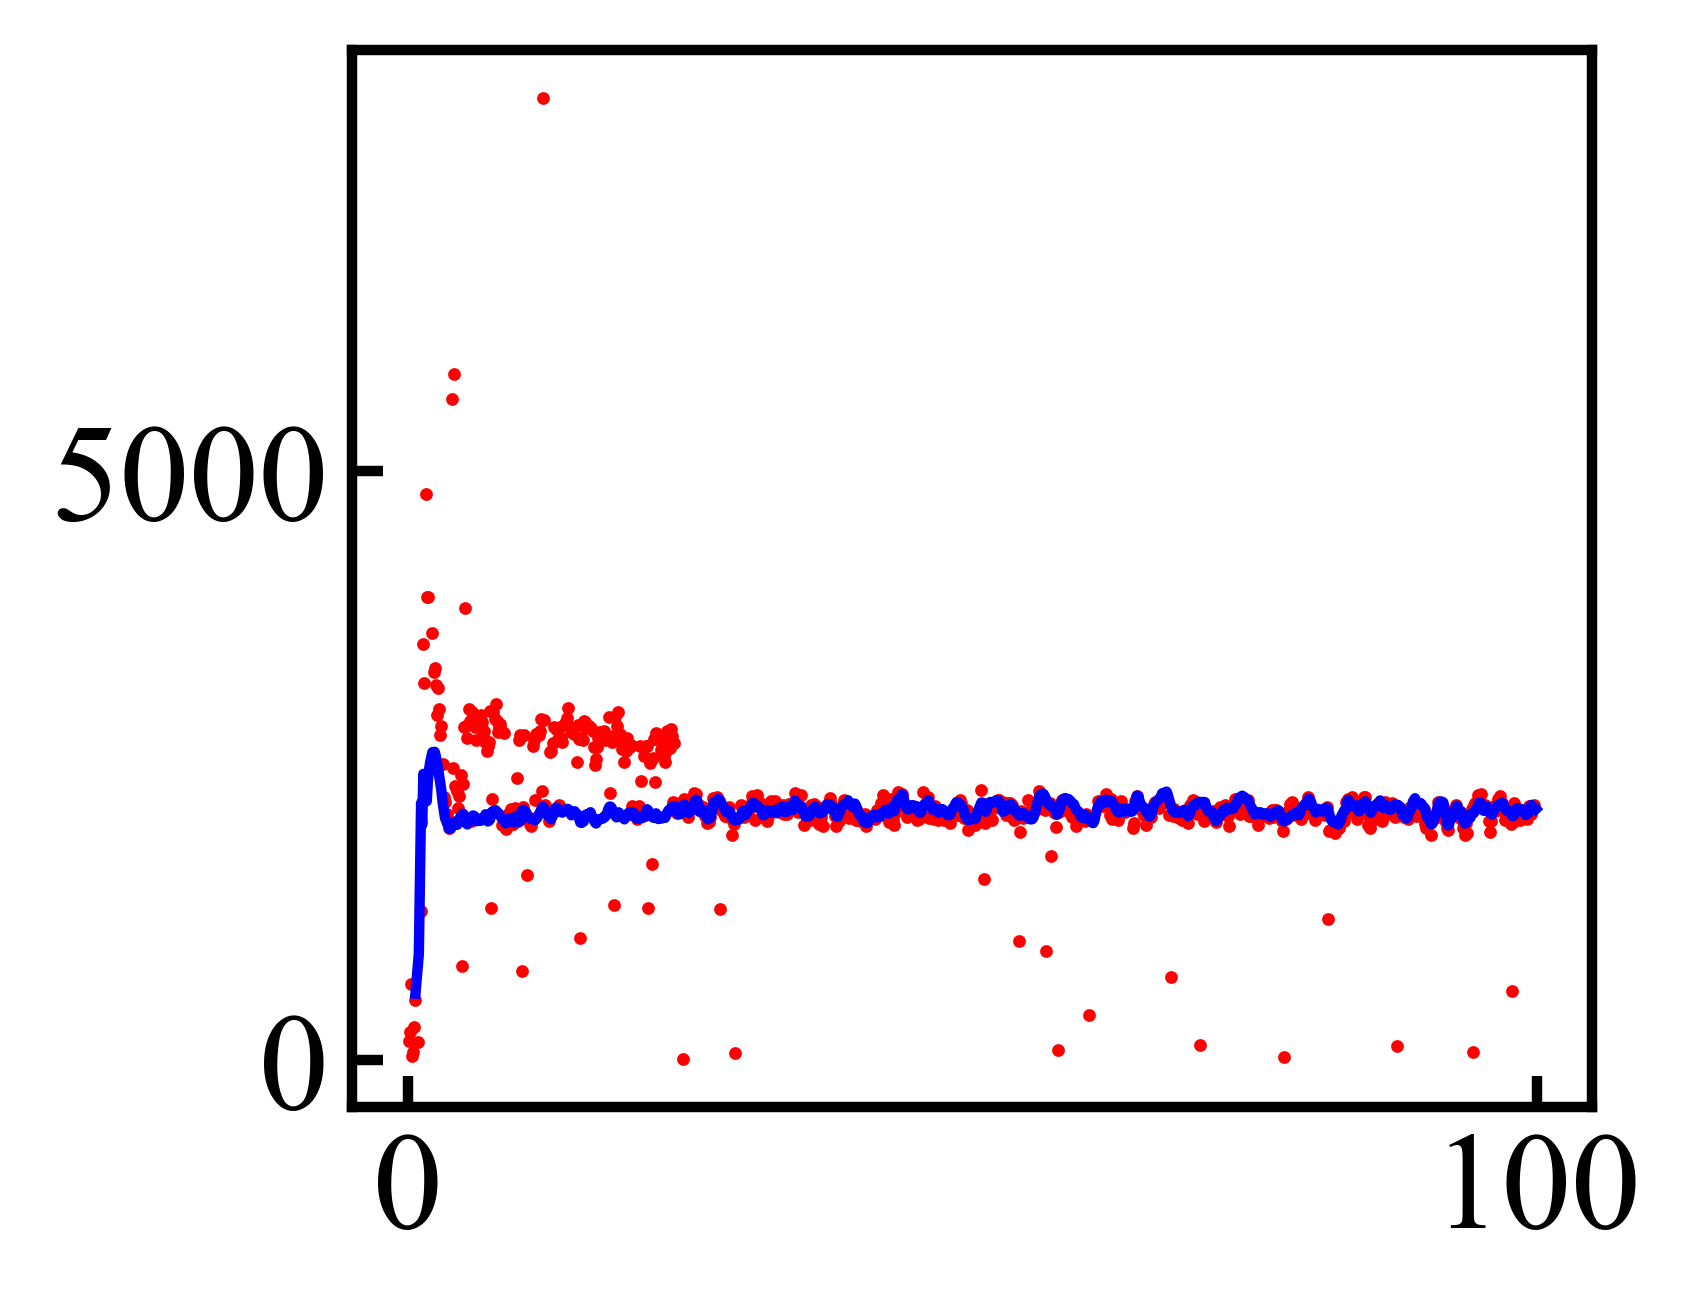

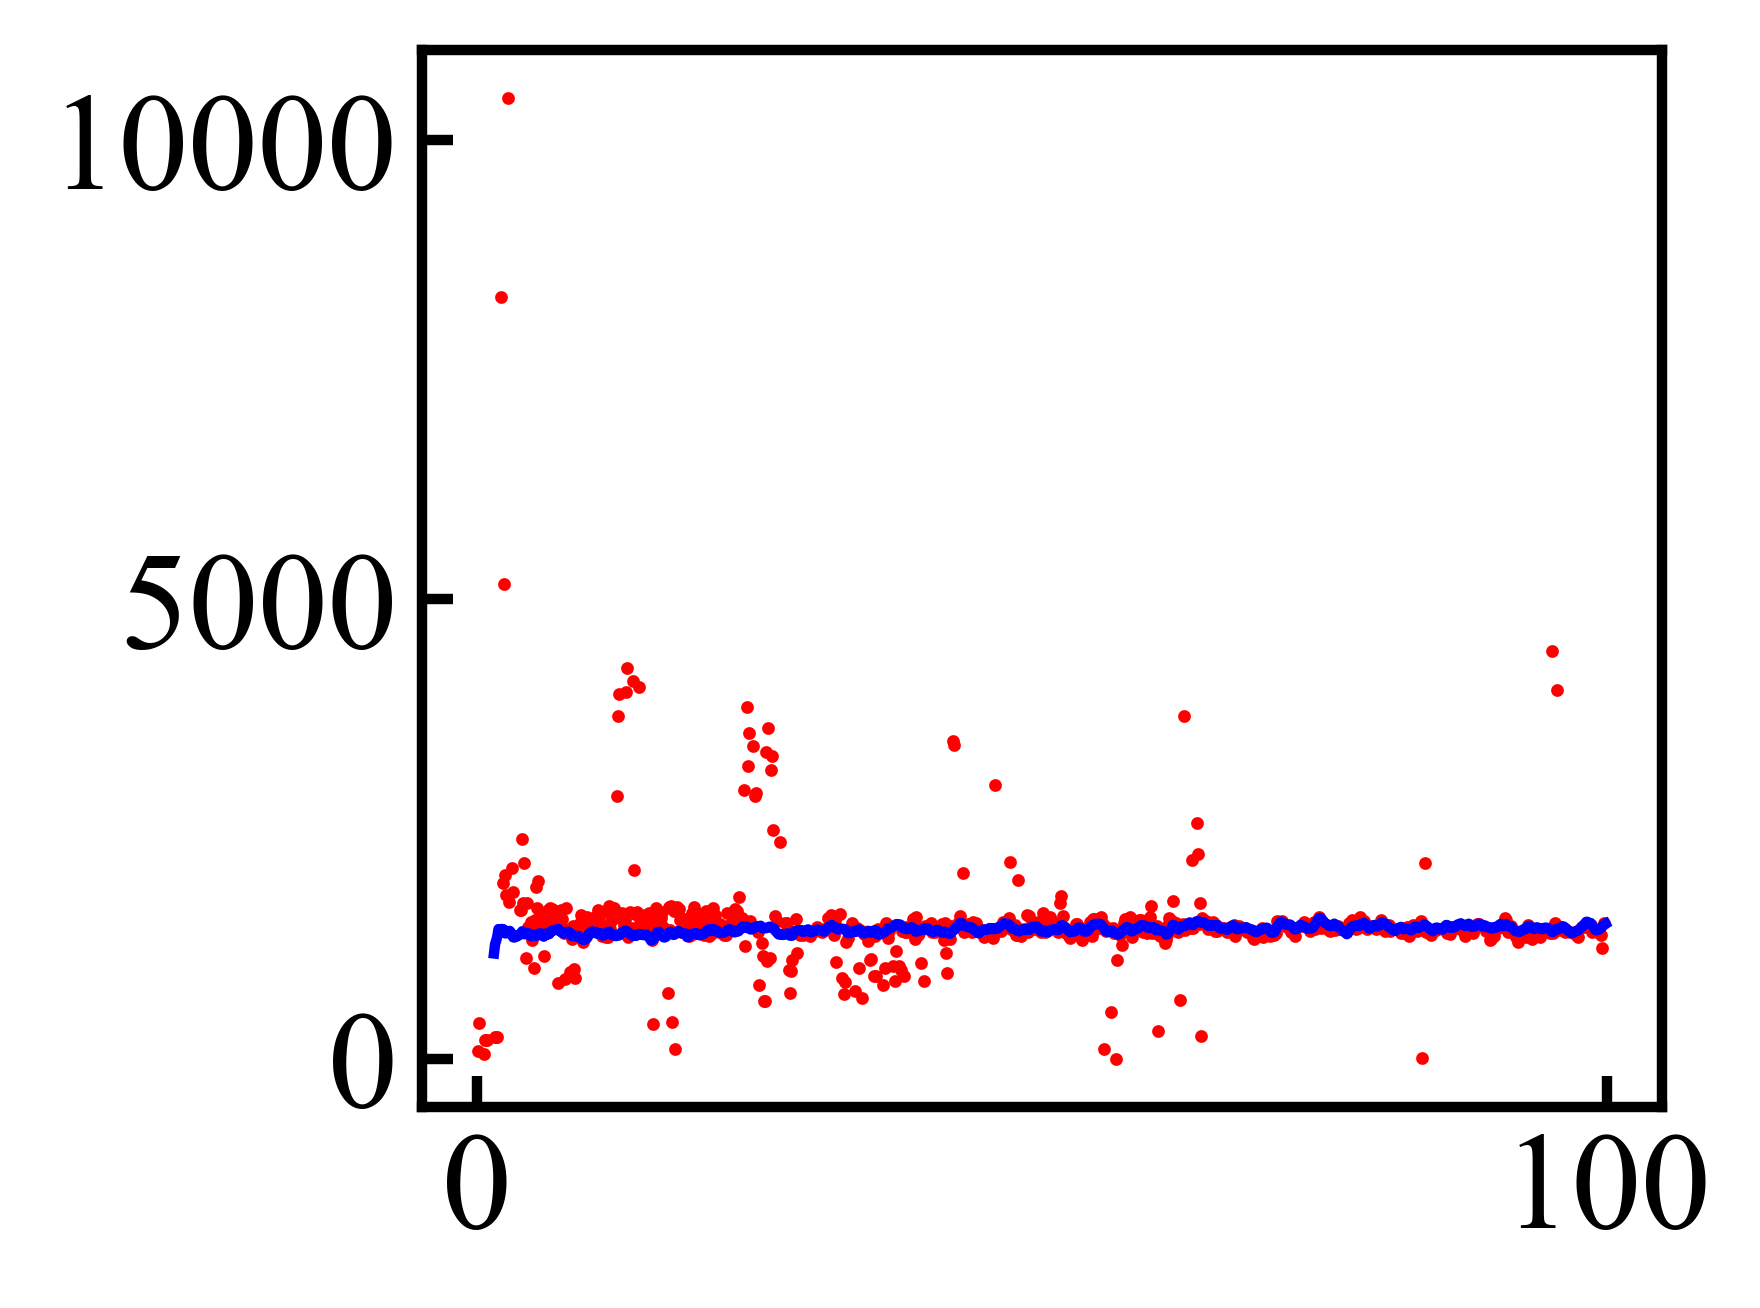

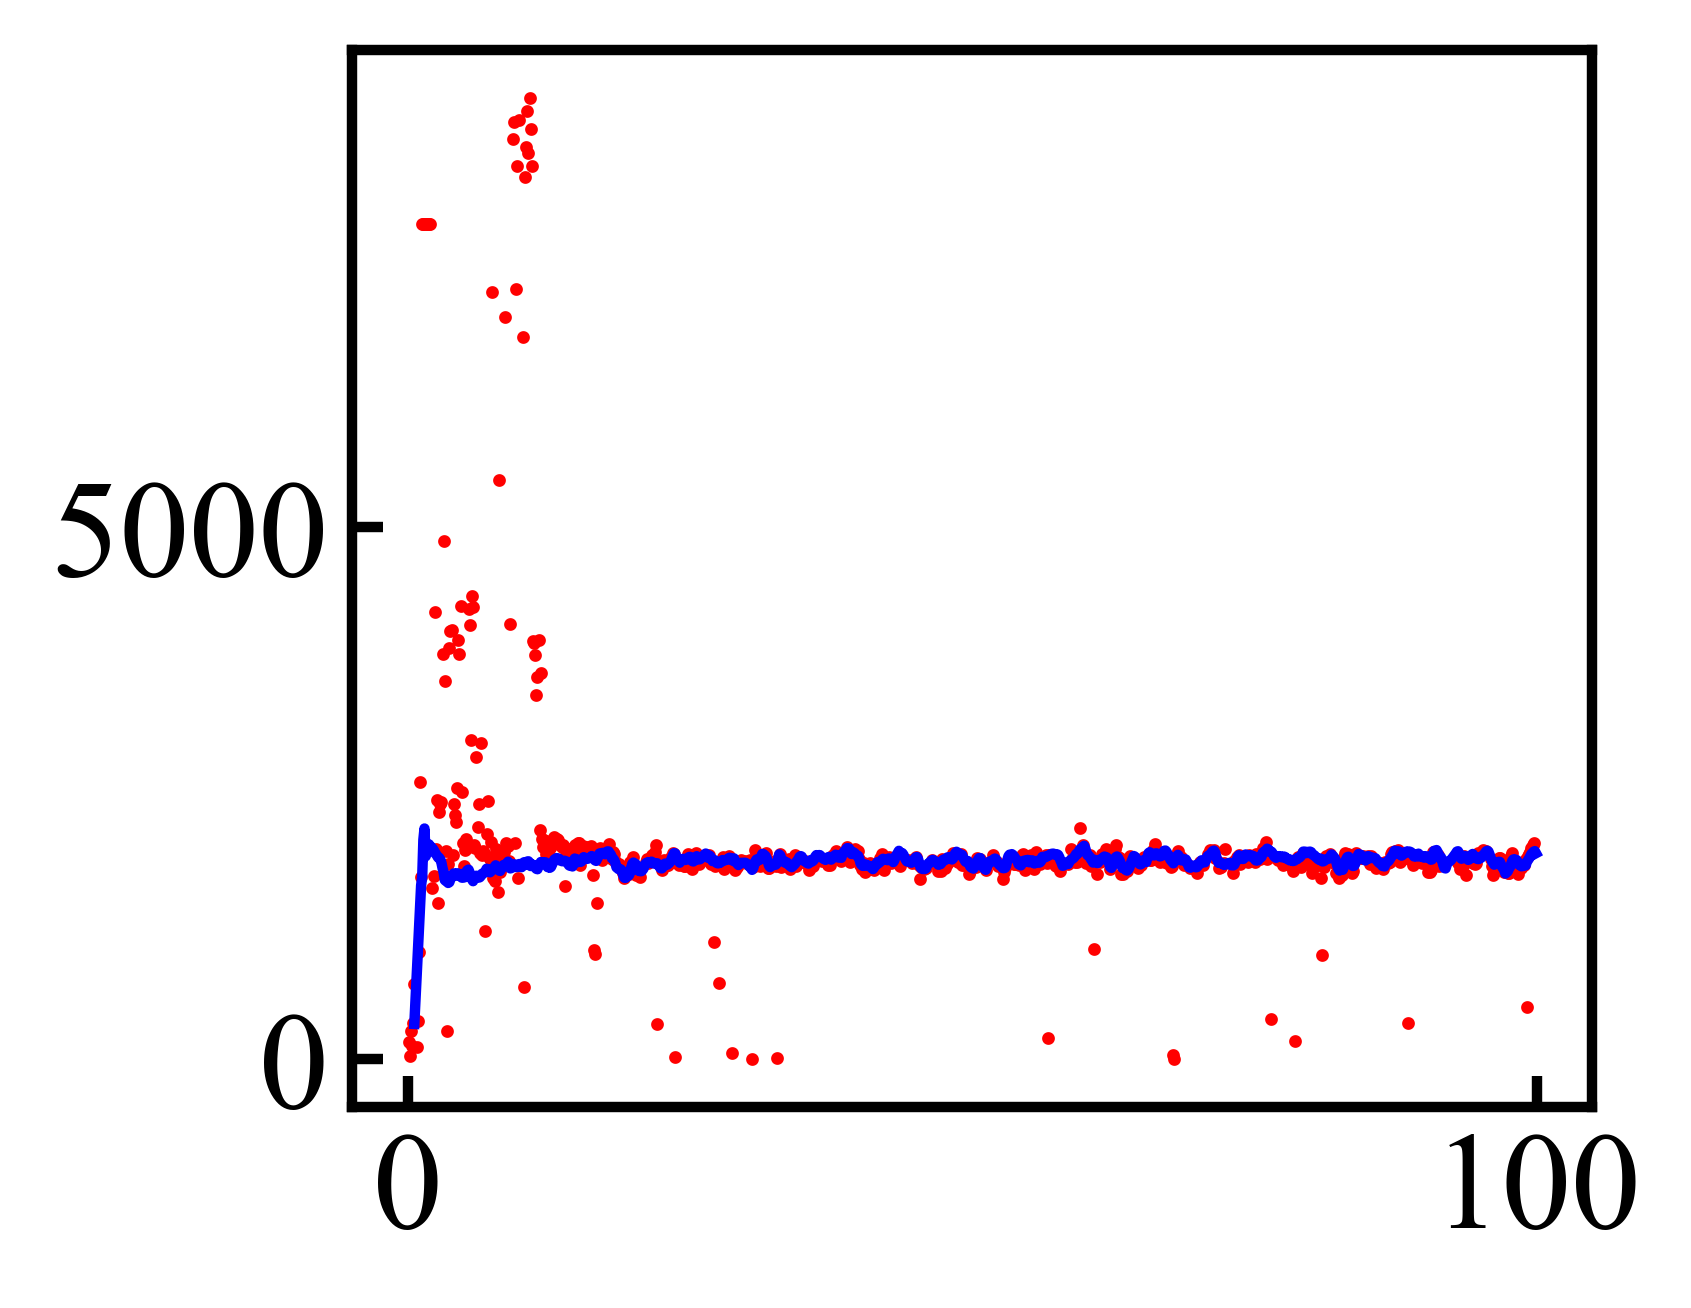

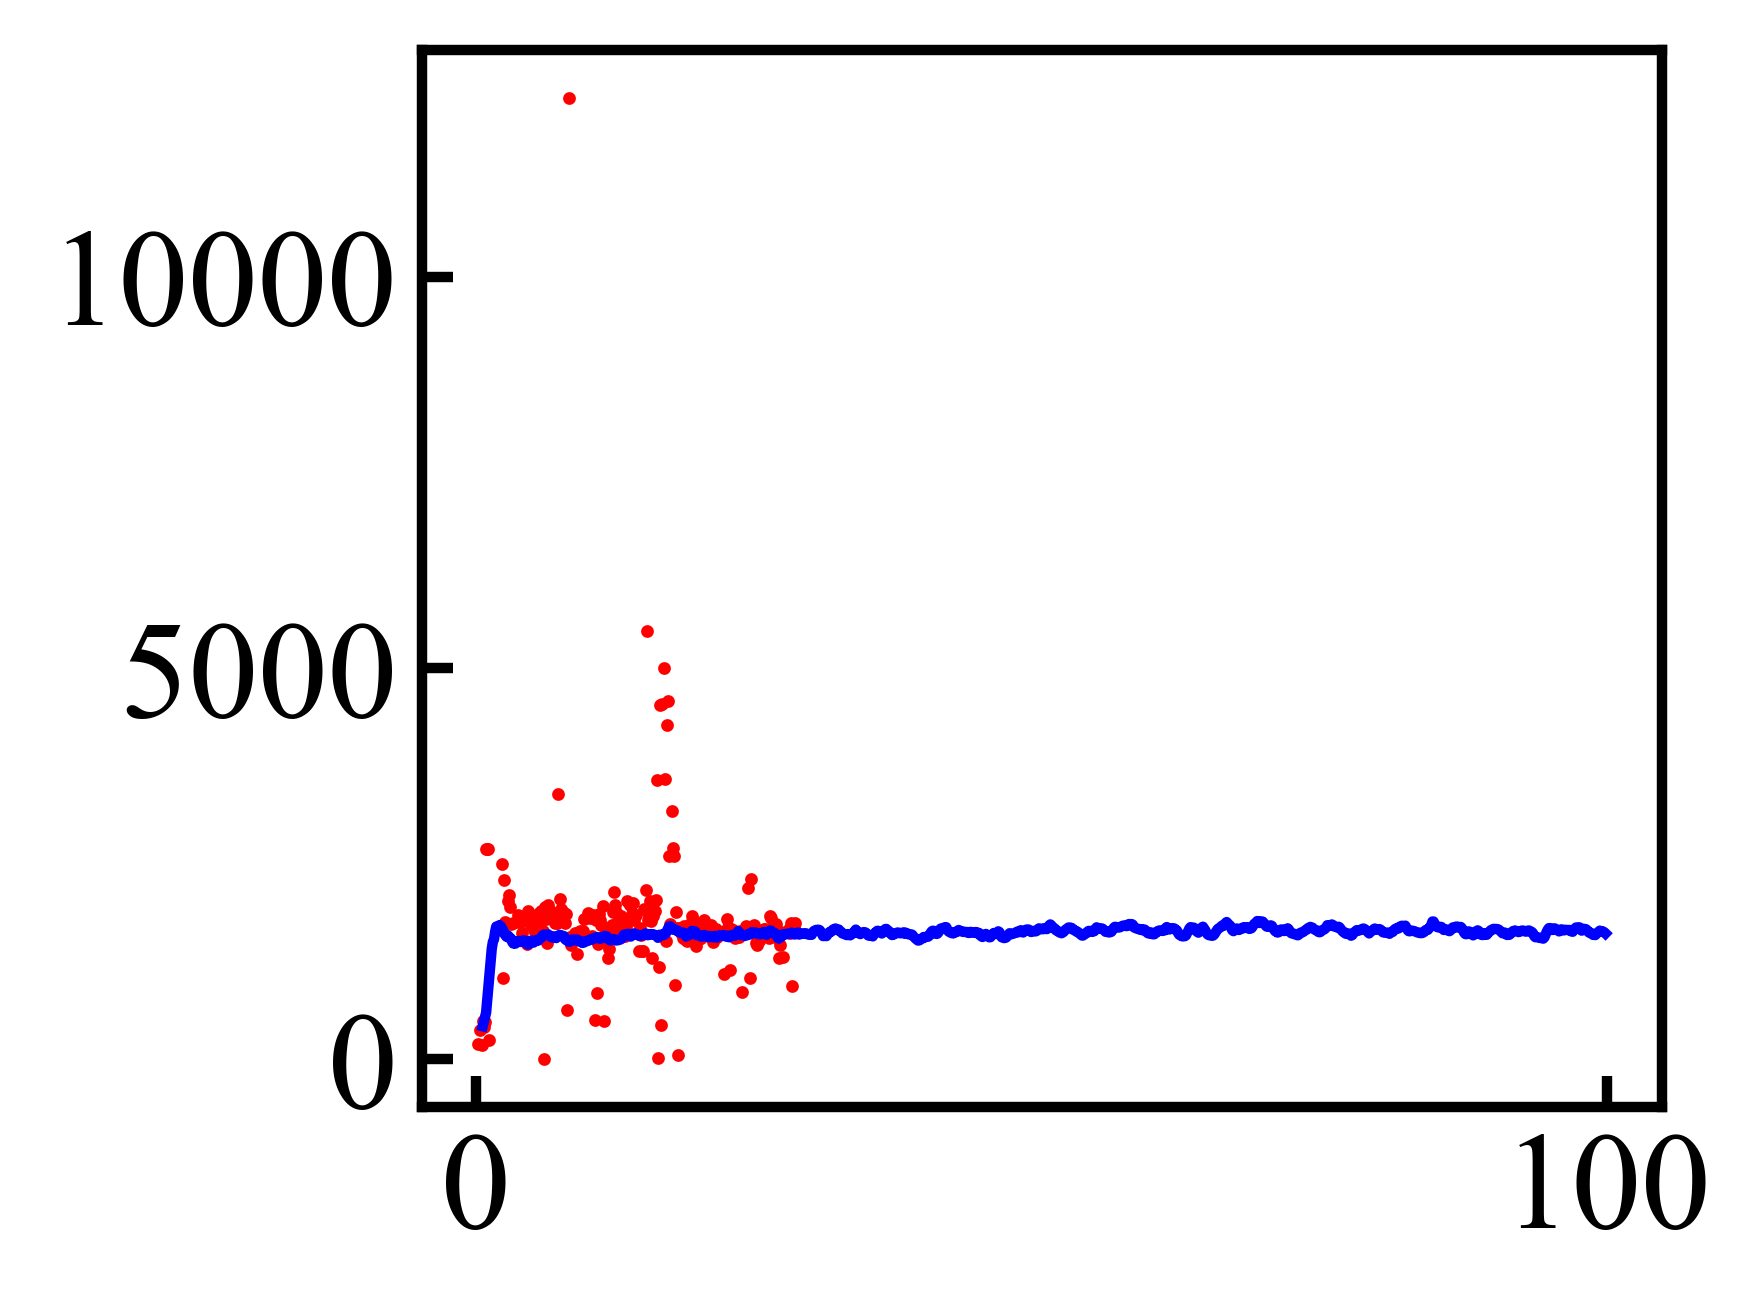

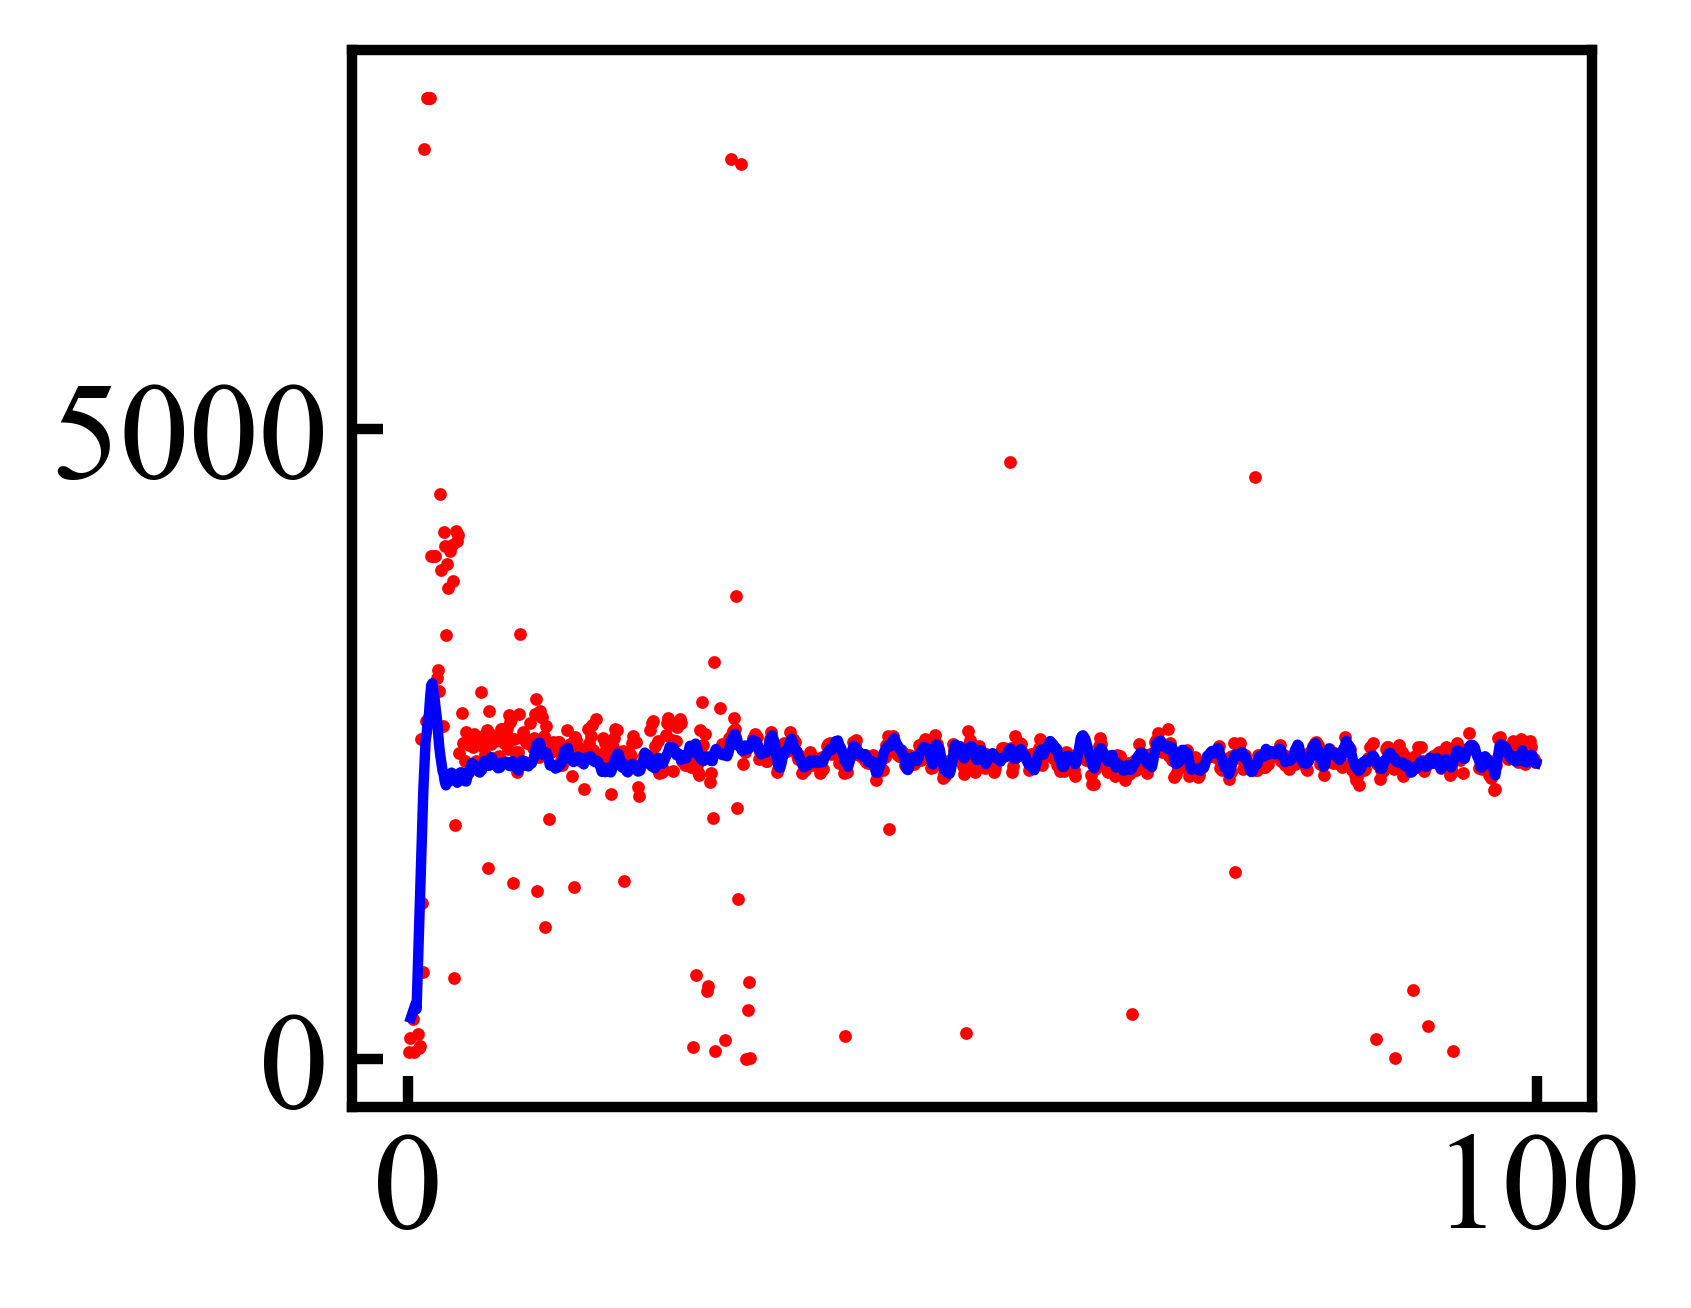

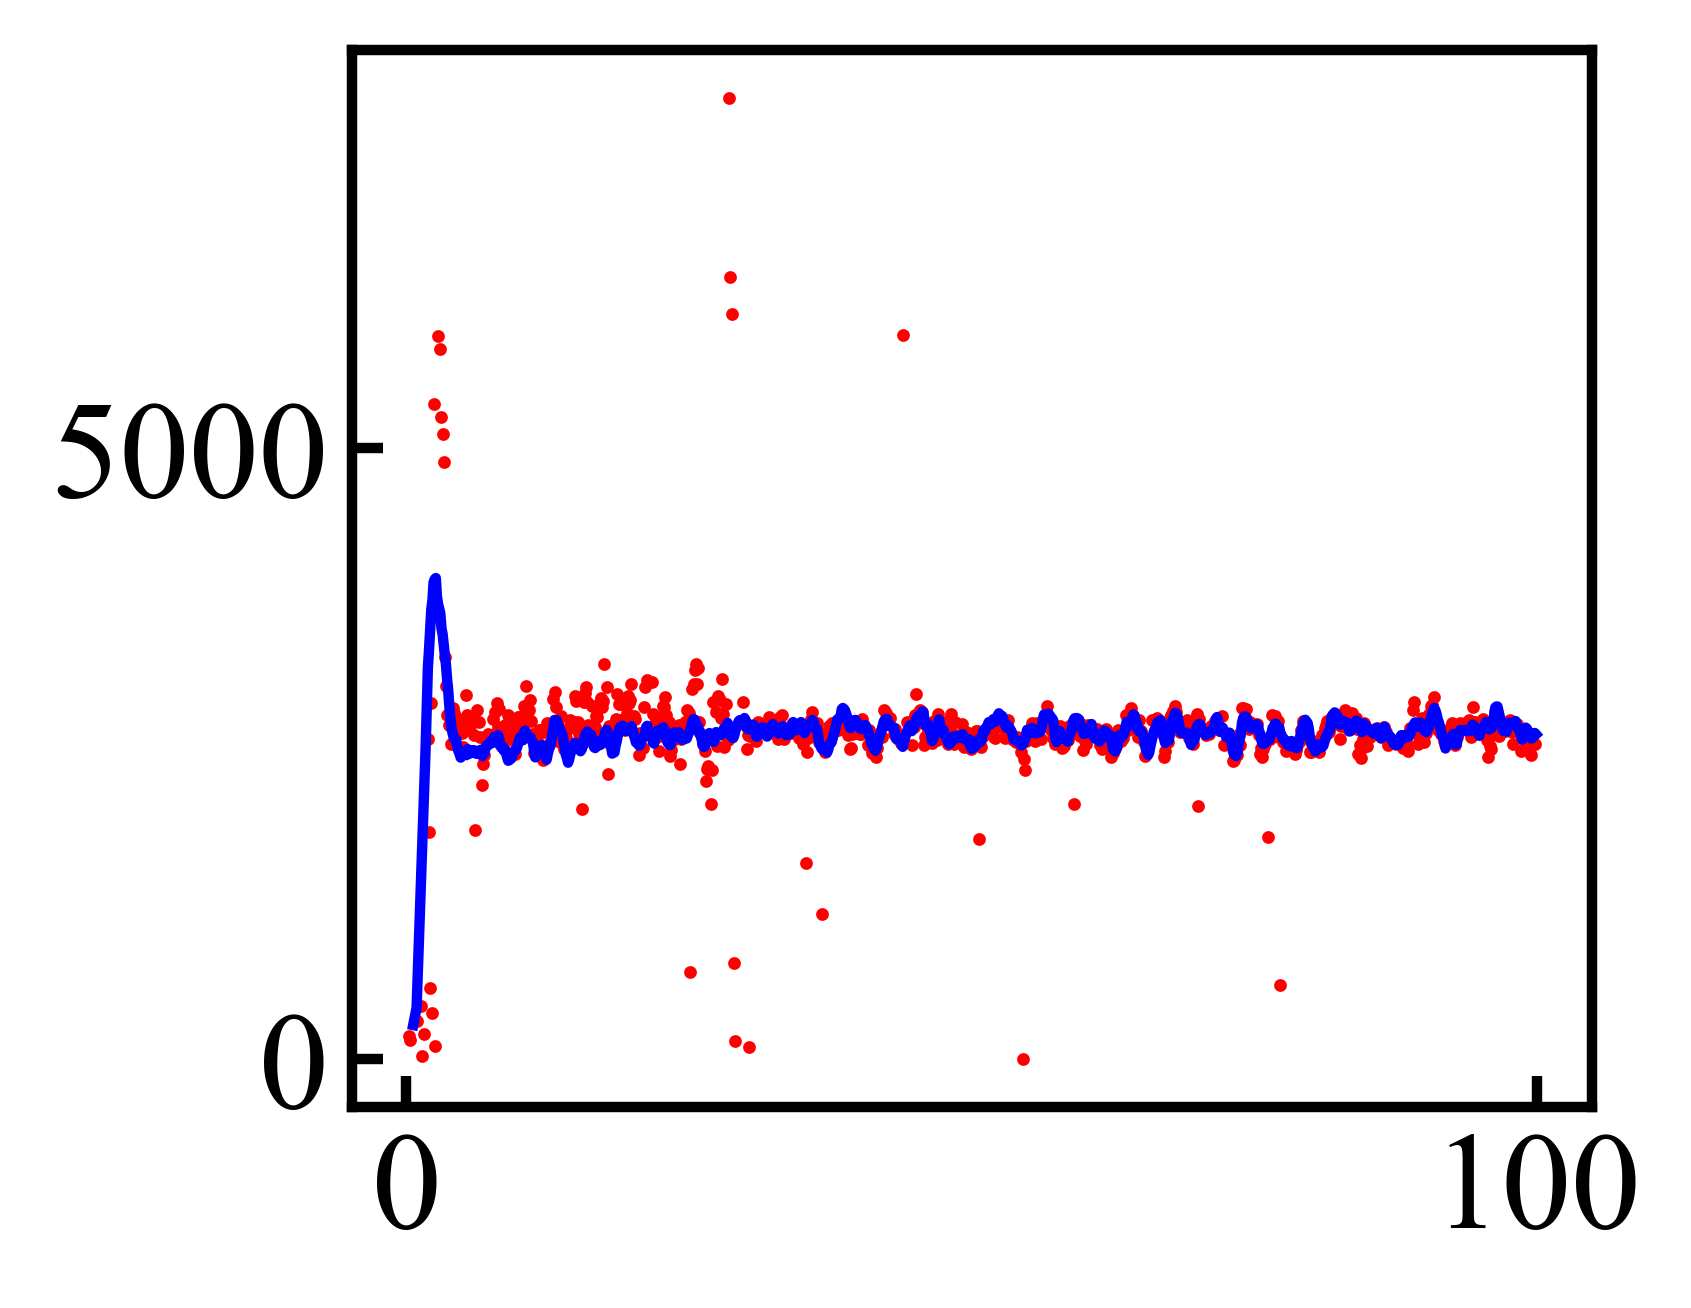

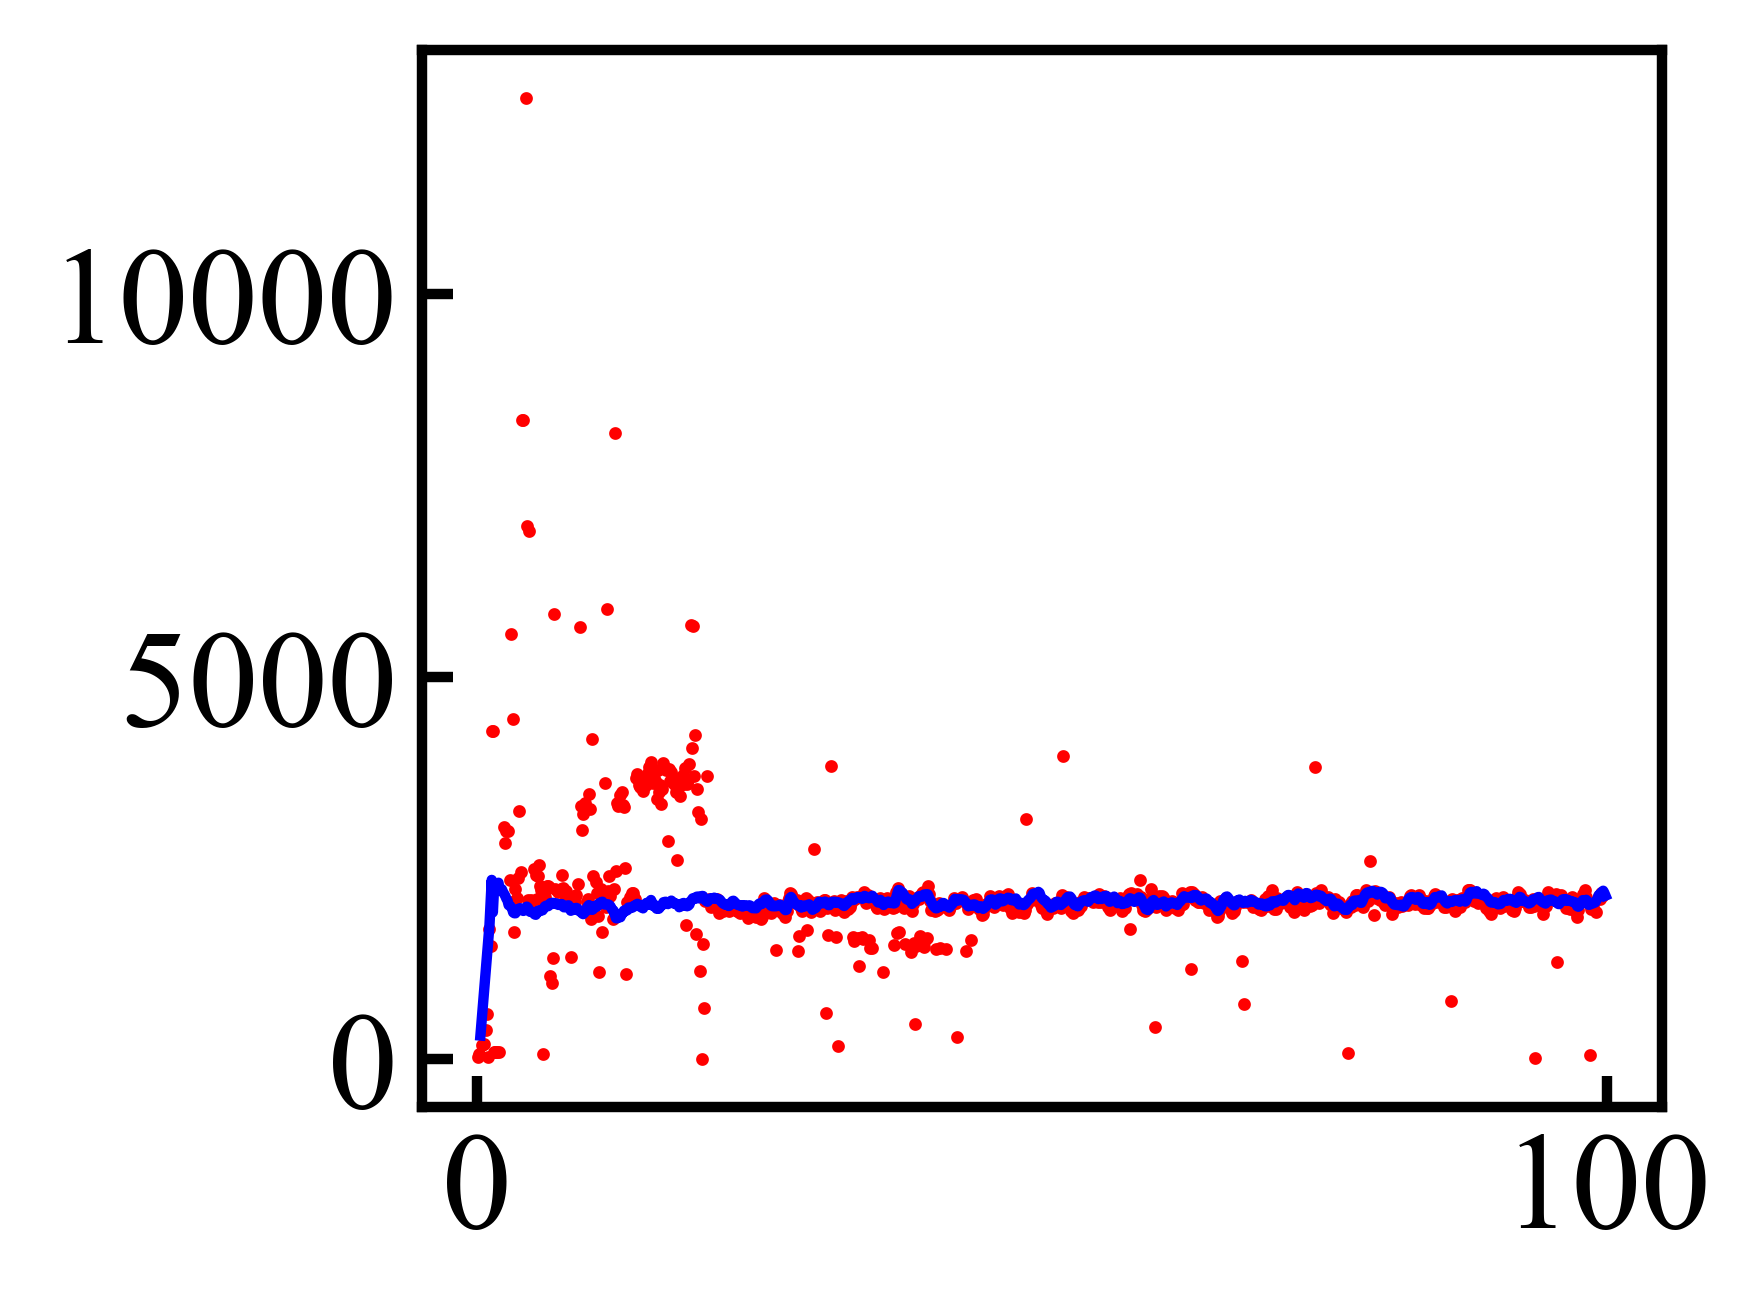

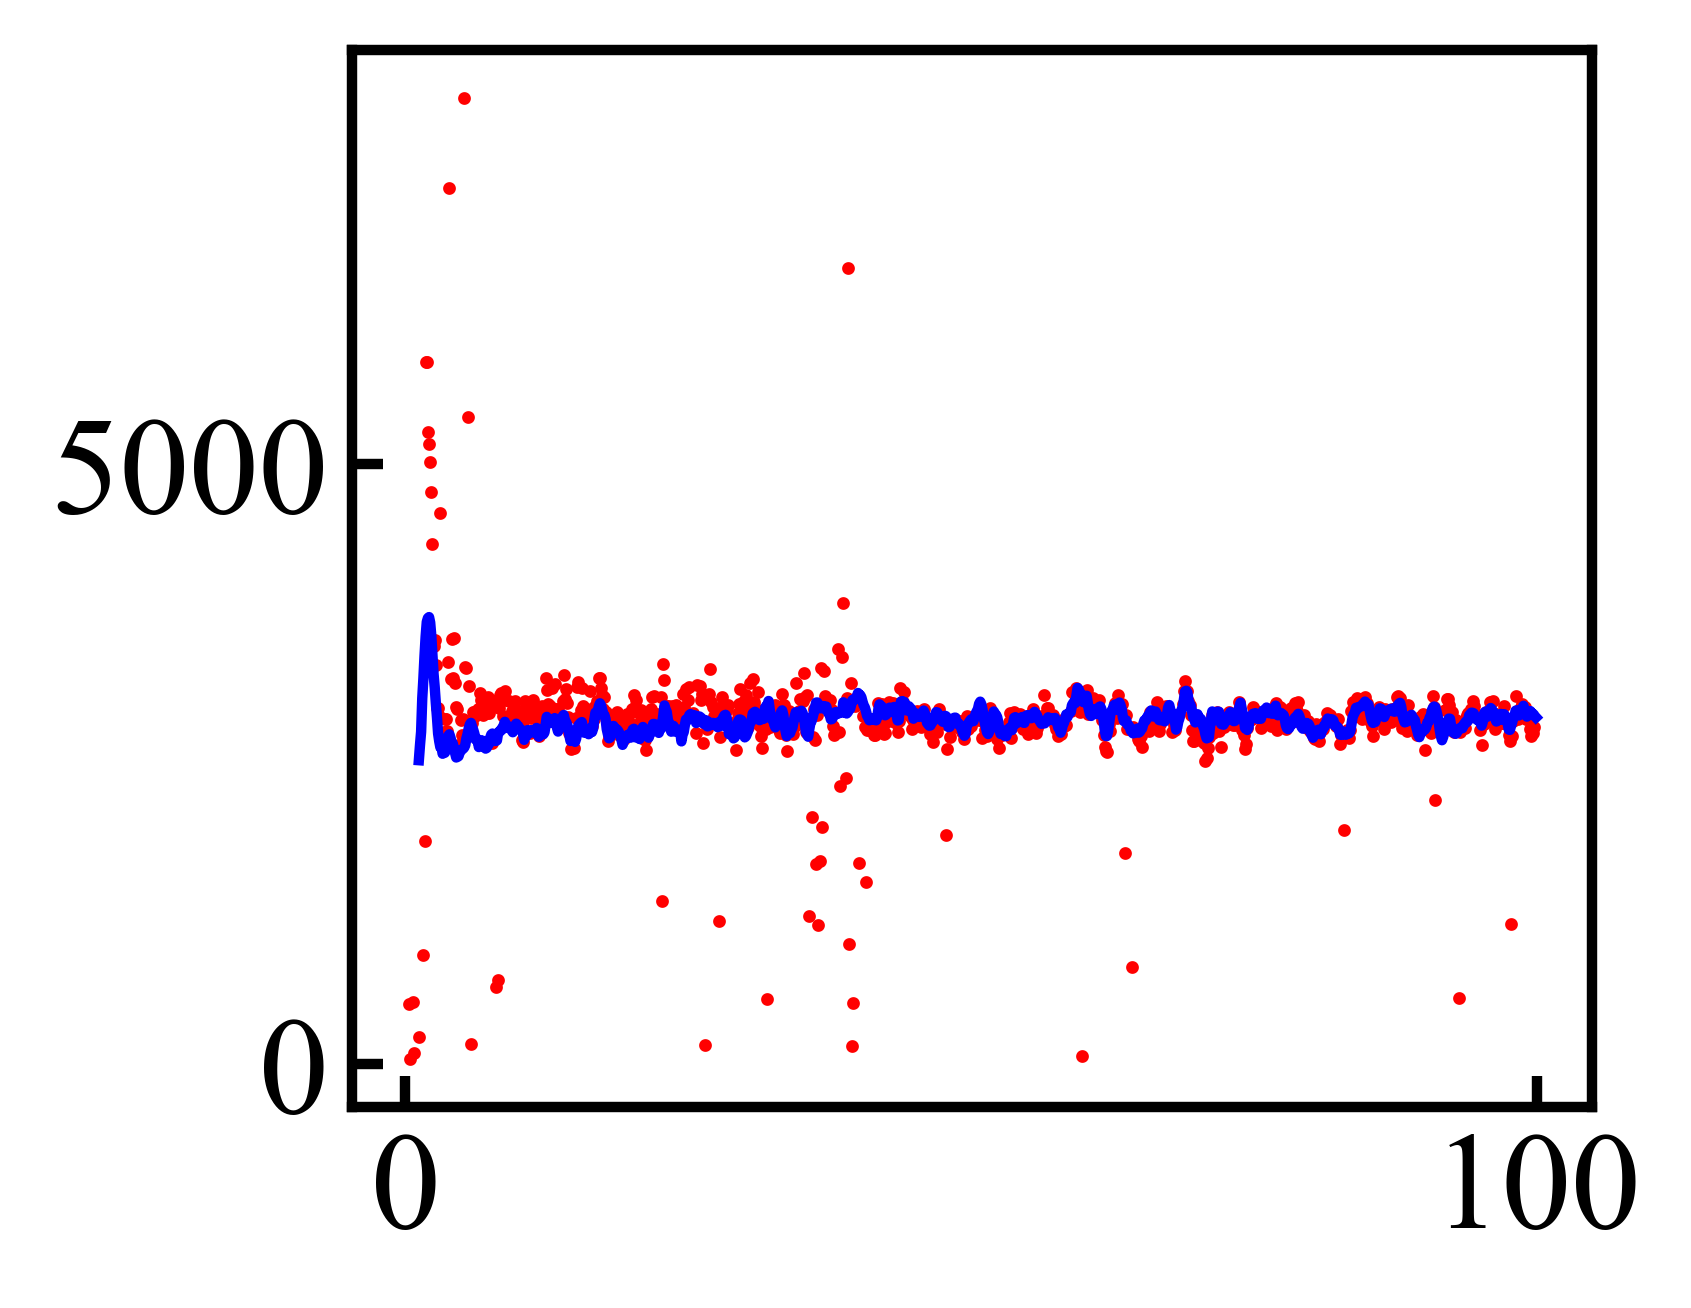

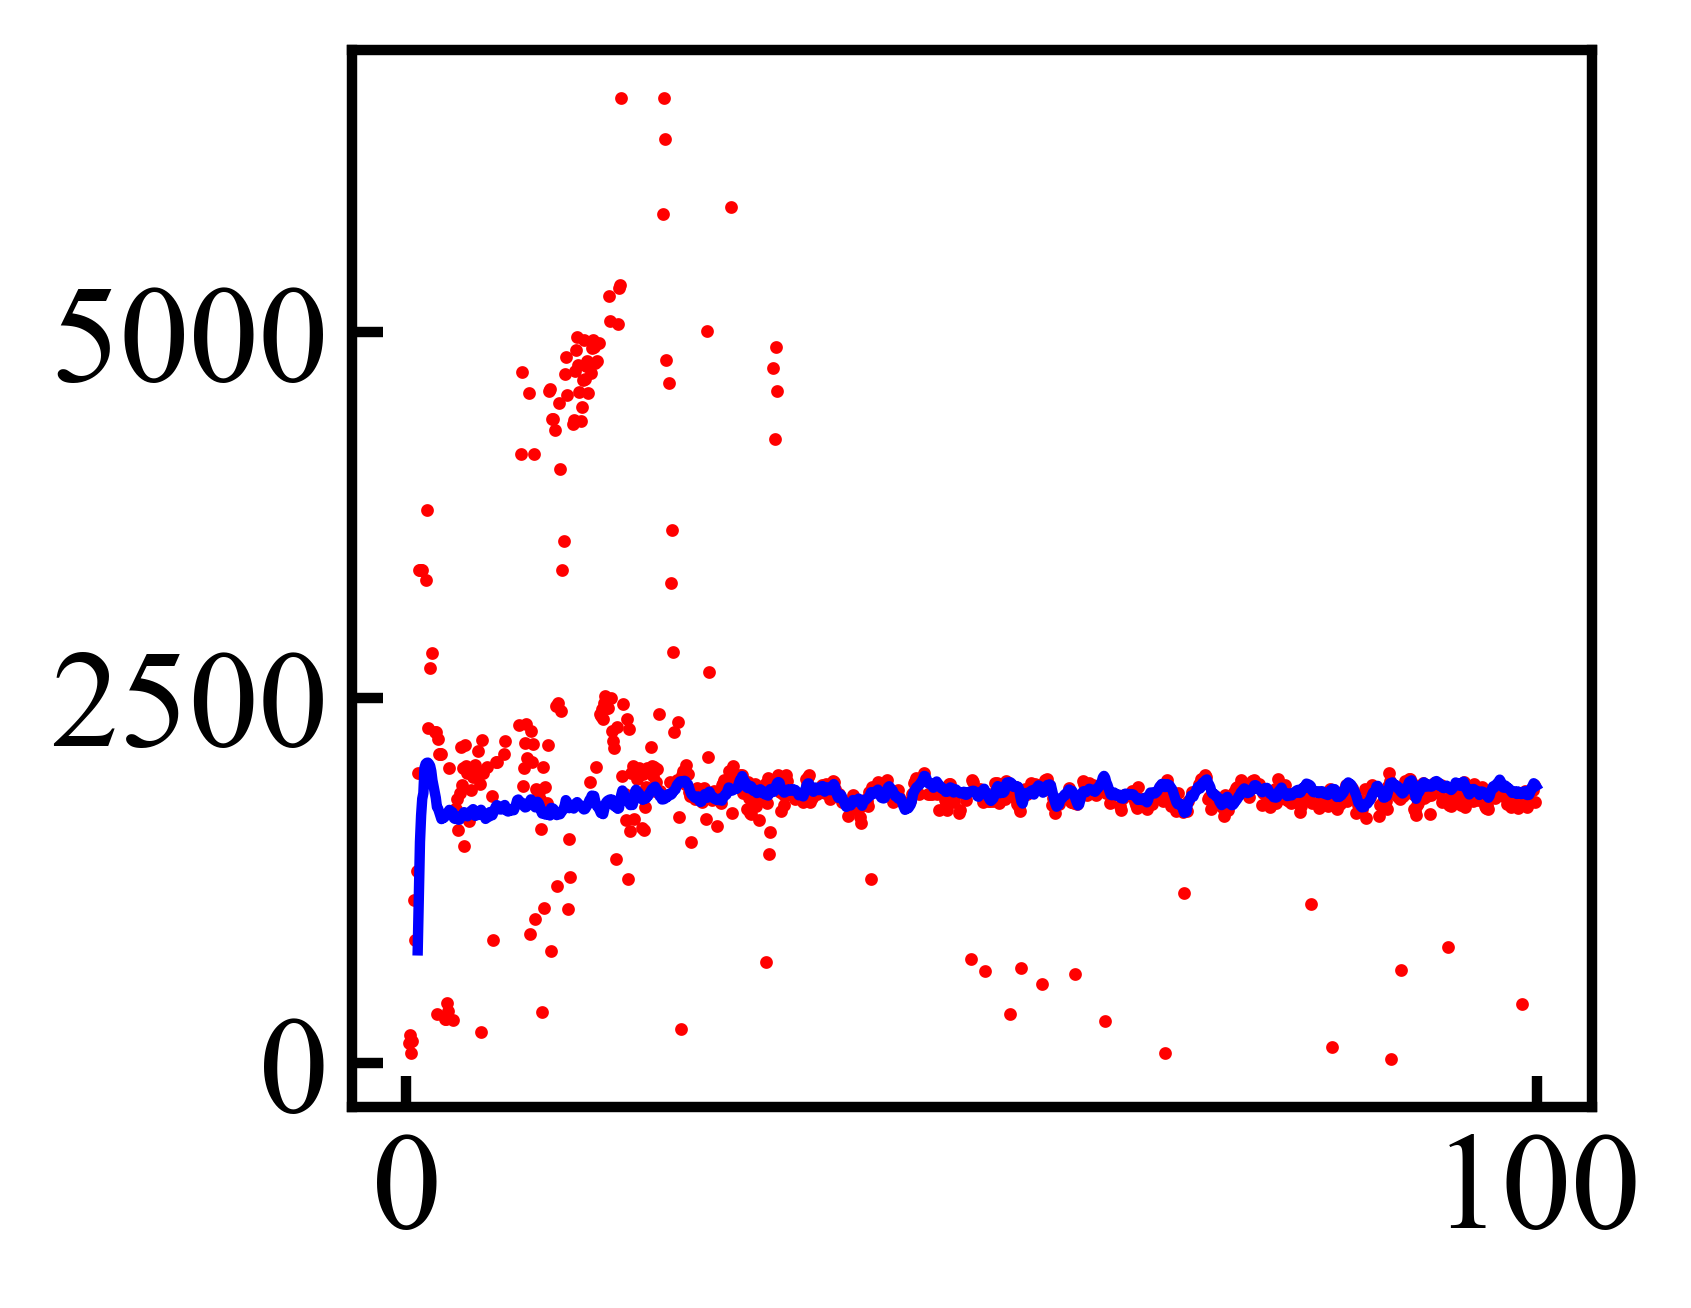

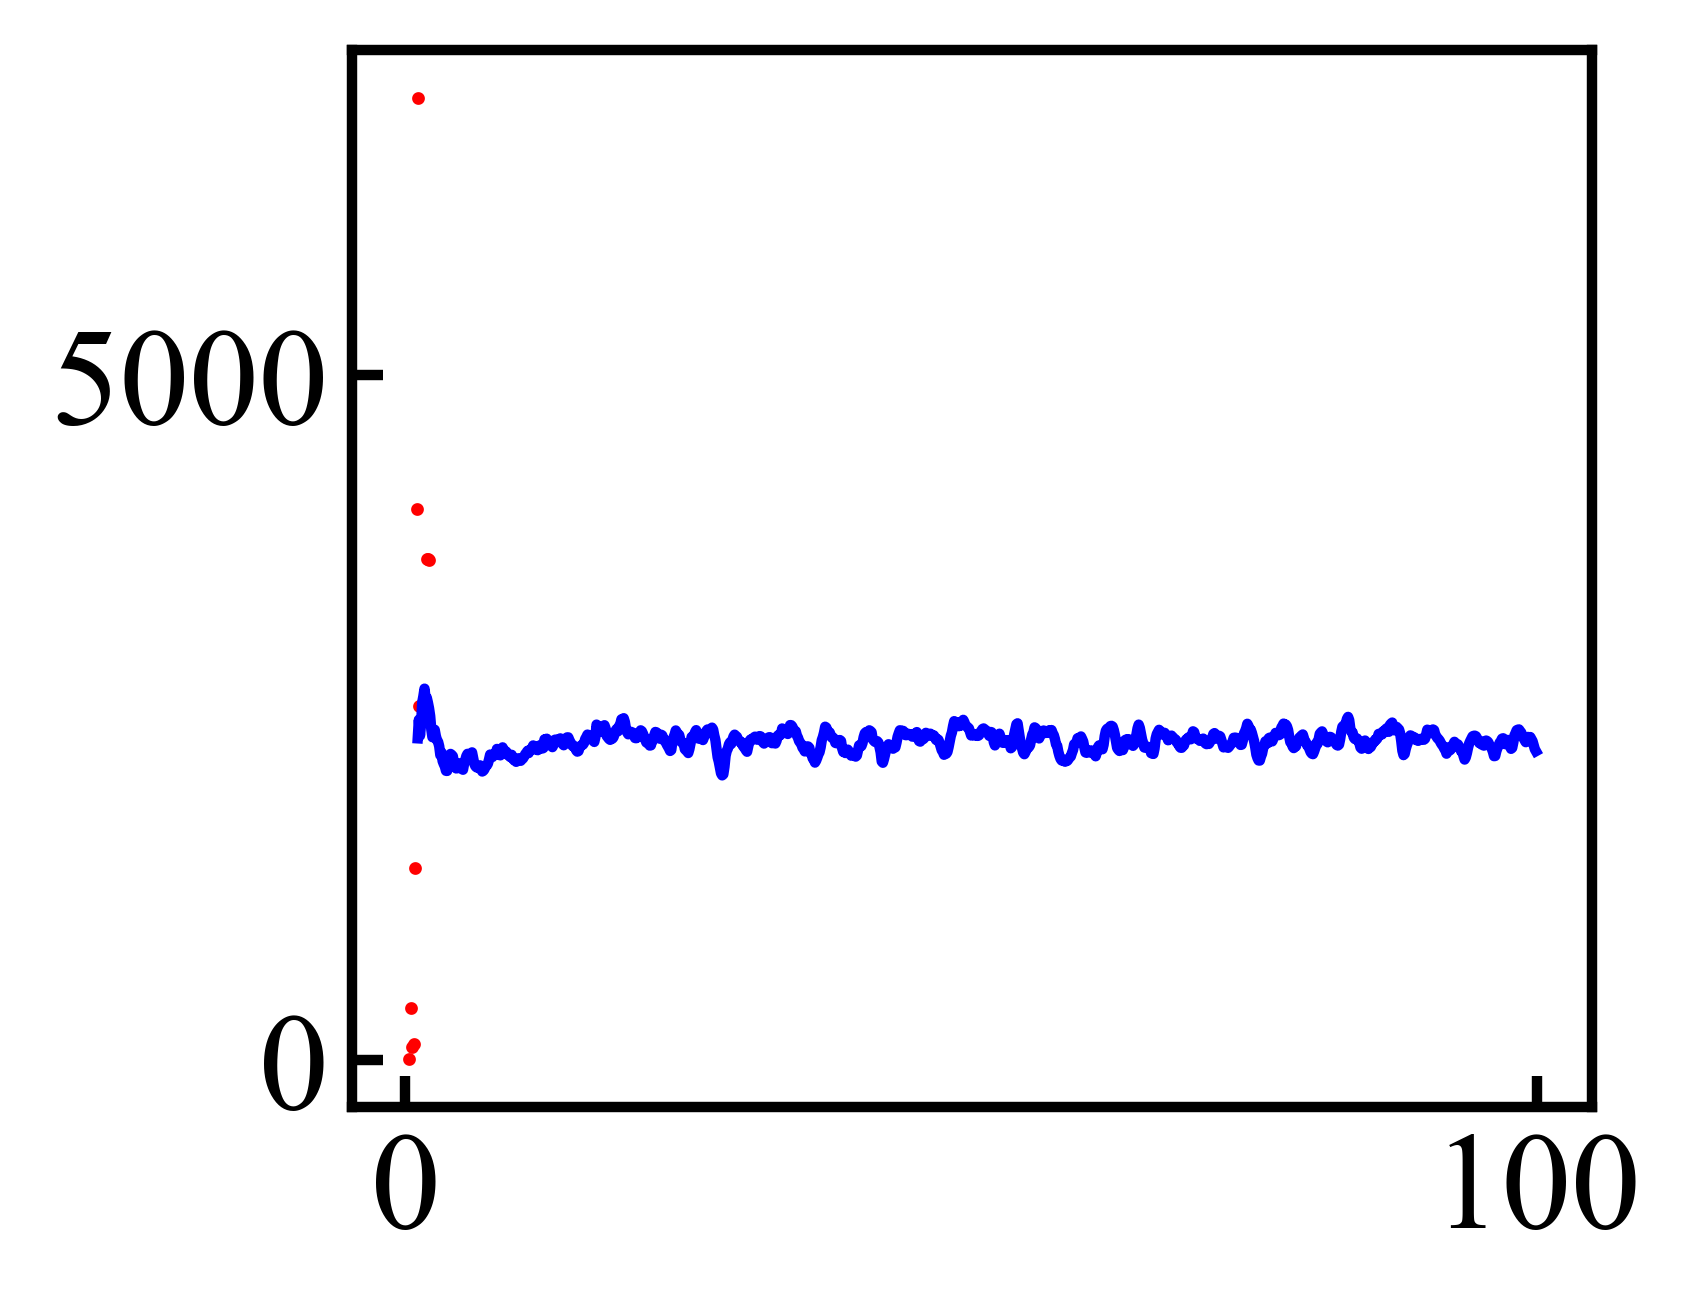

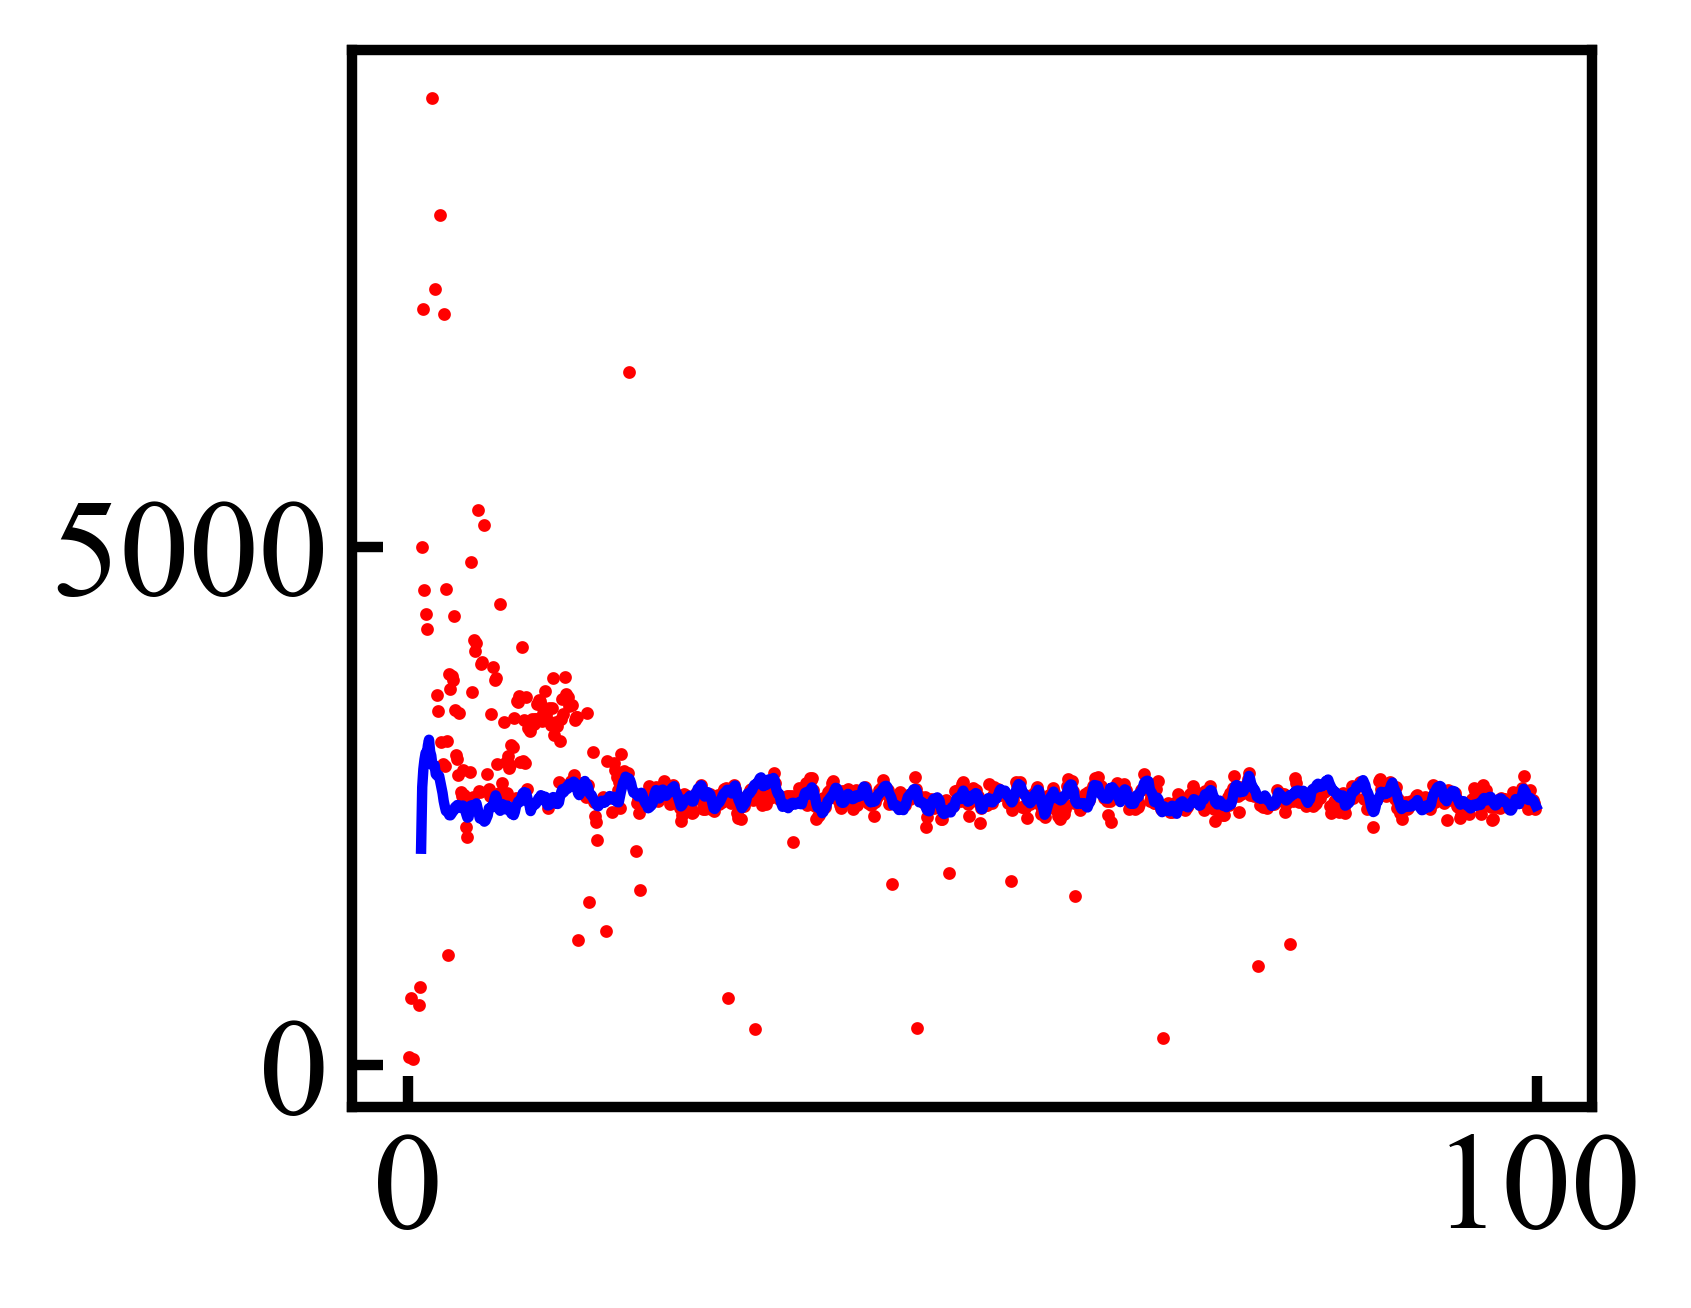

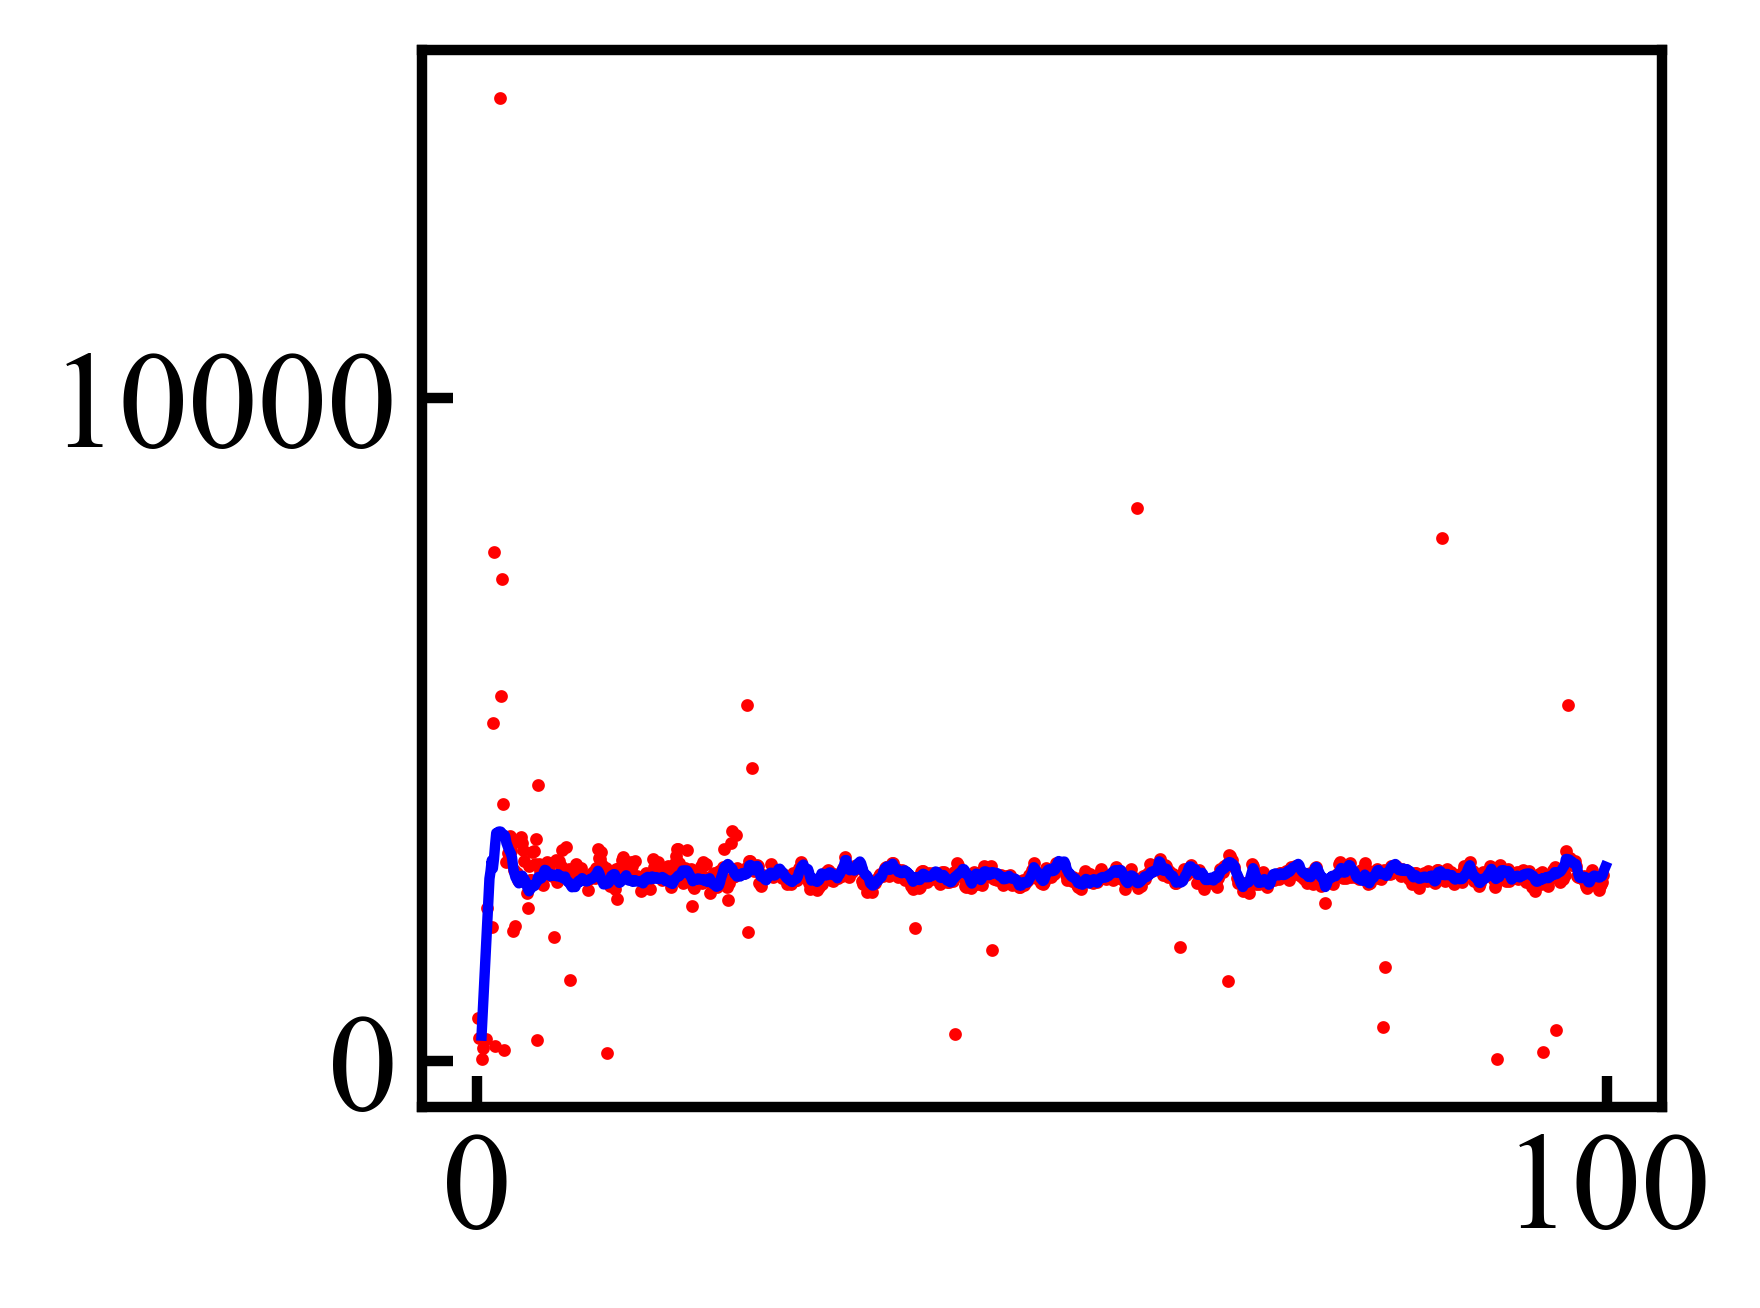

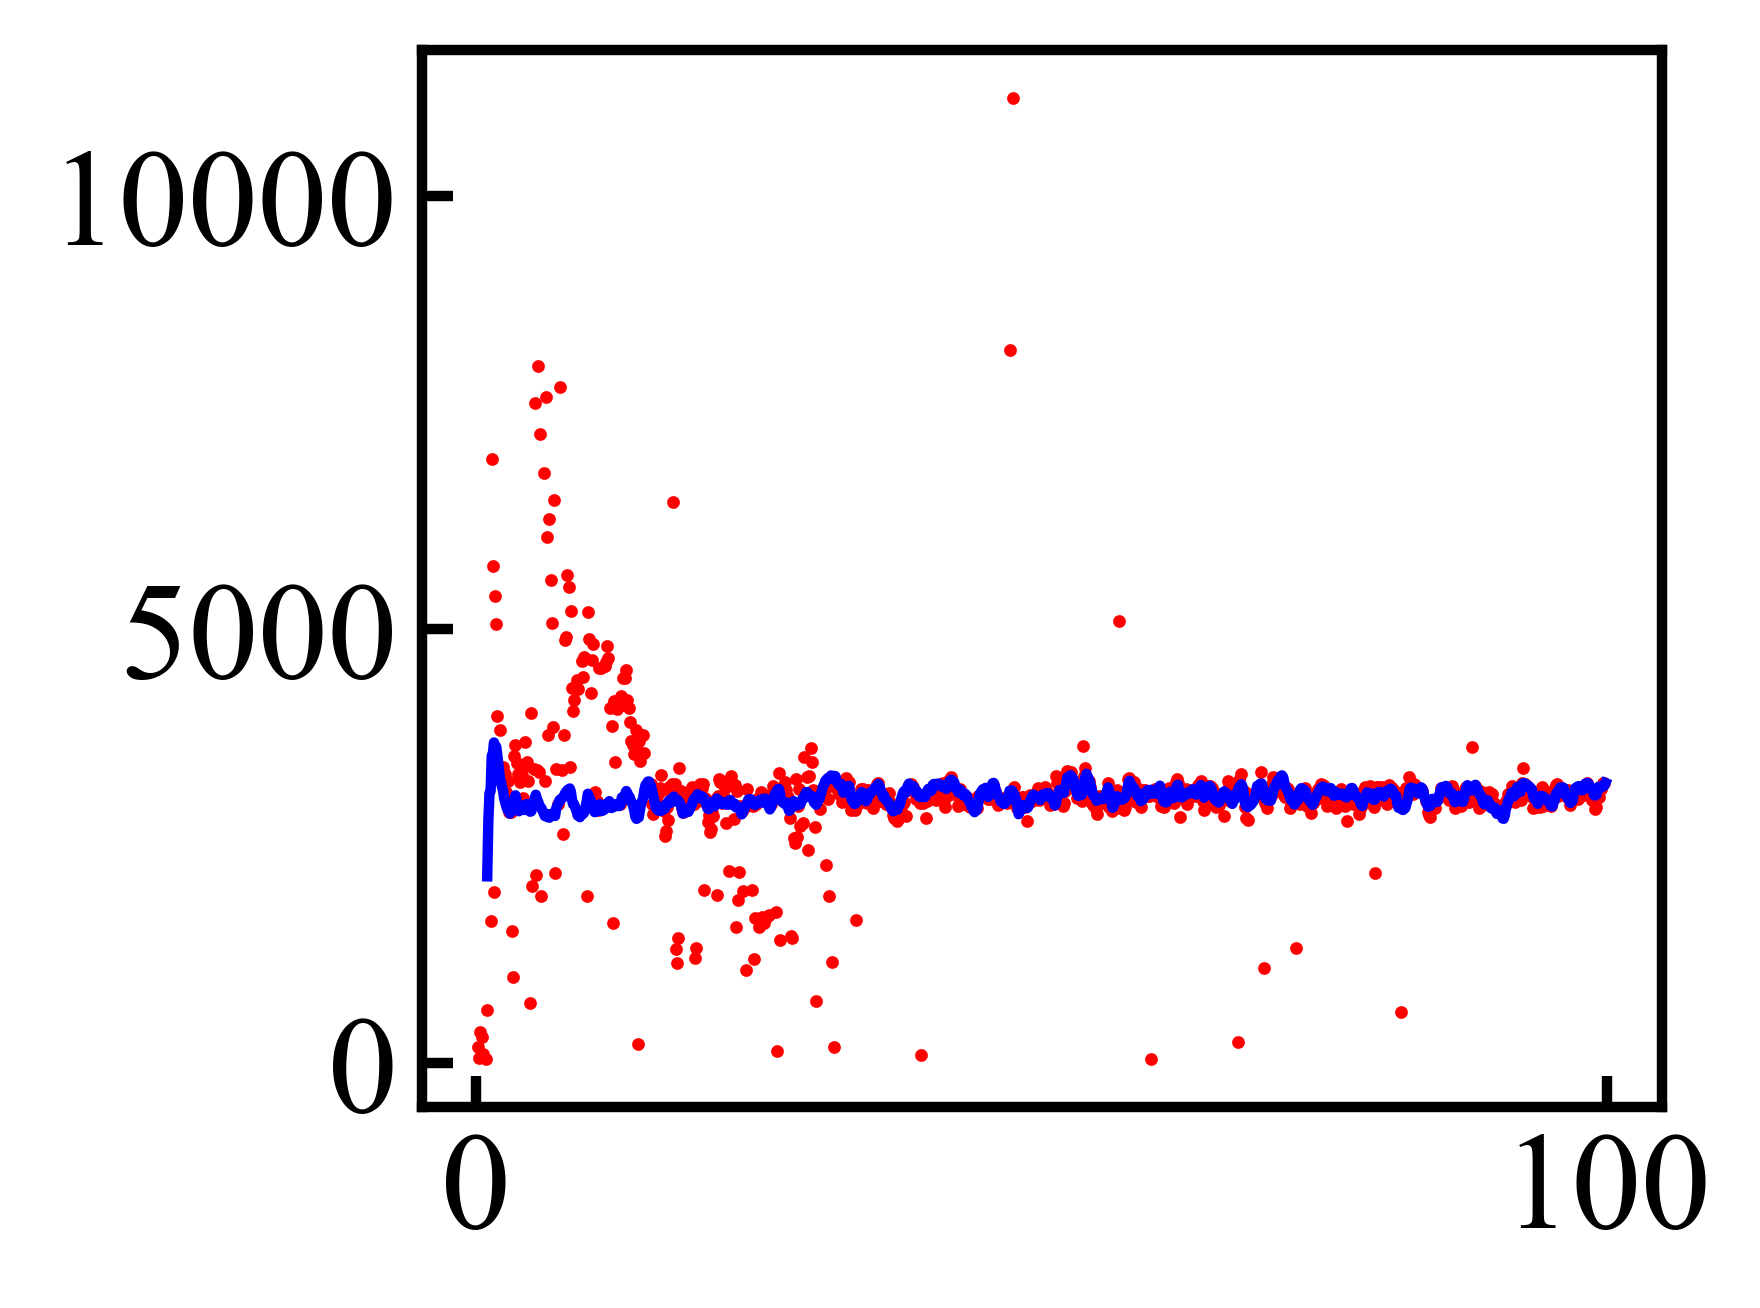

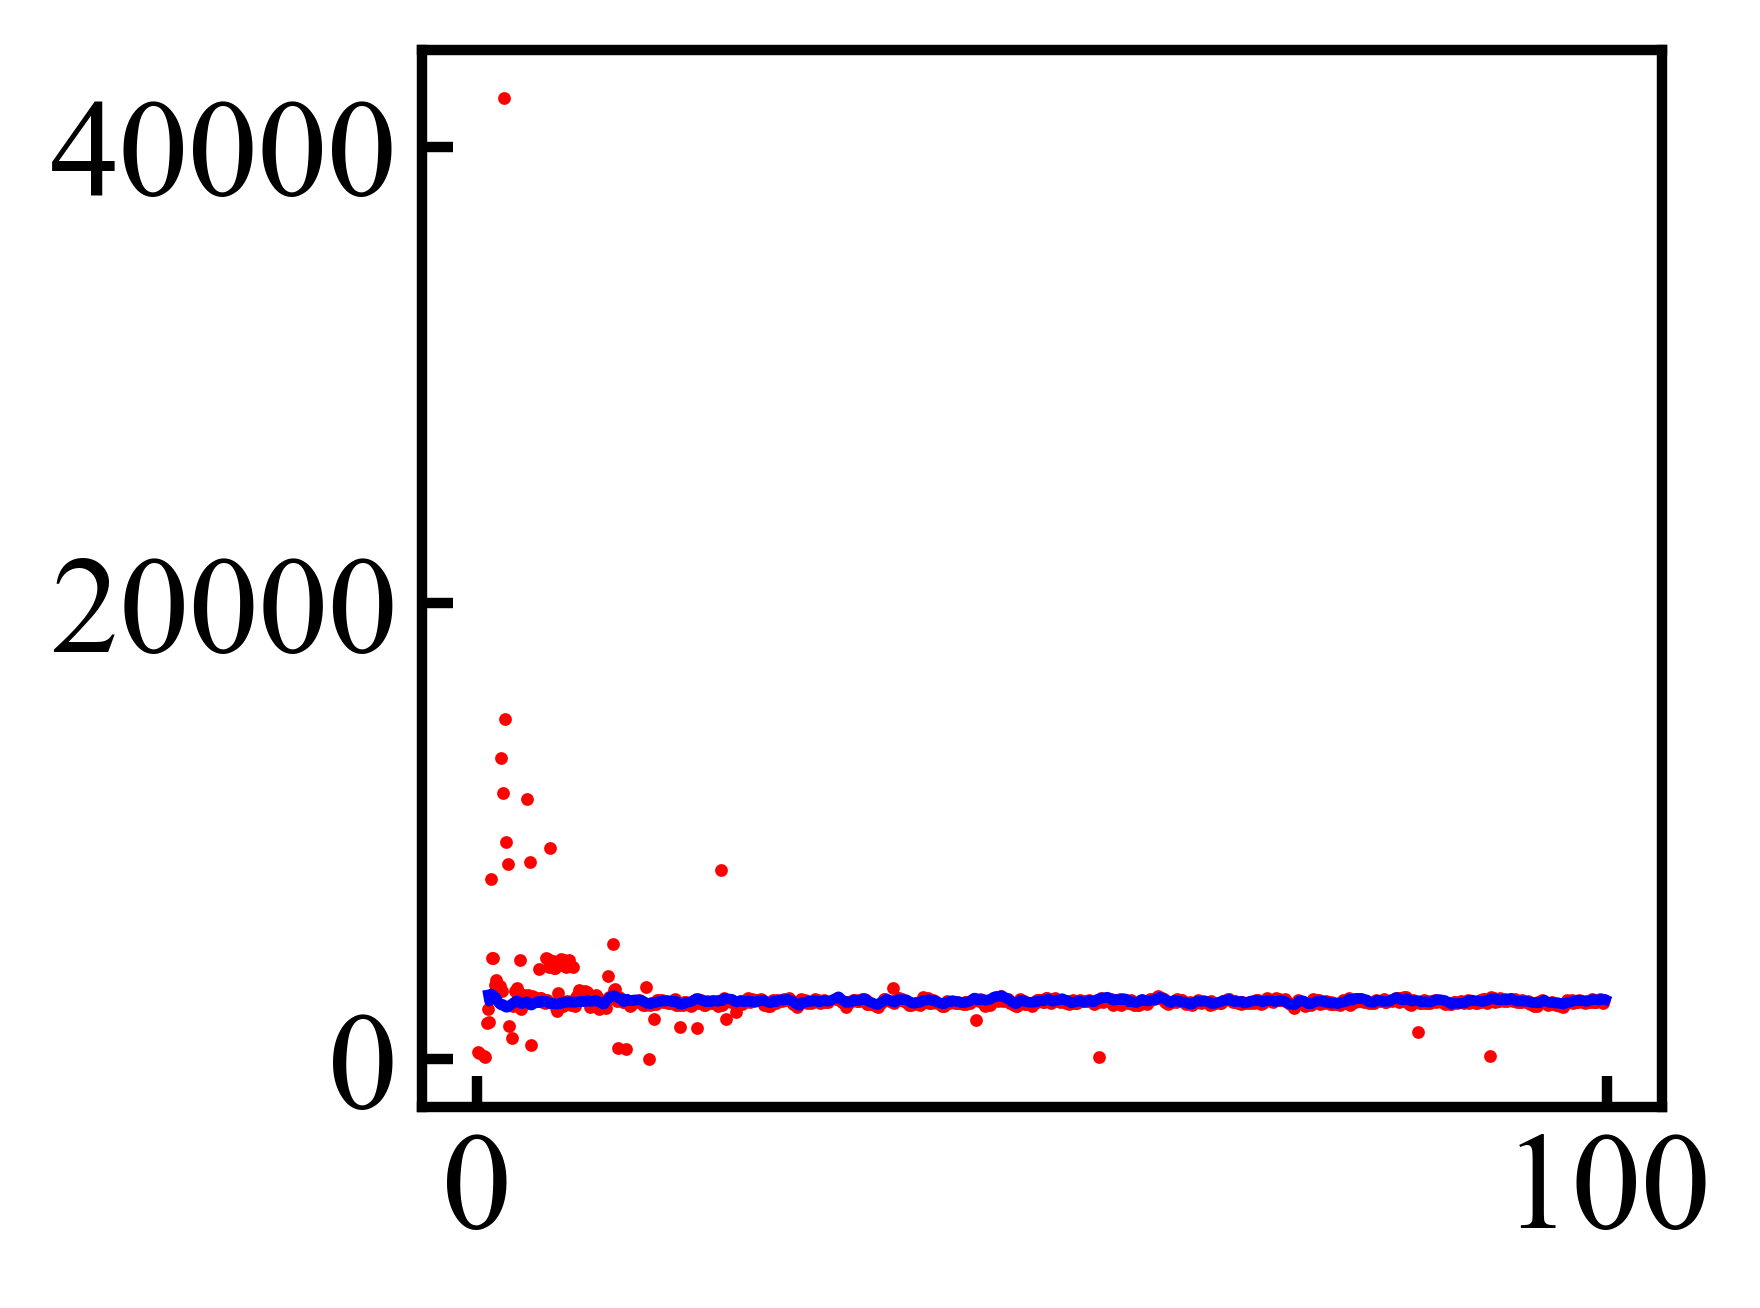

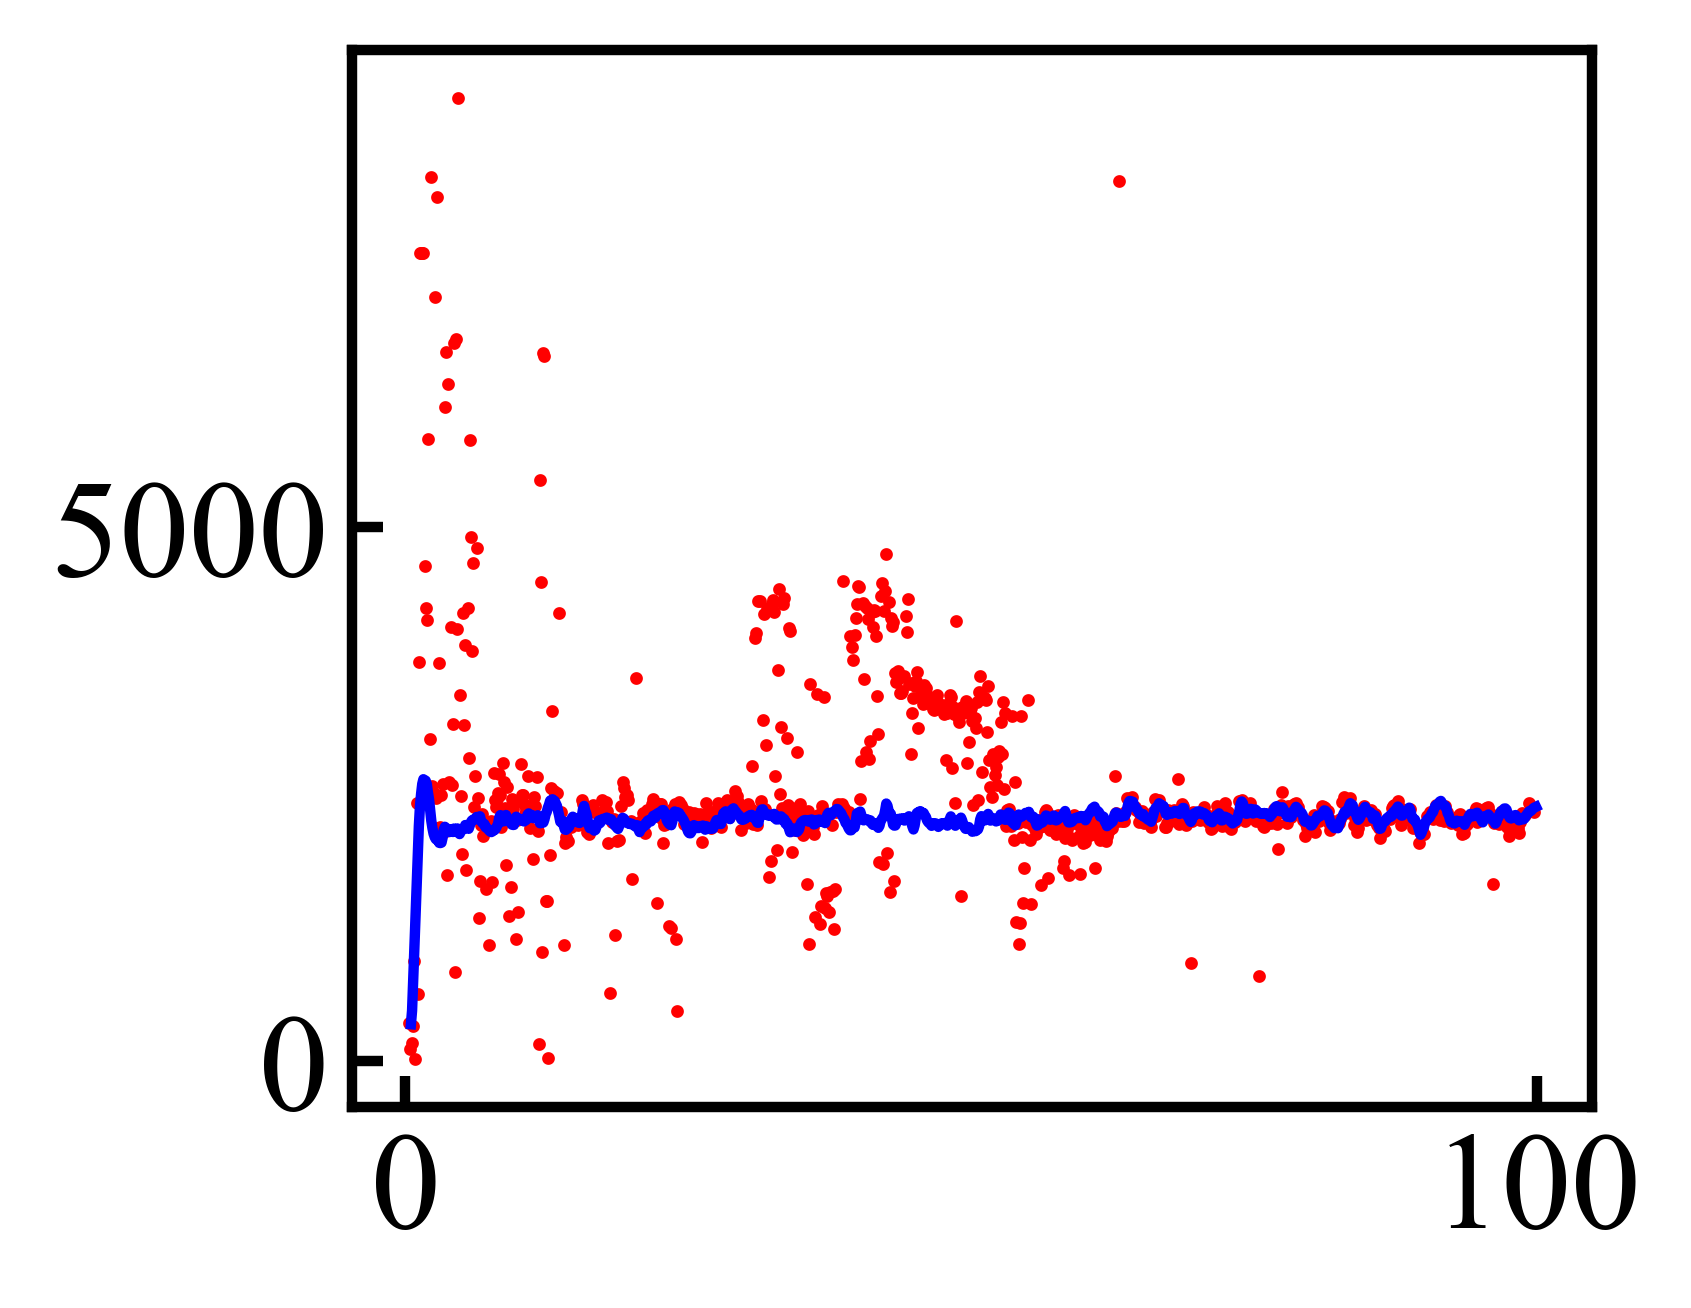

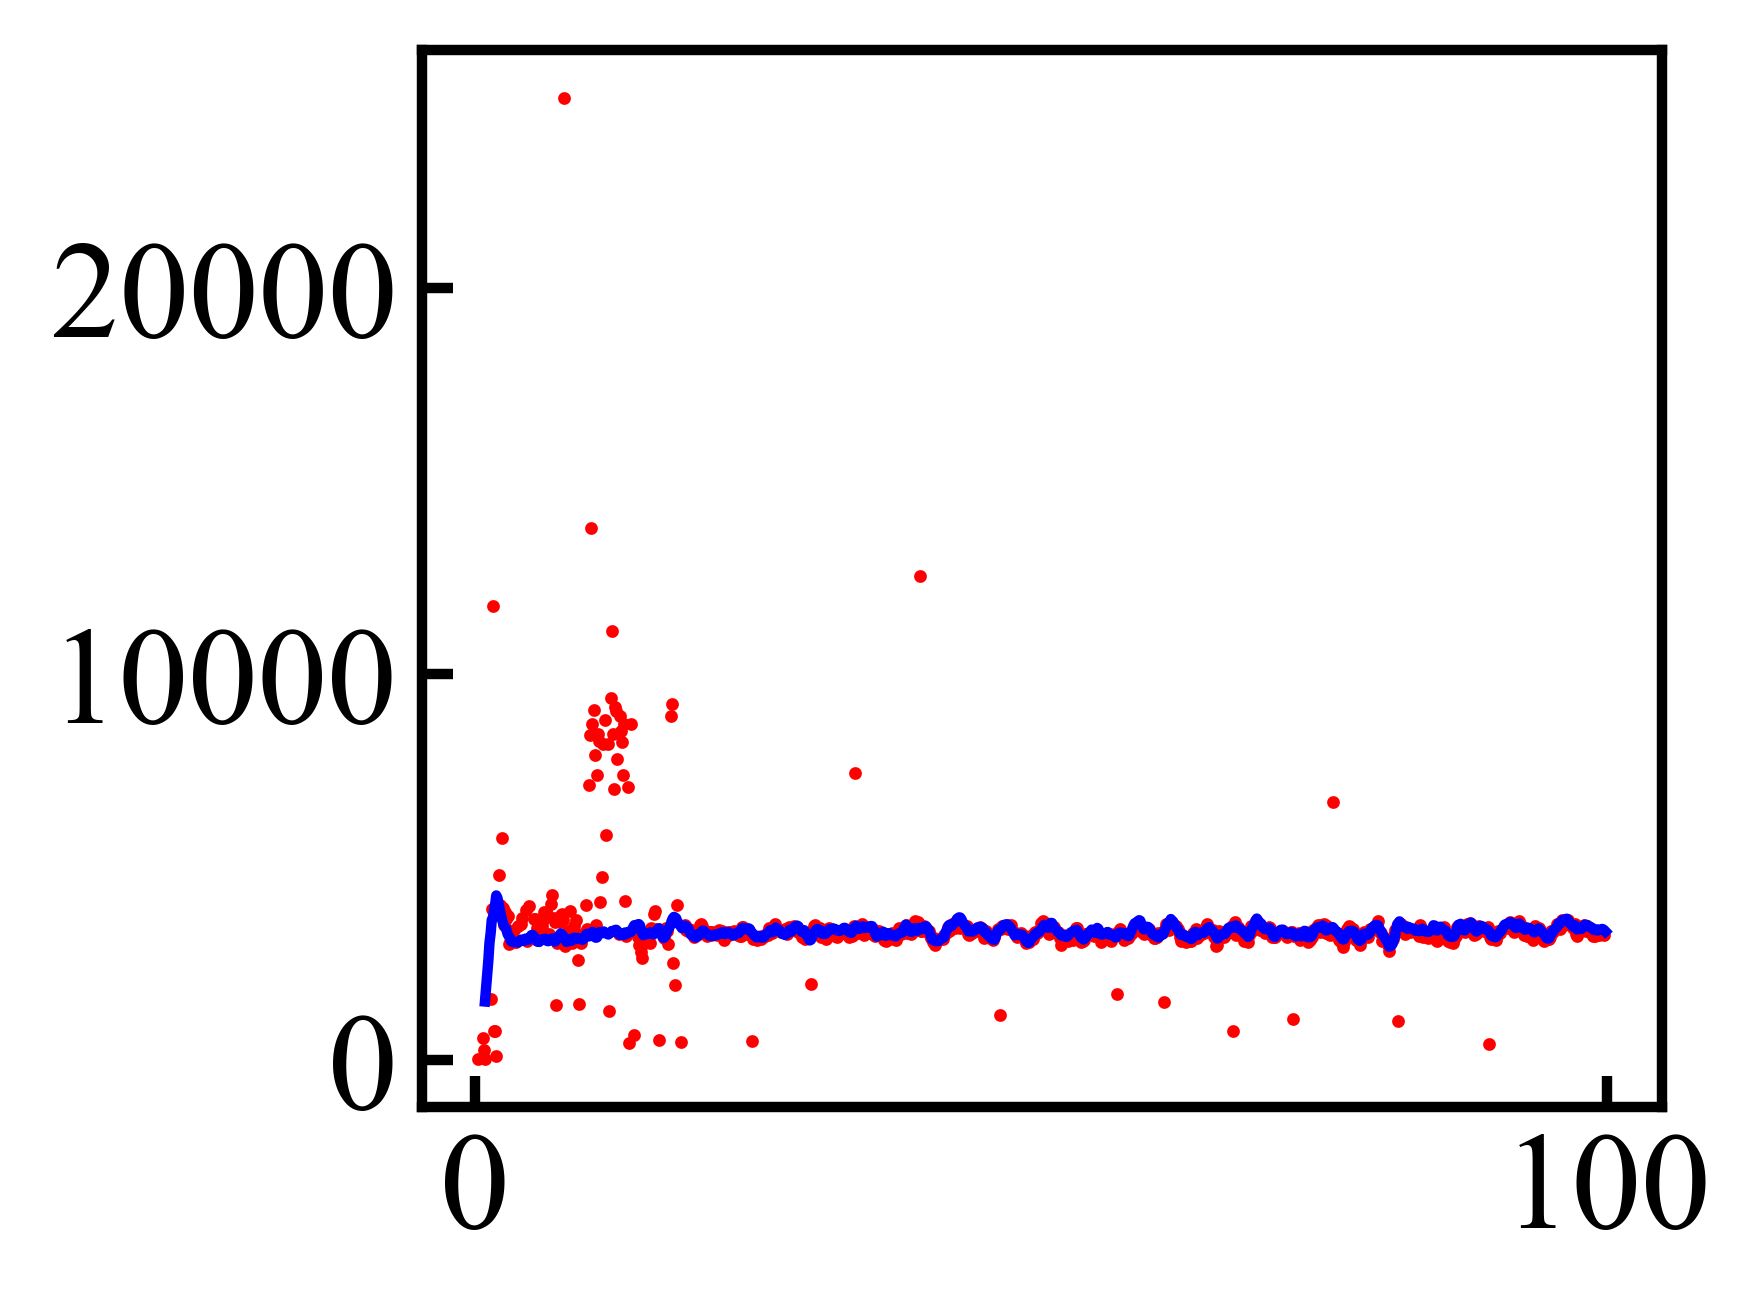

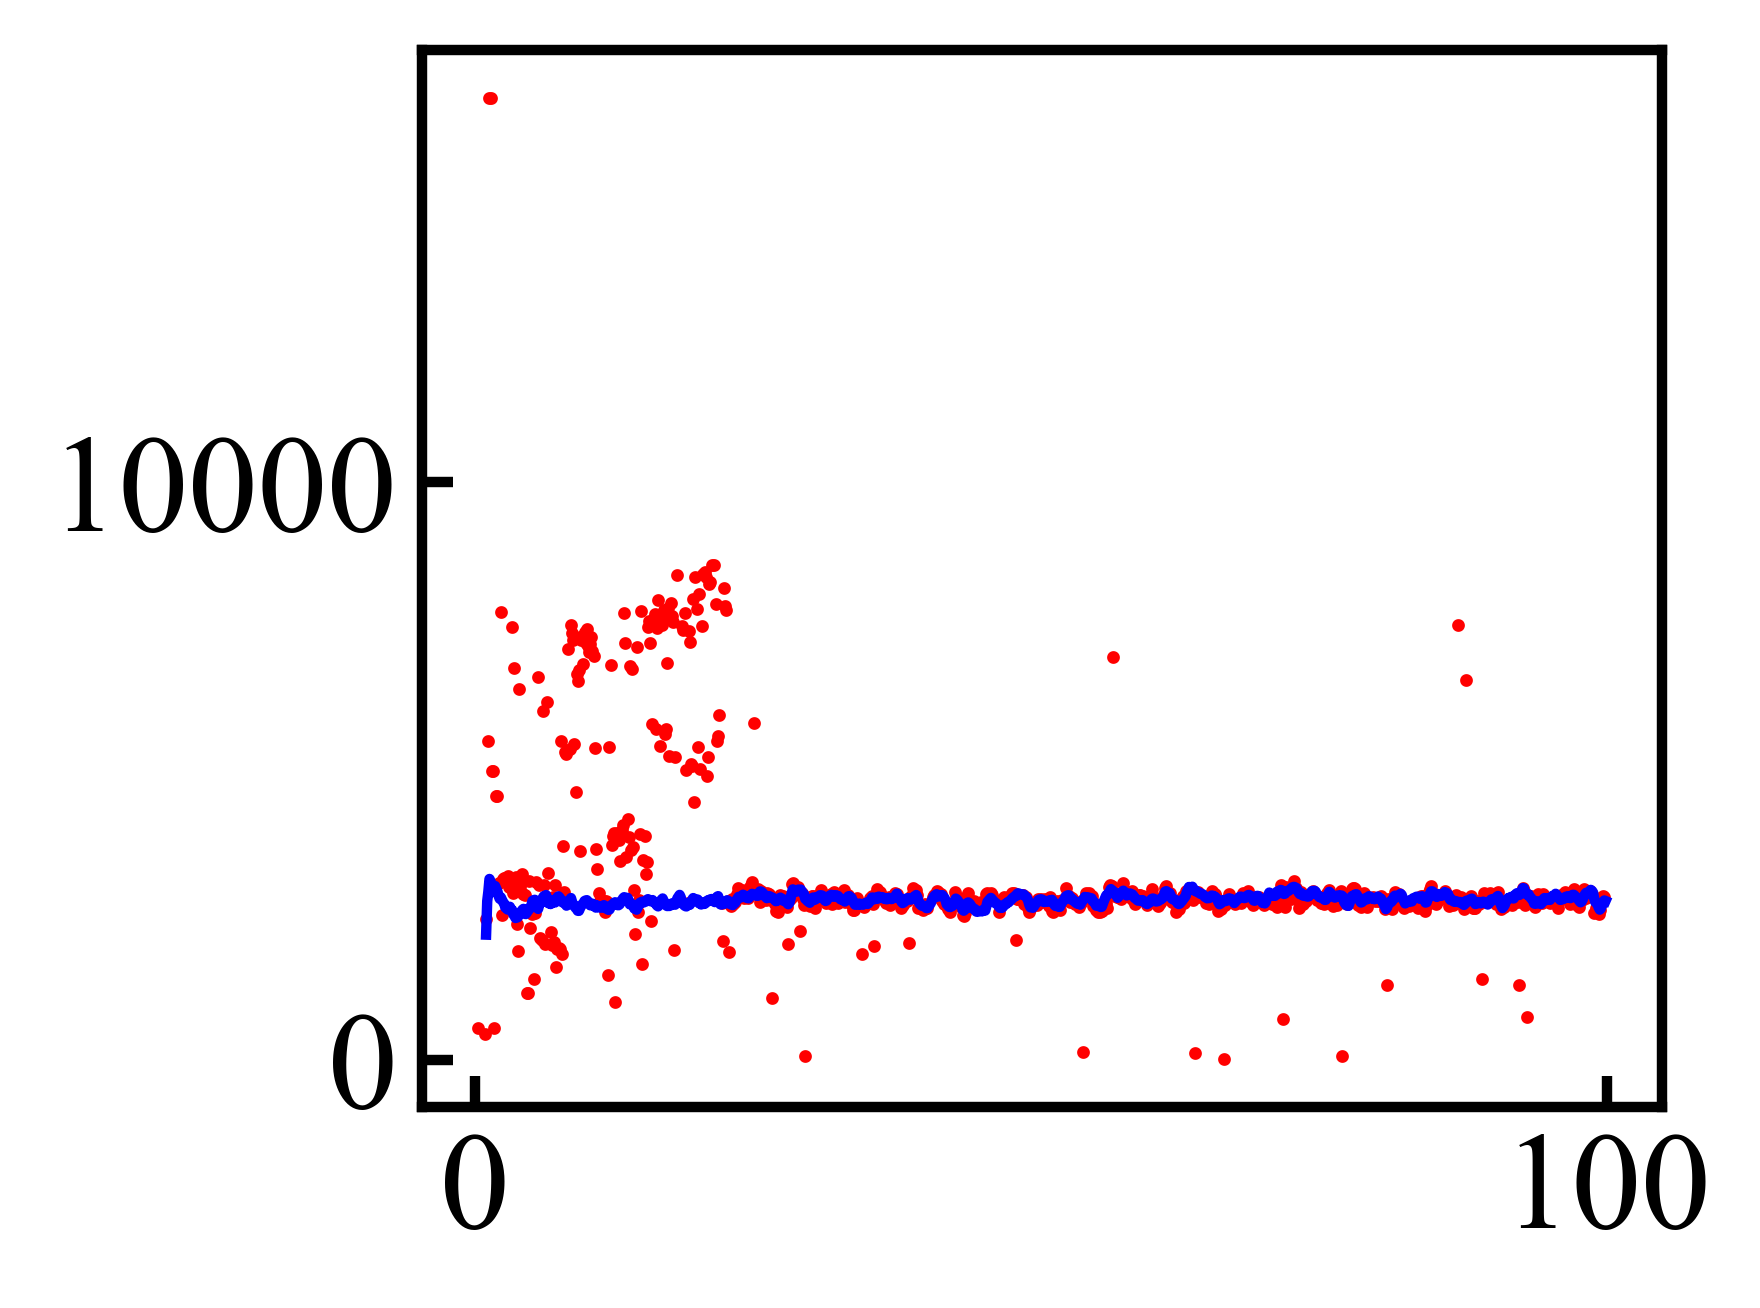

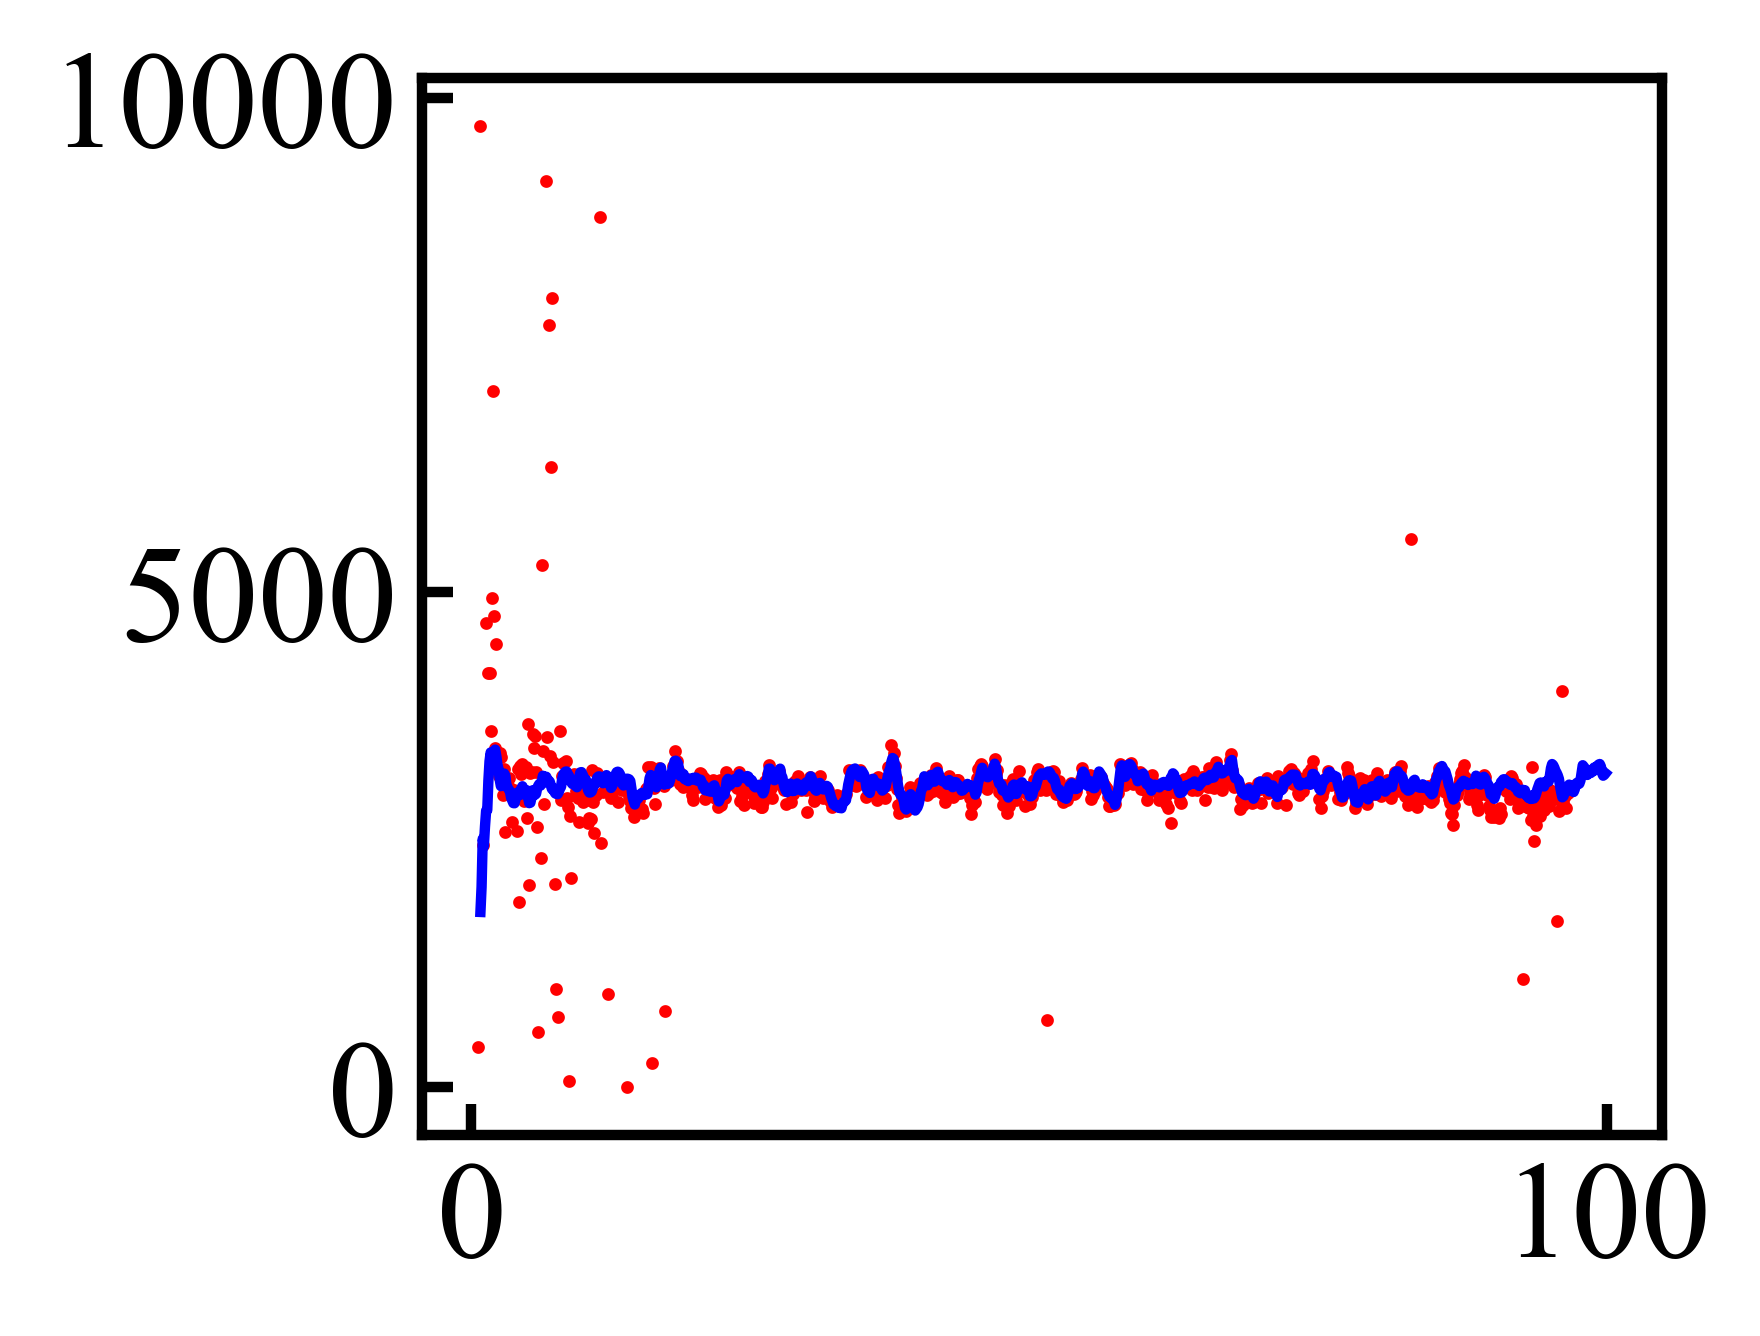

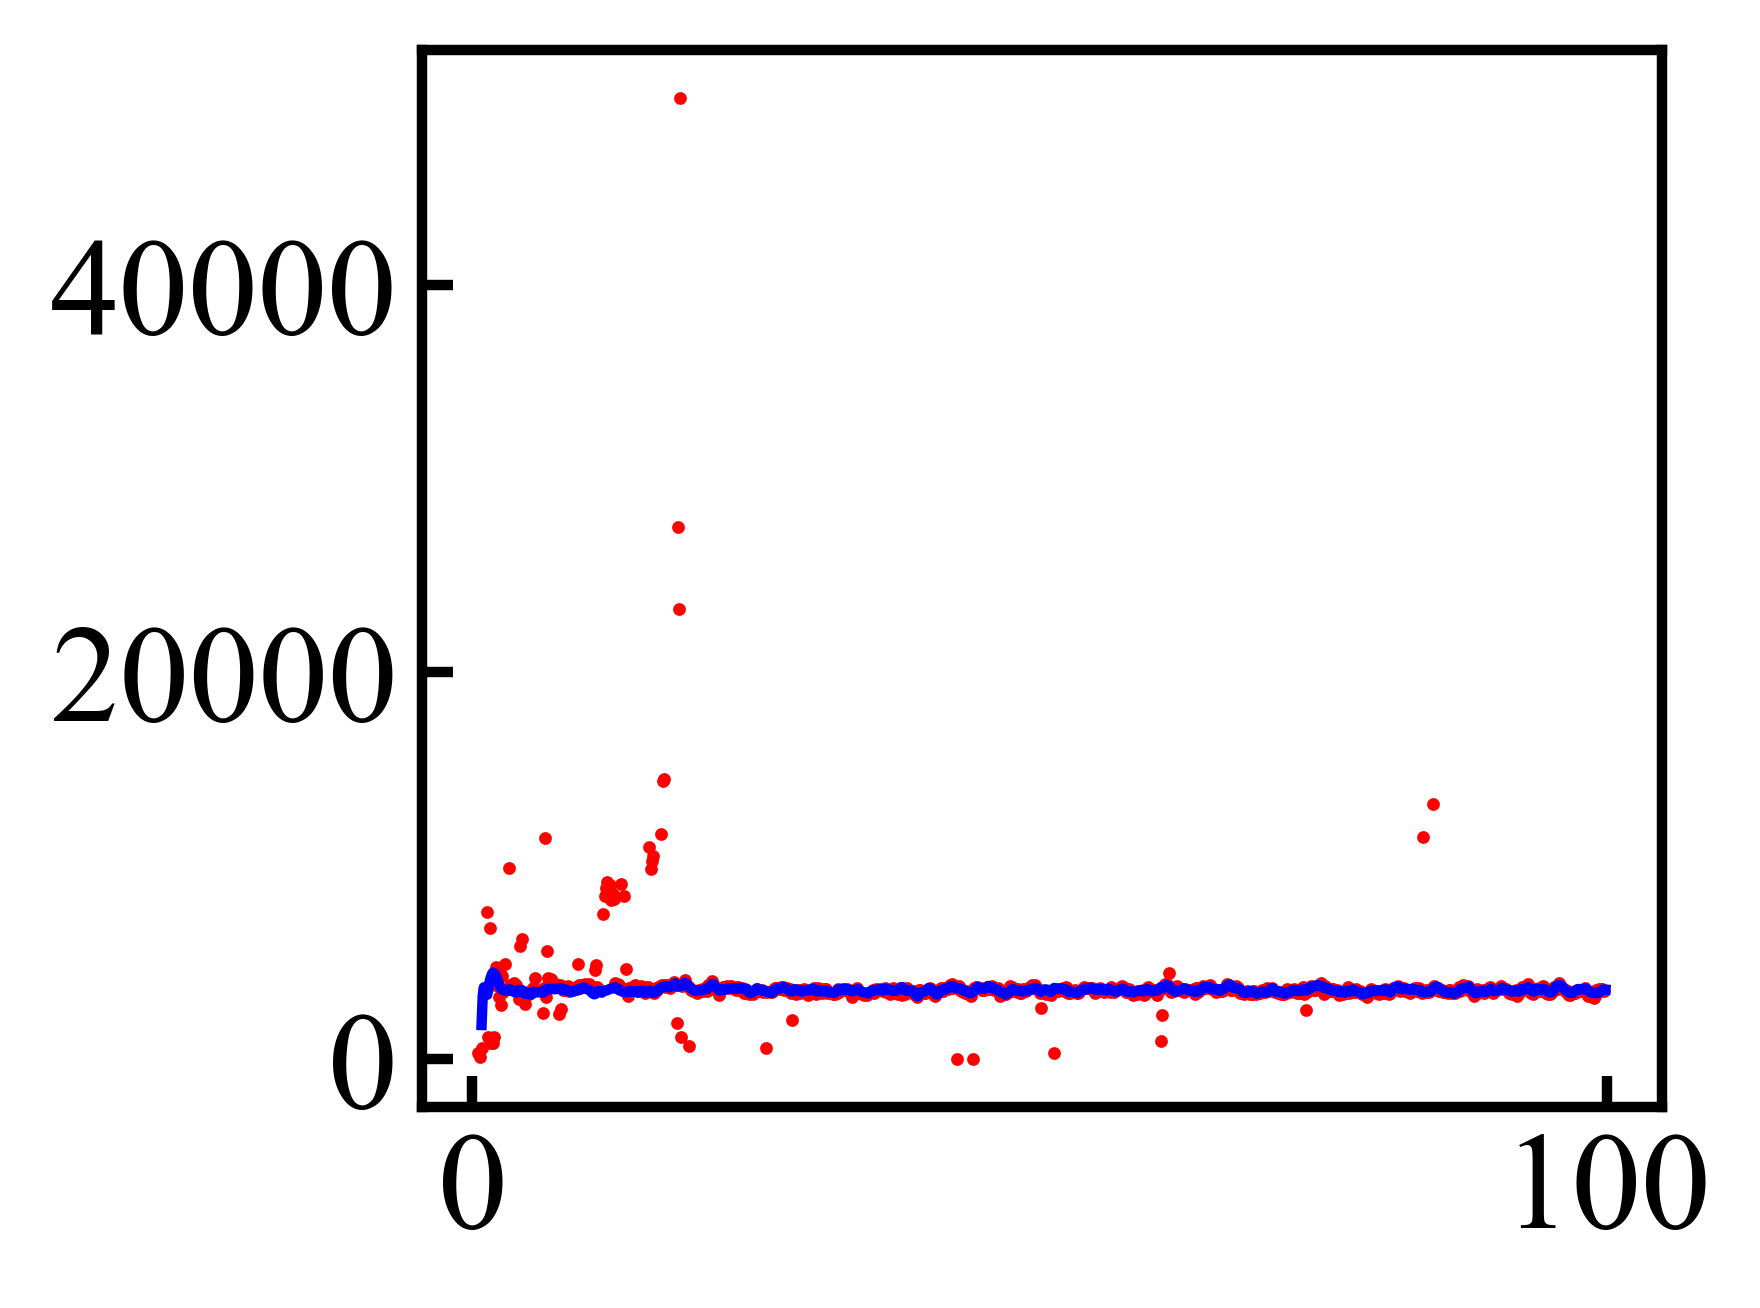

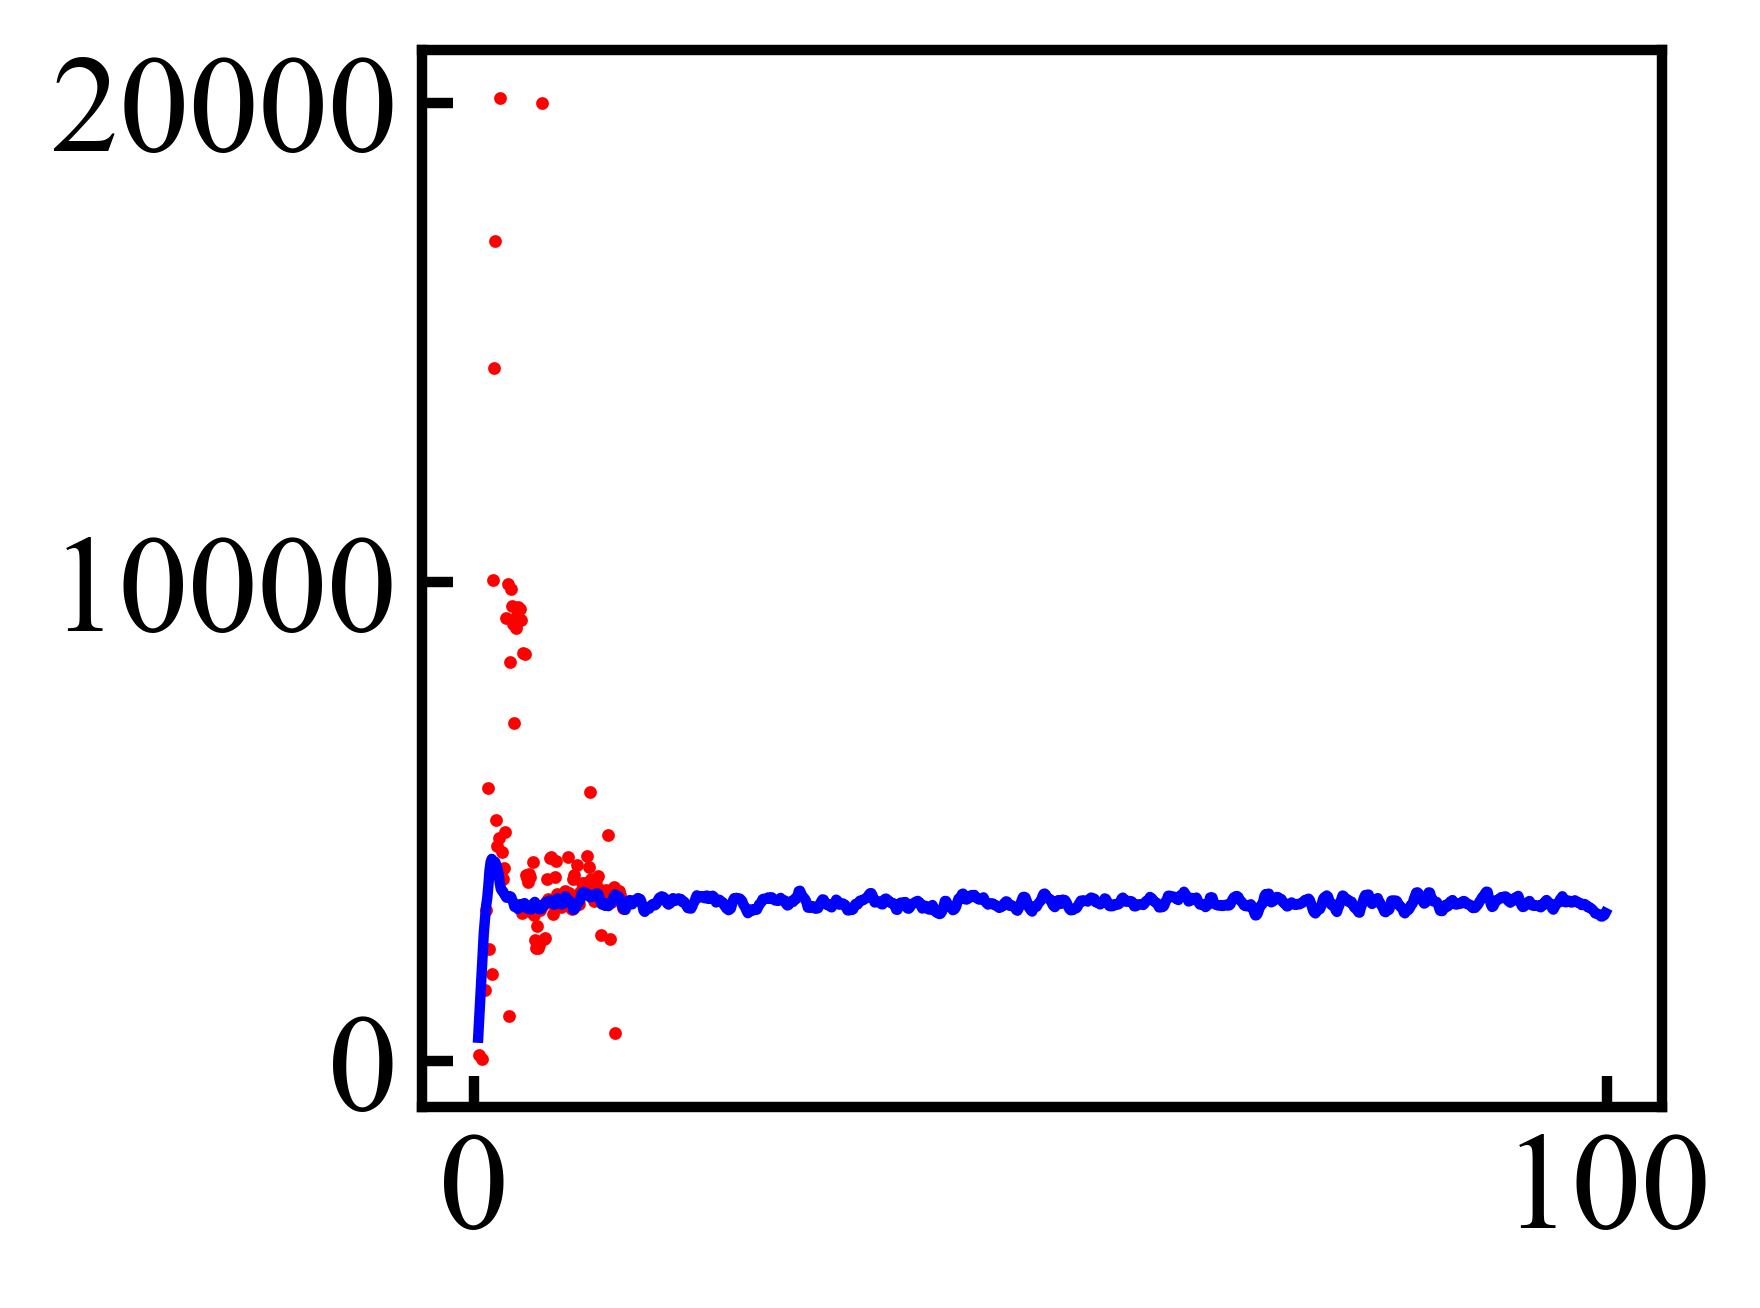

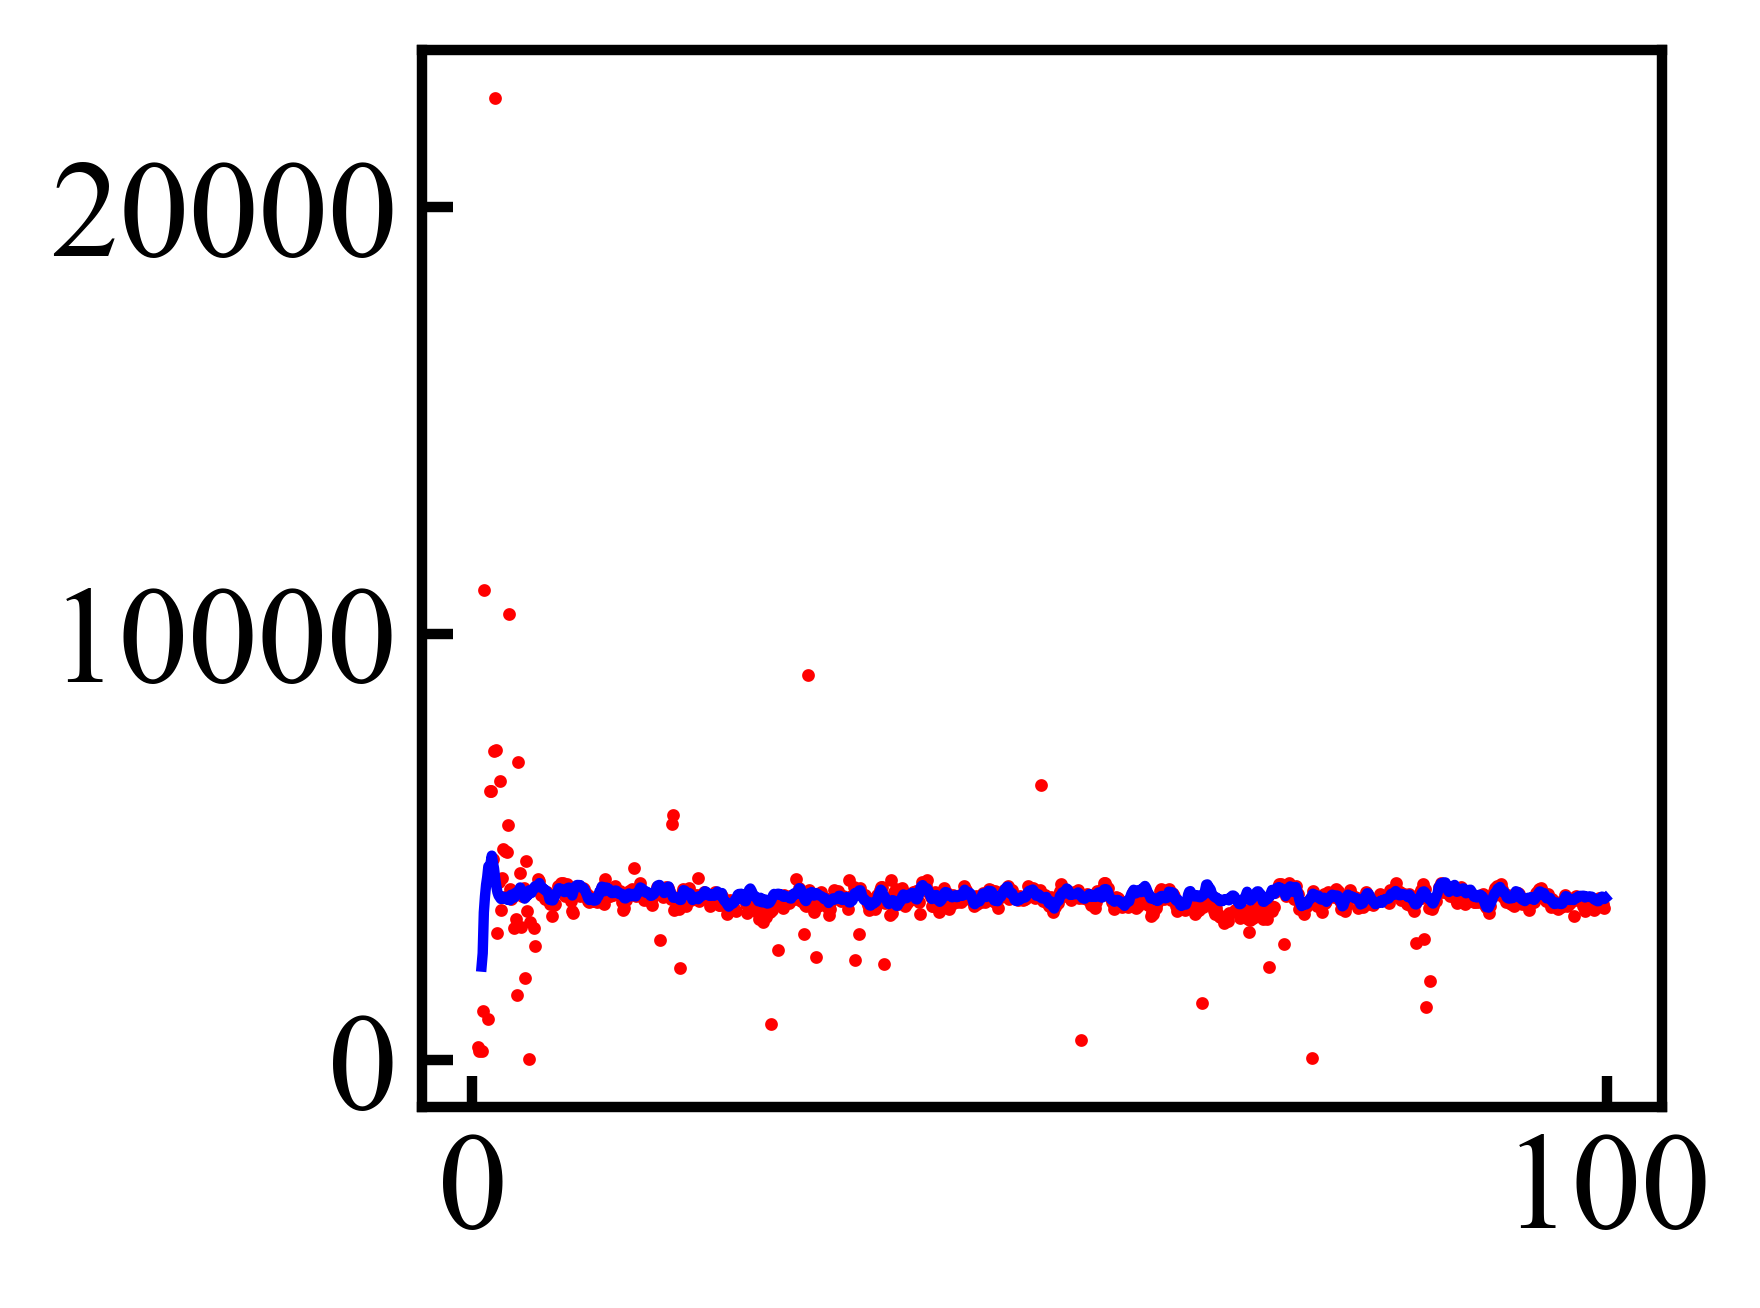

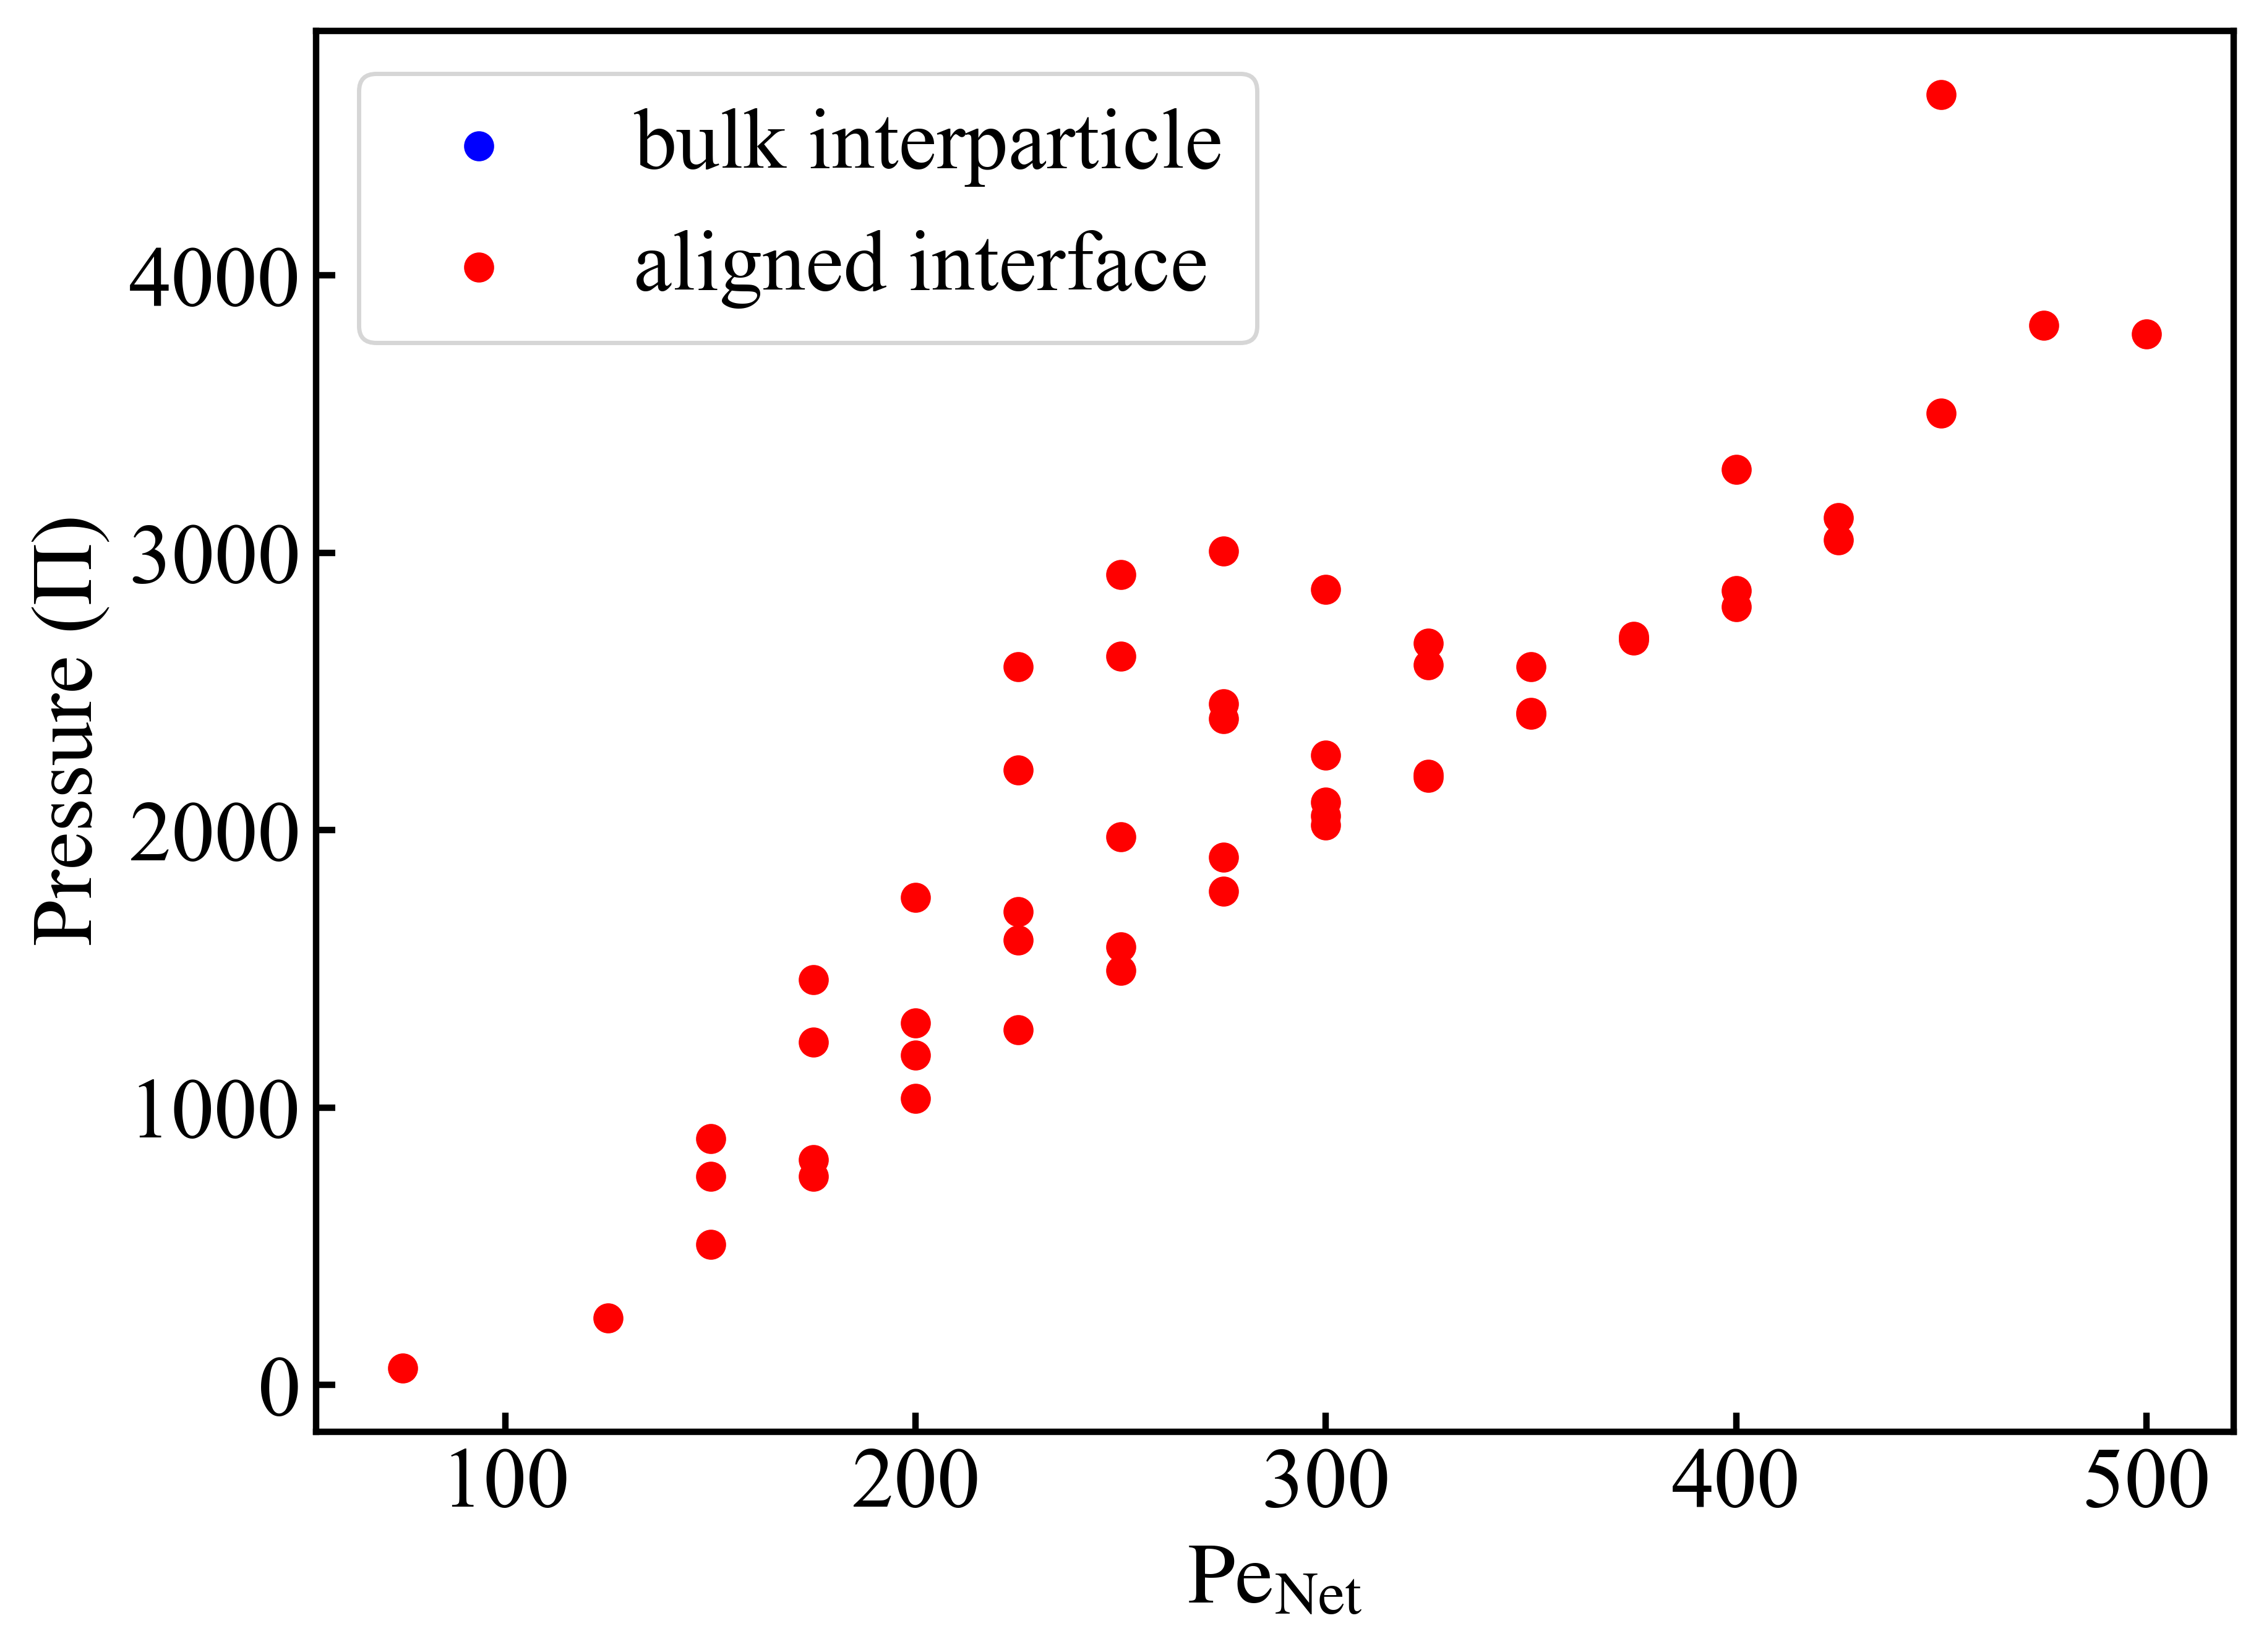

'\nfor i in range(0, len(align_peA)):  \n    for j in range(0, len(align_peB)):  \n        for k in range(0, len(interpart_peA)):  \n            for l in range(0, len(interpart_peB)):  \n                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):\n                    \n'

In [27]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])


for i in range(0, len(all_dens)):
    
    align_time =np.array([])
    align_press_time = np.array([])
    align_press_total = 0
    align_press_vals=0
    
    # Don't plot non-phase-separated data
    if all_dens[i].empty:
            continue
    
    
    max_size = np.amax(all_dens[i]['clust_size'])
    for j in range(0, len(all_dens[i]['clust_size'])):
        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
            int_id = all_dens[i]['interface_id'][j]
            if int_id == 1:
                align_press = all_dens[i]['press_align_bub1'][j]
            elif int_id == 2:
                align_press = all_dens[i]['press_align_bub2'][j]
            elif int_id == 3:
                align_press = all_dens[i]['press_align_bub3'][j]
            elif int_id == 4:
                align_press = all_dens[i]['press_align_bub4'][j]
            elif int_id == 5:
                align_press = all_dens[i]['press_align_bub5'][j]
            if align_press > 0:
                align_time = np.append(align_time, all_dens[i]['tauB'].iloc[j])
                align_press_time = np.append(align_press_time, align_press)
            
                align_press_total += align_press
                align_press_vals += 1
    if align_press_vals > 50:        
        avg_press = (align_press_total/align_press_vals)
        align_press_arr = np.append(align_press_arr, avg_press)
        align_peA=np.append(align_peA, params['peA'][i])
        align_peB=np.append(align_peB, params['peB'][i])
        align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
        align_xA=np.append(align_xA, params['xA'][i])
        align_phi=np.append(align_phi, params['phi'][i])
        align_eps=np.append(align_eps, params['eps'][i])
    for k in range(0, len(all_pres)):
        if params2['peA'][k]==params['peA'][i]:
            if params2['peB'][k]==params['peB'][i]:
                if params2['eps'][k]==params['eps'][i]:
                    if params2['phi'][k]==params['phi'][i]:
                        if params2['xA'][k]==params['xA'][i]:
                            bulk_time =np.array([])
                            bulk_press_time = np.array([])
                            bulk_press_total = 0
                            bulk_press_total_expand = 0
                            bulk_press_vals=0
                            shear_press_expand=0
                            # Don't plot non-phase-separated data
                            if all_pres[k].empty:
                                    continue


                            max_size = np.amax(all_pres[k]['NDense'])
                            for l in range(0, len(all_pres[k]['NDense'])):
                                #if all_pres[i]['NDense'][j]>=0.95*max_size:

                                    bulk_trace = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                                    bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[l])

                                    bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2
                                    bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[l])

                                    shear_stress = (all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l])/2
                                    shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[l])
                                    if bulk_press>0:
                                        bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[l])
                                        bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                        shear_press_expand +=shear_press
                                        bulk_press_total += bulk_press
                                        bulk_press_total_expand += bulk_press_expand
                                        bulk_press_vals += 1
                            if bulk_press_vals > 50:        
                                avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                avg_press = (bulk_press_total/(2*bulk_press_vals))
                                avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                interpart_press=np.append(interpart_press, avg_press)
                                interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                interpart_eps=np.append(interpart_eps, params2['eps'][k])
                            
                            plt.plot(bulk_time, bulk_press_time, color='blue')
                            plt.scatter(align_time, align_press_time, s=0.7, color='red')
                            plt.show()

    
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])

    

plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

    
'''
for i in range(0, len(align_peA)):  
    for j in range(0, len(align_peB)):  
        for k in range(0, len(interpart_peA)):  
            for l in range(0, len(interpart_peB)):  
                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):
                    
'''